In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import zipfile
import requests
import geopandas as gpd
from shapely.geometry import Point
import random
import numpy as np

In [7]:
s = pd.read_csv('..//..//..//Documents//Test_sets//Testing_sample//HI1539B//Edits//HI1539B_C_MERGE_CORRECTED.csv')

# geometry = [Point(xy) for xy in zip(s.X, s.Y)]
# crs = {'init': 'epsg:4326'}
# geos = gpd.GeoDataFrame(s, crs=crs, geometry=geometry)


In [8]:
s.head()

,Unnamed: 0,Y,X,Depth,Selection
0,0,50.759664,-1.187467,18.288,0.0
1,1,50.759673,-1.187468,18.211,0.0
2,2,50.759681,-1.187468,18.139,0.0
3,3,50.759687,-1.187465,18.137,0.0
4,4,50.759691,-1.187465,18.177,0.0


In [9]:
minx = s['X'].min()
maxx = s['X'].max()
rangex = maxx-minx


miny = s['Y'].min()
maxy = s['Y'].max()
rangey = maxy-miny


# minz = surveyTG['Depth'].min()
# maxz = surveyTG['Depth'].max()

In [23]:
stepx = 0.0001
stepy = 0.0001

In [21]:
rangex//stepx

283.0

In [29]:
sg = pd.DataFrame()

In [30]:
for i in range(0,284):
    for j in range(0,160):
        XA= minx +(i*stepx)
        YA = miny + (j*stepy)
        XB = minx + ((i+1)*stepx)
        YB = miny + ((j+1)*stepy)
        
        # print(i,j)
        print (i,j," :",XA,YA,XB,YB)
        
        a = s[(s['X'] > XA) & (s['X'] < XB) & (s['Y'] > YA) & (s['Y'] < YB)]
        
        #midpoint ()
        MX = XA+(stepx/2)
        MY = YA+(stepy/2)
        
        minn = a['Depth'].min()
        maxx = a['Depth'].max()
        mean = a['Depth'].mean()
        count = len(a['Depth'])
        select = a['Selection'].max()
        
        row = [i,j,XA,XB,YA,YB,MX,MY,minn,maxx,mean,count,select]
        
        sg = sg.append([row])
        
        


0 0  : -1.1880778 50.7593714 -1.1879778 50.7594714
0 1  : -1.1880778 50.7594714 -1.1879778 50.7595714
0 2  : -1.1880778 50.7595714 -1.1879778 50.7596714
0 3  : -1.1880778 50.7596714 -1.1879778 50.7597714
0 4  : -1.1880778 50.7597714 -1.1879778 50.7598714
0 5  : -1.1880778 50.7598714 -1.1879778 50.7599714
0 6  : -1.1880778 50.7599714 -1.1879778 50.7600714
0 7  : -1.1880778 50.7600714 -1.1879778 50.7601714
0 8  : -1.1880778 50.7601714 -1.1879778 50.7602714
0 9  : -1.1880778 50.7602714 -1.1879778 50.7603714
0 10  : -1.1880778 50.7603714 -1.1879778 50.7604714
0 11  : -1.1880778 50.7604714 -1.1879778 50.7605714
0 12  : -1.1880778 50.7605714 -1.1879778 50.7606714
0 13  : -1.1880778 50.7606714 -1.1879778 50.7607714
0 14  : -1.1880778 50.7607714 -1.1879778 50.7608714
0 15  : -1.1880778 50.7608714 -1.1879778 50.7609714
0 16  : -1.1880778 50.7609714 -1.1879778 50.7610714
0 17  : -1.1880778 50.7610714 -1.1879778 50.7611714
0 18  : -1.1880778 50.7611714 -1.1879778 50.7612714
0 19  : -1.1880778 50.

0 157  : -1.1880778 50.7750714 -1.1879778 50.7751714
0 158  : -1.1880778 50.7751714 -1.1879778 50.7752714
0 159  : -1.1880778 50.7752714 -1.1879778 50.7753714
1 0  : -1.1879778 50.7593714 -1.1878778 50.7594714
1 1  : -1.1879778 50.7594714 -1.1878778 50.7595714
1 2  : -1.1879778 50.7595714 -1.1878778 50.7596714
1 3  : -1.1879778 50.7596714 -1.1878778 50.7597714
1 4  : -1.1879778 50.7597714 -1.1878778 50.7598714
1 5  : -1.1879778 50.7598714 -1.1878778 50.7599714
1 6  : -1.1879778 50.7599714 -1.1878778 50.7600714
1 7  : -1.1879778 50.7600714 -1.1878778 50.7601714
1 8  : -1.1879778 50.7601714 -1.1878778 50.7602714
1 9  : -1.1879778 50.7602714 -1.1878778 50.7603714
1 10  : -1.1879778 50.7603714 -1.1878778 50.7604714
1 11  : -1.1879778 50.7604714 -1.1878778 50.7605714
1 12  : -1.1879778 50.7605714 -1.1878778 50.7606714
1 13  : -1.1879778 50.7606714 -1.1878778 50.7607714
1 14  : -1.1879778 50.7607714 -1.1878778 50.7608714
1 15  : -1.1879778 50.7608714 -1.1878778 50.7609714
1 16  : -1.1879778 

1 158  : -1.1879778 50.7751714 -1.1878778 50.7752714
1 159  : -1.1879778 50.7752714 -1.1878778 50.7753714
2 0  : -1.1878778 50.7593714 -1.1877778 50.7594714
2 1  : -1.1878778 50.7594714 -1.1877778 50.7595714
2 2  : -1.1878778 50.7595714 -1.1877778 50.7596714
2 3  : -1.1878778 50.7596714 -1.1877778 50.7597714
2 4  : -1.1878778 50.7597714 -1.1877778 50.7598714
2 5  : -1.1878778 50.7598714 -1.1877778 50.7599714
2 6  : -1.1878778 50.7599714 -1.1877778 50.7600714
2 7  : -1.1878778 50.7600714 -1.1877778 50.7601714
2 8  : -1.1878778 50.7601714 -1.1877778 50.7602714
2 9  : -1.1878778 50.7602714 -1.1877778 50.7603714
2 10  : -1.1878778 50.7603714 -1.1877778 50.7604714
2 11  : -1.1878778 50.7604714 -1.1877778 50.7605714
2 12  : -1.1878778 50.7605714 -1.1877778 50.7606714
2 13  : -1.1878778 50.7606714 -1.1877778 50.7607714
2 14  : -1.1878778 50.7607714 -1.1877778 50.7608714
2 15  : -1.1878778 50.7608714 -1.1877778 50.7609714
2 16  : -1.1878778 50.7609714 -1.1877778 50.7610714
2 17  : -1.1878778 5

2 157  : -1.1878778 50.7750714 -1.1877778 50.7751714
2 158  : -1.1878778 50.7751714 -1.1877778 50.7752714
2 159  : -1.1878778 50.7752714 -1.1877778 50.7753714
3 0  : -1.1877778 50.7593714 -1.1876778 50.7594714
3 1  : -1.1877778 50.7594714 -1.1876778 50.7595714
3 2  : -1.1877778 50.7595714 -1.1876778 50.7596714
3 3  : -1.1877778 50.7596714 -1.1876778 50.7597714
3 4  : -1.1877778 50.7597714 -1.1876778 50.7598714
3 5  : -1.1877778 50.7598714 -1.1876778 50.7599714
3 6  : -1.1877778 50.7599714 -1.1876778 50.7600714
3 7  : -1.1877778 50.7600714 -1.1876778 50.7601714
3 8  : -1.1877778 50.7601714 -1.1876778 50.7602714
3 9  : -1.1877778 50.7602714 -1.1876778 50.7603714
3 10  : -1.1877778 50.7603714 -1.1876778 50.7604714
3 11  : -1.1877778 50.7604714 -1.1876778 50.7605714
3 12  : -1.1877778 50.7605714 -1.1876778 50.7606714
3 13  : -1.1877778 50.7606714 -1.1876778 50.7607714
3 14  : -1.1877778 50.7607714 -1.1876778 50.7608714
3 15  : -1.1877778 50.7608714 -1.1876778 50.7609714
3 16  : -1.1877778 

3 157  : -1.1877778 50.7750714 -1.1876778 50.7751714
3 158  : -1.1877778 50.7751714 -1.1876778 50.7752714
3 159  : -1.1877778 50.7752714 -1.1876778 50.7753714
4 0  : -1.1876778 50.7593714 -1.1875778 50.7594714
4 1  : -1.1876778 50.7594714 -1.1875778 50.7595714
4 2  : -1.1876778 50.7595714 -1.1875778 50.7596714
4 3  : -1.1876778 50.7596714 -1.1875778 50.7597714
4 4  : -1.1876778 50.7597714 -1.1875778 50.7598714
4 5  : -1.1876778 50.7598714 -1.1875778 50.7599714
4 6  : -1.1876778 50.7599714 -1.1875778 50.7600714
4 7  : -1.1876778 50.7600714 -1.1875778 50.7601714
4 8  : -1.1876778 50.7601714 -1.1875778 50.7602714
4 9  : -1.1876778 50.7602714 -1.1875778 50.7603714
4 10  : -1.1876778 50.7603714 -1.1875778 50.7604714
4 11  : -1.1876778 50.7604714 -1.1875778 50.7605714
4 12  : -1.1876778 50.7605714 -1.1875778 50.7606714
4 13  : -1.1876778 50.7606714 -1.1875778 50.7607714
4 14  : -1.1876778 50.7607714 -1.1875778 50.7608714
4 15  : -1.1876778 50.7608714 -1.1875778 50.7609714
4 16  : -1.1876778 

5 0  : -1.1875778 50.7593714 -1.1874778 50.7594714
5 1  : -1.1875778 50.7594714 -1.1874778 50.7595714
5 2  : -1.1875778 50.7595714 -1.1874778 50.7596714
5 3  : -1.1875778 50.7596714 -1.1874778 50.7597714
5 4  : -1.1875778 50.7597714 -1.1874778 50.7598714
5 5  : -1.1875778 50.7598714 -1.1874778 50.7599714
5 6  : -1.1875778 50.7599714 -1.1874778 50.7600714
5 7  : -1.1875778 50.7600714 -1.1874778 50.7601714
5 8  : -1.1875778 50.7601714 -1.1874778 50.7602714
5 9  : -1.1875778 50.7602714 -1.1874778 50.7603714
5 10  : -1.1875778 50.7603714 -1.1874778 50.7604714
5 11  : -1.1875778 50.7604714 -1.1874778 50.7605714
5 12  : -1.1875778 50.7605714 -1.1874778 50.7606714
5 13  : -1.1875778 50.7606714 -1.1874778 50.7607714
5 14  : -1.1875778 50.7607714 -1.1874778 50.7608714
5 15  : -1.1875778 50.7608714 -1.1874778 50.7609714
5 16  : -1.1875778 50.7609714 -1.1874778 50.7610714
5 17  : -1.1875778 50.7610714 -1.1874778 50.7611714
5 18  : -1.1875778 50.7611714 -1.1874778 50.7612714
5 19  : -1.1875778 50.

6 3  : -1.1874778 50.7596714 -1.1873778 50.7597714
6 4  : -1.1874778 50.7597714 -1.1873778 50.7598714
6 5  : -1.1874778 50.7598714 -1.1873778 50.7599714
6 6  : -1.1874778 50.7599714 -1.1873778 50.7600714
6 7  : -1.1874778 50.7600714 -1.1873778 50.7601714
6 8  : -1.1874778 50.7601714 -1.1873778 50.7602714
6 9  : -1.1874778 50.7602714 -1.1873778 50.7603714
6 10  : -1.1874778 50.7603714 -1.1873778 50.7604714
6 11  : -1.1874778 50.7604714 -1.1873778 50.7605714
6 12  : -1.1874778 50.7605714 -1.1873778 50.7606714
6 13  : -1.1874778 50.7606714 -1.1873778 50.7607714
6 14  : -1.1874778 50.7607714 -1.1873778 50.7608714
6 15  : -1.1874778 50.7608714 -1.1873778 50.7609714
6 16  : -1.1874778 50.7609714 -1.1873778 50.7610714
6 17  : -1.1874778 50.7610714 -1.1873778 50.7611714
6 18  : -1.1874778 50.7611714 -1.1873778 50.7612714
6 19  : -1.1874778 50.7612714 -1.1873778 50.7613714
6 20  : -1.1874778 50.7613714 -1.1873778 50.7614714
6 21  : -1.1874778 50.7614714 -1.1873778 50.7615714
6 22  : -1.1874778 

7 3  : -1.1873778 50.7596714 -1.1872778 50.7597714
7 4  : -1.1873778 50.7597714 -1.1872778 50.7598714
7 5  : -1.1873778 50.7598714 -1.1872778 50.7599714
7 6  : -1.1873778 50.7599714 -1.1872778 50.7600714
7 7  : -1.1873778 50.7600714 -1.1872778 50.7601714
7 8  : -1.1873778 50.7601714 -1.1872778 50.7602714
7 9  : -1.1873778 50.7602714 -1.1872778 50.7603714
7 10  : -1.1873778 50.7603714 -1.1872778 50.7604714
7 11  : -1.1873778 50.7604714 -1.1872778 50.7605714
7 12  : -1.1873778 50.7605714 -1.1872778 50.7606714
7 13  : -1.1873778 50.7606714 -1.1872778 50.7607714
7 14  : -1.1873778 50.7607714 -1.1872778 50.7608714
7 15  : -1.1873778 50.7608714 -1.1872778 50.7609714
7 16  : -1.1873778 50.7609714 -1.1872778 50.7610714
7 17  : -1.1873778 50.7610714 -1.1872778 50.7611714
7 18  : -1.1873778 50.7611714 -1.1872778 50.7612714
7 19  : -1.1873778 50.7612714 -1.1872778 50.7613714
7 20  : -1.1873778 50.7613714 -1.1872778 50.7614714
7 21  : -1.1873778 50.7614714 -1.1872778 50.7615714
7 22  : -1.1873778 

8 0  : -1.1872778 50.7593714 -1.1871778 50.7594714
8 1  : -1.1872778 50.7594714 -1.1871778 50.7595714
8 2  : -1.1872778 50.7595714 -1.1871778 50.7596714
8 3  : -1.1872778 50.7596714 -1.1871778 50.7597714
8 4  : -1.1872778 50.7597714 -1.1871778 50.7598714
8 5  : -1.1872778 50.7598714 -1.1871778 50.7599714
8 6  : -1.1872778 50.7599714 -1.1871778 50.7600714
8 7  : -1.1872778 50.7600714 -1.1871778 50.7601714
8 8  : -1.1872778 50.7601714 -1.1871778 50.7602714
8 9  : -1.1872778 50.7602714 -1.1871778 50.7603714
8 10  : -1.1872778 50.7603714 -1.1871778 50.7604714
8 11  : -1.1872778 50.7604714 -1.1871778 50.7605714
8 12  : -1.1872778 50.7605714 -1.1871778 50.7606714
8 13  : -1.1872778 50.7606714 -1.1871778 50.7607714
8 14  : -1.1872778 50.7607714 -1.1871778 50.7608714
8 15  : -1.1872778 50.7608714 -1.1871778 50.7609714
8 16  : -1.1872778 50.7609714 -1.1871778 50.7610714
8 17  : -1.1872778 50.7610714 -1.1871778 50.7611714
8 18  : -1.1872778 50.7611714 -1.1871778 50.7612714
8 19  : -1.1872778 50.

9 3  : -1.1871778 50.7596714 -1.1870778 50.7597714
9 4  : -1.1871778 50.7597714 -1.1870778 50.7598714
9 5  : -1.1871778 50.7598714 -1.1870778 50.7599714
9 6  : -1.1871778 50.7599714 -1.1870778 50.7600714
9 7  : -1.1871778 50.7600714 -1.1870778 50.7601714
9 8  : -1.1871778 50.7601714 -1.1870778 50.7602714
9 9  : -1.1871778 50.7602714 -1.1870778 50.7603714
9 10  : -1.1871778 50.7603714 -1.1870778 50.7604714
9 11  : -1.1871778 50.7604714 -1.1870778 50.7605714
9 12  : -1.1871778 50.7605714 -1.1870778 50.7606714
9 13  : -1.1871778 50.7606714 -1.1870778 50.7607714
9 14  : -1.1871778 50.7607714 -1.1870778 50.7608714
9 15  : -1.1871778 50.7608714 -1.1870778 50.7609714
9 16  : -1.1871778 50.7609714 -1.1870778 50.7610714
9 17  : -1.1871778 50.7610714 -1.1870778 50.7611714
9 18  : -1.1871778 50.7611714 -1.1870778 50.7612714
9 19  : -1.1871778 50.7612714 -1.1870778 50.7613714
9 20  : -1.1871778 50.7613714 -1.1870778 50.7614714
9 21  : -1.1871778 50.7614714 -1.1870778 50.7615714
9 22  : -1.1871778 

10 5  : -1.1870778 50.7598714 -1.1869778 50.7599714
10 6  : -1.1870778 50.7599714 -1.1869778 50.7600714
10 7  : -1.1870778 50.7600714 -1.1869778 50.7601714
10 8  : -1.1870778 50.7601714 -1.1869778 50.7602714
10 9  : -1.1870778 50.7602714 -1.1869778 50.7603714
10 10  : -1.1870778 50.7603714 -1.1869778 50.7604714
10 11  : -1.1870778 50.7604714 -1.1869778 50.7605714
10 12  : -1.1870778 50.7605714 -1.1869778 50.7606714
10 13  : -1.1870778 50.7606714 -1.1869778 50.7607714
10 14  : -1.1870778 50.7607714 -1.1869778 50.7608714
10 15  : -1.1870778 50.7608714 -1.1869778 50.7609714
10 16  : -1.1870778 50.7609714 -1.1869778 50.7610714
10 17  : -1.1870778 50.7610714 -1.1869778 50.7611714
10 18  : -1.1870778 50.7611714 -1.1869778 50.7612714
10 19  : -1.1870778 50.7612714 -1.1869778 50.7613714
10 20  : -1.1870778 50.7613714 -1.1869778 50.7614714
10 21  : -1.1870778 50.7614714 -1.1869778 50.7615714
10 22  : -1.1870778 50.7615714 -1.1869778 50.7616714
10 23  : -1.1870778 50.7616714 -1.1869778 50.761771

11 2  : -1.1869778 50.7595714 -1.1868778 50.7596714
11 3  : -1.1869778 50.7596714 -1.1868778 50.7597714
11 4  : -1.1869778 50.7597714 -1.1868778 50.7598714
11 5  : -1.1869778 50.7598714 -1.1868778 50.7599714
11 6  : -1.1869778 50.7599714 -1.1868778 50.7600714
11 7  : -1.1869778 50.7600714 -1.1868778 50.7601714
11 8  : -1.1869778 50.7601714 -1.1868778 50.7602714
11 9  : -1.1869778 50.7602714 -1.1868778 50.7603714
11 10  : -1.1869778 50.7603714 -1.1868778 50.7604714
11 11  : -1.1869778 50.7604714 -1.1868778 50.7605714
11 12  : -1.1869778 50.7605714 -1.1868778 50.7606714
11 13  : -1.1869778 50.7606714 -1.1868778 50.7607714
11 14  : -1.1869778 50.7607714 -1.1868778 50.7608714
11 15  : -1.1869778 50.7608714 -1.1868778 50.7609714
11 16  : -1.1869778 50.7609714 -1.1868778 50.7610714
11 17  : -1.1869778 50.7610714 -1.1868778 50.7611714
11 18  : -1.1869778 50.7611714 -1.1868778 50.7612714
11 19  : -1.1869778 50.7612714 -1.1868778 50.7613714
11 20  : -1.1869778 50.7613714 -1.1868778 50.7614714
1

12 2  : -1.1868778 50.7595714 -1.1867778 50.7596714
12 3  : -1.1868778 50.7596714 -1.1867778 50.7597714
12 4  : -1.1868778 50.7597714 -1.1867778 50.7598714
12 5  : -1.1868778 50.7598714 -1.1867778 50.7599714
12 6  : -1.1868778 50.7599714 -1.1867778 50.7600714
12 7  : -1.1868778 50.7600714 -1.1867778 50.7601714
12 8  : -1.1868778 50.7601714 -1.1867778 50.7602714
12 9  : -1.1868778 50.7602714 -1.1867778 50.7603714
12 10  : -1.1868778 50.7603714 -1.1867778 50.7604714
12 11  : -1.1868778 50.7604714 -1.1867778 50.7605714
12 12  : -1.1868778 50.7605714 -1.1867778 50.7606714
12 13  : -1.1868778 50.7606714 -1.1867778 50.7607714
12 14  : -1.1868778 50.7607714 -1.1867778 50.7608714
12 15  : -1.1868778 50.7608714 -1.1867778 50.7609714
12 16  : -1.1868778 50.7609714 -1.1867778 50.7610714
12 17  : -1.1868778 50.7610714 -1.1867778 50.7611714
12 18  : -1.1868778 50.7611714 -1.1867778 50.7612714
12 19  : -1.1868778 50.7612714 -1.1867778 50.7613714
12 20  : -1.1868778 50.7613714 -1.1867778 50.7614714
1

13 2  : -1.1867778 50.7595714 -1.1866778 50.7596714
13 3  : -1.1867778 50.7596714 -1.1866778 50.7597714
13 4  : -1.1867778 50.7597714 -1.1866778 50.7598714
13 5  : -1.1867778 50.7598714 -1.1866778 50.7599714
13 6  : -1.1867778 50.7599714 -1.1866778 50.7600714
13 7  : -1.1867778 50.7600714 -1.1866778 50.7601714
13 8  : -1.1867778 50.7601714 -1.1866778 50.7602714
13 9  : -1.1867778 50.7602714 -1.1866778 50.7603714
13 10  : -1.1867778 50.7603714 -1.1866778 50.7604714
13 11  : -1.1867778 50.7604714 -1.1866778 50.7605714
13 12  : -1.1867778 50.7605714 -1.1866778 50.7606714
13 13  : -1.1867778 50.7606714 -1.1866778 50.7607714
13 14  : -1.1867778 50.7607714 -1.1866778 50.7608714
13 15  : -1.1867778 50.7608714 -1.1866778 50.7609714
13 16  : -1.1867778 50.7609714 -1.1866778 50.7610714
13 17  : -1.1867778 50.7610714 -1.1866778 50.7611714
13 18  : -1.1867778 50.7611714 -1.1866778 50.7612714
13 19  : -1.1867778 50.7612714 -1.1866778 50.7613714
13 20  : -1.1867778 50.7613714 -1.1866778 50.7614714
1

14 2  : -1.1866778 50.7595714 -1.1865778 50.7596714
14 3  : -1.1866778 50.7596714 -1.1865778 50.7597714
14 4  : -1.1866778 50.7597714 -1.1865778 50.7598714
14 5  : -1.1866778 50.7598714 -1.1865778 50.7599714
14 6  : -1.1866778 50.7599714 -1.1865778 50.7600714
14 7  : -1.1866778 50.7600714 -1.1865778 50.7601714
14 8  : -1.1866778 50.7601714 -1.1865778 50.7602714
14 9  : -1.1866778 50.7602714 -1.1865778 50.7603714
14 10  : -1.1866778 50.7603714 -1.1865778 50.7604714
14 11  : -1.1866778 50.7604714 -1.1865778 50.7605714
14 12  : -1.1866778 50.7605714 -1.1865778 50.7606714
14 13  : -1.1866778 50.7606714 -1.1865778 50.7607714
14 14  : -1.1866778 50.7607714 -1.1865778 50.7608714
14 15  : -1.1866778 50.7608714 -1.1865778 50.7609714
14 16  : -1.1866778 50.7609714 -1.1865778 50.7610714
14 17  : -1.1866778 50.7610714 -1.1865778 50.7611714
14 18  : -1.1866778 50.7611714 -1.1865778 50.7612714
14 19  : -1.1866778 50.7612714 -1.1865778 50.7613714
14 20  : -1.1866778 50.7613714 -1.1865778 50.7614714
1

15 2  : -1.1865778 50.7595714 -1.1864778 50.7596714
15 3  : -1.1865778 50.7596714 -1.1864778 50.7597714
15 4  : -1.1865778 50.7597714 -1.1864778 50.7598714
15 5  : -1.1865778 50.7598714 -1.1864778 50.7599714
15 6  : -1.1865778 50.7599714 -1.1864778 50.7600714
15 7  : -1.1865778 50.7600714 -1.1864778 50.7601714
15 8  : -1.1865778 50.7601714 -1.1864778 50.7602714
15 9  : -1.1865778 50.7602714 -1.1864778 50.7603714
15 10  : -1.1865778 50.7603714 -1.1864778 50.7604714
15 11  : -1.1865778 50.7604714 -1.1864778 50.7605714
15 12  : -1.1865778 50.7605714 -1.1864778 50.7606714
15 13  : -1.1865778 50.7606714 -1.1864778 50.7607714
15 14  : -1.1865778 50.7607714 -1.1864778 50.7608714
15 15  : -1.1865778 50.7608714 -1.1864778 50.7609714
15 16  : -1.1865778 50.7609714 -1.1864778 50.7610714
15 17  : -1.1865778 50.7610714 -1.1864778 50.7611714
15 18  : -1.1865778 50.7611714 -1.1864778 50.7612714
15 19  : -1.1865778 50.7612714 -1.1864778 50.7613714
15 20  : -1.1865778 50.7613714 -1.1864778 50.7614714
1

16 2  : -1.1864778 50.7595714 -1.1863778 50.7596714
16 3  : -1.1864778 50.7596714 -1.1863778 50.7597714
16 4  : -1.1864778 50.7597714 -1.1863778 50.7598714
16 5  : -1.1864778 50.7598714 -1.1863778 50.7599714
16 6  : -1.1864778 50.7599714 -1.1863778 50.7600714
16 7  : -1.1864778 50.7600714 -1.1863778 50.7601714
16 8  : -1.1864778 50.7601714 -1.1863778 50.7602714
16 9  : -1.1864778 50.7602714 -1.1863778 50.7603714
16 10  : -1.1864778 50.7603714 -1.1863778 50.7604714
16 11  : -1.1864778 50.7604714 -1.1863778 50.7605714
16 12  : -1.1864778 50.7605714 -1.1863778 50.7606714
16 13  : -1.1864778 50.7606714 -1.1863778 50.7607714
16 14  : -1.1864778 50.7607714 -1.1863778 50.7608714
16 15  : -1.1864778 50.7608714 -1.1863778 50.7609714
16 16  : -1.1864778 50.7609714 -1.1863778 50.7610714
16 17  : -1.1864778 50.7610714 -1.1863778 50.7611714
16 18  : -1.1864778 50.7611714 -1.1863778 50.7612714
16 19  : -1.1864778 50.7612714 -1.1863778 50.7613714
16 20  : -1.1864778 50.7613714 -1.1863778 50.7614714
1

17 2  : -1.1863778 50.7595714 -1.1862778 50.7596714
17 3  : -1.1863778 50.7596714 -1.1862778 50.7597714
17 4  : -1.1863778 50.7597714 -1.1862778 50.7598714
17 5  : -1.1863778 50.7598714 -1.1862778 50.7599714
17 6  : -1.1863778 50.7599714 -1.1862778 50.7600714
17 7  : -1.1863778 50.7600714 -1.1862778 50.7601714
17 8  : -1.1863778 50.7601714 -1.1862778 50.7602714
17 9  : -1.1863778 50.7602714 -1.1862778 50.7603714
17 10  : -1.1863778 50.7603714 -1.1862778 50.7604714
17 11  : -1.1863778 50.7604714 -1.1862778 50.7605714
17 12  : -1.1863778 50.7605714 -1.1862778 50.7606714
17 13  : -1.1863778 50.7606714 -1.1862778 50.7607714
17 14  : -1.1863778 50.7607714 -1.1862778 50.7608714
17 15  : -1.1863778 50.7608714 -1.1862778 50.7609714
17 16  : -1.1863778 50.7609714 -1.1862778 50.7610714
17 17  : -1.1863778 50.7610714 -1.1862778 50.7611714
17 18  : -1.1863778 50.7611714 -1.1862778 50.7612714
17 19  : -1.1863778 50.7612714 -1.1862778 50.7613714
17 20  : -1.1863778 50.7613714 -1.1862778 50.7614714
1

18 2  : -1.1862778 50.7595714 -1.1861778 50.7596714
18 3  : -1.1862778 50.7596714 -1.1861778 50.7597714
18 4  : -1.1862778 50.7597714 -1.1861778 50.7598714
18 5  : -1.1862778 50.7598714 -1.1861778 50.7599714
18 6  : -1.1862778 50.7599714 -1.1861778 50.7600714
18 7  : -1.1862778 50.7600714 -1.1861778 50.7601714
18 8  : -1.1862778 50.7601714 -1.1861778 50.7602714
18 9  : -1.1862778 50.7602714 -1.1861778 50.7603714
18 10  : -1.1862778 50.7603714 -1.1861778 50.7604714
18 11  : -1.1862778 50.7604714 -1.1861778 50.7605714
18 12  : -1.1862778 50.7605714 -1.1861778 50.7606714
18 13  : -1.1862778 50.7606714 -1.1861778 50.7607714
18 14  : -1.1862778 50.7607714 -1.1861778 50.7608714
18 15  : -1.1862778 50.7608714 -1.1861778 50.7609714
18 16  : -1.1862778 50.7609714 -1.1861778 50.7610714
18 17  : -1.1862778 50.7610714 -1.1861778 50.7611714
18 18  : -1.1862778 50.7611714 -1.1861778 50.7612714
18 19  : -1.1862778 50.7612714 -1.1861778 50.7613714
18 20  : -1.1862778 50.7613714 -1.1861778 50.7614714
1

19 2  : -1.1861778 50.7595714 -1.1860778 50.7596714
19 3  : -1.1861778 50.7596714 -1.1860778 50.7597714
19 4  : -1.1861778 50.7597714 -1.1860778 50.7598714
19 5  : -1.1861778 50.7598714 -1.1860778 50.7599714
19 6  : -1.1861778 50.7599714 -1.1860778 50.7600714
19 7  : -1.1861778 50.7600714 -1.1860778 50.7601714
19 8  : -1.1861778 50.7601714 -1.1860778 50.7602714
19 9  : -1.1861778 50.7602714 -1.1860778 50.7603714
19 10  : -1.1861778 50.7603714 -1.1860778 50.7604714
19 11  : -1.1861778 50.7604714 -1.1860778 50.7605714
19 12  : -1.1861778 50.7605714 -1.1860778 50.7606714
19 13  : -1.1861778 50.7606714 -1.1860778 50.7607714
19 14  : -1.1861778 50.7607714 -1.1860778 50.7608714
19 15  : -1.1861778 50.7608714 -1.1860778 50.7609714
19 16  : -1.1861778 50.7609714 -1.1860778 50.7610714
19 17  : -1.1861778 50.7610714 -1.1860778 50.7611714
19 18  : -1.1861778 50.7611714 -1.1860778 50.7612714
19 19  : -1.1861778 50.7612714 -1.1860778 50.7613714
19 20  : -1.1861778 50.7613714 -1.1860778 50.7614714
1

20 2  : -1.1860778 50.7595714 -1.1859778 50.7596714
20 3  : -1.1860778 50.7596714 -1.1859778 50.7597714
20 4  : -1.1860778 50.7597714 -1.1859778 50.7598714
20 5  : -1.1860778 50.7598714 -1.1859778 50.7599714
20 6  : -1.1860778 50.7599714 -1.1859778 50.7600714
20 7  : -1.1860778 50.7600714 -1.1859778 50.7601714
20 8  : -1.1860778 50.7601714 -1.1859778 50.7602714
20 9  : -1.1860778 50.7602714 -1.1859778 50.7603714
20 10  : -1.1860778 50.7603714 -1.1859778 50.7604714
20 11  : -1.1860778 50.7604714 -1.1859778 50.7605714
20 12  : -1.1860778 50.7605714 -1.1859778 50.7606714
20 13  : -1.1860778 50.7606714 -1.1859778 50.7607714
20 14  : -1.1860778 50.7607714 -1.1859778 50.7608714
20 15  : -1.1860778 50.7608714 -1.1859778 50.7609714
20 16  : -1.1860778 50.7609714 -1.1859778 50.7610714
20 17  : -1.1860778 50.7610714 -1.1859778 50.7611714
20 18  : -1.1860778 50.7611714 -1.1859778 50.7612714
20 19  : -1.1860778 50.7612714 -1.1859778 50.7613714
20 20  : -1.1860778 50.7613714 -1.1859778 50.7614714
2

21 2  : -1.1859778 50.7595714 -1.1858778 50.7596714
21 3  : -1.1859778 50.7596714 -1.1858778 50.7597714
21 4  : -1.1859778 50.7597714 -1.1858778 50.7598714
21 5  : -1.1859778 50.7598714 -1.1858778 50.7599714
21 6  : -1.1859778 50.7599714 -1.1858778 50.7600714
21 7  : -1.1859778 50.7600714 -1.1858778 50.7601714
21 8  : -1.1859778 50.7601714 -1.1858778 50.7602714
21 9  : -1.1859778 50.7602714 -1.1858778 50.7603714
21 10  : -1.1859778 50.7603714 -1.1858778 50.7604714
21 11  : -1.1859778 50.7604714 -1.1858778 50.7605714
21 12  : -1.1859778 50.7605714 -1.1858778 50.7606714
21 13  : -1.1859778 50.7606714 -1.1858778 50.7607714
21 14  : -1.1859778 50.7607714 -1.1858778 50.7608714
21 15  : -1.1859778 50.7608714 -1.1858778 50.7609714
21 16  : -1.1859778 50.7609714 -1.1858778 50.7610714
21 17  : -1.1859778 50.7610714 -1.1858778 50.7611714
21 18  : -1.1859778 50.7611714 -1.1858778 50.7612714
21 19  : -1.1859778 50.7612714 -1.1858778 50.7613714
21 20  : -1.1859778 50.7613714 -1.1858778 50.7614714
2

22 1  : -1.1858778 50.7594714 -1.1857778 50.7595714
22 2  : -1.1858778 50.7595714 -1.1857778 50.7596714
22 3  : -1.1858778 50.7596714 -1.1857778 50.7597714
22 4  : -1.1858778 50.7597714 -1.1857778 50.7598714
22 5  : -1.1858778 50.7598714 -1.1857778 50.7599714
22 6  : -1.1858778 50.7599714 -1.1857778 50.7600714
22 7  : -1.1858778 50.7600714 -1.1857778 50.7601714
22 8  : -1.1858778 50.7601714 -1.1857778 50.7602714
22 9  : -1.1858778 50.7602714 -1.1857778 50.7603714
22 10  : -1.1858778 50.7603714 -1.1857778 50.7604714
22 11  : -1.1858778 50.7604714 -1.1857778 50.7605714
22 12  : -1.1858778 50.7605714 -1.1857778 50.7606714
22 13  : -1.1858778 50.7606714 -1.1857778 50.7607714
22 14  : -1.1858778 50.7607714 -1.1857778 50.7608714
22 15  : -1.1858778 50.7608714 -1.1857778 50.7609714
22 16  : -1.1858778 50.7609714 -1.1857778 50.7610714
22 17  : -1.1858778 50.7610714 -1.1857778 50.7611714
22 18  : -1.1858778 50.7611714 -1.1857778 50.7612714
22 19  : -1.1858778 50.7612714 -1.1857778 50.7613714
22

23 1  : -1.1857778 50.7594714 -1.1856778 50.7595714
23 2  : -1.1857778 50.7595714 -1.1856778 50.7596714
23 3  : -1.1857778 50.7596714 -1.1856778 50.7597714
23 4  : -1.1857778 50.7597714 -1.1856778 50.7598714
23 5  : -1.1857778 50.7598714 -1.1856778 50.7599714
23 6  : -1.1857778 50.7599714 -1.1856778 50.7600714
23 7  : -1.1857778 50.7600714 -1.1856778 50.7601714
23 8  : -1.1857778 50.7601714 -1.1856778 50.7602714
23 9  : -1.1857778 50.7602714 -1.1856778 50.7603714
23 10  : -1.1857778 50.7603714 -1.1856778 50.7604714
23 11  : -1.1857778 50.7604714 -1.1856778 50.7605714
23 12  : -1.1857778 50.7605714 -1.1856778 50.7606714
23 13  : -1.1857778 50.7606714 -1.1856778 50.7607714
23 14  : -1.1857778 50.7607714 -1.1856778 50.7608714
23 15  : -1.1857778 50.7608714 -1.1856778 50.7609714
23 16  : -1.1857778 50.7609714 -1.1856778 50.7610714
23 17  : -1.1857778 50.7610714 -1.1856778 50.7611714
23 18  : -1.1857778 50.7611714 -1.1856778 50.7612714
23 19  : -1.1857778 50.7612714 -1.1856778 50.7613714
23

24 1  : -1.1856778 50.7594714 -1.1855778 50.7595714
24 2  : -1.1856778 50.7595714 -1.1855778 50.7596714
24 3  : -1.1856778 50.7596714 -1.1855778 50.7597714
24 4  : -1.1856778 50.7597714 -1.1855778 50.7598714
24 5  : -1.1856778 50.7598714 -1.1855778 50.7599714
24 6  : -1.1856778 50.7599714 -1.1855778 50.7600714
24 7  : -1.1856778 50.7600714 -1.1855778 50.7601714
24 8  : -1.1856778 50.7601714 -1.1855778 50.7602714
24 9  : -1.1856778 50.7602714 -1.1855778 50.7603714
24 10  : -1.1856778 50.7603714 -1.1855778 50.7604714
24 11  : -1.1856778 50.7604714 -1.1855778 50.7605714
24 12  : -1.1856778 50.7605714 -1.1855778 50.7606714
24 13  : -1.1856778 50.7606714 -1.1855778 50.7607714
24 14  : -1.1856778 50.7607714 -1.1855778 50.7608714
24 15  : -1.1856778 50.7608714 -1.1855778 50.7609714
24 16  : -1.1856778 50.7609714 -1.1855778 50.7610714
24 17  : -1.1856778 50.7610714 -1.1855778 50.7611714
24 18  : -1.1856778 50.7611714 -1.1855778 50.7612714
24 19  : -1.1856778 50.7612714 -1.1855778 50.7613714
24

25 1  : -1.1855778 50.7594714 -1.1854778 50.7595714
25 2  : -1.1855778 50.7595714 -1.1854778 50.7596714
25 3  : -1.1855778 50.7596714 -1.1854778 50.7597714
25 4  : -1.1855778 50.7597714 -1.1854778 50.7598714
25 5  : -1.1855778 50.7598714 -1.1854778 50.7599714
25 6  : -1.1855778 50.7599714 -1.1854778 50.7600714
25 7  : -1.1855778 50.7600714 -1.1854778 50.7601714
25 8  : -1.1855778 50.7601714 -1.1854778 50.7602714
25 9  : -1.1855778 50.7602714 -1.1854778 50.7603714
25 10  : -1.1855778 50.7603714 -1.1854778 50.7604714
25 11  : -1.1855778 50.7604714 -1.1854778 50.7605714
25 12  : -1.1855778 50.7605714 -1.1854778 50.7606714
25 13  : -1.1855778 50.7606714 -1.1854778 50.7607714
25 14  : -1.1855778 50.7607714 -1.1854778 50.7608714
25 15  : -1.1855778 50.7608714 -1.1854778 50.7609714
25 16  : -1.1855778 50.7609714 -1.1854778 50.7610714
25 17  : -1.1855778 50.7610714 -1.1854778 50.7611714
25 18  : -1.1855778 50.7611714 -1.1854778 50.7612714
25 19  : -1.1855778 50.7612714 -1.1854778 50.7613714
25

26 1  : -1.1854778 50.7594714 -1.1853778 50.7595714
26 2  : -1.1854778 50.7595714 -1.1853778 50.7596714
26 3  : -1.1854778 50.7596714 -1.1853778 50.7597714
26 4  : -1.1854778 50.7597714 -1.1853778 50.7598714
26 5  : -1.1854778 50.7598714 -1.1853778 50.7599714
26 6  : -1.1854778 50.7599714 -1.1853778 50.7600714
26 7  : -1.1854778 50.7600714 -1.1853778 50.7601714
26 8  : -1.1854778 50.7601714 -1.1853778 50.7602714
26 9  : -1.1854778 50.7602714 -1.1853778 50.7603714
26 10  : -1.1854778 50.7603714 -1.1853778 50.7604714
26 11  : -1.1854778 50.7604714 -1.1853778 50.7605714
26 12  : -1.1854778 50.7605714 -1.1853778 50.7606714
26 13  : -1.1854778 50.7606714 -1.1853778 50.7607714
26 14  : -1.1854778 50.7607714 -1.1853778 50.7608714
26 15  : -1.1854778 50.7608714 -1.1853778 50.7609714
26 16  : -1.1854778 50.7609714 -1.1853778 50.7610714
26 17  : -1.1854778 50.7610714 -1.1853778 50.7611714
26 18  : -1.1854778 50.7611714 -1.1853778 50.7612714
26 19  : -1.1854778 50.7612714 -1.1853778 50.7613714
26

27 1  : -1.1853778 50.7594714 -1.1852778 50.7595714
27 2  : -1.1853778 50.7595714 -1.1852778 50.7596714
27 3  : -1.1853778 50.7596714 -1.1852778 50.7597714
27 4  : -1.1853778 50.7597714 -1.1852778 50.7598714
27 5  : -1.1853778 50.7598714 -1.1852778 50.7599714
27 6  : -1.1853778 50.7599714 -1.1852778 50.7600714
27 7  : -1.1853778 50.7600714 -1.1852778 50.7601714
27 8  : -1.1853778 50.7601714 -1.1852778 50.7602714
27 9  : -1.1853778 50.7602714 -1.1852778 50.7603714
27 10  : -1.1853778 50.7603714 -1.1852778 50.7604714
27 11  : -1.1853778 50.7604714 -1.1852778 50.7605714
27 12  : -1.1853778 50.7605714 -1.1852778 50.7606714
27 13  : -1.1853778 50.7606714 -1.1852778 50.7607714
27 14  : -1.1853778 50.7607714 -1.1852778 50.7608714
27 15  : -1.1853778 50.7608714 -1.1852778 50.7609714
27 16  : -1.1853778 50.7609714 -1.1852778 50.7610714
27 17  : -1.1853778 50.7610714 -1.1852778 50.7611714
27 18  : -1.1853778 50.7611714 -1.1852778 50.7612714
27 19  : -1.1853778 50.7612714 -1.1852778 50.7613714
27

28 1  : -1.1852778 50.7594714 -1.1851778 50.7595714
28 2  : -1.1852778 50.7595714 -1.1851778 50.7596714
28 3  : -1.1852778 50.7596714 -1.1851778 50.7597714
28 4  : -1.1852778 50.7597714 -1.1851778 50.7598714
28 5  : -1.1852778 50.7598714 -1.1851778 50.7599714
28 6  : -1.1852778 50.7599714 -1.1851778 50.7600714
28 7  : -1.1852778 50.7600714 -1.1851778 50.7601714
28 8  : -1.1852778 50.7601714 -1.1851778 50.7602714
28 9  : -1.1852778 50.7602714 -1.1851778 50.7603714
28 10  : -1.1852778 50.7603714 -1.1851778 50.7604714
28 11  : -1.1852778 50.7604714 -1.1851778 50.7605714
28 12  : -1.1852778 50.7605714 -1.1851778 50.7606714
28 13  : -1.1852778 50.7606714 -1.1851778 50.7607714
28 14  : -1.1852778 50.7607714 -1.1851778 50.7608714
28 15  : -1.1852778 50.7608714 -1.1851778 50.7609714
28 16  : -1.1852778 50.7609714 -1.1851778 50.7610714
28 17  : -1.1852778 50.7610714 -1.1851778 50.7611714
28 18  : -1.1852778 50.7611714 -1.1851778 50.7612714
28 19  : -1.1852778 50.7612714 -1.1851778 50.7613714
28

29 1  : -1.1851778 50.7594714 -1.1850778 50.7595714
29 2  : -1.1851778 50.7595714 -1.1850778 50.7596714
29 3  : -1.1851778 50.7596714 -1.1850778 50.7597714
29 4  : -1.1851778 50.7597714 -1.1850778 50.7598714
29 5  : -1.1851778 50.7598714 -1.1850778 50.7599714
29 6  : -1.1851778 50.7599714 -1.1850778 50.7600714
29 7  : -1.1851778 50.7600714 -1.1850778 50.7601714
29 8  : -1.1851778 50.7601714 -1.1850778 50.7602714
29 9  : -1.1851778 50.7602714 -1.1850778 50.7603714
29 10  : -1.1851778 50.7603714 -1.1850778 50.7604714
29 11  : -1.1851778 50.7604714 -1.1850778 50.7605714
29 12  : -1.1851778 50.7605714 -1.1850778 50.7606714
29 13  : -1.1851778 50.7606714 -1.1850778 50.7607714
29 14  : -1.1851778 50.7607714 -1.1850778 50.7608714
29 15  : -1.1851778 50.7608714 -1.1850778 50.7609714
29 16  : -1.1851778 50.7609714 -1.1850778 50.7610714
29 17  : -1.1851778 50.7610714 -1.1850778 50.7611714
29 18  : -1.1851778 50.7611714 -1.1850778 50.7612714
29 19  : -1.1851778 50.7612714 -1.1850778 50.7613714
29

30 1  : -1.1850778 50.7594714 -1.1849778 50.7595714
30 2  : -1.1850778 50.7595714 -1.1849778 50.7596714
30 3  : -1.1850778 50.7596714 -1.1849778 50.7597714
30 4  : -1.1850778 50.7597714 -1.1849778 50.7598714
30 5  : -1.1850778 50.7598714 -1.1849778 50.7599714
30 6  : -1.1850778 50.7599714 -1.1849778 50.7600714
30 7  : -1.1850778 50.7600714 -1.1849778 50.7601714
30 8  : -1.1850778 50.7601714 -1.1849778 50.7602714
30 9  : -1.1850778 50.7602714 -1.1849778 50.7603714
30 10  : -1.1850778 50.7603714 -1.1849778 50.7604714
30 11  : -1.1850778 50.7604714 -1.1849778 50.7605714
30 12  : -1.1850778 50.7605714 -1.1849778 50.7606714
30 13  : -1.1850778 50.7606714 -1.1849778 50.7607714
30 14  : -1.1850778 50.7607714 -1.1849778 50.7608714
30 15  : -1.1850778 50.7608714 -1.1849778 50.7609714
30 16  : -1.1850778 50.7609714 -1.1849778 50.7610714
30 17  : -1.1850778 50.7610714 -1.1849778 50.7611714
30 18  : -1.1850778 50.7611714 -1.1849778 50.7612714
30 19  : -1.1850778 50.7612714 -1.1849778 50.7613714
30

31 1  : -1.1849778 50.7594714 -1.1848778 50.7595714
31 2  : -1.1849778 50.7595714 -1.1848778 50.7596714
31 3  : -1.1849778 50.7596714 -1.1848778 50.7597714
31 4  : -1.1849778 50.7597714 -1.1848778 50.7598714
31 5  : -1.1849778 50.7598714 -1.1848778 50.7599714
31 6  : -1.1849778 50.7599714 -1.1848778 50.7600714
31 7  : -1.1849778 50.7600714 -1.1848778 50.7601714
31 8  : -1.1849778 50.7601714 -1.1848778 50.7602714
31 9  : -1.1849778 50.7602714 -1.1848778 50.7603714
31 10  : -1.1849778 50.7603714 -1.1848778 50.7604714
31 11  : -1.1849778 50.7604714 -1.1848778 50.7605714
31 12  : -1.1849778 50.7605714 -1.1848778 50.7606714
31 13  : -1.1849778 50.7606714 -1.1848778 50.7607714
31 14  : -1.1849778 50.7607714 -1.1848778 50.7608714
31 15  : -1.1849778 50.7608714 -1.1848778 50.7609714
31 16  : -1.1849778 50.7609714 -1.1848778 50.7610714
31 17  : -1.1849778 50.7610714 -1.1848778 50.7611714
31 18  : -1.1849778 50.7611714 -1.1848778 50.7612714
31 19  : -1.1849778 50.7612714 -1.1848778 50.7613714
31

32 1  : -1.1848778 50.7594714 -1.1847778 50.7595714
32 2  : -1.1848778 50.7595714 -1.1847778 50.7596714
32 3  : -1.1848778 50.7596714 -1.1847778 50.7597714
32 4  : -1.1848778 50.7597714 -1.1847778 50.7598714
32 5  : -1.1848778 50.7598714 -1.1847778 50.7599714
32 6  : -1.1848778 50.7599714 -1.1847778 50.7600714
32 7  : -1.1848778 50.7600714 -1.1847778 50.7601714
32 8  : -1.1848778 50.7601714 -1.1847778 50.7602714
32 9  : -1.1848778 50.7602714 -1.1847778 50.7603714
32 10  : -1.1848778 50.7603714 -1.1847778 50.7604714
32 11  : -1.1848778 50.7604714 -1.1847778 50.7605714
32 12  : -1.1848778 50.7605714 -1.1847778 50.7606714
32 13  : -1.1848778 50.7606714 -1.1847778 50.7607714
32 14  : -1.1848778 50.7607714 -1.1847778 50.7608714
32 15  : -1.1848778 50.7608714 -1.1847778 50.7609714
32 16  : -1.1848778 50.7609714 -1.1847778 50.7610714
32 17  : -1.1848778 50.7610714 -1.1847778 50.7611714
32 18  : -1.1848778 50.7611714 -1.1847778 50.7612714
32 19  : -1.1848778 50.7612714 -1.1847778 50.7613714
32

33 1  : -1.1847778 50.7594714 -1.1846778 50.7595714
33 2  : -1.1847778 50.7595714 -1.1846778 50.7596714
33 3  : -1.1847778 50.7596714 -1.1846778 50.7597714
33 4  : -1.1847778 50.7597714 -1.1846778 50.7598714
33 5  : -1.1847778 50.7598714 -1.1846778 50.7599714
33 6  : -1.1847778 50.7599714 -1.1846778 50.7600714
33 7  : -1.1847778 50.7600714 -1.1846778 50.7601714
33 8  : -1.1847778 50.7601714 -1.1846778 50.7602714
33 9  : -1.1847778 50.7602714 -1.1846778 50.7603714
33 10  : -1.1847778 50.7603714 -1.1846778 50.7604714
33 11  : -1.1847778 50.7604714 -1.1846778 50.7605714
33 12  : -1.1847778 50.7605714 -1.1846778 50.7606714
33 13  : -1.1847778 50.7606714 -1.1846778 50.7607714
33 14  : -1.1847778 50.7607714 -1.1846778 50.7608714
33 15  : -1.1847778 50.7608714 -1.1846778 50.7609714
33 16  : -1.1847778 50.7609714 -1.1846778 50.7610714
33 17  : -1.1847778 50.7610714 -1.1846778 50.7611714
33 18  : -1.1847778 50.7611714 -1.1846778 50.7612714
33 19  : -1.1847778 50.7612714 -1.1846778 50.7613714
33

34 1  : -1.1846778 50.7594714 -1.1845778 50.7595714
34 2  : -1.1846778 50.7595714 -1.1845778 50.7596714
34 3  : -1.1846778 50.7596714 -1.1845778 50.7597714
34 4  : -1.1846778 50.7597714 -1.1845778 50.7598714
34 5  : -1.1846778 50.7598714 -1.1845778 50.7599714
34 6  : -1.1846778 50.7599714 -1.1845778 50.7600714
34 7  : -1.1846778 50.7600714 -1.1845778 50.7601714
34 8  : -1.1846778 50.7601714 -1.1845778 50.7602714
34 9  : -1.1846778 50.7602714 -1.1845778 50.7603714
34 10  : -1.1846778 50.7603714 -1.1845778 50.7604714
34 11  : -1.1846778 50.7604714 -1.1845778 50.7605714
34 12  : -1.1846778 50.7605714 -1.1845778 50.7606714
34 13  : -1.1846778 50.7606714 -1.1845778 50.7607714
34 14  : -1.1846778 50.7607714 -1.1845778 50.7608714
34 15  : -1.1846778 50.7608714 -1.1845778 50.7609714
34 16  : -1.1846778 50.7609714 -1.1845778 50.7610714
34 17  : -1.1846778 50.7610714 -1.1845778 50.7611714
34 18  : -1.1846778 50.7611714 -1.1845778 50.7612714
34 19  : -1.1846778 50.7612714 -1.1845778 50.7613714
34

35 1  : -1.1845778 50.7594714 -1.1844778 50.7595714
35 2  : -1.1845778 50.7595714 -1.1844778 50.7596714
35 3  : -1.1845778 50.7596714 -1.1844778 50.7597714
35 4  : -1.1845778 50.7597714 -1.1844778 50.7598714
35 5  : -1.1845778 50.7598714 -1.1844778 50.7599714
35 6  : -1.1845778 50.7599714 -1.1844778 50.7600714
35 7  : -1.1845778 50.7600714 -1.1844778 50.7601714
35 8  : -1.1845778 50.7601714 -1.1844778 50.7602714
35 9  : -1.1845778 50.7602714 -1.1844778 50.7603714
35 10  : -1.1845778 50.7603714 -1.1844778 50.7604714
35 11  : -1.1845778 50.7604714 -1.1844778 50.7605714
35 12  : -1.1845778 50.7605714 -1.1844778 50.7606714
35 13  : -1.1845778 50.7606714 -1.1844778 50.7607714
35 14  : -1.1845778 50.7607714 -1.1844778 50.7608714
35 15  : -1.1845778 50.7608714 -1.1844778 50.7609714
35 16  : -1.1845778 50.7609714 -1.1844778 50.7610714
35 17  : -1.1845778 50.7610714 -1.1844778 50.7611714
35 18  : -1.1845778 50.7611714 -1.1844778 50.7612714
35 19  : -1.1845778 50.7612714 -1.1844778 50.7613714
35

36 1  : -1.1844778 50.7594714 -1.1843778 50.7595714
36 2  : -1.1844778 50.7595714 -1.1843778 50.7596714
36 3  : -1.1844778 50.7596714 -1.1843778 50.7597714
36 4  : -1.1844778 50.7597714 -1.1843778 50.7598714
36 5  : -1.1844778 50.7598714 -1.1843778 50.7599714
36 6  : -1.1844778 50.7599714 -1.1843778 50.7600714
36 7  : -1.1844778 50.7600714 -1.1843778 50.7601714
36 8  : -1.1844778 50.7601714 -1.1843778 50.7602714
36 9  : -1.1844778 50.7602714 -1.1843778 50.7603714
36 10  : -1.1844778 50.7603714 -1.1843778 50.7604714
36 11  : -1.1844778 50.7604714 -1.1843778 50.7605714
36 12  : -1.1844778 50.7605714 -1.1843778 50.7606714
36 13  : -1.1844778 50.7606714 -1.1843778 50.7607714
36 14  : -1.1844778 50.7607714 -1.1843778 50.7608714
36 15  : -1.1844778 50.7608714 -1.1843778 50.7609714
36 16  : -1.1844778 50.7609714 -1.1843778 50.7610714
36 17  : -1.1844778 50.7610714 -1.1843778 50.7611714
36 18  : -1.1844778 50.7611714 -1.1843778 50.7612714
36 19  : -1.1844778 50.7612714 -1.1843778 50.7613714
36

37 1  : -1.1843778 50.7594714 -1.1842778 50.7595714
37 2  : -1.1843778 50.7595714 -1.1842778 50.7596714
37 3  : -1.1843778 50.7596714 -1.1842778 50.7597714
37 4  : -1.1843778 50.7597714 -1.1842778 50.7598714
37 5  : -1.1843778 50.7598714 -1.1842778 50.7599714
37 6  : -1.1843778 50.7599714 -1.1842778 50.7600714
37 7  : -1.1843778 50.7600714 -1.1842778 50.7601714
37 8  : -1.1843778 50.7601714 -1.1842778 50.7602714
37 9  : -1.1843778 50.7602714 -1.1842778 50.7603714
37 10  : -1.1843778 50.7603714 -1.1842778 50.7604714
37 11  : -1.1843778 50.7604714 -1.1842778 50.7605714
37 12  : -1.1843778 50.7605714 -1.1842778 50.7606714
37 13  : -1.1843778 50.7606714 -1.1842778 50.7607714
37 14  : -1.1843778 50.7607714 -1.1842778 50.7608714
37 15  : -1.1843778 50.7608714 -1.1842778 50.7609714
37 16  : -1.1843778 50.7609714 -1.1842778 50.7610714
37 17  : -1.1843778 50.7610714 -1.1842778 50.7611714
37 18  : -1.1843778 50.7611714 -1.1842778 50.7612714
37 19  : -1.1843778 50.7612714 -1.1842778 50.7613714
37

38 1  : -1.1842778 50.7594714 -1.1841778 50.7595714
38 2  : -1.1842778 50.7595714 -1.1841778 50.7596714
38 3  : -1.1842778 50.7596714 -1.1841778 50.7597714
38 4  : -1.1842778 50.7597714 -1.1841778 50.7598714
38 5  : -1.1842778 50.7598714 -1.1841778 50.7599714
38 6  : -1.1842778 50.7599714 -1.1841778 50.7600714
38 7  : -1.1842778 50.7600714 -1.1841778 50.7601714
38 8  : -1.1842778 50.7601714 -1.1841778 50.7602714
38 9  : -1.1842778 50.7602714 -1.1841778 50.7603714
38 10  : -1.1842778 50.7603714 -1.1841778 50.7604714
38 11  : -1.1842778 50.7604714 -1.1841778 50.7605714
38 12  : -1.1842778 50.7605714 -1.1841778 50.7606714
38 13  : -1.1842778 50.7606714 -1.1841778 50.7607714
38 14  : -1.1842778 50.7607714 -1.1841778 50.7608714
38 15  : -1.1842778 50.7608714 -1.1841778 50.7609714
38 16  : -1.1842778 50.7609714 -1.1841778 50.7610714
38 17  : -1.1842778 50.7610714 -1.1841778 50.7611714
38 18  : -1.1842778 50.7611714 -1.1841778 50.7612714
38 19  : -1.1842778 50.7612714 -1.1841778 50.7613714
38

39 0  : -1.1841778 50.7593714 -1.1840778 50.7594714
39 1  : -1.1841778 50.7594714 -1.1840778 50.7595714
39 2  : -1.1841778 50.7595714 -1.1840778 50.7596714
39 3  : -1.1841778 50.7596714 -1.1840778 50.7597714
39 4  : -1.1841778 50.7597714 -1.1840778 50.7598714
39 5  : -1.1841778 50.7598714 -1.1840778 50.7599714
39 6  : -1.1841778 50.7599714 -1.1840778 50.7600714
39 7  : -1.1841778 50.7600714 -1.1840778 50.7601714
39 8  : -1.1841778 50.7601714 -1.1840778 50.7602714
39 9  : -1.1841778 50.7602714 -1.1840778 50.7603714
39 10  : -1.1841778 50.7603714 -1.1840778 50.7604714
39 11  : -1.1841778 50.7604714 -1.1840778 50.7605714
39 12  : -1.1841778 50.7605714 -1.1840778 50.7606714
39 13  : -1.1841778 50.7606714 -1.1840778 50.7607714
39 14  : -1.1841778 50.7607714 -1.1840778 50.7608714
39 15  : -1.1841778 50.7608714 -1.1840778 50.7609714
39 16  : -1.1841778 50.7609714 -1.1840778 50.7610714
39 17  : -1.1841778 50.7610714 -1.1840778 50.7611714
39 18  : -1.1841778 50.7611714 -1.1840778 50.7612714
39 

40 0  : -1.1840778 50.7593714 -1.1839778 50.7594714
40 1  : -1.1840778 50.7594714 -1.1839778 50.7595714
40 2  : -1.1840778 50.7595714 -1.1839778 50.7596714
40 3  : -1.1840778 50.7596714 -1.1839778 50.7597714
40 4  : -1.1840778 50.7597714 -1.1839778 50.7598714
40 5  : -1.1840778 50.7598714 -1.1839778 50.7599714
40 6  : -1.1840778 50.7599714 -1.1839778 50.7600714
40 7  : -1.1840778 50.7600714 -1.1839778 50.7601714
40 8  : -1.1840778 50.7601714 -1.1839778 50.7602714
40 9  : -1.1840778 50.7602714 -1.1839778 50.7603714
40 10  : -1.1840778 50.7603714 -1.1839778 50.7604714
40 11  : -1.1840778 50.7604714 -1.1839778 50.7605714
40 12  : -1.1840778 50.7605714 -1.1839778 50.7606714
40 13  : -1.1840778 50.7606714 -1.1839778 50.7607714
40 14  : -1.1840778 50.7607714 -1.1839778 50.7608714
40 15  : -1.1840778 50.7608714 -1.1839778 50.7609714
40 16  : -1.1840778 50.7609714 -1.1839778 50.7610714
40 17  : -1.1840778 50.7610714 -1.1839778 50.7611714
40 18  : -1.1840778 50.7611714 -1.1839778 50.7612714
40 

41 0  : -1.1839778 50.7593714 -1.1838778 50.7594714
41 1  : -1.1839778 50.7594714 -1.1838778 50.7595714
41 2  : -1.1839778 50.7595714 -1.1838778 50.7596714
41 3  : -1.1839778 50.7596714 -1.1838778 50.7597714
41 4  : -1.1839778 50.7597714 -1.1838778 50.7598714
41 5  : -1.1839778 50.7598714 -1.1838778 50.7599714
41 6  : -1.1839778 50.7599714 -1.1838778 50.7600714
41 7  : -1.1839778 50.7600714 -1.1838778 50.7601714
41 8  : -1.1839778 50.7601714 -1.1838778 50.7602714
41 9  : -1.1839778 50.7602714 -1.1838778 50.7603714
41 10  : -1.1839778 50.7603714 -1.1838778 50.7604714
41 11  : -1.1839778 50.7604714 -1.1838778 50.7605714
41 12  : -1.1839778 50.7605714 -1.1838778 50.7606714
41 13  : -1.1839778 50.7606714 -1.1838778 50.7607714
41 14  : -1.1839778 50.7607714 -1.1838778 50.7608714
41 15  : -1.1839778 50.7608714 -1.1838778 50.7609714
41 16  : -1.1839778 50.7609714 -1.1838778 50.7610714
41 17  : -1.1839778 50.7610714 -1.1838778 50.7611714
41 18  : -1.1839778 50.7611714 -1.1838778 50.7612714
41 

42 0  : -1.1838778 50.7593714 -1.1837778 50.7594714
42 1  : -1.1838778 50.7594714 -1.1837778 50.7595714
42 2  : -1.1838778 50.7595714 -1.1837778 50.7596714
42 3  : -1.1838778 50.7596714 -1.1837778 50.7597714
42 4  : -1.1838778 50.7597714 -1.1837778 50.7598714
42 5  : -1.1838778 50.7598714 -1.1837778 50.7599714
42 6  : -1.1838778 50.7599714 -1.1837778 50.7600714
42 7  : -1.1838778 50.7600714 -1.1837778 50.7601714
42 8  : -1.1838778 50.7601714 -1.1837778 50.7602714
42 9  : -1.1838778 50.7602714 -1.1837778 50.7603714
42 10  : -1.1838778 50.7603714 -1.1837778 50.7604714
42 11  : -1.1838778 50.7604714 -1.1837778 50.7605714
42 12  : -1.1838778 50.7605714 -1.1837778 50.7606714
42 13  : -1.1838778 50.7606714 -1.1837778 50.7607714
42 14  : -1.1838778 50.7607714 -1.1837778 50.7608714
42 15  : -1.1838778 50.7608714 -1.1837778 50.7609714
42 16  : -1.1838778 50.7609714 -1.1837778 50.7610714
42 17  : -1.1838778 50.7610714 -1.1837778 50.7611714
42 18  : -1.1838778 50.7611714 -1.1837778 50.7612714
42 

43 0  : -1.1837778 50.7593714 -1.1836778 50.7594714
43 1  : -1.1837778 50.7594714 -1.1836778 50.7595714
43 2  : -1.1837778 50.7595714 -1.1836778 50.7596714
43 3  : -1.1837778 50.7596714 -1.1836778 50.7597714
43 4  : -1.1837778 50.7597714 -1.1836778 50.7598714
43 5  : -1.1837778 50.7598714 -1.1836778 50.7599714
43 6  : -1.1837778 50.7599714 -1.1836778 50.7600714
43 7  : -1.1837778 50.7600714 -1.1836778 50.7601714
43 8  : -1.1837778 50.7601714 -1.1836778 50.7602714
43 9  : -1.1837778 50.7602714 -1.1836778 50.7603714
43 10  : -1.1837778 50.7603714 -1.1836778 50.7604714
43 11  : -1.1837778 50.7604714 -1.1836778 50.7605714
43 12  : -1.1837778 50.7605714 -1.1836778 50.7606714
43 13  : -1.1837778 50.7606714 -1.1836778 50.7607714
43 14  : -1.1837778 50.7607714 -1.1836778 50.7608714
43 15  : -1.1837778 50.7608714 -1.1836778 50.7609714
43 16  : -1.1837778 50.7609714 -1.1836778 50.7610714
43 17  : -1.1837778 50.7610714 -1.1836778 50.7611714
43 18  : -1.1837778 50.7611714 -1.1836778 50.7612714
43 

44 0  : -1.1836778 50.7593714 -1.1835778 50.7594714
44 1  : -1.1836778 50.7594714 -1.1835778 50.7595714
44 2  : -1.1836778 50.7595714 -1.1835778 50.7596714
44 3  : -1.1836778 50.7596714 -1.1835778 50.7597714
44 4  : -1.1836778 50.7597714 -1.1835778 50.7598714
44 5  : -1.1836778 50.7598714 -1.1835778 50.7599714
44 6  : -1.1836778 50.7599714 -1.1835778 50.7600714
44 7  : -1.1836778 50.7600714 -1.1835778 50.7601714
44 8  : -1.1836778 50.7601714 -1.1835778 50.7602714
44 9  : -1.1836778 50.7602714 -1.1835778 50.7603714
44 10  : -1.1836778 50.7603714 -1.1835778 50.7604714
44 11  : -1.1836778 50.7604714 -1.1835778 50.7605714
44 12  : -1.1836778 50.7605714 -1.1835778 50.7606714
44 13  : -1.1836778 50.7606714 -1.1835778 50.7607714
44 14  : -1.1836778 50.7607714 -1.1835778 50.7608714
44 15  : -1.1836778 50.7608714 -1.1835778 50.7609714
44 16  : -1.1836778 50.7609714 -1.1835778 50.7610714
44 17  : -1.1836778 50.7610714 -1.1835778 50.7611714
44 18  : -1.1836778 50.7611714 -1.1835778 50.7612714
44 

44 156  : -1.1836778 50.7749714 -1.1835778 50.7750714
44 157  : -1.1836778 50.7750714 -1.1835778 50.7751714
44 158  : -1.1836778 50.7751714 -1.1835778 50.7752714
44 159  : -1.1836778 50.7752714 -1.1835778 50.7753714
45 0  : -1.1835778 50.7593714 -1.1834778 50.7594714
45 1  : -1.1835778 50.7594714 -1.1834778 50.7595714
45 2  : -1.1835778 50.7595714 -1.1834778 50.7596714
45 3  : -1.1835778 50.7596714 -1.1834778 50.7597714
45 4  : -1.1835778 50.7597714 -1.1834778 50.7598714
45 5  : -1.1835778 50.7598714 -1.1834778 50.7599714
45 6  : -1.1835778 50.7599714 -1.1834778 50.7600714
45 7  : -1.1835778 50.7600714 -1.1834778 50.7601714
45 8  : -1.1835778 50.7601714 -1.1834778 50.7602714
45 9  : -1.1835778 50.7602714 -1.1834778 50.7603714
45 10  : -1.1835778 50.7603714 -1.1834778 50.7604714
45 11  : -1.1835778 50.7604714 -1.1834778 50.7605714
45 12  : -1.1835778 50.7605714 -1.1834778 50.7606714
45 13  : -1.1835778 50.7606714 -1.1834778 50.7607714
45 14  : -1.1835778 50.7607714 -1.1834778 50.7608714

45 156  : -1.1835778 50.7749714 -1.1834778 50.7750714
45 157  : -1.1835778 50.7750714 -1.1834778 50.7751714
45 158  : -1.1835778 50.7751714 -1.1834778 50.7752714
45 159  : -1.1835778 50.7752714 -1.1834778 50.7753714
46 0  : -1.1834778 50.7593714 -1.1833778 50.7594714
46 1  : -1.1834778 50.7594714 -1.1833778 50.7595714
46 2  : -1.1834778 50.7595714 -1.1833778 50.7596714
46 3  : -1.1834778 50.7596714 -1.1833778 50.7597714
46 4  : -1.1834778 50.7597714 -1.1833778 50.7598714
46 5  : -1.1834778 50.7598714 -1.1833778 50.7599714
46 6  : -1.1834778 50.7599714 -1.1833778 50.7600714
46 7  : -1.1834778 50.7600714 -1.1833778 50.7601714
46 8  : -1.1834778 50.7601714 -1.1833778 50.7602714
46 9  : -1.1834778 50.7602714 -1.1833778 50.7603714
46 10  : -1.1834778 50.7603714 -1.1833778 50.7604714
46 11  : -1.1834778 50.7604714 -1.1833778 50.7605714
46 12  : -1.1834778 50.7605714 -1.1833778 50.7606714
46 13  : -1.1834778 50.7606714 -1.1833778 50.7607714
46 14  : -1.1834778 50.7607714 -1.1833778 50.7608714

46 155  : -1.1834778 50.7748714 -1.1833778 50.7749714
46 156  : -1.1834778 50.7749714 -1.1833778 50.7750714
46 157  : -1.1834778 50.7750714 -1.1833778 50.7751714
46 158  : -1.1834778 50.7751714 -1.1833778 50.7752714
46 159  : -1.1834778 50.7752714 -1.1833778 50.7753714
47 0  : -1.1833778 50.7593714 -1.1832778 50.7594714
47 1  : -1.1833778 50.7594714 -1.1832778 50.7595714
47 2  : -1.1833778 50.7595714 -1.1832778 50.7596714
47 3  : -1.1833778 50.7596714 -1.1832778 50.7597714
47 4  : -1.1833778 50.7597714 -1.1832778 50.7598714
47 5  : -1.1833778 50.7598714 -1.1832778 50.7599714
47 6  : -1.1833778 50.7599714 -1.1832778 50.7600714
47 7  : -1.1833778 50.7600714 -1.1832778 50.7601714
47 8  : -1.1833778 50.7601714 -1.1832778 50.7602714
47 9  : -1.1833778 50.7602714 -1.1832778 50.7603714
47 10  : -1.1833778 50.7603714 -1.1832778 50.7604714
47 11  : -1.1833778 50.7604714 -1.1832778 50.7605714
47 12  : -1.1833778 50.7605714 -1.1832778 50.7606714
47 13  : -1.1833778 50.7606714 -1.1832778 50.760771

47 153  : -1.1833778 50.7746714 -1.1832778 50.7747714
47 154  : -1.1833778 50.7747714 -1.1832778 50.7748714
47 155  : -1.1833778 50.7748714 -1.1832778 50.7749714
47 156  : -1.1833778 50.7749714 -1.1832778 50.7750714
47 157  : -1.1833778 50.7750714 -1.1832778 50.7751714
47 158  : -1.1833778 50.7751714 -1.1832778 50.7752714
47 159  : -1.1833778 50.7752714 -1.1832778 50.7753714
48 0  : -1.1832778 50.7593714 -1.1831778 50.7594714
48 1  : -1.1832778 50.7594714 -1.1831778 50.7595714
48 2  : -1.1832778 50.7595714 -1.1831778 50.7596714
48 3  : -1.1832778 50.7596714 -1.1831778 50.7597714
48 4  : -1.1832778 50.7597714 -1.1831778 50.7598714
48 5  : -1.1832778 50.7598714 -1.1831778 50.7599714
48 6  : -1.1832778 50.7599714 -1.1831778 50.7600714
48 7  : -1.1832778 50.7600714 -1.1831778 50.7601714
48 8  : -1.1832778 50.7601714 -1.1831778 50.7602714
48 9  : -1.1832778 50.7602714 -1.1831778 50.7603714
48 10  : -1.1832778 50.7603714 -1.1831778 50.7604714
48 11  : -1.1832778 50.7604714 -1.1831778 50.7605

48 153  : -1.1832778 50.7746714 -1.1831778 50.7747714
48 154  : -1.1832778 50.7747714 -1.1831778 50.7748714
48 155  : -1.1832778 50.7748714 -1.1831778 50.7749714
48 156  : -1.1832778 50.7749714 -1.1831778 50.7750714
48 157  : -1.1832778 50.7750714 -1.1831778 50.7751714
48 158  : -1.1832778 50.7751714 -1.1831778 50.7752714
48 159  : -1.1832778 50.7752714 -1.1831778 50.7753714
49 0  : -1.1831778 50.7593714 -1.1830778 50.7594714
49 1  : -1.1831778 50.7594714 -1.1830778 50.7595714
49 2  : -1.1831778 50.7595714 -1.1830778 50.7596714
49 3  : -1.1831778 50.7596714 -1.1830778 50.7597714
49 4  : -1.1831778 50.7597714 -1.1830778 50.7598714
49 5  : -1.1831778 50.7598714 -1.1830778 50.7599714
49 6  : -1.1831778 50.7599714 -1.1830778 50.7600714
49 7  : -1.1831778 50.7600714 -1.1830778 50.7601714
49 8  : -1.1831778 50.7601714 -1.1830778 50.7602714
49 9  : -1.1831778 50.7602714 -1.1830778 50.7603714
49 10  : -1.1831778 50.7603714 -1.1830778 50.7604714
49 11  : -1.1831778 50.7604714 -1.1830778 50.7605

49 149  : -1.1831778 50.7742714 -1.1830778 50.7743714
49 150  : -1.1831778 50.7743714 -1.1830778 50.7744714
49 151  : -1.1831778 50.7744714 -1.1830778 50.7745714
49 152  : -1.1831778 50.7745714 -1.1830778 50.7746714
49 153  : -1.1831778 50.7746714 -1.1830778 50.7747714
49 154  : -1.1831778 50.7747714 -1.1830778 50.7748714
49 155  : -1.1831778 50.7748714 -1.1830778 50.7749714
49 156  : -1.1831778 50.7749714 -1.1830778 50.7750714
49 157  : -1.1831778 50.7750714 -1.1830778 50.7751714
49 158  : -1.1831778 50.7751714 -1.1830778 50.7752714
49 159  : -1.1831778 50.7752714 -1.1830778 50.7753714
50 0  : -1.1830778 50.7593714 -1.1829778 50.7594714
50 1  : -1.1830778 50.7594714 -1.1829778 50.7595714
50 2  : -1.1830778 50.7595714 -1.1829778 50.7596714
50 3  : -1.1830778 50.7596714 -1.1829778 50.7597714
50 4  : -1.1830778 50.7597714 -1.1829778 50.7598714
50 5  : -1.1830778 50.7598714 -1.1829778 50.7599714
50 6  : -1.1830778 50.7599714 -1.1829778 50.7600714
50 7  : -1.1830778 50.7600714 -1.1829778 5

50 149  : -1.1830778 50.7742714 -1.1829778 50.7743714
50 150  : -1.1830778 50.7743714 -1.1829778 50.7744714
50 151  : -1.1830778 50.7744714 -1.1829778 50.7745714
50 152  : -1.1830778 50.7745714 -1.1829778 50.7746714
50 153  : -1.1830778 50.7746714 -1.1829778 50.7747714
50 154  : -1.1830778 50.7747714 -1.1829778 50.7748714
50 155  : -1.1830778 50.7748714 -1.1829778 50.7749714
50 156  : -1.1830778 50.7749714 -1.1829778 50.7750714
50 157  : -1.1830778 50.7750714 -1.1829778 50.7751714
50 158  : -1.1830778 50.7751714 -1.1829778 50.7752714
50 159  : -1.1830778 50.7752714 -1.1829778 50.7753714
51 0  : -1.1829778 50.7593714 -1.1828778 50.7594714
51 1  : -1.1829778 50.7594714 -1.1828778 50.7595714
51 2  : -1.1829778 50.7595714 -1.1828778 50.7596714
51 3  : -1.1829778 50.7596714 -1.1828778 50.7597714
51 4  : -1.1829778 50.7597714 -1.1828778 50.7598714
51 5  : -1.1829778 50.7598714 -1.1828778 50.7599714
51 6  : -1.1829778 50.7599714 -1.1828778 50.7600714
51 7  : -1.1829778 50.7600714 -1.1828778 5

51 146  : -1.1829778 50.7739714 -1.1828778 50.7740714
51 147  : -1.1829778 50.7740714 -1.1828778 50.7741714
51 148  : -1.1829778 50.7741714 -1.1828778 50.7742714
51 149  : -1.1829778 50.7742714 -1.1828778 50.7743714
51 150  : -1.1829778 50.7743714 -1.1828778 50.7744714
51 151  : -1.1829778 50.7744714 -1.1828778 50.7745714
51 152  : -1.1829778 50.7745714 -1.1828778 50.7746714
51 153  : -1.1829778 50.7746714 -1.1828778 50.7747714
51 154  : -1.1829778 50.7747714 -1.1828778 50.7748714
51 155  : -1.1829778 50.7748714 -1.1828778 50.7749714
51 156  : -1.1829778 50.7749714 -1.1828778 50.7750714
51 157  : -1.1829778 50.7750714 -1.1828778 50.7751714
51 158  : -1.1829778 50.7751714 -1.1828778 50.7752714
51 159  : -1.1829778 50.7752714 -1.1828778 50.7753714
52 0  : -1.1828778 50.7593714 -1.1827778 50.7594714
52 1  : -1.1828778 50.7594714 -1.1827778 50.7595714
52 2  : -1.1828778 50.7595714 -1.1827778 50.7596714
52 3  : -1.1828778 50.7596714 -1.1827778 50.7597714
52 4  : -1.1828778 50.7597714 -1.182

52 145  : -1.1828778 50.7738714 -1.1827778 50.7739714
52 146  : -1.1828778 50.7739714 -1.1827778 50.7740714
52 147  : -1.1828778 50.7740714 -1.1827778 50.7741714
52 148  : -1.1828778 50.7741714 -1.1827778 50.7742714
52 149  : -1.1828778 50.7742714 -1.1827778 50.7743714
52 150  : -1.1828778 50.7743714 -1.1827778 50.7744714
52 151  : -1.1828778 50.7744714 -1.1827778 50.7745714
52 152  : -1.1828778 50.7745714 -1.1827778 50.7746714
52 153  : -1.1828778 50.7746714 -1.1827778 50.7747714
52 154  : -1.1828778 50.7747714 -1.1827778 50.7748714
52 155  : -1.1828778 50.7748714 -1.1827778 50.7749714
52 156  : -1.1828778 50.7749714 -1.1827778 50.7750714
52 157  : -1.1828778 50.7750714 -1.1827778 50.7751714
52 158  : -1.1828778 50.7751714 -1.1827778 50.7752714
52 159  : -1.1828778 50.7752714 -1.1827778 50.7753714
53 0  : -1.1827778 50.7593714 -1.1826778 50.7594714
53 1  : -1.1827778 50.7594714 -1.1826778 50.7595714
53 2  : -1.1827778 50.7595714 -1.1826778 50.7596714
53 3  : -1.1827778 50.7596714 -1.1

53 144  : -1.1827778 50.7737714 -1.1826778 50.7738714
53 145  : -1.1827778 50.7738714 -1.1826778 50.7739714
53 146  : -1.1827778 50.7739714 -1.1826778 50.7740714
53 147  : -1.1827778 50.7740714 -1.1826778 50.7741714
53 148  : -1.1827778 50.7741714 -1.1826778 50.7742714
53 149  : -1.1827778 50.7742714 -1.1826778 50.7743714
53 150  : -1.1827778 50.7743714 -1.1826778 50.7744714
53 151  : -1.1827778 50.7744714 -1.1826778 50.7745714
53 152  : -1.1827778 50.7745714 -1.1826778 50.7746714
53 153  : -1.1827778 50.7746714 -1.1826778 50.7747714
53 154  : -1.1827778 50.7747714 -1.1826778 50.7748714
53 155  : -1.1827778 50.7748714 -1.1826778 50.7749714
53 156  : -1.1827778 50.7749714 -1.1826778 50.7750714
53 157  : -1.1827778 50.7750714 -1.1826778 50.7751714
53 158  : -1.1827778 50.7751714 -1.1826778 50.7752714
53 159  : -1.1827778 50.7752714 -1.1826778 50.7753714
54 0  : -1.1826778 50.7593714 -1.1825778 50.7594714
54 1  : -1.1826778 50.7594714 -1.1825778 50.7595714
54 2  : -1.1826778 50.7595714 -1

54 143  : -1.1826778 50.7736714 -1.1825778 50.7737714
54 144  : -1.1826778 50.7737714 -1.1825778 50.7738714
54 145  : -1.1826778 50.7738714 -1.1825778 50.7739714
54 146  : -1.1826778 50.7739714 -1.1825778 50.7740714
54 147  : -1.1826778 50.7740714 -1.1825778 50.7741714
54 148  : -1.1826778 50.7741714 -1.1825778 50.7742714
54 149  : -1.1826778 50.7742714 -1.1825778 50.7743714
54 150  : -1.1826778 50.7743714 -1.1825778 50.7744714
54 151  : -1.1826778 50.7744714 -1.1825778 50.7745714
54 152  : -1.1826778 50.7745714 -1.1825778 50.7746714
54 153  : -1.1826778 50.7746714 -1.1825778 50.7747714
54 154  : -1.1826778 50.7747714 -1.1825778 50.7748714
54 155  : -1.1826778 50.7748714 -1.1825778 50.7749714
54 156  : -1.1826778 50.7749714 -1.1825778 50.7750714
54 157  : -1.1826778 50.7750714 -1.1825778 50.7751714
54 158  : -1.1826778 50.7751714 -1.1825778 50.7752714
54 159  : -1.1826778 50.7752714 -1.1825778 50.7753714
55 0  : -1.1825778 50.7593714 -1.1824778 50.7594714
55 1  : -1.1825778 50.7594714 

55 143  : -1.1825778 50.7736714 -1.1824778 50.7737714
55 144  : -1.1825778 50.7737714 -1.1824778 50.7738714
55 145  : -1.1825778 50.7738714 -1.1824778 50.7739714
55 146  : -1.1825778 50.7739714 -1.1824778 50.7740714
55 147  : -1.1825778 50.7740714 -1.1824778 50.7741714
55 148  : -1.1825778 50.7741714 -1.1824778 50.7742714
55 149  : -1.1825778 50.7742714 -1.1824778 50.7743714
55 150  : -1.1825778 50.7743714 -1.1824778 50.7744714
55 151  : -1.1825778 50.7744714 -1.1824778 50.7745714
55 152  : -1.1825778 50.7745714 -1.1824778 50.7746714
55 153  : -1.1825778 50.7746714 -1.1824778 50.7747714
55 154  : -1.1825778 50.7747714 -1.1824778 50.7748714
55 155  : -1.1825778 50.7748714 -1.1824778 50.7749714
55 156  : -1.1825778 50.7749714 -1.1824778 50.7750714
55 157  : -1.1825778 50.7750714 -1.1824778 50.7751714
55 158  : -1.1825778 50.7751714 -1.1824778 50.7752714
55 159  : -1.1825778 50.7752714 -1.1824778 50.7753714
56 0  : -1.1824778 50.7593714 -1.1823778 50.7594714
56 1  : -1.1824778 50.7594714 

56 140  : -1.1824778 50.7733714 -1.1823778 50.7734714
56 141  : -1.1824778 50.7734714 -1.1823778 50.7735714
56 142  : -1.1824778 50.7735714 -1.1823778 50.7736714
56 143  : -1.1824778 50.7736714 -1.1823778 50.7737714
56 144  : -1.1824778 50.7737714 -1.1823778 50.7738714
56 145  : -1.1824778 50.7738714 -1.1823778 50.7739714
56 146  : -1.1824778 50.7739714 -1.1823778 50.7740714
56 147  : -1.1824778 50.7740714 -1.1823778 50.7741714
56 148  : -1.1824778 50.7741714 -1.1823778 50.7742714
56 149  : -1.1824778 50.7742714 -1.1823778 50.7743714
56 150  : -1.1824778 50.7743714 -1.1823778 50.7744714
56 151  : -1.1824778 50.7744714 -1.1823778 50.7745714
56 152  : -1.1824778 50.7745714 -1.1823778 50.7746714
56 153  : -1.1824778 50.7746714 -1.1823778 50.7747714
56 154  : -1.1824778 50.7747714 -1.1823778 50.7748714
56 155  : -1.1824778 50.7748714 -1.1823778 50.7749714
56 156  : -1.1824778 50.7749714 -1.1823778 50.7750714
56 157  : -1.1824778 50.7750714 -1.1823778 50.7751714
56 158  : -1.1824778 50.7751

57 139  : -1.1823778 50.7732714 -1.1822778 50.7733714
57 140  : -1.1823778 50.7733714 -1.1822778 50.7734714
57 141  : -1.1823778 50.7734714 -1.1822778 50.7735714
57 142  : -1.1823778 50.7735714 -1.1822778 50.7736714
57 143  : -1.1823778 50.7736714 -1.1822778 50.7737714
57 144  : -1.1823778 50.7737714 -1.1822778 50.7738714
57 145  : -1.1823778 50.7738714 -1.1822778 50.7739714
57 146  : -1.1823778 50.7739714 -1.1822778 50.7740714
57 147  : -1.1823778 50.7740714 -1.1822778 50.7741714
57 148  : -1.1823778 50.7741714 -1.1822778 50.7742714
57 149  : -1.1823778 50.7742714 -1.1822778 50.7743714
57 150  : -1.1823778 50.7743714 -1.1822778 50.7744714
57 151  : -1.1823778 50.7744714 -1.1822778 50.7745714
57 152  : -1.1823778 50.7745714 -1.1822778 50.7746714
57 153  : -1.1823778 50.7746714 -1.1822778 50.7747714
57 154  : -1.1823778 50.7747714 -1.1822778 50.7748714
57 155  : -1.1823778 50.7748714 -1.1822778 50.7749714
57 156  : -1.1823778 50.7749714 -1.1822778 50.7750714
57 157  : -1.1823778 50.7750

58 139  : -1.1822778 50.7732714 -1.1821778 50.7733714
58 140  : -1.1822778 50.7733714 -1.1821778 50.7734714
58 141  : -1.1822778 50.7734714 -1.1821778 50.7735714
58 142  : -1.1822778 50.7735714 -1.1821778 50.7736714
58 143  : -1.1822778 50.7736714 -1.1821778 50.7737714
58 144  : -1.1822778 50.7737714 -1.1821778 50.7738714
58 145  : -1.1822778 50.7738714 -1.1821778 50.7739714
58 146  : -1.1822778 50.7739714 -1.1821778 50.7740714
58 147  : -1.1822778 50.7740714 -1.1821778 50.7741714
58 148  : -1.1822778 50.7741714 -1.1821778 50.7742714
58 149  : -1.1822778 50.7742714 -1.1821778 50.7743714
58 150  : -1.1822778 50.7743714 -1.1821778 50.7744714
58 151  : -1.1822778 50.7744714 -1.1821778 50.7745714
58 152  : -1.1822778 50.7745714 -1.1821778 50.7746714
58 153  : -1.1822778 50.7746714 -1.1821778 50.7747714
58 154  : -1.1822778 50.7747714 -1.1821778 50.7748714
58 155  : -1.1822778 50.7748714 -1.1821778 50.7749714
58 156  : -1.1822778 50.7749714 -1.1821778 50.7750714
58 157  : -1.1822778 50.7750

59 138  : -1.1821778 50.7731714 -1.1820778 50.7732714
59 139  : -1.1821778 50.7732714 -1.1820778 50.7733714
59 140  : -1.1821778 50.7733714 -1.1820778 50.7734714
59 141  : -1.1821778 50.7734714 -1.1820778 50.7735714
59 142  : -1.1821778 50.7735714 -1.1820778 50.7736714
59 143  : -1.1821778 50.7736714 -1.1820778 50.7737714
59 144  : -1.1821778 50.7737714 -1.1820778 50.7738714
59 145  : -1.1821778 50.7738714 -1.1820778 50.7739714
59 146  : -1.1821778 50.7739714 -1.1820778 50.7740714
59 147  : -1.1821778 50.7740714 -1.1820778 50.7741714
59 148  : -1.1821778 50.7741714 -1.1820778 50.7742714
59 149  : -1.1821778 50.7742714 -1.1820778 50.7743714
59 150  : -1.1821778 50.7743714 -1.1820778 50.7744714
59 151  : -1.1821778 50.7744714 -1.1820778 50.7745714
59 152  : -1.1821778 50.7745714 -1.1820778 50.7746714
59 153  : -1.1821778 50.7746714 -1.1820778 50.7747714
59 154  : -1.1821778 50.7747714 -1.1820778 50.7748714
59 155  : -1.1821778 50.7748714 -1.1820778 50.7749714
59 156  : -1.1821778 50.7749

60 132  : -1.1820778 50.7725714 -1.1819778 50.7726714
60 133  : -1.1820778 50.7726714 -1.1819778 50.7727714
60 134  : -1.1820778 50.7727714 -1.1819778 50.7728714
60 135  : -1.1820778 50.7728714 -1.1819778 50.7729714
60 136  : -1.1820778 50.7729714 -1.1819778 50.7730714
60 137  : -1.1820778 50.7730714 -1.1819778 50.7731714
60 138  : -1.1820778 50.7731714 -1.1819778 50.7732714
60 139  : -1.1820778 50.7732714 -1.1819778 50.7733714
60 140  : -1.1820778 50.7733714 -1.1819778 50.7734714
60 141  : -1.1820778 50.7734714 -1.1819778 50.7735714
60 142  : -1.1820778 50.7735714 -1.1819778 50.7736714
60 143  : -1.1820778 50.7736714 -1.1819778 50.7737714
60 144  : -1.1820778 50.7737714 -1.1819778 50.7738714
60 145  : -1.1820778 50.7738714 -1.1819778 50.7739714
60 146  : -1.1820778 50.7739714 -1.1819778 50.7740714
60 147  : -1.1820778 50.7740714 -1.1819778 50.7741714
60 148  : -1.1820778 50.7741714 -1.1819778 50.7742714
60 149  : -1.1820778 50.7742714 -1.1819778 50.7743714
60 150  : -1.1820778 50.7743

61 129  : -1.1819778 50.7722714 -1.1818778 50.7723714
61 130  : -1.1819778 50.7723714 -1.1818778 50.7724714
61 131  : -1.1819778 50.7724714 -1.1818778 50.7725714
61 132  : -1.1819778 50.7725714 -1.1818778 50.7726714
61 133  : -1.1819778 50.7726714 -1.1818778 50.7727714
61 134  : -1.1819778 50.7727714 -1.1818778 50.7728714
61 135  : -1.1819778 50.7728714 -1.1818778 50.7729714
61 136  : -1.1819778 50.7729714 -1.1818778 50.7730714
61 137  : -1.1819778 50.7730714 -1.1818778 50.7731714
61 138  : -1.1819778 50.7731714 -1.1818778 50.7732714
61 139  : -1.1819778 50.7732714 -1.1818778 50.7733714
61 140  : -1.1819778 50.7733714 -1.1818778 50.7734714
61 141  : -1.1819778 50.7734714 -1.1818778 50.7735714
61 142  : -1.1819778 50.7735714 -1.1818778 50.7736714
61 143  : -1.1819778 50.7736714 -1.1818778 50.7737714
61 144  : -1.1819778 50.7737714 -1.1818778 50.7738714
61 145  : -1.1819778 50.7738714 -1.1818778 50.7739714
61 146  : -1.1819778 50.7739714 -1.1818778 50.7740714
61 147  : -1.1819778 50.7740

62 125  : -1.1818778 50.7718714 -1.1817778 50.7719714
62 126  : -1.1818778 50.7719714 -1.1817778 50.7720714
62 127  : -1.1818778 50.7720714 -1.1817778 50.7721714
62 128  : -1.1818778 50.7721714 -1.1817778 50.7722714
62 129  : -1.1818778 50.7722714 -1.1817778 50.7723714
62 130  : -1.1818778 50.7723714 -1.1817778 50.7724714
62 131  : -1.1818778 50.7724714 -1.1817778 50.7725714
62 132  : -1.1818778 50.7725714 -1.1817778 50.7726714
62 133  : -1.1818778 50.7726714 -1.1817778 50.7727714
62 134  : -1.1818778 50.7727714 -1.1817778 50.7728714
62 135  : -1.1818778 50.7728714 -1.1817778 50.7729714
62 136  : -1.1818778 50.7729714 -1.1817778 50.7730714
62 137  : -1.1818778 50.7730714 -1.1817778 50.7731714
62 138  : -1.1818778 50.7731714 -1.1817778 50.7732714
62 139  : -1.1818778 50.7732714 -1.1817778 50.7733714
62 140  : -1.1818778 50.7733714 -1.1817778 50.7734714
62 141  : -1.1818778 50.7734714 -1.1817778 50.7735714
62 142  : -1.1818778 50.7735714 -1.1817778 50.7736714
62 143  : -1.1818778 50.7736

63 123  : -1.1817778 50.7716714 -1.1816778 50.7717714
63 124  : -1.1817778 50.7717714 -1.1816778 50.7718714
63 125  : -1.1817778 50.7718714 -1.1816778 50.7719714
63 126  : -1.1817778 50.7719714 -1.1816778 50.7720714
63 127  : -1.1817778 50.7720714 -1.1816778 50.7721714
63 128  : -1.1817778 50.7721714 -1.1816778 50.7722714
63 129  : -1.1817778 50.7722714 -1.1816778 50.7723714
63 130  : -1.1817778 50.7723714 -1.1816778 50.7724714
63 131  : -1.1817778 50.7724714 -1.1816778 50.7725714
63 132  : -1.1817778 50.7725714 -1.1816778 50.7726714
63 133  : -1.1817778 50.7726714 -1.1816778 50.7727714
63 134  : -1.1817778 50.7727714 -1.1816778 50.7728714
63 135  : -1.1817778 50.7728714 -1.1816778 50.7729714
63 136  : -1.1817778 50.7729714 -1.1816778 50.7730714
63 137  : -1.1817778 50.7730714 -1.1816778 50.7731714
63 138  : -1.1817778 50.7731714 -1.1816778 50.7732714
63 139  : -1.1817778 50.7732714 -1.1816778 50.7733714
63 140  : -1.1817778 50.7733714 -1.1816778 50.7734714
63 141  : -1.1817778 50.7734

64 121  : -1.1816778 50.7714714 -1.1815778 50.7715714
64 122  : -1.1816778 50.7715714 -1.1815778 50.7716714
64 123  : -1.1816778 50.7716714 -1.1815778 50.7717714
64 124  : -1.1816778 50.7717714 -1.1815778 50.7718714
64 125  : -1.1816778 50.7718714 -1.1815778 50.7719714
64 126  : -1.1816778 50.7719714 -1.1815778 50.7720714
64 127  : -1.1816778 50.7720714 -1.1815778 50.7721714
64 128  : -1.1816778 50.7721714 -1.1815778 50.7722714
64 129  : -1.1816778 50.7722714 -1.1815778 50.7723714
64 130  : -1.1816778 50.7723714 -1.1815778 50.7724714
64 131  : -1.1816778 50.7724714 -1.1815778 50.7725714
64 132  : -1.1816778 50.7725714 -1.1815778 50.7726714
64 133  : -1.1816778 50.7726714 -1.1815778 50.7727714
64 134  : -1.1816778 50.7727714 -1.1815778 50.7728714
64 135  : -1.1816778 50.7728714 -1.1815778 50.7729714
64 136  : -1.1816778 50.7729714 -1.1815778 50.7730714
64 137  : -1.1816778 50.7730714 -1.1815778 50.7731714
64 138  : -1.1816778 50.7731714 -1.1815778 50.7732714
64 139  : -1.1816778 50.7732

65 118  : -1.1815778 50.7711714 -1.1814778 50.7712714
65 119  : -1.1815778 50.7712714 -1.1814778 50.7713714
65 120  : -1.1815778 50.7713714 -1.1814778 50.7714714
65 121  : -1.1815778 50.7714714 -1.1814778 50.7715714
65 122  : -1.1815778 50.7715714 -1.1814778 50.7716714
65 123  : -1.1815778 50.7716714 -1.1814778 50.7717714
65 124  : -1.1815778 50.7717714 -1.1814778 50.7718714
65 125  : -1.1815778 50.7718714 -1.1814778 50.7719714
65 126  : -1.1815778 50.7719714 -1.1814778 50.7720714
65 127  : -1.1815778 50.7720714 -1.1814778 50.7721714
65 128  : -1.1815778 50.7721714 -1.1814778 50.7722714
65 129  : -1.1815778 50.7722714 -1.1814778 50.7723714
65 130  : -1.1815778 50.7723714 -1.1814778 50.7724714
65 131  : -1.1815778 50.7724714 -1.1814778 50.7725714
65 132  : -1.1815778 50.7725714 -1.1814778 50.7726714
65 133  : -1.1815778 50.7726714 -1.1814778 50.7727714
65 134  : -1.1815778 50.7727714 -1.1814778 50.7728714
65 135  : -1.1815778 50.7728714 -1.1814778 50.7729714
65 136  : -1.1815778 50.7729

66 116  : -1.1814778 50.7709714 -1.1813778 50.7710714
66 117  : -1.1814778 50.7710714 -1.1813778 50.7711714
66 118  : -1.1814778 50.7711714 -1.1813778 50.7712714
66 119  : -1.1814778 50.7712714 -1.1813778 50.7713714
66 120  : -1.1814778 50.7713714 -1.1813778 50.7714714
66 121  : -1.1814778 50.7714714 -1.1813778 50.7715714
66 122  : -1.1814778 50.7715714 -1.1813778 50.7716714
66 123  : -1.1814778 50.7716714 -1.1813778 50.7717714
66 124  : -1.1814778 50.7717714 -1.1813778 50.7718714
66 125  : -1.1814778 50.7718714 -1.1813778 50.7719714
66 126  : -1.1814778 50.7719714 -1.1813778 50.7720714
66 127  : -1.1814778 50.7720714 -1.1813778 50.7721714
66 128  : -1.1814778 50.7721714 -1.1813778 50.7722714
66 129  : -1.1814778 50.7722714 -1.1813778 50.7723714
66 130  : -1.1814778 50.7723714 -1.1813778 50.7724714
66 131  : -1.1814778 50.7724714 -1.1813778 50.7725714
66 132  : -1.1814778 50.7725714 -1.1813778 50.7726714
66 133  : -1.1814778 50.7726714 -1.1813778 50.7727714
66 134  : -1.1814778 50.7727

67 112  : -1.1813778 50.7705714 -1.1812778 50.7706714
67 113  : -1.1813778 50.7706714 -1.1812778 50.7707714
67 114  : -1.1813778 50.7707714 -1.1812778 50.7708714
67 115  : -1.1813778 50.7708714 -1.1812778 50.7709714
67 116  : -1.1813778 50.7709714 -1.1812778 50.7710714
67 117  : -1.1813778 50.7710714 -1.1812778 50.7711714
67 118  : -1.1813778 50.7711714 -1.1812778 50.7712714
67 119  : -1.1813778 50.7712714 -1.1812778 50.7713714
67 120  : -1.1813778 50.7713714 -1.1812778 50.7714714
67 121  : -1.1813778 50.7714714 -1.1812778 50.7715714
67 122  : -1.1813778 50.7715714 -1.1812778 50.7716714
67 123  : -1.1813778 50.7716714 -1.1812778 50.7717714
67 124  : -1.1813778 50.7717714 -1.1812778 50.7718714
67 125  : -1.1813778 50.7718714 -1.1812778 50.7719714
67 126  : -1.1813778 50.7719714 -1.1812778 50.7720714
67 127  : -1.1813778 50.7720714 -1.1812778 50.7721714
67 128  : -1.1813778 50.7721714 -1.1812778 50.7722714
67 129  : -1.1813778 50.7722714 -1.1812778 50.7723714
67 130  : -1.1813778 50.7723

68 111  : -1.1812778 50.7704714 -1.1811778 50.7705714
68 112  : -1.1812778 50.7705714 -1.1811778 50.7706714
68 113  : -1.1812778 50.7706714 -1.1811778 50.7707714
68 114  : -1.1812778 50.7707714 -1.1811778 50.7708714
68 115  : -1.1812778 50.7708714 -1.1811778 50.7709714
68 116  : -1.1812778 50.7709714 -1.1811778 50.7710714
68 117  : -1.1812778 50.7710714 -1.1811778 50.7711714
68 118  : -1.1812778 50.7711714 -1.1811778 50.7712714
68 119  : -1.1812778 50.7712714 -1.1811778 50.7713714
68 120  : -1.1812778 50.7713714 -1.1811778 50.7714714
68 121  : -1.1812778 50.7714714 -1.1811778 50.7715714
68 122  : -1.1812778 50.7715714 -1.1811778 50.7716714
68 123  : -1.1812778 50.7716714 -1.1811778 50.7717714
68 124  : -1.1812778 50.7717714 -1.1811778 50.7718714
68 125  : -1.1812778 50.7718714 -1.1811778 50.7719714
68 126  : -1.1812778 50.7719714 -1.1811778 50.7720714
68 127  : -1.1812778 50.7720714 -1.1811778 50.7721714
68 128  : -1.1812778 50.7721714 -1.1811778 50.7722714
68 129  : -1.1812778 50.7722

69 105  : -1.1811778 50.7698714 -1.1810778 50.7699714
69 106  : -1.1811778 50.7699714 -1.1810778 50.7700714
69 107  : -1.1811778 50.7700714 -1.1810778 50.7701714
69 108  : -1.1811778 50.7701714 -1.1810778 50.7702714
69 109  : -1.1811778 50.7702714 -1.1810778 50.7703714
69 110  : -1.1811778 50.7703714 -1.1810778 50.7704714
69 111  : -1.1811778 50.7704714 -1.1810778 50.7705714
69 112  : -1.1811778 50.7705714 -1.1810778 50.7706714
69 113  : -1.1811778 50.7706714 -1.1810778 50.7707714
69 114  : -1.1811778 50.7707714 -1.1810778 50.7708714
69 115  : -1.1811778 50.7708714 -1.1810778 50.7709714
69 116  : -1.1811778 50.7709714 -1.1810778 50.7710714
69 117  : -1.1811778 50.7710714 -1.1810778 50.7711714
69 118  : -1.1811778 50.7711714 -1.1810778 50.7712714
69 119  : -1.1811778 50.7712714 -1.1810778 50.7713714
69 120  : -1.1811778 50.7713714 -1.1810778 50.7714714
69 121  : -1.1811778 50.7714714 -1.1810778 50.7715714
69 122  : -1.1811778 50.7715714 -1.1810778 50.7716714
69 123  : -1.1811778 50.7716

70 103  : -1.1810778 50.7696714 -1.1809778 50.7697714
70 104  : -1.1810778 50.7697714 -1.1809778 50.7698714
70 105  : -1.1810778 50.7698714 -1.1809778 50.7699714
70 106  : -1.1810778 50.7699714 -1.1809778 50.7700714
70 107  : -1.1810778 50.7700714 -1.1809778 50.7701714
70 108  : -1.1810778 50.7701714 -1.1809778 50.7702714
70 109  : -1.1810778 50.7702714 -1.1809778 50.7703714
70 110  : -1.1810778 50.7703714 -1.1809778 50.7704714
70 111  : -1.1810778 50.7704714 -1.1809778 50.7705714
70 112  : -1.1810778 50.7705714 -1.1809778 50.7706714
70 113  : -1.1810778 50.7706714 -1.1809778 50.7707714
70 114  : -1.1810778 50.7707714 -1.1809778 50.7708714
70 115  : -1.1810778 50.7708714 -1.1809778 50.7709714
70 116  : -1.1810778 50.7709714 -1.1809778 50.7710714
70 117  : -1.1810778 50.7710714 -1.1809778 50.7711714
70 118  : -1.1810778 50.7711714 -1.1809778 50.7712714
70 119  : -1.1810778 50.7712714 -1.1809778 50.7713714
70 120  : -1.1810778 50.7713714 -1.1809778 50.7714714
70 121  : -1.1810778 50.7714

71 101  : -1.1809778 50.7694714 -1.1808778 50.7695714
71 102  : -1.1809778 50.7695714 -1.1808778 50.7696714
71 103  : -1.1809778 50.7696714 -1.1808778 50.7697714
71 104  : -1.1809778 50.7697714 -1.1808778 50.7698714
71 105  : -1.1809778 50.7698714 -1.1808778 50.7699714
71 106  : -1.1809778 50.7699714 -1.1808778 50.7700714
71 107  : -1.1809778 50.7700714 -1.1808778 50.7701714
71 108  : -1.1809778 50.7701714 -1.1808778 50.7702714
71 109  : -1.1809778 50.7702714 -1.1808778 50.7703714
71 110  : -1.1809778 50.7703714 -1.1808778 50.7704714
71 111  : -1.1809778 50.7704714 -1.1808778 50.7705714
71 112  : -1.1809778 50.7705714 -1.1808778 50.7706714
71 113  : -1.1809778 50.7706714 -1.1808778 50.7707714
71 114  : -1.1809778 50.7707714 -1.1808778 50.7708714
71 115  : -1.1809778 50.7708714 -1.1808778 50.7709714
71 116  : -1.1809778 50.7709714 -1.1808778 50.7710714
71 117  : -1.1809778 50.7710714 -1.1808778 50.7711714
71 118  : -1.1809778 50.7711714 -1.1808778 50.7712714
71 119  : -1.1809778 50.7712

72 97  : -1.1808778 50.7690714 -1.1807778 50.7691714
72 98  : -1.1808778 50.7691714 -1.1807778 50.7692714
72 99  : -1.1808778 50.7692714 -1.1807778 50.7693714
72 100  : -1.1808778 50.7693714 -1.1807778 50.7694714
72 101  : -1.1808778 50.7694714 -1.1807778 50.7695714
72 102  : -1.1808778 50.7695714 -1.1807778 50.7696714
72 103  : -1.1808778 50.7696714 -1.1807778 50.7697714
72 104  : -1.1808778 50.7697714 -1.1807778 50.7698714
72 105  : -1.1808778 50.7698714 -1.1807778 50.7699714
72 106  : -1.1808778 50.7699714 -1.1807778 50.7700714
72 107  : -1.1808778 50.7700714 -1.1807778 50.7701714
72 108  : -1.1808778 50.7701714 -1.1807778 50.7702714
72 109  : -1.1808778 50.7702714 -1.1807778 50.7703714
72 110  : -1.1808778 50.7703714 -1.1807778 50.7704714
72 111  : -1.1808778 50.7704714 -1.1807778 50.7705714
72 112  : -1.1808778 50.7705714 -1.1807778 50.7706714
72 113  : -1.1808778 50.7706714 -1.1807778 50.7707714
72 114  : -1.1808778 50.7707714 -1.1807778 50.7708714
72 115  : -1.1808778 50.7708714

73 93  : -1.1807778 50.7686714 -1.1806778 50.7687714
73 94  : -1.1807778 50.7687714 -1.1806778 50.7688714
73 95  : -1.1807778 50.7688714 -1.1806778 50.7689714
73 96  : -1.1807778 50.7689714 -1.1806778 50.7690714
73 97  : -1.1807778 50.7690714 -1.1806778 50.7691714
73 98  : -1.1807778 50.7691714 -1.1806778 50.7692714
73 99  : -1.1807778 50.7692714 -1.1806778 50.7693714
73 100  : -1.1807778 50.7693714 -1.1806778 50.7694714
73 101  : -1.1807778 50.7694714 -1.1806778 50.7695714
73 102  : -1.1807778 50.7695714 -1.1806778 50.7696714
73 103  : -1.1807778 50.7696714 -1.1806778 50.7697714
73 104  : -1.1807778 50.7697714 -1.1806778 50.7698714
73 105  : -1.1807778 50.7698714 -1.1806778 50.7699714
73 106  : -1.1807778 50.7699714 -1.1806778 50.7700714
73 107  : -1.1807778 50.7700714 -1.1806778 50.7701714
73 108  : -1.1807778 50.7701714 -1.1806778 50.7702714
73 109  : -1.1807778 50.7702714 -1.1806778 50.7703714
73 110  : -1.1807778 50.7703714 -1.1806778 50.7704714
73 111  : -1.1807778 50.7704714 -1.

74 87  : -1.1806778 50.7680714 -1.1805778 50.7681714
74 88  : -1.1806778 50.7681714 -1.1805778 50.7682714
74 89  : -1.1806778 50.7682714 -1.1805778 50.7683714
74 90  : -1.1806778 50.7683714 -1.1805778 50.7684714
74 91  : -1.1806778 50.7684714 -1.1805778 50.7685714
74 92  : -1.1806778 50.7685714 -1.1805778 50.7686714
74 93  : -1.1806778 50.7686714 -1.1805778 50.7687714
74 94  : -1.1806778 50.7687714 -1.1805778 50.7688714
74 95  : -1.1806778 50.7688714 -1.1805778 50.7689714
74 96  : -1.1806778 50.7689714 -1.1805778 50.7690714
74 97  : -1.1806778 50.7690714 -1.1805778 50.7691714
74 98  : -1.1806778 50.7691714 -1.1805778 50.7692714
74 99  : -1.1806778 50.7692714 -1.1805778 50.7693714
74 100  : -1.1806778 50.7693714 -1.1805778 50.7694714
74 101  : -1.1806778 50.7694714 -1.1805778 50.7695714
74 102  : -1.1806778 50.7695714 -1.1805778 50.7696714
74 103  : -1.1806778 50.7696714 -1.1805778 50.7697714
74 104  : -1.1806778 50.7697714 -1.1805778 50.7698714
74 105  : -1.1806778 50.7698714 -1.180577

75 82  : -1.1805778 50.7675714 -1.1804778 50.7676714
75 83  : -1.1805778 50.7676714 -1.1804778 50.7677714
75 84  : -1.1805778 50.7677714 -1.1804778 50.7678714
75 85  : -1.1805778 50.7678714 -1.1804778 50.7679714
75 86  : -1.1805778 50.7679714 -1.1804778 50.7680714
75 87  : -1.1805778 50.7680714 -1.1804778 50.7681714
75 88  : -1.1805778 50.7681714 -1.1804778 50.7682714
75 89  : -1.1805778 50.7682714 -1.1804778 50.7683714
75 90  : -1.1805778 50.7683714 -1.1804778 50.7684714
75 91  : -1.1805778 50.7684714 -1.1804778 50.7685714
75 92  : -1.1805778 50.7685714 -1.1804778 50.7686714
75 93  : -1.1805778 50.7686714 -1.1804778 50.7687714
75 94  : -1.1805778 50.7687714 -1.1804778 50.7688714
75 95  : -1.1805778 50.7688714 -1.1804778 50.7689714
75 96  : -1.1805778 50.7689714 -1.1804778 50.7690714
75 97  : -1.1805778 50.7690714 -1.1804778 50.7691714
75 98  : -1.1805778 50.7691714 -1.1804778 50.7692714
75 99  : -1.1805778 50.7692714 -1.1804778 50.7693714
75 100  : -1.1805778 50.7693714 -1.1804778 50.

76 76  : -1.1804778 50.7669714 -1.1803778 50.7670714
76 77  : -1.1804778 50.7670714 -1.1803778 50.7671714
76 78  : -1.1804778 50.7671714 -1.1803778 50.7672714
76 79  : -1.1804778 50.7672714 -1.1803778 50.7673714
76 80  : -1.1804778 50.7673714 -1.1803778 50.7674714
76 81  : -1.1804778 50.7674714 -1.1803778 50.7675714
76 82  : -1.1804778 50.7675714 -1.1803778 50.7676714
76 83  : -1.1804778 50.7676714 -1.1803778 50.7677714
76 84  : -1.1804778 50.7677714 -1.1803778 50.7678714
76 85  : -1.1804778 50.7678714 -1.1803778 50.7679714
76 86  : -1.1804778 50.7679714 -1.1803778 50.7680714
76 87  : -1.1804778 50.7680714 -1.1803778 50.7681714
76 88  : -1.1804778 50.7681714 -1.1803778 50.7682714
76 89  : -1.1804778 50.7682714 -1.1803778 50.7683714
76 90  : -1.1804778 50.7683714 -1.1803778 50.7684714
76 91  : -1.1804778 50.7684714 -1.1803778 50.7685714
76 92  : -1.1804778 50.7685714 -1.1803778 50.7686714
76 93  : -1.1804778 50.7686714 -1.1803778 50.7687714
76 94  : -1.1804778 50.7687714 -1.1803778 50.7

77 77  : -1.1803778 50.7670714 -1.1802778 50.7671714
77 78  : -1.1803778 50.7671714 -1.1802778 50.7672714
77 79  : -1.1803778 50.7672714 -1.1802778 50.7673714
77 80  : -1.1803778 50.7673714 -1.1802778 50.7674714
77 81  : -1.1803778 50.7674714 -1.1802778 50.7675714
77 82  : -1.1803778 50.7675714 -1.1802778 50.7676714
77 83  : -1.1803778 50.7676714 -1.1802778 50.7677714
77 84  : -1.1803778 50.7677714 -1.1802778 50.7678714
77 85  : -1.1803778 50.7678714 -1.1802778 50.7679714
77 86  : -1.1803778 50.7679714 -1.1802778 50.7680714
77 87  : -1.1803778 50.7680714 -1.1802778 50.7681714
77 88  : -1.1803778 50.7681714 -1.1802778 50.7682714
77 89  : -1.1803778 50.7682714 -1.1802778 50.7683714
77 90  : -1.1803778 50.7683714 -1.1802778 50.7684714
77 91  : -1.1803778 50.7684714 -1.1802778 50.7685714
77 92  : -1.1803778 50.7685714 -1.1802778 50.7686714
77 93  : -1.1803778 50.7686714 -1.1802778 50.7687714
77 94  : -1.1803778 50.7687714 -1.1802778 50.7688714
77 95  : -1.1803778 50.7688714 -1.1802778 50.7

78 73  : -1.1802778 50.7666714 -1.1801778 50.7667714
78 74  : -1.1802778 50.7667714 -1.1801778 50.7668714
78 75  : -1.1802778 50.7668714 -1.1801778 50.7669714
78 76  : -1.1802778 50.7669714 -1.1801778 50.7670714
78 77  : -1.1802778 50.7670714 -1.1801778 50.7671714
78 78  : -1.1802778 50.7671714 -1.1801778 50.7672714
78 79  : -1.1802778 50.7672714 -1.1801778 50.7673714
78 80  : -1.1802778 50.7673714 -1.1801778 50.7674714
78 81  : -1.1802778 50.7674714 -1.1801778 50.7675714
78 82  : -1.1802778 50.7675714 -1.1801778 50.7676714
78 83  : -1.1802778 50.7676714 -1.1801778 50.7677714
78 84  : -1.1802778 50.7677714 -1.1801778 50.7678714
78 85  : -1.1802778 50.7678714 -1.1801778 50.7679714
78 86  : -1.1802778 50.7679714 -1.1801778 50.7680714
78 87  : -1.1802778 50.7680714 -1.1801778 50.7681714
78 88  : -1.1802778 50.7681714 -1.1801778 50.7682714
78 89  : -1.1802778 50.7682714 -1.1801778 50.7683714
78 90  : -1.1802778 50.7683714 -1.1801778 50.7684714
78 91  : -1.1802778 50.7684714 -1.1801778 50.7

79 69  : -1.1801778 50.7662714 -1.1800778 50.7663714
79 70  : -1.1801778 50.7663714 -1.1800778 50.7664714
79 71  : -1.1801778 50.7664714 -1.1800778 50.7665714
79 72  : -1.1801778 50.7665714 -1.1800778 50.7666714
79 73  : -1.1801778 50.7666714 -1.1800778 50.7667714
79 74  : -1.1801778 50.7667714 -1.1800778 50.7668714
79 75  : -1.1801778 50.7668714 -1.1800778 50.7669714
79 76  : -1.1801778 50.7669714 -1.1800778 50.7670714
79 77  : -1.1801778 50.7670714 -1.1800778 50.7671714
79 78  : -1.1801778 50.7671714 -1.1800778 50.7672714
79 79  : -1.1801778 50.7672714 -1.1800778 50.7673714
79 80  : -1.1801778 50.7673714 -1.1800778 50.7674714
79 81  : -1.1801778 50.7674714 -1.1800778 50.7675714
79 82  : -1.1801778 50.7675714 -1.1800778 50.7676714
79 83  : -1.1801778 50.7676714 -1.1800778 50.7677714
79 84  : -1.1801778 50.7677714 -1.1800778 50.7678714
79 85  : -1.1801778 50.7678714 -1.1800778 50.7679714
79 86  : -1.1801778 50.7679714 -1.1800778 50.7680714
79 87  : -1.1801778 50.7680714 -1.1800778 50.7

80 64  : -1.1800778 50.7657714 -1.1799778 50.7658714
80 65  : -1.1800778 50.7658714 -1.1799778 50.7659714
80 66  : -1.1800778 50.7659714 -1.1799778 50.7660714
80 67  : -1.1800778 50.7660714 -1.1799778 50.7661714
80 68  : -1.1800778 50.7661714 -1.1799778 50.7662714
80 69  : -1.1800778 50.7662714 -1.1799778 50.7663714
80 70  : -1.1800778 50.7663714 -1.1799778 50.7664714
80 71  : -1.1800778 50.7664714 -1.1799778 50.7665714
80 72  : -1.1800778 50.7665714 -1.1799778 50.7666714
80 73  : -1.1800778 50.7666714 -1.1799778 50.7667714
80 74  : -1.1800778 50.7667714 -1.1799778 50.7668714
80 75  : -1.1800778 50.7668714 -1.1799778 50.7669714
80 76  : -1.1800778 50.7669714 -1.1799778 50.7670714
80 77  : -1.1800778 50.7670714 -1.1799778 50.7671714
80 78  : -1.1800778 50.7671714 -1.1799778 50.7672714
80 79  : -1.1800778 50.7672714 -1.1799778 50.7673714
80 80  : -1.1800778 50.7673714 -1.1799778 50.7674714
80 81  : -1.1800778 50.7674714 -1.1799778 50.7675714
80 82  : -1.1800778 50.7675714 -1.1799778 50.7

81 61  : -1.1799778 50.7654714 -1.1798778 50.7655714
81 62  : -1.1799778 50.7655714 -1.1798778 50.7656714
81 63  : -1.1799778 50.7656714 -1.1798778 50.7657714
81 64  : -1.1799778 50.7657714 -1.1798778 50.7658714
81 65  : -1.1799778 50.7658714 -1.1798778 50.7659714
81 66  : -1.1799778 50.7659714 -1.1798778 50.7660714
81 67  : -1.1799778 50.7660714 -1.1798778 50.7661714
81 68  : -1.1799778 50.7661714 -1.1798778 50.7662714
81 69  : -1.1799778 50.7662714 -1.1798778 50.7663714
81 70  : -1.1799778 50.7663714 -1.1798778 50.7664714
81 71  : -1.1799778 50.7664714 -1.1798778 50.7665714
81 72  : -1.1799778 50.7665714 -1.1798778 50.7666714
81 73  : -1.1799778 50.7666714 -1.1798778 50.7667714
81 74  : -1.1799778 50.7667714 -1.1798778 50.7668714
81 75  : -1.1799778 50.7668714 -1.1798778 50.7669714
81 76  : -1.1799778 50.7669714 -1.1798778 50.7670714
81 77  : -1.1799778 50.7670714 -1.1798778 50.7671714
81 78  : -1.1799778 50.7671714 -1.1798778 50.7672714
81 79  : -1.1799778 50.7672714 -1.1798778 50.7

82 57  : -1.1798778 50.7650714 -1.1797778 50.7651714
82 58  : -1.1798778 50.7651714 -1.1797778 50.7652714
82 59  : -1.1798778 50.7652714 -1.1797778 50.7653714
82 60  : -1.1798778 50.7653714 -1.1797778 50.7654714
82 61  : -1.1798778 50.7654714 -1.1797778 50.7655714
82 62  : -1.1798778 50.7655714 -1.1797778 50.7656714
82 63  : -1.1798778 50.7656714 -1.1797778 50.7657714
82 64  : -1.1798778 50.7657714 -1.1797778 50.7658714
82 65  : -1.1798778 50.7658714 -1.1797778 50.7659714
82 66  : -1.1798778 50.7659714 -1.1797778 50.7660714
82 67  : -1.1798778 50.7660714 -1.1797778 50.7661714
82 68  : -1.1798778 50.7661714 -1.1797778 50.7662714
82 69  : -1.1798778 50.7662714 -1.1797778 50.7663714
82 70  : -1.1798778 50.7663714 -1.1797778 50.7664714
82 71  : -1.1798778 50.7664714 -1.1797778 50.7665714
82 72  : -1.1798778 50.7665714 -1.1797778 50.7666714
82 73  : -1.1798778 50.7666714 -1.1797778 50.7667714
82 74  : -1.1798778 50.7667714 -1.1797778 50.7668714
82 75  : -1.1798778 50.7668714 -1.1797778 50.7

83 53  : -1.1797778 50.7646714 -1.1796778 50.7647714
83 54  : -1.1797778 50.7647714 -1.1796778 50.7648714
83 55  : -1.1797778 50.7648714 -1.1796778 50.7649714
83 56  : -1.1797778 50.7649714 -1.1796778 50.7650714
83 57  : -1.1797778 50.7650714 -1.1796778 50.7651714
83 58  : -1.1797778 50.7651714 -1.1796778 50.7652714
83 59  : -1.1797778 50.7652714 -1.1796778 50.7653714
83 60  : -1.1797778 50.7653714 -1.1796778 50.7654714
83 61  : -1.1797778 50.7654714 -1.1796778 50.7655714
83 62  : -1.1797778 50.7655714 -1.1796778 50.7656714
83 63  : -1.1797778 50.7656714 -1.1796778 50.7657714
83 64  : -1.1797778 50.7657714 -1.1796778 50.7658714
83 65  : -1.1797778 50.7658714 -1.1796778 50.7659714
83 66  : -1.1797778 50.7659714 -1.1796778 50.7660714
83 67  : -1.1797778 50.7660714 -1.1796778 50.7661714
83 68  : -1.1797778 50.7661714 -1.1796778 50.7662714
83 69  : -1.1797778 50.7662714 -1.1796778 50.7663714
83 70  : -1.1797778 50.7663714 -1.1796778 50.7664714
83 71  : -1.1797778 50.7664714 -1.1796778 50.7

84 50  : -1.1796778 50.7643714 -1.1795778 50.7644714
84 51  : -1.1796778 50.7644714 -1.1795778 50.7645714
84 52  : -1.1796778 50.7645714 -1.1795778 50.7646714
84 53  : -1.1796778 50.7646714 -1.1795778 50.7647714
84 54  : -1.1796778 50.7647714 -1.1795778 50.7648714
84 55  : -1.1796778 50.7648714 -1.1795778 50.7649714
84 56  : -1.1796778 50.7649714 -1.1795778 50.7650714
84 57  : -1.1796778 50.7650714 -1.1795778 50.7651714
84 58  : -1.1796778 50.7651714 -1.1795778 50.7652714
84 59  : -1.1796778 50.7652714 -1.1795778 50.7653714
84 60  : -1.1796778 50.7653714 -1.1795778 50.7654714
84 61  : -1.1796778 50.7654714 -1.1795778 50.7655714
84 62  : -1.1796778 50.7655714 -1.1795778 50.7656714
84 63  : -1.1796778 50.7656714 -1.1795778 50.7657714
84 64  : -1.1796778 50.7657714 -1.1795778 50.7658714
84 65  : -1.1796778 50.7658714 -1.1795778 50.7659714
84 66  : -1.1796778 50.7659714 -1.1795778 50.7660714
84 67  : -1.1796778 50.7660714 -1.1795778 50.7661714
84 68  : -1.1796778 50.7661714 -1.1795778 50.7

85 45  : -1.1795778 50.7638714 -1.1794778 50.7639714
85 46  : -1.1795778 50.7639714 -1.1794778 50.7640714
85 47  : -1.1795778 50.7640714 -1.1794778 50.7641714
85 48  : -1.1795778 50.7641714 -1.1794778 50.7642714
85 49  : -1.1795778 50.7642714 -1.1794778 50.7643714
85 50  : -1.1795778 50.7643714 -1.1794778 50.7644714
85 51  : -1.1795778 50.7644714 -1.1794778 50.7645714
85 52  : -1.1795778 50.7645714 -1.1794778 50.7646714
85 53  : -1.1795778 50.7646714 -1.1794778 50.7647714
85 54  : -1.1795778 50.7647714 -1.1794778 50.7648714
85 55  : -1.1795778 50.7648714 -1.1794778 50.7649714
85 56  : -1.1795778 50.7649714 -1.1794778 50.7650714
85 57  : -1.1795778 50.7650714 -1.1794778 50.7651714
85 58  : -1.1795778 50.7651714 -1.1794778 50.7652714
85 59  : -1.1795778 50.7652714 -1.1794778 50.7653714
85 60  : -1.1795778 50.7653714 -1.1794778 50.7654714
85 61  : -1.1795778 50.7654714 -1.1794778 50.7655714
85 62  : -1.1795778 50.7655714 -1.1794778 50.7656714
85 63  : -1.1795778 50.7656714 -1.1794778 50.7

86 42  : -1.1794778 50.7635714 -1.1793778 50.7636714
86 43  : -1.1794778 50.7636714 -1.1793778 50.7637714
86 44  : -1.1794778 50.7637714 -1.1793778 50.7638714
86 45  : -1.1794778 50.7638714 -1.1793778 50.7639714
86 46  : -1.1794778 50.7639714 -1.1793778 50.7640714
86 47  : -1.1794778 50.7640714 -1.1793778 50.7641714
86 48  : -1.1794778 50.7641714 -1.1793778 50.7642714
86 49  : -1.1794778 50.7642714 -1.1793778 50.7643714
86 50  : -1.1794778 50.7643714 -1.1793778 50.7644714
86 51  : -1.1794778 50.7644714 -1.1793778 50.7645714
86 52  : -1.1794778 50.7645714 -1.1793778 50.7646714
86 53  : -1.1794778 50.7646714 -1.1793778 50.7647714
86 54  : -1.1794778 50.7647714 -1.1793778 50.7648714
86 55  : -1.1794778 50.7648714 -1.1793778 50.7649714
86 56  : -1.1794778 50.7649714 -1.1793778 50.7650714
86 57  : -1.1794778 50.7650714 -1.1793778 50.7651714
86 58  : -1.1794778 50.7651714 -1.1793778 50.7652714
86 59  : -1.1794778 50.7652714 -1.1793778 50.7653714
86 60  : -1.1794778 50.7653714 -1.1793778 50.7

87 39  : -1.1793778 50.7632714 -1.1792778 50.7633714
87 40  : -1.1793778 50.7633714 -1.1792778 50.7634714
87 41  : -1.1793778 50.7634714 -1.1792778 50.7635714
87 42  : -1.1793778 50.7635714 -1.1792778 50.7636714
87 43  : -1.1793778 50.7636714 -1.1792778 50.7637714
87 44  : -1.1793778 50.7637714 -1.1792778 50.7638714
87 45  : -1.1793778 50.7638714 -1.1792778 50.7639714
87 46  : -1.1793778 50.7639714 -1.1792778 50.7640714
87 47  : -1.1793778 50.7640714 -1.1792778 50.7641714
87 48  : -1.1793778 50.7641714 -1.1792778 50.7642714
87 49  : -1.1793778 50.7642714 -1.1792778 50.7643714
87 50  : -1.1793778 50.7643714 -1.1792778 50.7644714
87 51  : -1.1793778 50.7644714 -1.1792778 50.7645714
87 52  : -1.1793778 50.7645714 -1.1792778 50.7646714
87 53  : -1.1793778 50.7646714 -1.1792778 50.7647714
87 54  : -1.1793778 50.7647714 -1.1792778 50.7648714
87 55  : -1.1793778 50.7648714 -1.1792778 50.7649714
87 56  : -1.1793778 50.7649714 -1.1792778 50.7650714
87 57  : -1.1793778 50.7650714 -1.1792778 50.7

88 39  : -1.1792778 50.7632714 -1.1791778 50.7633714
88 40  : -1.1792778 50.7633714 -1.1791778 50.7634714
88 41  : -1.1792778 50.7634714 -1.1791778 50.7635714
88 42  : -1.1792778 50.7635714 -1.1791778 50.7636714
88 43  : -1.1792778 50.7636714 -1.1791778 50.7637714
88 44  : -1.1792778 50.7637714 -1.1791778 50.7638714
88 45  : -1.1792778 50.7638714 -1.1791778 50.7639714
88 46  : -1.1792778 50.7639714 -1.1791778 50.7640714
88 47  : -1.1792778 50.7640714 -1.1791778 50.7641714
88 48  : -1.1792778 50.7641714 -1.1791778 50.7642714
88 49  : -1.1792778 50.7642714 -1.1791778 50.7643714
88 50  : -1.1792778 50.7643714 -1.1791778 50.7644714
88 51  : -1.1792778 50.7644714 -1.1791778 50.7645714
88 52  : -1.1792778 50.7645714 -1.1791778 50.7646714
88 53  : -1.1792778 50.7646714 -1.1791778 50.7647714
88 54  : -1.1792778 50.7647714 -1.1791778 50.7648714
88 55  : -1.1792778 50.7648714 -1.1791778 50.7649714
88 56  : -1.1792778 50.7649714 -1.1791778 50.7650714
88 57  : -1.1792778 50.7650714 -1.1791778 50.7

89 33  : -1.1791778 50.7626714 -1.1790778 50.7627714
89 34  : -1.1791778 50.7627714 -1.1790778 50.7628714
89 35  : -1.1791778 50.7628714 -1.1790778 50.7629714
89 36  : -1.1791778 50.7629714 -1.1790778 50.7630714
89 37  : -1.1791778 50.7630714 -1.1790778 50.7631714
89 38  : -1.1791778 50.7631714 -1.1790778 50.7632714
89 39  : -1.1791778 50.7632714 -1.1790778 50.7633714
89 40  : -1.1791778 50.7633714 -1.1790778 50.7634714
89 41  : -1.1791778 50.7634714 -1.1790778 50.7635714
89 42  : -1.1791778 50.7635714 -1.1790778 50.7636714
89 43  : -1.1791778 50.7636714 -1.1790778 50.7637714
89 44  : -1.1791778 50.7637714 -1.1790778 50.7638714
89 45  : -1.1791778 50.7638714 -1.1790778 50.7639714
89 46  : -1.1791778 50.7639714 -1.1790778 50.7640714
89 47  : -1.1791778 50.7640714 -1.1790778 50.7641714
89 48  : -1.1791778 50.7641714 -1.1790778 50.7642714
89 49  : -1.1791778 50.7642714 -1.1790778 50.7643714
89 50  : -1.1791778 50.7643714 -1.1790778 50.7644714
89 51  : -1.1791778 50.7644714 -1.1790778 50.7

90 27  : -1.1790778 50.7620714 -1.1789778 50.7621714
90 28  : -1.1790778 50.7621714 -1.1789778 50.7622714
90 29  : -1.1790778 50.7622714 -1.1789778 50.7623714
90 30  : -1.1790778 50.7623714 -1.1789778 50.7624714
90 31  : -1.1790778 50.7624714 -1.1789778 50.7625714
90 32  : -1.1790778 50.7625714 -1.1789778 50.7626714
90 33  : -1.1790778 50.7626714 -1.1789778 50.7627714
90 34  : -1.1790778 50.7627714 -1.1789778 50.7628714
90 35  : -1.1790778 50.7628714 -1.1789778 50.7629714
90 36  : -1.1790778 50.7629714 -1.1789778 50.7630714
90 37  : -1.1790778 50.7630714 -1.1789778 50.7631714
90 38  : -1.1790778 50.7631714 -1.1789778 50.7632714
90 39  : -1.1790778 50.7632714 -1.1789778 50.7633714
90 40  : -1.1790778 50.7633714 -1.1789778 50.7634714
90 41  : -1.1790778 50.7634714 -1.1789778 50.7635714
90 42  : -1.1790778 50.7635714 -1.1789778 50.7636714
90 43  : -1.1790778 50.7636714 -1.1789778 50.7637714
90 44  : -1.1790778 50.7637714 -1.1789778 50.7638714
90 45  : -1.1790778 50.7638714 -1.1789778 50.7

91 24  : -1.1789778 50.7617714 -1.1788778 50.7618714
91 25  : -1.1789778 50.7618714 -1.1788778 50.7619714
91 26  : -1.1789778 50.7619714 -1.1788778 50.7620714
91 27  : -1.1789778 50.7620714 -1.1788778 50.7621714
91 28  : -1.1789778 50.7621714 -1.1788778 50.7622714
91 29  : -1.1789778 50.7622714 -1.1788778 50.7623714
91 30  : -1.1789778 50.7623714 -1.1788778 50.7624714
91 31  : -1.1789778 50.7624714 -1.1788778 50.7625714
91 32  : -1.1789778 50.7625714 -1.1788778 50.7626714
91 33  : -1.1789778 50.7626714 -1.1788778 50.7627714
91 34  : -1.1789778 50.7627714 -1.1788778 50.7628714
91 35  : -1.1789778 50.7628714 -1.1788778 50.7629714
91 36  : -1.1789778 50.7629714 -1.1788778 50.7630714
91 37  : -1.1789778 50.7630714 -1.1788778 50.7631714
91 38  : -1.1789778 50.7631714 -1.1788778 50.7632714
91 39  : -1.1789778 50.7632714 -1.1788778 50.7633714
91 40  : -1.1789778 50.7633714 -1.1788778 50.7634714
91 41  : -1.1789778 50.7634714 -1.1788778 50.7635714
91 42  : -1.1789778 50.7635714 -1.1788778 50.7

92 19  : -1.1788778 50.7612714 -1.1787778 50.7613714
92 20  : -1.1788778 50.7613714 -1.1787778 50.7614714
92 21  : -1.1788778 50.7614714 -1.1787778 50.7615714
92 22  : -1.1788778 50.7615714 -1.1787778 50.7616714
92 23  : -1.1788778 50.7616714 -1.1787778 50.7617714
92 24  : -1.1788778 50.7617714 -1.1787778 50.7618714
92 25  : -1.1788778 50.7618714 -1.1787778 50.7619714
92 26  : -1.1788778 50.7619714 -1.1787778 50.7620714
92 27  : -1.1788778 50.7620714 -1.1787778 50.7621714
92 28  : -1.1788778 50.7621714 -1.1787778 50.7622714
92 29  : -1.1788778 50.7622714 -1.1787778 50.7623714
92 30  : -1.1788778 50.7623714 -1.1787778 50.7624714
92 31  : -1.1788778 50.7624714 -1.1787778 50.7625714
92 32  : -1.1788778 50.7625714 -1.1787778 50.7626714
92 33  : -1.1788778 50.7626714 -1.1787778 50.7627714
92 34  : -1.1788778 50.7627714 -1.1787778 50.7628714
92 35  : -1.1788778 50.7628714 -1.1787778 50.7629714
92 36  : -1.1788778 50.7629714 -1.1787778 50.7630714
92 37  : -1.1788778 50.7630714 -1.1787778 50.7

93 14  : -1.1787778 50.7607714 -1.1786778 50.7608714
93 15  : -1.1787778 50.7608714 -1.1786778 50.7609714
93 16  : -1.1787778 50.7609714 -1.1786778 50.7610714
93 17  : -1.1787778 50.7610714 -1.1786778 50.7611714
93 18  : -1.1787778 50.7611714 -1.1786778 50.7612714
93 19  : -1.1787778 50.7612714 -1.1786778 50.7613714
93 20  : -1.1787778 50.7613714 -1.1786778 50.7614714
93 21  : -1.1787778 50.7614714 -1.1786778 50.7615714
93 22  : -1.1787778 50.7615714 -1.1786778 50.7616714
93 23  : -1.1787778 50.7616714 -1.1786778 50.7617714
93 24  : -1.1787778 50.7617714 -1.1786778 50.7618714
93 25  : -1.1787778 50.7618714 -1.1786778 50.7619714
93 26  : -1.1787778 50.7619714 -1.1786778 50.7620714
93 27  : -1.1787778 50.7620714 -1.1786778 50.7621714
93 28  : -1.1787778 50.7621714 -1.1786778 50.7622714
93 29  : -1.1787778 50.7622714 -1.1786778 50.7623714
93 30  : -1.1787778 50.7623714 -1.1786778 50.7624714
93 31  : -1.1787778 50.7624714 -1.1786778 50.7625714
93 32  : -1.1787778 50.7625714 -1.1786778 50.7

94 10  : -1.1786778 50.7603714 -1.1785778 50.7604714
94 11  : -1.1786778 50.7604714 -1.1785778 50.7605714
94 12  : -1.1786778 50.7605714 -1.1785778 50.7606714
94 13  : -1.1786778 50.7606714 -1.1785778 50.7607714
94 14  : -1.1786778 50.7607714 -1.1785778 50.7608714
94 15  : -1.1786778 50.7608714 -1.1785778 50.7609714
94 16  : -1.1786778 50.7609714 -1.1785778 50.7610714
94 17  : -1.1786778 50.7610714 -1.1785778 50.7611714
94 18  : -1.1786778 50.7611714 -1.1785778 50.7612714
94 19  : -1.1786778 50.7612714 -1.1785778 50.7613714
94 20  : -1.1786778 50.7613714 -1.1785778 50.7614714
94 21  : -1.1786778 50.7614714 -1.1785778 50.7615714
94 22  : -1.1786778 50.7615714 -1.1785778 50.7616714
94 23  : -1.1786778 50.7616714 -1.1785778 50.7617714
94 24  : -1.1786778 50.7617714 -1.1785778 50.7618714
94 25  : -1.1786778 50.7618714 -1.1785778 50.7619714
94 26  : -1.1786778 50.7619714 -1.1785778 50.7620714
94 27  : -1.1786778 50.7620714 -1.1785778 50.7621714
94 28  : -1.1786778 50.7621714 -1.1785778 50.7

95 4  : -1.1785778 50.7597714 -1.1784778 50.7598714
95 5  : -1.1785778 50.7598714 -1.1784778 50.7599714
95 6  : -1.1785778 50.7599714 -1.1784778 50.7600714
95 7  : -1.1785778 50.7600714 -1.1784778 50.7601714
95 8  : -1.1785778 50.7601714 -1.1784778 50.7602714
95 9  : -1.1785778 50.7602714 -1.1784778 50.7603714
95 10  : -1.1785778 50.7603714 -1.1784778 50.7604714
95 11  : -1.1785778 50.7604714 -1.1784778 50.7605714
95 12  : -1.1785778 50.7605714 -1.1784778 50.7606714
95 13  : -1.1785778 50.7606714 -1.1784778 50.7607714
95 14  : -1.1785778 50.7607714 -1.1784778 50.7608714
95 15  : -1.1785778 50.7608714 -1.1784778 50.7609714
95 16  : -1.1785778 50.7609714 -1.1784778 50.7610714
95 17  : -1.1785778 50.7610714 -1.1784778 50.7611714
95 18  : -1.1785778 50.7611714 -1.1784778 50.7612714
95 19  : -1.1785778 50.7612714 -1.1784778 50.7613714
95 20  : -1.1785778 50.7613714 -1.1784778 50.7614714
95 21  : -1.1785778 50.7614714 -1.1784778 50.7615714
95 22  : -1.1785778 50.7615714 -1.1784778 50.7616714

96 2  : -1.1784778 50.7595714 -1.1783778 50.7596714
96 3  : -1.1784778 50.7596714 -1.1783778 50.7597714
96 4  : -1.1784778 50.7597714 -1.1783778 50.7598714
96 5  : -1.1784778 50.7598714 -1.1783778 50.7599714
96 6  : -1.1784778 50.7599714 -1.1783778 50.7600714
96 7  : -1.1784778 50.7600714 -1.1783778 50.7601714
96 8  : -1.1784778 50.7601714 -1.1783778 50.7602714
96 9  : -1.1784778 50.7602714 -1.1783778 50.7603714
96 10  : -1.1784778 50.7603714 -1.1783778 50.7604714
96 11  : -1.1784778 50.7604714 -1.1783778 50.7605714
96 12  : -1.1784778 50.7605714 -1.1783778 50.7606714
96 13  : -1.1784778 50.7606714 -1.1783778 50.7607714
96 14  : -1.1784778 50.7607714 -1.1783778 50.7608714
96 15  : -1.1784778 50.7608714 -1.1783778 50.7609714
96 16  : -1.1784778 50.7609714 -1.1783778 50.7610714
96 17  : -1.1784778 50.7610714 -1.1783778 50.7611714
96 18  : -1.1784778 50.7611714 -1.1783778 50.7612714
96 19  : -1.1784778 50.7612714 -1.1783778 50.7613714
96 20  : -1.1784778 50.7613714 -1.1783778 50.7614714
9

96 157  : -1.1784778 50.7750714 -1.1783778 50.7751714
96 158  : -1.1784778 50.7751714 -1.1783778 50.7752714
96 159  : -1.1784778 50.7752714 -1.1783778 50.7753714
97 0  : -1.1783778 50.7593714 -1.1782778 50.7594714
97 1  : -1.1783778 50.7594714 -1.1782778 50.7595714
97 2  : -1.1783778 50.7595714 -1.1782778 50.7596714
97 3  : -1.1783778 50.7596714 -1.1782778 50.7597714
97 4  : -1.1783778 50.7597714 -1.1782778 50.7598714
97 5  : -1.1783778 50.7598714 -1.1782778 50.7599714
97 6  : -1.1783778 50.7599714 -1.1782778 50.7600714
97 7  : -1.1783778 50.7600714 -1.1782778 50.7601714
97 8  : -1.1783778 50.7601714 -1.1782778 50.7602714
97 9  : -1.1783778 50.7602714 -1.1782778 50.7603714
97 10  : -1.1783778 50.7603714 -1.1782778 50.7604714
97 11  : -1.1783778 50.7604714 -1.1782778 50.7605714
97 12  : -1.1783778 50.7605714 -1.1782778 50.7606714
97 13  : -1.1783778 50.7606714 -1.1782778 50.7607714
97 14  : -1.1783778 50.7607714 -1.1782778 50.7608714
97 15  : -1.1783778 50.7608714 -1.1782778 50.7609714


97 155  : -1.1783778 50.7748714 -1.1782778 50.7749714
97 156  : -1.1783778 50.7749714 -1.1782778 50.7750714
97 157  : -1.1783778 50.7750714 -1.1782778 50.7751714
97 158  : -1.1783778 50.7751714 -1.1782778 50.7752714
97 159  : -1.1783778 50.7752714 -1.1782778 50.7753714
98 0  : -1.1782778 50.7593714 -1.1781778 50.7594714
98 1  : -1.1782778 50.7594714 -1.1781778 50.7595714
98 2  : -1.1782778 50.7595714 -1.1781778 50.7596714
98 3  : -1.1782778 50.7596714 -1.1781778 50.7597714
98 4  : -1.1782778 50.7597714 -1.1781778 50.7598714
98 5  : -1.1782778 50.7598714 -1.1781778 50.7599714
98 6  : -1.1782778 50.7599714 -1.1781778 50.7600714
98 7  : -1.1782778 50.7600714 -1.1781778 50.7601714
98 8  : -1.1782778 50.7601714 -1.1781778 50.7602714
98 9  : -1.1782778 50.7602714 -1.1781778 50.7603714
98 10  : -1.1782778 50.7603714 -1.1781778 50.7604714
98 11  : -1.1782778 50.7604714 -1.1781778 50.7605714
98 12  : -1.1782778 50.7605714 -1.1781778 50.7606714
98 13  : -1.1782778 50.7606714 -1.1781778 50.760771

98 150  : -1.1782778 50.7743714 -1.1781778 50.7744714
98 151  : -1.1782778 50.7744714 -1.1781778 50.7745714
98 152  : -1.1782778 50.7745714 -1.1781778 50.7746714
98 153  : -1.1782778 50.7746714 -1.1781778 50.7747714
98 154  : -1.1782778 50.7747714 -1.1781778 50.7748714
98 155  : -1.1782778 50.7748714 -1.1781778 50.7749714
98 156  : -1.1782778 50.7749714 -1.1781778 50.7750714
98 157  : -1.1782778 50.7750714 -1.1781778 50.7751714
98 158  : -1.1782778 50.7751714 -1.1781778 50.7752714
98 159  : -1.1782778 50.7752714 -1.1781778 50.7753714
99 0  : -1.1781778 50.7593714 -1.1780778 50.7594714
99 1  : -1.1781778 50.7594714 -1.1780778 50.7595714
99 2  : -1.1781778 50.7595714 -1.1780778 50.7596714
99 3  : -1.1781778 50.7596714 -1.1780778 50.7597714
99 4  : -1.1781778 50.7597714 -1.1780778 50.7598714
99 5  : -1.1781778 50.7598714 -1.1780778 50.7599714
99 6  : -1.1781778 50.7599714 -1.1780778 50.7600714
99 7  : -1.1781778 50.7600714 -1.1780778 50.7601714
99 8  : -1.1781778 50.7601714 -1.1780778 50.

99 144  : -1.1781778 50.7737714 -1.1780778 50.7738714
99 145  : -1.1781778 50.7738714 -1.1780778 50.7739714
99 146  : -1.1781778 50.7739714 -1.1780778 50.7740714
99 147  : -1.1781778 50.7740714 -1.1780778 50.7741714
99 148  : -1.1781778 50.7741714 -1.1780778 50.7742714
99 149  : -1.1781778 50.7742714 -1.1780778 50.7743714
99 150  : -1.1781778 50.7743714 -1.1780778 50.7744714
99 151  : -1.1781778 50.7744714 -1.1780778 50.7745714
99 152  : -1.1781778 50.7745714 -1.1780778 50.7746714
99 153  : -1.1781778 50.7746714 -1.1780778 50.7747714
99 154  : -1.1781778 50.7747714 -1.1780778 50.7748714
99 155  : -1.1781778 50.7748714 -1.1780778 50.7749714
99 156  : -1.1781778 50.7749714 -1.1780778 50.7750714
99 157  : -1.1781778 50.7750714 -1.1780778 50.7751714
99 158  : -1.1781778 50.7751714 -1.1780778 50.7752714
99 159  : -1.1781778 50.7752714 -1.1780778 50.7753714
100 0  : -1.1780778 50.7593714 -1.1779778 50.7594714
100 1  : -1.1780778 50.7594714 -1.1779778 50.7595714
100 2  : -1.1780778 50.7595714

100 137  : -1.1780778 50.7730714 -1.1779778 50.7731714
100 138  : -1.1780778 50.7731714 -1.1779778 50.7732714
100 139  : -1.1780778 50.7732714 -1.1779778 50.7733714
100 140  : -1.1780778 50.7733714 -1.1779778 50.7734714
100 141  : -1.1780778 50.7734714 -1.1779778 50.7735714
100 142  : -1.1780778 50.7735714 -1.1779778 50.7736714
100 143  : -1.1780778 50.7736714 -1.1779778 50.7737714
100 144  : -1.1780778 50.7737714 -1.1779778 50.7738714
100 145  : -1.1780778 50.7738714 -1.1779778 50.7739714
100 146  : -1.1780778 50.7739714 -1.1779778 50.7740714
100 147  : -1.1780778 50.7740714 -1.1779778 50.7741714
100 148  : -1.1780778 50.7741714 -1.1779778 50.7742714
100 149  : -1.1780778 50.7742714 -1.1779778 50.7743714
100 150  : -1.1780778 50.7743714 -1.1779778 50.7744714
100 151  : -1.1780778 50.7744714 -1.1779778 50.7745714
100 152  : -1.1780778 50.7745714 -1.1779778 50.7746714
100 153  : -1.1780778 50.7746714 -1.1779778 50.7747714
100 154  : -1.1780778 50.7747714 -1.1779778 50.7748714
100 155  :

101 131  : -1.1779778 50.7724714 -1.1778778 50.7725714
101 132  : -1.1779778 50.7725714 -1.1778778 50.7726714
101 133  : -1.1779778 50.7726714 -1.1778778 50.7727714
101 134  : -1.1779778 50.7727714 -1.1778778 50.7728714
101 135  : -1.1779778 50.7728714 -1.1778778 50.7729714
101 136  : -1.1779778 50.7729714 -1.1778778 50.7730714
101 137  : -1.1779778 50.7730714 -1.1778778 50.7731714
101 138  : -1.1779778 50.7731714 -1.1778778 50.7732714
101 139  : -1.1779778 50.7732714 -1.1778778 50.7733714
101 140  : -1.1779778 50.7733714 -1.1778778 50.7734714
101 141  : -1.1779778 50.7734714 -1.1778778 50.7735714
101 142  : -1.1779778 50.7735714 -1.1778778 50.7736714
101 143  : -1.1779778 50.7736714 -1.1778778 50.7737714
101 144  : -1.1779778 50.7737714 -1.1778778 50.7738714
101 145  : -1.1779778 50.7738714 -1.1778778 50.7739714
101 146  : -1.1779778 50.7739714 -1.1778778 50.7740714
101 147  : -1.1779778 50.7740714 -1.1778778 50.7741714
101 148  : -1.1779778 50.7741714 -1.1778778 50.7742714
101 149  :

102 124  : -1.1778778 50.7717714 -1.1777778 50.7718714
102 125  : -1.1778778 50.7718714 -1.1777778 50.7719714
102 126  : -1.1778778 50.7719714 -1.1777778 50.7720714
102 127  : -1.1778778 50.7720714 -1.1777778 50.7721714
102 128  : -1.1778778 50.7721714 -1.1777778 50.7722714
102 129  : -1.1778778 50.7722714 -1.1777778 50.7723714
102 130  : -1.1778778 50.7723714 -1.1777778 50.7724714
102 131  : -1.1778778 50.7724714 -1.1777778 50.7725714
102 132  : -1.1778778 50.7725714 -1.1777778 50.7726714
102 133  : -1.1778778 50.7726714 -1.1777778 50.7727714
102 134  : -1.1778778 50.7727714 -1.1777778 50.7728714
102 135  : -1.1778778 50.7728714 -1.1777778 50.7729714
102 136  : -1.1778778 50.7729714 -1.1777778 50.7730714
102 137  : -1.1778778 50.7730714 -1.1777778 50.7731714
102 138  : -1.1778778 50.7731714 -1.1777778 50.7732714
102 139  : -1.1778778 50.7732714 -1.1777778 50.7733714
102 140  : -1.1778778 50.7733714 -1.1777778 50.7734714
102 141  : -1.1778778 50.7734714 -1.1777778 50.7735714
102 142  :

103 117  : -1.1777778 50.7710714 -1.1776778 50.7711714
103 118  : -1.1777778 50.7711714 -1.1776778 50.7712714
103 119  : -1.1777778 50.7712714 -1.1776778 50.7713714
103 120  : -1.1777778 50.7713714 -1.1776778 50.7714714
103 121  : -1.1777778 50.7714714 -1.1776778 50.7715714
103 122  : -1.1777778 50.7715714 -1.1776778 50.7716714
103 123  : -1.1777778 50.7716714 -1.1776778 50.7717714
103 124  : -1.1777778 50.7717714 -1.1776778 50.7718714
103 125  : -1.1777778 50.7718714 -1.1776778 50.7719714
103 126  : -1.1777778 50.7719714 -1.1776778 50.7720714
103 127  : -1.1777778 50.7720714 -1.1776778 50.7721714
103 128  : -1.1777778 50.7721714 -1.1776778 50.7722714
103 129  : -1.1777778 50.7722714 -1.1776778 50.7723714
103 130  : -1.1777778 50.7723714 -1.1776778 50.7724714
103 131  : -1.1777778 50.7724714 -1.1776778 50.7725714
103 132  : -1.1777778 50.7725714 -1.1776778 50.7726714
103 133  : -1.1777778 50.7726714 -1.1776778 50.7727714
103 134  : -1.1777778 50.7727714 -1.1776778 50.7728714
103 135  :

104 110  : -1.1776778 50.7703714 -1.1775778 50.7704714
104 111  : -1.1776778 50.7704714 -1.1775778 50.7705714
104 112  : -1.1776778 50.7705714 -1.1775778 50.7706714
104 113  : -1.1776778 50.7706714 -1.1775778 50.7707714
104 114  : -1.1776778 50.7707714 -1.1775778 50.7708714
104 115  : -1.1776778 50.7708714 -1.1775778 50.7709714
104 116  : -1.1776778 50.7709714 -1.1775778 50.7710714
104 117  : -1.1776778 50.7710714 -1.1775778 50.7711714
104 118  : -1.1776778 50.7711714 -1.1775778 50.7712714
104 119  : -1.1776778 50.7712714 -1.1775778 50.7713714
104 120  : -1.1776778 50.7713714 -1.1775778 50.7714714
104 121  : -1.1776778 50.7714714 -1.1775778 50.7715714
104 122  : -1.1776778 50.7715714 -1.1775778 50.7716714
104 123  : -1.1776778 50.7716714 -1.1775778 50.7717714
104 124  : -1.1776778 50.7717714 -1.1775778 50.7718714
104 125  : -1.1776778 50.7718714 -1.1775778 50.7719714
104 126  : -1.1776778 50.7719714 -1.1775778 50.7720714
104 127  : -1.1776778 50.7720714 -1.1775778 50.7721714
104 128  :

105 103  : -1.1775778 50.7696714 -1.1774778 50.7697714
105 104  : -1.1775778 50.7697714 -1.1774778 50.7698714
105 105  : -1.1775778 50.7698714 -1.1774778 50.7699714
105 106  : -1.1775778 50.7699714 -1.1774778 50.7700714
105 107  : -1.1775778 50.7700714 -1.1774778 50.7701714
105 108  : -1.1775778 50.7701714 -1.1774778 50.7702714
105 109  : -1.1775778 50.7702714 -1.1774778 50.7703714
105 110  : -1.1775778 50.7703714 -1.1774778 50.7704714
105 111  : -1.1775778 50.7704714 -1.1774778 50.7705714
105 112  : -1.1775778 50.7705714 -1.1774778 50.7706714
105 113  : -1.1775778 50.7706714 -1.1774778 50.7707714
105 114  : -1.1775778 50.7707714 -1.1774778 50.7708714
105 115  : -1.1775778 50.7708714 -1.1774778 50.7709714
105 116  : -1.1775778 50.7709714 -1.1774778 50.7710714
105 117  : -1.1775778 50.7710714 -1.1774778 50.7711714
105 118  : -1.1775778 50.7711714 -1.1774778 50.7712714
105 119  : -1.1775778 50.7712714 -1.1774778 50.7713714
105 120  : -1.1775778 50.7713714 -1.1774778 50.7714714
105 121  :

106 96  : -1.1774778 50.7689714 -1.1773778 50.7690714
106 97  : -1.1774778 50.7690714 -1.1773778 50.7691714
106 98  : -1.1774778 50.7691714 -1.1773778 50.7692714
106 99  : -1.1774778 50.7692714 -1.1773778 50.7693714
106 100  : -1.1774778 50.7693714 -1.1773778 50.7694714
106 101  : -1.1774778 50.7694714 -1.1773778 50.7695714
106 102  : -1.1774778 50.7695714 -1.1773778 50.7696714
106 103  : -1.1774778 50.7696714 -1.1773778 50.7697714
106 104  : -1.1774778 50.7697714 -1.1773778 50.7698714
106 105  : -1.1774778 50.7698714 -1.1773778 50.7699714
106 106  : -1.1774778 50.7699714 -1.1773778 50.7700714
106 107  : -1.1774778 50.7700714 -1.1773778 50.7701714
106 108  : -1.1774778 50.7701714 -1.1773778 50.7702714
106 109  : -1.1774778 50.7702714 -1.1773778 50.7703714
106 110  : -1.1774778 50.7703714 -1.1773778 50.7704714
106 111  : -1.1774778 50.7704714 -1.1773778 50.7705714
106 112  : -1.1774778 50.7705714 -1.1773778 50.7706714
106 113  : -1.1774778 50.7706714 -1.1773778 50.7707714
106 114  : -1.

107 89  : -1.1773778 50.7682714 -1.1772778 50.7683714
107 90  : -1.1773778 50.7683714 -1.1772778 50.7684714
107 91  : -1.1773778 50.7684714 -1.1772778 50.7685714
107 92  : -1.1773778 50.7685714 -1.1772778 50.7686714
107 93  : -1.1773778 50.7686714 -1.1772778 50.7687714
107 94  : -1.1773778 50.7687714 -1.1772778 50.7688714
107 95  : -1.1773778 50.7688714 -1.1772778 50.7689714
107 96  : -1.1773778 50.7689714 -1.1772778 50.7690714
107 97  : -1.1773778 50.7690714 -1.1772778 50.7691714
107 98  : -1.1773778 50.7691714 -1.1772778 50.7692714
107 99  : -1.1773778 50.7692714 -1.1772778 50.7693714
107 100  : -1.1773778 50.7693714 -1.1772778 50.7694714
107 101  : -1.1773778 50.7694714 -1.1772778 50.7695714
107 102  : -1.1773778 50.7695714 -1.1772778 50.7696714
107 103  : -1.1773778 50.7696714 -1.1772778 50.7697714
107 104  : -1.1773778 50.7697714 -1.1772778 50.7698714
107 105  : -1.1773778 50.7698714 -1.1772778 50.7699714
107 106  : -1.1773778 50.7699714 -1.1772778 50.7700714
107 107  : -1.1773778

108 82  : -1.1772778 50.7675714 -1.1771778 50.7676714
108 83  : -1.1772778 50.7676714 -1.1771778 50.7677714
108 84  : -1.1772778 50.7677714 -1.1771778 50.7678714
108 85  : -1.1772778 50.7678714 -1.1771778 50.7679714
108 86  : -1.1772778 50.7679714 -1.1771778 50.7680714
108 87  : -1.1772778 50.7680714 -1.1771778 50.7681714
108 88  : -1.1772778 50.7681714 -1.1771778 50.7682714
108 89  : -1.1772778 50.7682714 -1.1771778 50.7683714
108 90  : -1.1772778 50.7683714 -1.1771778 50.7684714
108 91  : -1.1772778 50.7684714 -1.1771778 50.7685714
108 92  : -1.1772778 50.7685714 -1.1771778 50.7686714
108 93  : -1.1772778 50.7686714 -1.1771778 50.7687714
108 94  : -1.1772778 50.7687714 -1.1771778 50.7688714
108 95  : -1.1772778 50.7688714 -1.1771778 50.7689714
108 96  : -1.1772778 50.7689714 -1.1771778 50.7690714
108 97  : -1.1772778 50.7690714 -1.1771778 50.7691714
108 98  : -1.1772778 50.7691714 -1.1771778 50.7692714
108 99  : -1.1772778 50.7692714 -1.1771778 50.7693714
108 100  : -1.1772778 50.769

109 75  : -1.1771778 50.7668714 -1.1770778 50.7669714
109 76  : -1.1771778 50.7669714 -1.1770778 50.7670714
109 77  : -1.1771778 50.7670714 -1.1770778 50.7671714
109 78  : -1.1771778 50.7671714 -1.1770778 50.7672714
109 79  : -1.1771778 50.7672714 -1.1770778 50.7673714
109 80  : -1.1771778 50.7673714 -1.1770778 50.7674714
109 81  : -1.1771778 50.7674714 -1.1770778 50.7675714
109 82  : -1.1771778 50.7675714 -1.1770778 50.7676714
109 83  : -1.1771778 50.7676714 -1.1770778 50.7677714
109 84  : -1.1771778 50.7677714 -1.1770778 50.7678714
109 85  : -1.1771778 50.7678714 -1.1770778 50.7679714
109 86  : -1.1771778 50.7679714 -1.1770778 50.7680714
109 87  : -1.1771778 50.7680714 -1.1770778 50.7681714
109 88  : -1.1771778 50.7681714 -1.1770778 50.7682714
109 89  : -1.1771778 50.7682714 -1.1770778 50.7683714
109 90  : -1.1771778 50.7683714 -1.1770778 50.7684714
109 91  : -1.1771778 50.7684714 -1.1770778 50.7685714
109 92  : -1.1771778 50.7685714 -1.1770778 50.7686714
109 93  : -1.1771778 50.7686

110 68  : -1.1770778 50.7661714 -1.1769778 50.7662714
110 69  : -1.1770778 50.7662714 -1.1769778 50.7663714
110 70  : -1.1770778 50.7663714 -1.1769778 50.7664714
110 71  : -1.1770778 50.7664714 -1.1769778 50.7665714
110 72  : -1.1770778 50.7665714 -1.1769778 50.7666714
110 73  : -1.1770778 50.7666714 -1.1769778 50.7667714
110 74  : -1.1770778 50.7667714 -1.1769778 50.7668714
110 75  : -1.1770778 50.7668714 -1.1769778 50.7669714
110 76  : -1.1770778 50.7669714 -1.1769778 50.7670714
110 77  : -1.1770778 50.7670714 -1.1769778 50.7671714
110 78  : -1.1770778 50.7671714 -1.1769778 50.7672714
110 79  : -1.1770778 50.7672714 -1.1769778 50.7673714
110 80  : -1.1770778 50.7673714 -1.1769778 50.7674714
110 81  : -1.1770778 50.7674714 -1.1769778 50.7675714
110 82  : -1.1770778 50.7675714 -1.1769778 50.7676714
110 83  : -1.1770778 50.7676714 -1.1769778 50.7677714
110 84  : -1.1770778 50.7677714 -1.1769778 50.7678714
110 85  : -1.1770778 50.7678714 -1.1769778 50.7679714
110 86  : -1.1770778 50.7679

111 61  : -1.1769778 50.7654714 -1.1768778 50.7655714
111 62  : -1.1769778 50.7655714 -1.1768778 50.7656714
111 63  : -1.1769778 50.7656714 -1.1768778 50.7657714
111 64  : -1.1769778 50.7657714 -1.1768778 50.7658714
111 65  : -1.1769778 50.7658714 -1.1768778 50.7659714
111 66  : -1.1769778 50.7659714 -1.1768778 50.7660714
111 67  : -1.1769778 50.7660714 -1.1768778 50.7661714
111 68  : -1.1769778 50.7661714 -1.1768778 50.7662714
111 69  : -1.1769778 50.7662714 -1.1768778 50.7663714
111 70  : -1.1769778 50.7663714 -1.1768778 50.7664714
111 71  : -1.1769778 50.7664714 -1.1768778 50.7665714
111 72  : -1.1769778 50.7665714 -1.1768778 50.7666714
111 73  : -1.1769778 50.7666714 -1.1768778 50.7667714
111 74  : -1.1769778 50.7667714 -1.1768778 50.7668714
111 75  : -1.1769778 50.7668714 -1.1768778 50.7669714
111 76  : -1.1769778 50.7669714 -1.1768778 50.7670714
111 77  : -1.1769778 50.7670714 -1.1768778 50.7671714
111 78  : -1.1769778 50.7671714 -1.1768778 50.7672714
111 79  : -1.1769778 50.7672

112 54  : -1.1768778 50.7647714 -1.1767778 50.7648714
112 55  : -1.1768778 50.7648714 -1.1767778 50.7649714
112 56  : -1.1768778 50.7649714 -1.1767778 50.7650714
112 57  : -1.1768778 50.7650714 -1.1767778 50.7651714
112 58  : -1.1768778 50.7651714 -1.1767778 50.7652714
112 59  : -1.1768778 50.7652714 -1.1767778 50.7653714
112 60  : -1.1768778 50.7653714 -1.1767778 50.7654714
112 61  : -1.1768778 50.7654714 -1.1767778 50.7655714
112 62  : -1.1768778 50.7655714 -1.1767778 50.7656714
112 63  : -1.1768778 50.7656714 -1.1767778 50.7657714
112 64  : -1.1768778 50.7657714 -1.1767778 50.7658714
112 65  : -1.1768778 50.7658714 -1.1767778 50.7659714
112 66  : -1.1768778 50.7659714 -1.1767778 50.7660714
112 67  : -1.1768778 50.7660714 -1.1767778 50.7661714
112 68  : -1.1768778 50.7661714 -1.1767778 50.7662714
112 69  : -1.1768778 50.7662714 -1.1767778 50.7663714
112 70  : -1.1768778 50.7663714 -1.1767778 50.7664714
112 71  : -1.1768778 50.7664714 -1.1767778 50.7665714
112 72  : -1.1768778 50.7665

113 47  : -1.1767778 50.7640714 -1.1766778 50.7641714
113 48  : -1.1767778 50.7641714 -1.1766778 50.7642714
113 49  : -1.1767778 50.7642714 -1.1766778 50.7643714
113 50  : -1.1767778 50.7643714 -1.1766778 50.7644714
113 51  : -1.1767778 50.7644714 -1.1766778 50.7645714
113 52  : -1.1767778 50.7645714 -1.1766778 50.7646714
113 53  : -1.1767778 50.7646714 -1.1766778 50.7647714
113 54  : -1.1767778 50.7647714 -1.1766778 50.7648714
113 55  : -1.1767778 50.7648714 -1.1766778 50.7649714
113 56  : -1.1767778 50.7649714 -1.1766778 50.7650714
113 57  : -1.1767778 50.7650714 -1.1766778 50.7651714
113 58  : -1.1767778 50.7651714 -1.1766778 50.7652714
113 59  : -1.1767778 50.7652714 -1.1766778 50.7653714
113 60  : -1.1767778 50.7653714 -1.1766778 50.7654714
113 61  : -1.1767778 50.7654714 -1.1766778 50.7655714
113 62  : -1.1767778 50.7655714 -1.1766778 50.7656714
113 63  : -1.1767778 50.7656714 -1.1766778 50.7657714
113 64  : -1.1767778 50.7657714 -1.1766778 50.7658714
113 65  : -1.1767778 50.7658

114 40  : -1.1766778 50.7633714 -1.1765778 50.7634714
114 41  : -1.1766778 50.7634714 -1.1765778 50.7635714
114 42  : -1.1766778 50.7635714 -1.1765778 50.7636714
114 43  : -1.1766778 50.7636714 -1.1765778 50.7637714
114 44  : -1.1766778 50.7637714 -1.1765778 50.7638714
114 45  : -1.1766778 50.7638714 -1.1765778 50.7639714
114 46  : -1.1766778 50.7639714 -1.1765778 50.7640714
114 47  : -1.1766778 50.7640714 -1.1765778 50.7641714
114 48  : -1.1766778 50.7641714 -1.1765778 50.7642714
114 49  : -1.1766778 50.7642714 -1.1765778 50.7643714
114 50  : -1.1766778 50.7643714 -1.1765778 50.7644714
114 51  : -1.1766778 50.7644714 -1.1765778 50.7645714
114 52  : -1.1766778 50.7645714 -1.1765778 50.7646714
114 53  : -1.1766778 50.7646714 -1.1765778 50.7647714
114 54  : -1.1766778 50.7647714 -1.1765778 50.7648714
114 55  : -1.1766778 50.7648714 -1.1765778 50.7649714
114 56  : -1.1766778 50.7649714 -1.1765778 50.7650714
114 57  : -1.1766778 50.7650714 -1.1765778 50.7651714
114 58  : -1.1766778 50.7651

115 33  : -1.1765778 50.7626714 -1.1764778 50.7627714
115 34  : -1.1765778 50.7627714 -1.1764778 50.7628714
115 35  : -1.1765778 50.7628714 -1.1764778 50.7629714
115 36  : -1.1765778 50.7629714 -1.1764778 50.7630714
115 37  : -1.1765778 50.7630714 -1.1764778 50.7631714
115 38  : -1.1765778 50.7631714 -1.1764778 50.7632714
115 39  : -1.1765778 50.7632714 -1.1764778 50.7633714
115 40  : -1.1765778 50.7633714 -1.1764778 50.7634714
115 41  : -1.1765778 50.7634714 -1.1764778 50.7635714
115 42  : -1.1765778 50.7635714 -1.1764778 50.7636714
115 43  : -1.1765778 50.7636714 -1.1764778 50.7637714
115 44  : -1.1765778 50.7637714 -1.1764778 50.7638714
115 45  : -1.1765778 50.7638714 -1.1764778 50.7639714
115 46  : -1.1765778 50.7639714 -1.1764778 50.7640714
115 47  : -1.1765778 50.7640714 -1.1764778 50.7641714
115 48  : -1.1765778 50.7641714 -1.1764778 50.7642714
115 49  : -1.1765778 50.7642714 -1.1764778 50.7643714
115 50  : -1.1765778 50.7643714 -1.1764778 50.7644714
115 51  : -1.1765778 50.7644

116 26  : -1.1764778 50.7619714 -1.1763778 50.7620714
116 27  : -1.1764778 50.7620714 -1.1763778 50.7621714
116 28  : -1.1764778 50.7621714 -1.1763778 50.7622714
116 29  : -1.1764778 50.7622714 -1.1763778 50.7623714
116 30  : -1.1764778 50.7623714 -1.1763778 50.7624714
116 31  : -1.1764778 50.7624714 -1.1763778 50.7625714
116 32  : -1.1764778 50.7625714 -1.1763778 50.7626714
116 33  : -1.1764778 50.7626714 -1.1763778 50.7627714
116 34  : -1.1764778 50.7627714 -1.1763778 50.7628714
116 35  : -1.1764778 50.7628714 -1.1763778 50.7629714
116 36  : -1.1764778 50.7629714 -1.1763778 50.7630714
116 37  : -1.1764778 50.7630714 -1.1763778 50.7631714
116 38  : -1.1764778 50.7631714 -1.1763778 50.7632714
116 39  : -1.1764778 50.7632714 -1.1763778 50.7633714
116 40  : -1.1764778 50.7633714 -1.1763778 50.7634714
116 41  : -1.1764778 50.7634714 -1.1763778 50.7635714
116 42  : -1.1764778 50.7635714 -1.1763778 50.7636714
116 43  : -1.1764778 50.7636714 -1.1763778 50.7637714
116 44  : -1.1764778 50.7637

117 19  : -1.1763778 50.7612714 -1.1762778 50.7613714
117 20  : -1.1763778 50.7613714 -1.1762778 50.7614714
117 21  : -1.1763778 50.7614714 -1.1762778 50.7615714
117 22  : -1.1763778 50.7615714 -1.1762778 50.7616714
117 23  : -1.1763778 50.7616714 -1.1762778 50.7617714
117 24  : -1.1763778 50.7617714 -1.1762778 50.7618714
117 25  : -1.1763778 50.7618714 -1.1762778 50.7619714
117 26  : -1.1763778 50.7619714 -1.1762778 50.7620714
117 27  : -1.1763778 50.7620714 -1.1762778 50.7621714
117 28  : -1.1763778 50.7621714 -1.1762778 50.7622714
117 29  : -1.1763778 50.7622714 -1.1762778 50.7623714
117 30  : -1.1763778 50.7623714 -1.1762778 50.7624714
117 31  : -1.1763778 50.7624714 -1.1762778 50.7625714
117 32  : -1.1763778 50.7625714 -1.1762778 50.7626714
117 33  : -1.1763778 50.7626714 -1.1762778 50.7627714
117 34  : -1.1763778 50.7627714 -1.1762778 50.7628714
117 35  : -1.1763778 50.7628714 -1.1762778 50.7629714
117 36  : -1.1763778 50.7629714 -1.1762778 50.7630714
117 37  : -1.1763778 50.7630

118 12  : -1.1762778 50.7605714 -1.1761778 50.7606714
118 13  : -1.1762778 50.7606714 -1.1761778 50.7607714
118 14  : -1.1762778 50.7607714 -1.1761778 50.7608714
118 15  : -1.1762778 50.7608714 -1.1761778 50.7609714
118 16  : -1.1762778 50.7609714 -1.1761778 50.7610714
118 17  : -1.1762778 50.7610714 -1.1761778 50.7611714
118 18  : -1.1762778 50.7611714 -1.1761778 50.7612714
118 19  : -1.1762778 50.7612714 -1.1761778 50.7613714
118 20  : -1.1762778 50.7613714 -1.1761778 50.7614714
118 21  : -1.1762778 50.7614714 -1.1761778 50.7615714
118 22  : -1.1762778 50.7615714 -1.1761778 50.7616714
118 23  : -1.1762778 50.7616714 -1.1761778 50.7617714
118 24  : -1.1762778 50.7617714 -1.1761778 50.7618714
118 25  : -1.1762778 50.7618714 -1.1761778 50.7619714
118 26  : -1.1762778 50.7619714 -1.1761778 50.7620714
118 27  : -1.1762778 50.7620714 -1.1761778 50.7621714
118 28  : -1.1762778 50.7621714 -1.1761778 50.7622714
118 29  : -1.1762778 50.7622714 -1.1761778 50.7623714
118 30  : -1.1762778 50.7623

119 5  : -1.1761778 50.7598714 -1.1760778 50.7599714
119 6  : -1.1761778 50.7599714 -1.1760778 50.7600714
119 7  : -1.1761778 50.7600714 -1.1760778 50.7601714
119 8  : -1.1761778 50.7601714 -1.1760778 50.7602714
119 9  : -1.1761778 50.7602714 -1.1760778 50.7603714
119 10  : -1.1761778 50.7603714 -1.1760778 50.7604714
119 11  : -1.1761778 50.7604714 -1.1760778 50.7605714
119 12  : -1.1761778 50.7605714 -1.1760778 50.7606714
119 13  : -1.1761778 50.7606714 -1.1760778 50.7607714
119 14  : -1.1761778 50.7607714 -1.1760778 50.7608714
119 15  : -1.1761778 50.7608714 -1.1760778 50.7609714
119 16  : -1.1761778 50.7609714 -1.1760778 50.7610714
119 17  : -1.1761778 50.7610714 -1.1760778 50.7611714
119 18  : -1.1761778 50.7611714 -1.1760778 50.7612714
119 19  : -1.1761778 50.7612714 -1.1760778 50.7613714
119 20  : -1.1761778 50.7613714 -1.1760778 50.7614714
119 21  : -1.1761778 50.7614714 -1.1760778 50.7615714
119 22  : -1.1761778 50.7615714 -1.1760778 50.7616714
119 23  : -1.1761778 50.7616714 -

119 158  : -1.1761778 50.7751714 -1.1760778 50.7752714
119 159  : -1.1761778 50.7752714 -1.1760778 50.7753714
120 0  : -1.1760778 50.7593714 -1.1759778 50.7594714
120 1  : -1.1760778 50.7594714 -1.1759778 50.7595714
120 2  : -1.1760778 50.7595714 -1.1759778 50.7596714
120 3  : -1.1760778 50.7596714 -1.1759778 50.7597714
120 4  : -1.1760778 50.7597714 -1.1759778 50.7598714
120 5  : -1.1760778 50.7598714 -1.1759778 50.7599714
120 6  : -1.1760778 50.7599714 -1.1759778 50.7600714
120 7  : -1.1760778 50.7600714 -1.1759778 50.7601714
120 8  : -1.1760778 50.7601714 -1.1759778 50.7602714
120 9  : -1.1760778 50.7602714 -1.1759778 50.7603714
120 10  : -1.1760778 50.7603714 -1.1759778 50.7604714
120 11  : -1.1760778 50.7604714 -1.1759778 50.7605714
120 12  : -1.1760778 50.7605714 -1.1759778 50.7606714
120 13  : -1.1760778 50.7606714 -1.1759778 50.7607714
120 14  : -1.1760778 50.7607714 -1.1759778 50.7608714
120 15  : -1.1760778 50.7608714 -1.1759778 50.7609714
120 16  : -1.1760778 50.7609714 -1.1

120 151  : -1.1760778 50.7744714 -1.1759778 50.7745714
120 152  : -1.1760778 50.7745714 -1.1759778 50.7746714
120 153  : -1.1760778 50.7746714 -1.1759778 50.7747714
120 154  : -1.1760778 50.7747714 -1.1759778 50.7748714
120 155  : -1.1760778 50.7748714 -1.1759778 50.7749714
120 156  : -1.1760778 50.7749714 -1.1759778 50.7750714
120 157  : -1.1760778 50.7750714 -1.1759778 50.7751714
120 158  : -1.1760778 50.7751714 -1.1759778 50.7752714
120 159  : -1.1760778 50.7752714 -1.1759778 50.7753714
121 0  : -1.1759778 50.7593714 -1.1758778 50.7594714
121 1  : -1.1759778 50.7594714 -1.1758778 50.7595714
121 2  : -1.1759778 50.7595714 -1.1758778 50.7596714
121 3  : -1.1759778 50.7596714 -1.1758778 50.7597714
121 4  : -1.1759778 50.7597714 -1.1758778 50.7598714
121 5  : -1.1759778 50.7598714 -1.1758778 50.7599714
121 6  : -1.1759778 50.7599714 -1.1758778 50.7600714
121 7  : -1.1759778 50.7600714 -1.1758778 50.7601714
121 8  : -1.1759778 50.7601714 -1.1758778 50.7602714
121 9  : -1.1759778 50.76027

121 144  : -1.1759778 50.7737714 -1.1758778 50.7738714
121 145  : -1.1759778 50.7738714 -1.1758778 50.7739714
121 146  : -1.1759778 50.7739714 -1.1758778 50.7740714
121 147  : -1.1759778 50.7740714 -1.1758778 50.7741714
121 148  : -1.1759778 50.7741714 -1.1758778 50.7742714
121 149  : -1.1759778 50.7742714 -1.1758778 50.7743714
121 150  : -1.1759778 50.7743714 -1.1758778 50.7744714
121 151  : -1.1759778 50.7744714 -1.1758778 50.7745714
121 152  : -1.1759778 50.7745714 -1.1758778 50.7746714
121 153  : -1.1759778 50.7746714 -1.1758778 50.7747714
121 154  : -1.1759778 50.7747714 -1.1758778 50.7748714
121 155  : -1.1759778 50.7748714 -1.1758778 50.7749714
121 156  : -1.1759778 50.7749714 -1.1758778 50.7750714
121 157  : -1.1759778 50.7750714 -1.1758778 50.7751714
121 158  : -1.1759778 50.7751714 -1.1758778 50.7752714
121 159  : -1.1759778 50.7752714 -1.1758778 50.7753714
122 0  : -1.1758778 50.7593714 -1.1757778 50.7594714
122 1  : -1.1758778 50.7594714 -1.1757778 50.7595714
122 2  : -1.17

122 137  : -1.1758778 50.7730714 -1.1757778 50.7731714
122 138  : -1.1758778 50.7731714 -1.1757778 50.7732714
122 139  : -1.1758778 50.7732714 -1.1757778 50.7733714
122 140  : -1.1758778 50.7733714 -1.1757778 50.7734714
122 141  : -1.1758778 50.7734714 -1.1757778 50.7735714
122 142  : -1.1758778 50.7735714 -1.1757778 50.7736714
122 143  : -1.1758778 50.7736714 -1.1757778 50.7737714
122 144  : -1.1758778 50.7737714 -1.1757778 50.7738714
122 145  : -1.1758778 50.7738714 -1.1757778 50.7739714
122 146  : -1.1758778 50.7739714 -1.1757778 50.7740714
122 147  : -1.1758778 50.7740714 -1.1757778 50.7741714
122 148  : -1.1758778 50.7741714 -1.1757778 50.7742714
122 149  : -1.1758778 50.7742714 -1.1757778 50.7743714
122 150  : -1.1758778 50.7743714 -1.1757778 50.7744714
122 151  : -1.1758778 50.7744714 -1.1757778 50.7745714
122 152  : -1.1758778 50.7745714 -1.1757778 50.7746714
122 153  : -1.1758778 50.7746714 -1.1757778 50.7747714
122 154  : -1.1758778 50.7747714 -1.1757778 50.7748714
122 155  :

123 130  : -1.1757778 50.7723714 -1.1756778 50.7724714
123 131  : -1.1757778 50.7724714 -1.1756778 50.7725714
123 132  : -1.1757778 50.7725714 -1.1756778 50.7726714
123 133  : -1.1757778 50.7726714 -1.1756778 50.7727714
123 134  : -1.1757778 50.7727714 -1.1756778 50.7728714
123 135  : -1.1757778 50.7728714 -1.1756778 50.7729714
123 136  : -1.1757778 50.7729714 -1.1756778 50.7730714
123 137  : -1.1757778 50.7730714 -1.1756778 50.7731714
123 138  : -1.1757778 50.7731714 -1.1756778 50.7732714
123 139  : -1.1757778 50.7732714 -1.1756778 50.7733714
123 140  : -1.1757778 50.7733714 -1.1756778 50.7734714
123 141  : -1.1757778 50.7734714 -1.1756778 50.7735714
123 142  : -1.1757778 50.7735714 -1.1756778 50.7736714
123 143  : -1.1757778 50.7736714 -1.1756778 50.7737714
123 144  : -1.1757778 50.7737714 -1.1756778 50.7738714
123 145  : -1.1757778 50.7738714 -1.1756778 50.7739714
123 146  : -1.1757778 50.7739714 -1.1756778 50.7740714
123 147  : -1.1757778 50.7740714 -1.1756778 50.7741714
123 148  :

124 123  : -1.1756778 50.7716714 -1.1755778 50.7717714
124 124  : -1.1756778 50.7717714 -1.1755778 50.7718714
124 125  : -1.1756778 50.7718714 -1.1755778 50.7719714
124 126  : -1.1756778 50.7719714 -1.1755778 50.7720714
124 127  : -1.1756778 50.7720714 -1.1755778 50.7721714
124 128  : -1.1756778 50.7721714 -1.1755778 50.7722714
124 129  : -1.1756778 50.7722714 -1.1755778 50.7723714
124 130  : -1.1756778 50.7723714 -1.1755778 50.7724714
124 131  : -1.1756778 50.7724714 -1.1755778 50.7725714
124 132  : -1.1756778 50.7725714 -1.1755778 50.7726714
124 133  : -1.1756778 50.7726714 -1.1755778 50.7727714
124 134  : -1.1756778 50.7727714 -1.1755778 50.7728714
124 135  : -1.1756778 50.7728714 -1.1755778 50.7729714
124 136  : -1.1756778 50.7729714 -1.1755778 50.7730714
124 137  : -1.1756778 50.7730714 -1.1755778 50.7731714
124 138  : -1.1756778 50.7731714 -1.1755778 50.7732714
124 139  : -1.1756778 50.7732714 -1.1755778 50.7733714
124 140  : -1.1756778 50.7733714 -1.1755778 50.7734714
124 141  :

125 116  : -1.1755778 50.7709714 -1.1754778 50.7710714
125 117  : -1.1755778 50.7710714 -1.1754778 50.7711714
125 118  : -1.1755778 50.7711714 -1.1754778 50.7712714
125 119  : -1.1755778 50.7712714 -1.1754778 50.7713714
125 120  : -1.1755778 50.7713714 -1.1754778 50.7714714
125 121  : -1.1755778 50.7714714 -1.1754778 50.7715714
125 122  : -1.1755778 50.7715714 -1.1754778 50.7716714
125 123  : -1.1755778 50.7716714 -1.1754778 50.7717714
125 124  : -1.1755778 50.7717714 -1.1754778 50.7718714
125 125  : -1.1755778 50.7718714 -1.1754778 50.7719714
125 126  : -1.1755778 50.7719714 -1.1754778 50.7720714
125 127  : -1.1755778 50.7720714 -1.1754778 50.7721714
125 128  : -1.1755778 50.7721714 -1.1754778 50.7722714
125 129  : -1.1755778 50.7722714 -1.1754778 50.7723714
125 130  : -1.1755778 50.7723714 -1.1754778 50.7724714
125 131  : -1.1755778 50.7724714 -1.1754778 50.7725714
125 132  : -1.1755778 50.7725714 -1.1754778 50.7726714
125 133  : -1.1755778 50.7726714 -1.1754778 50.7727714
125 134  :

126 109  : -1.1754778 50.7702714 -1.1753778 50.7703714
126 110  : -1.1754778 50.7703714 -1.1753778 50.7704714
126 111  : -1.1754778 50.7704714 -1.1753778 50.7705714
126 112  : -1.1754778 50.7705714 -1.1753778 50.7706714
126 113  : -1.1754778 50.7706714 -1.1753778 50.7707714
126 114  : -1.1754778 50.7707714 -1.1753778 50.7708714
126 115  : -1.1754778 50.7708714 -1.1753778 50.7709714
126 116  : -1.1754778 50.7709714 -1.1753778 50.7710714
126 117  : -1.1754778 50.7710714 -1.1753778 50.7711714
126 118  : -1.1754778 50.7711714 -1.1753778 50.7712714
126 119  : -1.1754778 50.7712714 -1.1753778 50.7713714
126 120  : -1.1754778 50.7713714 -1.1753778 50.7714714
126 121  : -1.1754778 50.7714714 -1.1753778 50.7715714
126 122  : -1.1754778 50.7715714 -1.1753778 50.7716714
126 123  : -1.1754778 50.7716714 -1.1753778 50.7717714
126 124  : -1.1754778 50.7717714 -1.1753778 50.7718714
126 125  : -1.1754778 50.7718714 -1.1753778 50.7719714
126 126  : -1.1754778 50.7719714 -1.1753778 50.7720714
126 127  :

127 102  : -1.1753778 50.7695714 -1.1752778 50.7696714
127 103  : -1.1753778 50.7696714 -1.1752778 50.7697714
127 104  : -1.1753778 50.7697714 -1.1752778 50.7698714
127 105  : -1.1753778 50.7698714 -1.1752778 50.7699714
127 106  : -1.1753778 50.7699714 -1.1752778 50.7700714
127 107  : -1.1753778 50.7700714 -1.1752778 50.7701714
127 108  : -1.1753778 50.7701714 -1.1752778 50.7702714
127 109  : -1.1753778 50.7702714 -1.1752778 50.7703714
127 110  : -1.1753778 50.7703714 -1.1752778 50.7704714
127 111  : -1.1753778 50.7704714 -1.1752778 50.7705714
127 112  : -1.1753778 50.7705714 -1.1752778 50.7706714
127 113  : -1.1753778 50.7706714 -1.1752778 50.7707714
127 114  : -1.1753778 50.7707714 -1.1752778 50.7708714
127 115  : -1.1753778 50.7708714 -1.1752778 50.7709714
127 116  : -1.1753778 50.7709714 -1.1752778 50.7710714
127 117  : -1.1753778 50.7710714 -1.1752778 50.7711714
127 118  : -1.1753778 50.7711714 -1.1752778 50.7712714
127 119  : -1.1753778 50.7712714 -1.1752778 50.7713714
127 120  :

128 95  : -1.1752778 50.7688714 -1.1751778 50.7689714
128 96  : -1.1752778 50.7689714 -1.1751778 50.7690714
128 97  : -1.1752778 50.7690714 -1.1751778 50.7691714
128 98  : -1.1752778 50.7691714 -1.1751778 50.7692714
128 99  : -1.1752778 50.7692714 -1.1751778 50.7693714
128 100  : -1.1752778 50.7693714 -1.1751778 50.7694714
128 101  : -1.1752778 50.7694714 -1.1751778 50.7695714
128 102  : -1.1752778 50.7695714 -1.1751778 50.7696714
128 103  : -1.1752778 50.7696714 -1.1751778 50.7697714
128 104  : -1.1752778 50.7697714 -1.1751778 50.7698714
128 105  : -1.1752778 50.7698714 -1.1751778 50.7699714
128 106  : -1.1752778 50.7699714 -1.1751778 50.7700714
128 107  : -1.1752778 50.7700714 -1.1751778 50.7701714
128 108  : -1.1752778 50.7701714 -1.1751778 50.7702714
128 109  : -1.1752778 50.7702714 -1.1751778 50.7703714
128 110  : -1.1752778 50.7703714 -1.1751778 50.7704714
128 111  : -1.1752778 50.7704714 -1.1751778 50.7705714
128 112  : -1.1752778 50.7705714 -1.1751778 50.7706714
128 113  : -1.1

129 88  : -1.1751778 50.7681714 -1.1750778 50.7682714
129 89  : -1.1751778 50.7682714 -1.1750778 50.7683714
129 90  : -1.1751778 50.7683714 -1.1750778 50.7684714
129 91  : -1.1751778 50.7684714 -1.1750778 50.7685714
129 92  : -1.1751778 50.7685714 -1.1750778 50.7686714
129 93  : -1.1751778 50.7686714 -1.1750778 50.7687714
129 94  : -1.1751778 50.7687714 -1.1750778 50.7688714
129 95  : -1.1751778 50.7688714 -1.1750778 50.7689714
129 96  : -1.1751778 50.7689714 -1.1750778 50.7690714
129 97  : -1.1751778 50.7690714 -1.1750778 50.7691714
129 98  : -1.1751778 50.7691714 -1.1750778 50.7692714
129 99  : -1.1751778 50.7692714 -1.1750778 50.7693714
129 100  : -1.1751778 50.7693714 -1.1750778 50.7694714
129 101  : -1.1751778 50.7694714 -1.1750778 50.7695714
129 102  : -1.1751778 50.7695714 -1.1750778 50.7696714
129 103  : -1.1751778 50.7696714 -1.1750778 50.7697714
129 104  : -1.1751778 50.7697714 -1.1750778 50.7698714
129 105  : -1.1751778 50.7698714 -1.1750778 50.7699714
129 106  : -1.1751778 

130 81  : -1.1750778 50.7674714 -1.1749778 50.7675714
130 82  : -1.1750778 50.7675714 -1.1749778 50.7676714
130 83  : -1.1750778 50.7676714 -1.1749778 50.7677714
130 84  : -1.1750778 50.7677714 -1.1749778 50.7678714
130 85  : -1.1750778 50.7678714 -1.1749778 50.7679714
130 86  : -1.1750778 50.7679714 -1.1749778 50.7680714
130 87  : -1.1750778 50.7680714 -1.1749778 50.7681714
130 88  : -1.1750778 50.7681714 -1.1749778 50.7682714
130 89  : -1.1750778 50.7682714 -1.1749778 50.7683714
130 90  : -1.1750778 50.7683714 -1.1749778 50.7684714
130 91  : -1.1750778 50.7684714 -1.1749778 50.7685714
130 92  : -1.1750778 50.7685714 -1.1749778 50.7686714
130 93  : -1.1750778 50.7686714 -1.1749778 50.7687714
130 94  : -1.1750778 50.7687714 -1.1749778 50.7688714
130 95  : -1.1750778 50.7688714 -1.1749778 50.7689714
130 96  : -1.1750778 50.7689714 -1.1749778 50.7690714
130 97  : -1.1750778 50.7690714 -1.1749778 50.7691714
130 98  : -1.1750778 50.7691714 -1.1749778 50.7692714
130 99  : -1.1750778 50.7692

131 74  : -1.1749778 50.7667714 -1.1748778 50.7668714
131 75  : -1.1749778 50.7668714 -1.1748778 50.7669714
131 76  : -1.1749778 50.7669714 -1.1748778 50.7670714
131 77  : -1.1749778 50.7670714 -1.1748778 50.7671714
131 78  : -1.1749778 50.7671714 -1.1748778 50.7672714
131 79  : -1.1749778 50.7672714 -1.1748778 50.7673714
131 80  : -1.1749778 50.7673714 -1.1748778 50.7674714
131 81  : -1.1749778 50.7674714 -1.1748778 50.7675714
131 82  : -1.1749778 50.7675714 -1.1748778 50.7676714
131 83  : -1.1749778 50.7676714 -1.1748778 50.7677714
131 84  : -1.1749778 50.7677714 -1.1748778 50.7678714
131 85  : -1.1749778 50.7678714 -1.1748778 50.7679714
131 86  : -1.1749778 50.7679714 -1.1748778 50.7680714
131 87  : -1.1749778 50.7680714 -1.1748778 50.7681714
131 88  : -1.1749778 50.7681714 -1.1748778 50.7682714
131 89  : -1.1749778 50.7682714 -1.1748778 50.7683714
131 90  : -1.1749778 50.7683714 -1.1748778 50.7684714
131 91  : -1.1749778 50.7684714 -1.1748778 50.7685714
131 92  : -1.1749778 50.7685

132 67  : -1.1748778 50.7660714 -1.1747778 50.7661714
132 68  : -1.1748778 50.7661714 -1.1747778 50.7662714
132 69  : -1.1748778 50.7662714 -1.1747778 50.7663714
132 70  : -1.1748778 50.7663714 -1.1747778 50.7664714
132 71  : -1.1748778 50.7664714 -1.1747778 50.7665714
132 72  : -1.1748778 50.7665714 -1.1747778 50.7666714
132 73  : -1.1748778 50.7666714 -1.1747778 50.7667714
132 74  : -1.1748778 50.7667714 -1.1747778 50.7668714
132 75  : -1.1748778 50.7668714 -1.1747778 50.7669714
132 76  : -1.1748778 50.7669714 -1.1747778 50.7670714
132 77  : -1.1748778 50.7670714 -1.1747778 50.7671714
132 78  : -1.1748778 50.7671714 -1.1747778 50.7672714
132 79  : -1.1748778 50.7672714 -1.1747778 50.7673714
132 80  : -1.1748778 50.7673714 -1.1747778 50.7674714
132 81  : -1.1748778 50.7674714 -1.1747778 50.7675714
132 82  : -1.1748778 50.7675714 -1.1747778 50.7676714
132 83  : -1.1748778 50.7676714 -1.1747778 50.7677714
132 84  : -1.1748778 50.7677714 -1.1747778 50.7678714
132 85  : -1.1748778 50.7678

133 60  : -1.1747778 50.7653714 -1.1746778 50.7654714
133 61  : -1.1747778 50.7654714 -1.1746778 50.7655714
133 62  : -1.1747778 50.7655714 -1.1746778 50.7656714
133 63  : -1.1747778 50.7656714 -1.1746778 50.7657714
133 64  : -1.1747778 50.7657714 -1.1746778 50.7658714
133 65  : -1.1747778 50.7658714 -1.1746778 50.7659714
133 66  : -1.1747778 50.7659714 -1.1746778 50.7660714
133 67  : -1.1747778 50.7660714 -1.1746778 50.7661714
133 68  : -1.1747778 50.7661714 -1.1746778 50.7662714
133 69  : -1.1747778 50.7662714 -1.1746778 50.7663714
133 70  : -1.1747778 50.7663714 -1.1746778 50.7664714
133 71  : -1.1747778 50.7664714 -1.1746778 50.7665714
133 72  : -1.1747778 50.7665714 -1.1746778 50.7666714
133 73  : -1.1747778 50.7666714 -1.1746778 50.7667714
133 74  : -1.1747778 50.7667714 -1.1746778 50.7668714
133 75  : -1.1747778 50.7668714 -1.1746778 50.7669714
133 76  : -1.1747778 50.7669714 -1.1746778 50.7670714
133 77  : -1.1747778 50.7670714 -1.1746778 50.7671714
133 78  : -1.1747778 50.7671

134 53  : -1.1746778 50.7646714 -1.1745778 50.7647714
134 54  : -1.1746778 50.7647714 -1.1745778 50.7648714
134 55  : -1.1746778 50.7648714 -1.1745778 50.7649714
134 56  : -1.1746778 50.7649714 -1.1745778 50.7650714
134 57  : -1.1746778 50.7650714 -1.1745778 50.7651714
134 58  : -1.1746778 50.7651714 -1.1745778 50.7652714
134 59  : -1.1746778 50.7652714 -1.1745778 50.7653714
134 60  : -1.1746778 50.7653714 -1.1745778 50.7654714
134 61  : -1.1746778 50.7654714 -1.1745778 50.7655714
134 62  : -1.1746778 50.7655714 -1.1745778 50.7656714
134 63  : -1.1746778 50.7656714 -1.1745778 50.7657714
134 64  : -1.1746778 50.7657714 -1.1745778 50.7658714
134 65  : -1.1746778 50.7658714 -1.1745778 50.7659714
134 66  : -1.1746778 50.7659714 -1.1745778 50.7660714
134 67  : -1.1746778 50.7660714 -1.1745778 50.7661714
134 68  : -1.1746778 50.7661714 -1.1745778 50.7662714
134 69  : -1.1746778 50.7662714 -1.1745778 50.7663714
134 70  : -1.1746778 50.7663714 -1.1745778 50.7664714
134 71  : -1.1746778 50.7664

135 46  : -1.1745778 50.7639714 -1.1744778 50.7640714
135 47  : -1.1745778 50.7640714 -1.1744778 50.7641714
135 48  : -1.1745778 50.7641714 -1.1744778 50.7642714
135 49  : -1.1745778 50.7642714 -1.1744778 50.7643714
135 50  : -1.1745778 50.7643714 -1.1744778 50.7644714
135 51  : -1.1745778 50.7644714 -1.1744778 50.7645714
135 52  : -1.1745778 50.7645714 -1.1744778 50.7646714
135 53  : -1.1745778 50.7646714 -1.1744778 50.7647714
135 54  : -1.1745778 50.7647714 -1.1744778 50.7648714
135 55  : -1.1745778 50.7648714 -1.1744778 50.7649714
135 56  : -1.1745778 50.7649714 -1.1744778 50.7650714
135 57  : -1.1745778 50.7650714 -1.1744778 50.7651714
135 58  : -1.1745778 50.7651714 -1.1744778 50.7652714
135 59  : -1.1745778 50.7652714 -1.1744778 50.7653714
135 60  : -1.1745778 50.7653714 -1.1744778 50.7654714
135 61  : -1.1745778 50.7654714 -1.1744778 50.7655714
135 62  : -1.1745778 50.7655714 -1.1744778 50.7656714
135 63  : -1.1745778 50.7656714 -1.1744778 50.7657714
135 64  : -1.1745778 50.7657

136 39  : -1.1744778 50.7632714 -1.1743778 50.7633714
136 40  : -1.1744778 50.7633714 -1.1743778 50.7634714
136 41  : -1.1744778 50.7634714 -1.1743778 50.7635714
136 42  : -1.1744778 50.7635714 -1.1743778 50.7636714
136 43  : -1.1744778 50.7636714 -1.1743778 50.7637714
136 44  : -1.1744778 50.7637714 -1.1743778 50.7638714
136 45  : -1.1744778 50.7638714 -1.1743778 50.7639714
136 46  : -1.1744778 50.7639714 -1.1743778 50.7640714
136 47  : -1.1744778 50.7640714 -1.1743778 50.7641714
136 48  : -1.1744778 50.7641714 -1.1743778 50.7642714
136 49  : -1.1744778 50.7642714 -1.1743778 50.7643714
136 50  : -1.1744778 50.7643714 -1.1743778 50.7644714
136 51  : -1.1744778 50.7644714 -1.1743778 50.7645714
136 52  : -1.1744778 50.7645714 -1.1743778 50.7646714
136 53  : -1.1744778 50.7646714 -1.1743778 50.7647714
136 54  : -1.1744778 50.7647714 -1.1743778 50.7648714
136 55  : -1.1744778 50.7648714 -1.1743778 50.7649714
136 56  : -1.1744778 50.7649714 -1.1743778 50.7650714
136 57  : -1.1744778 50.7650

137 30  : -1.1743778 50.7623714 -1.1742778 50.7624714
137 31  : -1.1743778 50.7624714 -1.1742778 50.7625714
137 32  : -1.1743778 50.7625714 -1.1742778 50.7626714
137 33  : -1.1743778 50.7626714 -1.1742778 50.7627714
137 34  : -1.1743778 50.7627714 -1.1742778 50.7628714
137 35  : -1.1743778 50.7628714 -1.1742778 50.7629714
137 36  : -1.1743778 50.7629714 -1.1742778 50.7630714
137 37  : -1.1743778 50.7630714 -1.1742778 50.7631714
137 38  : -1.1743778 50.7631714 -1.1742778 50.7632714
137 39  : -1.1743778 50.7632714 -1.1742778 50.7633714
137 40  : -1.1743778 50.7633714 -1.1742778 50.7634714
137 41  : -1.1743778 50.7634714 -1.1742778 50.7635714
137 42  : -1.1743778 50.7635714 -1.1742778 50.7636714
137 43  : -1.1743778 50.7636714 -1.1742778 50.7637714
137 44  : -1.1743778 50.7637714 -1.1742778 50.7638714
137 45  : -1.1743778 50.7638714 -1.1742778 50.7639714
137 46  : -1.1743778 50.7639714 -1.1742778 50.7640714
137 47  : -1.1743778 50.7640714 -1.1742778 50.7641714
137 48  : -1.1743778 50.7641

138 22  : -1.1742778 50.7615714 -1.1741778 50.7616714
138 23  : -1.1742778 50.7616714 -1.1741778 50.7617714
138 24  : -1.1742778 50.7617714 -1.1741778 50.7618714
138 25  : -1.1742778 50.7618714 -1.1741778 50.7619714
138 26  : -1.1742778 50.7619714 -1.1741778 50.7620714
138 27  : -1.1742778 50.7620714 -1.1741778 50.7621714
138 28  : -1.1742778 50.7621714 -1.1741778 50.7622714
138 29  : -1.1742778 50.7622714 -1.1741778 50.7623714
138 30  : -1.1742778 50.7623714 -1.1741778 50.7624714
138 31  : -1.1742778 50.7624714 -1.1741778 50.7625714
138 32  : -1.1742778 50.7625714 -1.1741778 50.7626714
138 33  : -1.1742778 50.7626714 -1.1741778 50.7627714
138 34  : -1.1742778 50.7627714 -1.1741778 50.7628714
138 35  : -1.1742778 50.7628714 -1.1741778 50.7629714
138 36  : -1.1742778 50.7629714 -1.1741778 50.7630714
138 37  : -1.1742778 50.7630714 -1.1741778 50.7631714
138 38  : -1.1742778 50.7631714 -1.1741778 50.7632714
138 39  : -1.1742778 50.7632714 -1.1741778 50.7633714
138 40  : -1.1742778 50.7633

139 15  : -1.1741778 50.7608714 -1.1740778 50.7609714
139 16  : -1.1741778 50.7609714 -1.1740778 50.7610714
139 17  : -1.1741778 50.7610714 -1.1740778 50.7611714
139 18  : -1.1741778 50.7611714 -1.1740778 50.7612714
139 19  : -1.1741778 50.7612714 -1.1740778 50.7613714
139 20  : -1.1741778 50.7613714 -1.1740778 50.7614714
139 21  : -1.1741778 50.7614714 -1.1740778 50.7615714
139 22  : -1.1741778 50.7615714 -1.1740778 50.7616714
139 23  : -1.1741778 50.7616714 -1.1740778 50.7617714
139 24  : -1.1741778 50.7617714 -1.1740778 50.7618714
139 25  : -1.1741778 50.7618714 -1.1740778 50.7619714
139 26  : -1.1741778 50.7619714 -1.1740778 50.7620714
139 27  : -1.1741778 50.7620714 -1.1740778 50.7621714
139 28  : -1.1741778 50.7621714 -1.1740778 50.7622714
139 29  : -1.1741778 50.7622714 -1.1740778 50.7623714
139 30  : -1.1741778 50.7623714 -1.1740778 50.7624714
139 31  : -1.1741778 50.7624714 -1.1740778 50.7625714
139 32  : -1.1741778 50.7625714 -1.1740778 50.7626714
139 33  : -1.1741778 50.7626

140 8  : -1.1740778 50.7601714 -1.1739778 50.7602714
140 9  : -1.1740778 50.7602714 -1.1739778 50.7603714
140 10  : -1.1740778 50.7603714 -1.1739778 50.7604714
140 11  : -1.1740778 50.7604714 -1.1739778 50.7605714
140 12  : -1.1740778 50.7605714 -1.1739778 50.7606714
140 13  : -1.1740778 50.7606714 -1.1739778 50.7607714
140 14  : -1.1740778 50.7607714 -1.1739778 50.7608714
140 15  : -1.1740778 50.7608714 -1.1739778 50.7609714
140 16  : -1.1740778 50.7609714 -1.1739778 50.7610714
140 17  : -1.1740778 50.7610714 -1.1739778 50.7611714
140 18  : -1.1740778 50.7611714 -1.1739778 50.7612714
140 19  : -1.1740778 50.7612714 -1.1739778 50.7613714
140 20  : -1.1740778 50.7613714 -1.1739778 50.7614714
140 21  : -1.1740778 50.7614714 -1.1739778 50.7615714
140 22  : -1.1740778 50.7615714 -1.1739778 50.7616714
140 23  : -1.1740778 50.7616714 -1.1739778 50.7617714
140 24  : -1.1740778 50.7617714 -1.1739778 50.7618714
140 25  : -1.1740778 50.7618714 -1.1739778 50.7619714
140 26  : -1.1740778 50.761971

141 1  : -1.1739778 50.7594714 -1.1738778 50.7595714
141 2  : -1.1739778 50.7595714 -1.1738778 50.7596714
141 3  : -1.1739778 50.7596714 -1.1738778 50.7597714
141 4  : -1.1739778 50.7597714 -1.1738778 50.7598714
141 5  : -1.1739778 50.7598714 -1.1738778 50.7599714
141 6  : -1.1739778 50.7599714 -1.1738778 50.7600714
141 7  : -1.1739778 50.7600714 -1.1738778 50.7601714
141 8  : -1.1739778 50.7601714 -1.1738778 50.7602714
141 9  : -1.1739778 50.7602714 -1.1738778 50.7603714
141 10  : -1.1739778 50.7603714 -1.1738778 50.7604714
141 11  : -1.1739778 50.7604714 -1.1738778 50.7605714
141 12  : -1.1739778 50.7605714 -1.1738778 50.7606714
141 13  : -1.1739778 50.7606714 -1.1738778 50.7607714
141 14  : -1.1739778 50.7607714 -1.1738778 50.7608714
141 15  : -1.1739778 50.7608714 -1.1738778 50.7609714
141 16  : -1.1739778 50.7609714 -1.1738778 50.7610714
141 17  : -1.1739778 50.7610714 -1.1738778 50.7611714
141 18  : -1.1739778 50.7611714 -1.1738778 50.7612714
141 19  : -1.1739778 50.7612714 -1.17

141 154  : -1.1739778 50.7747714 -1.1738778 50.7748714
141 155  : -1.1739778 50.7748714 -1.1738778 50.7749714
141 156  : -1.1739778 50.7749714 -1.1738778 50.7750714
141 157  : -1.1739778 50.7750714 -1.1738778 50.7751714
141 158  : -1.1739778 50.7751714 -1.1738778 50.7752714
141 159  : -1.1739778 50.7752714 -1.1738778 50.7753714
142 0  : -1.1738778 50.7593714 -1.1737778 50.7594714
142 1  : -1.1738778 50.7594714 -1.1737778 50.7595714
142 2  : -1.1738778 50.7595714 -1.1737778 50.7596714
142 3  : -1.1738778 50.7596714 -1.1737778 50.7597714
142 4  : -1.1738778 50.7597714 -1.1737778 50.7598714
142 5  : -1.1738778 50.7598714 -1.1737778 50.7599714
142 6  : -1.1738778 50.7599714 -1.1737778 50.7600714
142 7  : -1.1738778 50.7600714 -1.1737778 50.7601714
142 8  : -1.1738778 50.7601714 -1.1737778 50.7602714
142 9  : -1.1738778 50.7602714 -1.1737778 50.7603714
142 10  : -1.1738778 50.7603714 -1.1737778 50.7604714
142 11  : -1.1738778 50.7604714 -1.1737778 50.7605714
142 12  : -1.1738778 50.7605714 

142 147  : -1.1738778 50.7740714 -1.1737778 50.7741714
142 148  : -1.1738778 50.7741714 -1.1737778 50.7742714
142 149  : -1.1738778 50.7742714 -1.1737778 50.7743714
142 150  : -1.1738778 50.7743714 -1.1737778 50.7744714
142 151  : -1.1738778 50.7744714 -1.1737778 50.7745714
142 152  : -1.1738778 50.7745714 -1.1737778 50.7746714
142 153  : -1.1738778 50.7746714 -1.1737778 50.7747714
142 154  : -1.1738778 50.7747714 -1.1737778 50.7748714
142 155  : -1.1738778 50.7748714 -1.1737778 50.7749714
142 156  : -1.1738778 50.7749714 -1.1737778 50.7750714
142 157  : -1.1738778 50.7750714 -1.1737778 50.7751714
142 158  : -1.1738778 50.7751714 -1.1737778 50.7752714
142 159  : -1.1738778 50.7752714 -1.1737778 50.7753714
143 0  : -1.1737778 50.7593714 -1.1736778 50.7594714
143 1  : -1.1737778 50.7594714 -1.1736778 50.7595714
143 2  : -1.1737778 50.7595714 -1.1736778 50.7596714
143 3  : -1.1737778 50.7596714 -1.1736778 50.7597714
143 4  : -1.1737778 50.7597714 -1.1736778 50.7598714
143 5  : -1.1737778 

143 140  : -1.1737778 50.7733714 -1.1736778 50.7734714
143 141  : -1.1737778 50.7734714 -1.1736778 50.7735714
143 142  : -1.1737778 50.7735714 -1.1736778 50.7736714
143 143  : -1.1737778 50.7736714 -1.1736778 50.7737714
143 144  : -1.1737778 50.7737714 -1.1736778 50.7738714
143 145  : -1.1737778 50.7738714 -1.1736778 50.7739714
143 146  : -1.1737778 50.7739714 -1.1736778 50.7740714
143 147  : -1.1737778 50.7740714 -1.1736778 50.7741714
143 148  : -1.1737778 50.7741714 -1.1736778 50.7742714
143 149  : -1.1737778 50.7742714 -1.1736778 50.7743714
143 150  : -1.1737778 50.7743714 -1.1736778 50.7744714
143 151  : -1.1737778 50.7744714 -1.1736778 50.7745714
143 152  : -1.1737778 50.7745714 -1.1736778 50.7746714
143 153  : -1.1737778 50.7746714 -1.1736778 50.7747714
143 154  : -1.1737778 50.7747714 -1.1736778 50.7748714
143 155  : -1.1737778 50.7748714 -1.1736778 50.7749714
143 156  : -1.1737778 50.7749714 -1.1736778 50.7750714
143 157  : -1.1737778 50.7750714 -1.1736778 50.7751714
143 158  :

144 133  : -1.1736778 50.7726714 -1.1735778 50.7727714
144 134  : -1.1736778 50.7727714 -1.1735778 50.7728714
144 135  : -1.1736778 50.7728714 -1.1735778 50.7729714
144 136  : -1.1736778 50.7729714 -1.1735778 50.7730714
144 137  : -1.1736778 50.7730714 -1.1735778 50.7731714
144 138  : -1.1736778 50.7731714 -1.1735778 50.7732714
144 139  : -1.1736778 50.7732714 -1.1735778 50.7733714
144 140  : -1.1736778 50.7733714 -1.1735778 50.7734714
144 141  : -1.1736778 50.7734714 -1.1735778 50.7735714
144 142  : -1.1736778 50.7735714 -1.1735778 50.7736714
144 143  : -1.1736778 50.7736714 -1.1735778 50.7737714
144 144  : -1.1736778 50.7737714 -1.1735778 50.7738714
144 145  : -1.1736778 50.7738714 -1.1735778 50.7739714
144 146  : -1.1736778 50.7739714 -1.1735778 50.7740714
144 147  : -1.1736778 50.7740714 -1.1735778 50.7741714
144 148  : -1.1736778 50.7741714 -1.1735778 50.7742714
144 149  : -1.1736778 50.7742714 -1.1735778 50.7743714
144 150  : -1.1736778 50.7743714 -1.1735778 50.7744714
144 151  :

145 124  : -1.1735778 50.7717714 -1.1734778 50.7718714
145 125  : -1.1735778 50.7718714 -1.1734778 50.7719714
145 126  : -1.1735778 50.7719714 -1.1734778 50.7720714
145 127  : -1.1735778 50.7720714 -1.1734778 50.7721714
145 128  : -1.1735778 50.7721714 -1.1734778 50.7722714
145 129  : -1.1735778 50.7722714 -1.1734778 50.7723714
145 130  : -1.1735778 50.7723714 -1.1734778 50.7724714
145 131  : -1.1735778 50.7724714 -1.1734778 50.7725714
145 132  : -1.1735778 50.7725714 -1.1734778 50.7726714
145 133  : -1.1735778 50.7726714 -1.1734778 50.7727714
145 134  : -1.1735778 50.7727714 -1.1734778 50.7728714
145 135  : -1.1735778 50.7728714 -1.1734778 50.7729714
145 136  : -1.1735778 50.7729714 -1.1734778 50.7730714
145 137  : -1.1735778 50.7730714 -1.1734778 50.7731714
145 138  : -1.1735778 50.7731714 -1.1734778 50.7732714
145 139  : -1.1735778 50.7732714 -1.1734778 50.7733714
145 140  : -1.1735778 50.7733714 -1.1734778 50.7734714
145 141  : -1.1735778 50.7734714 -1.1734778 50.7735714
145 142  :

146 117  : -1.1734778 50.7710714 -1.1733778 50.7711714
146 118  : -1.1734778 50.7711714 -1.1733778 50.7712714
146 119  : -1.1734778 50.7712714 -1.1733778 50.7713714
146 120  : -1.1734778 50.7713714 -1.1733778 50.7714714
146 121  : -1.1734778 50.7714714 -1.1733778 50.7715714
146 122  : -1.1734778 50.7715714 -1.1733778 50.7716714
146 123  : -1.1734778 50.7716714 -1.1733778 50.7717714
146 124  : -1.1734778 50.7717714 -1.1733778 50.7718714
146 125  : -1.1734778 50.7718714 -1.1733778 50.7719714
146 126  : -1.1734778 50.7719714 -1.1733778 50.7720714
146 127  : -1.1734778 50.7720714 -1.1733778 50.7721714
146 128  : -1.1734778 50.7721714 -1.1733778 50.7722714
146 129  : -1.1734778 50.7722714 -1.1733778 50.7723714
146 130  : -1.1734778 50.7723714 -1.1733778 50.7724714
146 131  : -1.1734778 50.7724714 -1.1733778 50.7725714
146 132  : -1.1734778 50.7725714 -1.1733778 50.7726714
146 133  : -1.1734778 50.7726714 -1.1733778 50.7727714
146 134  : -1.1734778 50.7727714 -1.1733778 50.7728714
146 135  :

147 110  : -1.1733778 50.7703714 -1.1732778 50.7704714
147 111  : -1.1733778 50.7704714 -1.1732778 50.7705714
147 112  : -1.1733778 50.7705714 -1.1732778 50.7706714
147 113  : -1.1733778 50.7706714 -1.1732778 50.7707714
147 114  : -1.1733778 50.7707714 -1.1732778 50.7708714
147 115  : -1.1733778 50.7708714 -1.1732778 50.7709714
147 116  : -1.1733778 50.7709714 -1.1732778 50.7710714
147 117  : -1.1733778 50.7710714 -1.1732778 50.7711714
147 118  : -1.1733778 50.7711714 -1.1732778 50.7712714
147 119  : -1.1733778 50.7712714 -1.1732778 50.7713714
147 120  : -1.1733778 50.7713714 -1.1732778 50.7714714
147 121  : -1.1733778 50.7714714 -1.1732778 50.7715714
147 122  : -1.1733778 50.7715714 -1.1732778 50.7716714
147 123  : -1.1733778 50.7716714 -1.1732778 50.7717714
147 124  : -1.1733778 50.7717714 -1.1732778 50.7718714
147 125  : -1.1733778 50.7718714 -1.1732778 50.7719714
147 126  : -1.1733778 50.7719714 -1.1732778 50.7720714
147 127  : -1.1733778 50.7720714 -1.1732778 50.7721714
147 128  :

148 103  : -1.1732778 50.7696714 -1.1731778 50.7697714
148 104  : -1.1732778 50.7697714 -1.1731778 50.7698714
148 105  : -1.1732778 50.7698714 -1.1731778 50.7699714
148 106  : -1.1732778 50.7699714 -1.1731778 50.7700714
148 107  : -1.1732778 50.7700714 -1.1731778 50.7701714
148 108  : -1.1732778 50.7701714 -1.1731778 50.7702714
148 109  : -1.1732778 50.7702714 -1.1731778 50.7703714
148 110  : -1.1732778 50.7703714 -1.1731778 50.7704714
148 111  : -1.1732778 50.7704714 -1.1731778 50.7705714
148 112  : -1.1732778 50.7705714 -1.1731778 50.7706714
148 113  : -1.1732778 50.7706714 -1.1731778 50.7707714
148 114  : -1.1732778 50.7707714 -1.1731778 50.7708714
148 115  : -1.1732778 50.7708714 -1.1731778 50.7709714
148 116  : -1.1732778 50.7709714 -1.1731778 50.7710714
148 117  : -1.1732778 50.7710714 -1.1731778 50.7711714
148 118  : -1.1732778 50.7711714 -1.1731778 50.7712714
148 119  : -1.1732778 50.7712714 -1.1731778 50.7713714
148 120  : -1.1732778 50.7713714 -1.1731778 50.7714714
148 121  :

149 96  : -1.1731778 50.7689714 -1.1730778 50.7690714
149 97  : -1.1731778 50.7690714 -1.1730778 50.7691714
149 98  : -1.1731778 50.7691714 -1.1730778 50.7692714
149 99  : -1.1731778 50.7692714 -1.1730778 50.7693714
149 100  : -1.1731778 50.7693714 -1.1730778 50.7694714
149 101  : -1.1731778 50.7694714 -1.1730778 50.7695714
149 102  : -1.1731778 50.7695714 -1.1730778 50.7696714
149 103  : -1.1731778 50.7696714 -1.1730778 50.7697714
149 104  : -1.1731778 50.7697714 -1.1730778 50.7698714
149 105  : -1.1731778 50.7698714 -1.1730778 50.7699714
149 106  : -1.1731778 50.7699714 -1.1730778 50.7700714
149 107  : -1.1731778 50.7700714 -1.1730778 50.7701714
149 108  : -1.1731778 50.7701714 -1.1730778 50.7702714
149 109  : -1.1731778 50.7702714 -1.1730778 50.7703714
149 110  : -1.1731778 50.7703714 -1.1730778 50.7704714
149 111  : -1.1731778 50.7704714 -1.1730778 50.7705714
149 112  : -1.1731778 50.7705714 -1.1730778 50.7706714
149 113  : -1.1731778 50.7706714 -1.1730778 50.7707714
149 114  : -1.

150 89  : -1.1730778 50.7682714 -1.1729778 50.7683714
150 90  : -1.1730778 50.7683714 -1.1729778 50.7684714
150 91  : -1.1730778 50.7684714 -1.1729778 50.7685714
150 92  : -1.1730778 50.7685714 -1.1729778 50.7686714
150 93  : -1.1730778 50.7686714 -1.1729778 50.7687714
150 94  : -1.1730778 50.7687714 -1.1729778 50.7688714
150 95  : -1.1730778 50.7688714 -1.1729778 50.7689714
150 96  : -1.1730778 50.7689714 -1.1729778 50.7690714
150 97  : -1.1730778 50.7690714 -1.1729778 50.7691714
150 98  : -1.1730778 50.7691714 -1.1729778 50.7692714
150 99  : -1.1730778 50.7692714 -1.1729778 50.7693714
150 100  : -1.1730778 50.7693714 -1.1729778 50.7694714
150 101  : -1.1730778 50.7694714 -1.1729778 50.7695714
150 102  : -1.1730778 50.7695714 -1.1729778 50.7696714
150 103  : -1.1730778 50.7696714 -1.1729778 50.7697714
150 104  : -1.1730778 50.7697714 -1.1729778 50.7698714
150 105  : -1.1730778 50.7698714 -1.1729778 50.7699714
150 106  : -1.1730778 50.7699714 -1.1729778 50.7700714
150 107  : -1.1730778

151 82  : -1.1729778 50.7675714 -1.1728778 50.7676714
151 83  : -1.1729778 50.7676714 -1.1728778 50.7677714
151 84  : -1.1729778 50.7677714 -1.1728778 50.7678714
151 85  : -1.1729778 50.7678714 -1.1728778 50.7679714
151 86  : -1.1729778 50.7679714 -1.1728778 50.7680714
151 87  : -1.1729778 50.7680714 -1.1728778 50.7681714
151 88  : -1.1729778 50.7681714 -1.1728778 50.7682714
151 89  : -1.1729778 50.7682714 -1.1728778 50.7683714
151 90  : -1.1729778 50.7683714 -1.1728778 50.7684714
151 91  : -1.1729778 50.7684714 -1.1728778 50.7685714
151 92  : -1.1729778 50.7685714 -1.1728778 50.7686714
151 93  : -1.1729778 50.7686714 -1.1728778 50.7687714
151 94  : -1.1729778 50.7687714 -1.1728778 50.7688714
151 95  : -1.1729778 50.7688714 -1.1728778 50.7689714
151 96  : -1.1729778 50.7689714 -1.1728778 50.7690714
151 97  : -1.1729778 50.7690714 -1.1728778 50.7691714
151 98  : -1.1729778 50.7691714 -1.1728778 50.7692714
151 99  : -1.1729778 50.7692714 -1.1728778 50.7693714
151 100  : -1.1729778 50.769

152 75  : -1.1728778 50.7668714 -1.1727778 50.7669714
152 76  : -1.1728778 50.7669714 -1.1727778 50.7670714
152 77  : -1.1728778 50.7670714 -1.1727778 50.7671714
152 78  : -1.1728778 50.7671714 -1.1727778 50.7672714
152 79  : -1.1728778 50.7672714 -1.1727778 50.7673714
152 80  : -1.1728778 50.7673714 -1.1727778 50.7674714
152 81  : -1.1728778 50.7674714 -1.1727778 50.7675714
152 82  : -1.1728778 50.7675714 -1.1727778 50.7676714
152 83  : -1.1728778 50.7676714 -1.1727778 50.7677714
152 84  : -1.1728778 50.7677714 -1.1727778 50.7678714
152 85  : -1.1728778 50.7678714 -1.1727778 50.7679714
152 86  : -1.1728778 50.7679714 -1.1727778 50.7680714
152 87  : -1.1728778 50.7680714 -1.1727778 50.7681714
152 88  : -1.1728778 50.7681714 -1.1727778 50.7682714
152 89  : -1.1728778 50.7682714 -1.1727778 50.7683714
152 90  : -1.1728778 50.7683714 -1.1727778 50.7684714
152 91  : -1.1728778 50.7684714 -1.1727778 50.7685714
152 92  : -1.1728778 50.7685714 -1.1727778 50.7686714
152 93  : -1.1728778 50.7686

153 67  : -1.1727778 50.7660714 -1.1726778 50.7661714
153 68  : -1.1727778 50.7661714 -1.1726778 50.7662714
153 69  : -1.1727778 50.7662714 -1.1726778 50.7663714
153 70  : -1.1727778 50.7663714 -1.1726778 50.7664714
153 71  : -1.1727778 50.7664714 -1.1726778 50.7665714
153 72  : -1.1727778 50.7665714 -1.1726778 50.7666714
153 73  : -1.1727778 50.7666714 -1.1726778 50.7667714
153 74  : -1.1727778 50.7667714 -1.1726778 50.7668714
153 75  : -1.1727778 50.7668714 -1.1726778 50.7669714
153 76  : -1.1727778 50.7669714 -1.1726778 50.7670714
153 77  : -1.1727778 50.7670714 -1.1726778 50.7671714
153 78  : -1.1727778 50.7671714 -1.1726778 50.7672714
153 79  : -1.1727778 50.7672714 -1.1726778 50.7673714
153 80  : -1.1727778 50.7673714 -1.1726778 50.7674714
153 81  : -1.1727778 50.7674714 -1.1726778 50.7675714
153 82  : -1.1727778 50.7675714 -1.1726778 50.7676714
153 83  : -1.1727778 50.7676714 -1.1726778 50.7677714
153 84  : -1.1727778 50.7677714 -1.1726778 50.7678714
153 85  : -1.1727778 50.7678

154 60  : -1.1726778 50.7653714 -1.1725778 50.7654714
154 61  : -1.1726778 50.7654714 -1.1725778 50.7655714
154 62  : -1.1726778 50.7655714 -1.1725778 50.7656714
154 63  : -1.1726778 50.7656714 -1.1725778 50.7657714
154 64  : -1.1726778 50.7657714 -1.1725778 50.7658714
154 65  : -1.1726778 50.7658714 -1.1725778 50.7659714
154 66  : -1.1726778 50.7659714 -1.1725778 50.7660714
154 67  : -1.1726778 50.7660714 -1.1725778 50.7661714
154 68  : -1.1726778 50.7661714 -1.1725778 50.7662714
154 69  : -1.1726778 50.7662714 -1.1725778 50.7663714
154 70  : -1.1726778 50.7663714 -1.1725778 50.7664714
154 71  : -1.1726778 50.7664714 -1.1725778 50.7665714
154 72  : -1.1726778 50.7665714 -1.1725778 50.7666714
154 73  : -1.1726778 50.7666714 -1.1725778 50.7667714
154 74  : -1.1726778 50.7667714 -1.1725778 50.7668714
154 75  : -1.1726778 50.7668714 -1.1725778 50.7669714
154 76  : -1.1726778 50.7669714 -1.1725778 50.7670714
154 77  : -1.1726778 50.7670714 -1.1725778 50.7671714
154 78  : -1.1726778 50.7671

155 53  : -1.1725778 50.7646714 -1.1724778 50.7647714
155 54  : -1.1725778 50.7647714 -1.1724778 50.7648714
155 55  : -1.1725778 50.7648714 -1.1724778 50.7649714
155 56  : -1.1725778 50.7649714 -1.1724778 50.7650714
155 57  : -1.1725778 50.7650714 -1.1724778 50.7651714
155 58  : -1.1725778 50.7651714 -1.1724778 50.7652714
155 59  : -1.1725778 50.7652714 -1.1724778 50.7653714
155 60  : -1.1725778 50.7653714 -1.1724778 50.7654714
155 61  : -1.1725778 50.7654714 -1.1724778 50.7655714
155 62  : -1.1725778 50.7655714 -1.1724778 50.7656714
155 63  : -1.1725778 50.7656714 -1.1724778 50.7657714
155 64  : -1.1725778 50.7657714 -1.1724778 50.7658714
155 65  : -1.1725778 50.7658714 -1.1724778 50.7659714
155 66  : -1.1725778 50.7659714 -1.1724778 50.7660714
155 67  : -1.1725778 50.7660714 -1.1724778 50.7661714
155 68  : -1.1725778 50.7661714 -1.1724778 50.7662714
155 69  : -1.1725778 50.7662714 -1.1724778 50.7663714
155 70  : -1.1725778 50.7663714 -1.1724778 50.7664714
155 71  : -1.1725778 50.7664

156 46  : -1.1724778 50.7639714 -1.1723778 50.7640714
156 47  : -1.1724778 50.7640714 -1.1723778 50.7641714
156 48  : -1.1724778 50.7641714 -1.1723778 50.7642714
156 49  : -1.1724778 50.7642714 -1.1723778 50.7643714
156 50  : -1.1724778 50.7643714 -1.1723778 50.7644714
156 51  : -1.1724778 50.7644714 -1.1723778 50.7645714
156 52  : -1.1724778 50.7645714 -1.1723778 50.7646714
156 53  : -1.1724778 50.7646714 -1.1723778 50.7647714
156 54  : -1.1724778 50.7647714 -1.1723778 50.7648714
156 55  : -1.1724778 50.7648714 -1.1723778 50.7649714
156 56  : -1.1724778 50.7649714 -1.1723778 50.7650714
156 57  : -1.1724778 50.7650714 -1.1723778 50.7651714
156 58  : -1.1724778 50.7651714 -1.1723778 50.7652714
156 59  : -1.1724778 50.7652714 -1.1723778 50.7653714
156 60  : -1.1724778 50.7653714 -1.1723778 50.7654714
156 61  : -1.1724778 50.7654714 -1.1723778 50.7655714
156 62  : -1.1724778 50.7655714 -1.1723778 50.7656714
156 63  : -1.1724778 50.7656714 -1.1723778 50.7657714
156 64  : -1.1724778 50.7657

157 38  : -1.1723778 50.7631714 -1.1722778 50.7632714
157 39  : -1.1723778 50.7632714 -1.1722778 50.7633714
157 40  : -1.1723778 50.7633714 -1.1722778 50.7634714
157 41  : -1.1723778 50.7634714 -1.1722778 50.7635714
157 42  : -1.1723778 50.7635714 -1.1722778 50.7636714
157 43  : -1.1723778 50.7636714 -1.1722778 50.7637714
157 44  : -1.1723778 50.7637714 -1.1722778 50.7638714
157 45  : -1.1723778 50.7638714 -1.1722778 50.7639714
157 46  : -1.1723778 50.7639714 -1.1722778 50.7640714
157 47  : -1.1723778 50.7640714 -1.1722778 50.7641714
157 48  : -1.1723778 50.7641714 -1.1722778 50.7642714
157 49  : -1.1723778 50.7642714 -1.1722778 50.7643714
157 50  : -1.1723778 50.7643714 -1.1722778 50.7644714
157 51  : -1.1723778 50.7644714 -1.1722778 50.7645714
157 52  : -1.1723778 50.7645714 -1.1722778 50.7646714
157 53  : -1.1723778 50.7646714 -1.1722778 50.7647714
157 54  : -1.1723778 50.7647714 -1.1722778 50.7648714
157 55  : -1.1723778 50.7648714 -1.1722778 50.7649714
157 56  : -1.1723778 50.7649

158 31  : -1.1722778 50.7624714 -1.1721778 50.7625714
158 32  : -1.1722778 50.7625714 -1.1721778 50.7626714
158 33  : -1.1722778 50.7626714 -1.1721778 50.7627714
158 34  : -1.1722778 50.7627714 -1.1721778 50.7628714
158 35  : -1.1722778 50.7628714 -1.1721778 50.7629714
158 36  : -1.1722778 50.7629714 -1.1721778 50.7630714
158 37  : -1.1722778 50.7630714 -1.1721778 50.7631714
158 38  : -1.1722778 50.7631714 -1.1721778 50.7632714
158 39  : -1.1722778 50.7632714 -1.1721778 50.7633714
158 40  : -1.1722778 50.7633714 -1.1721778 50.7634714
158 41  : -1.1722778 50.7634714 -1.1721778 50.7635714
158 42  : -1.1722778 50.7635714 -1.1721778 50.7636714
158 43  : -1.1722778 50.7636714 -1.1721778 50.7637714
158 44  : -1.1722778 50.7637714 -1.1721778 50.7638714
158 45  : -1.1722778 50.7638714 -1.1721778 50.7639714
158 46  : -1.1722778 50.7639714 -1.1721778 50.7640714
158 47  : -1.1722778 50.7640714 -1.1721778 50.7641714
158 48  : -1.1722778 50.7641714 -1.1721778 50.7642714
158 49  : -1.1722778 50.7642

159 24  : -1.1721778 50.7617714 -1.1720778 50.7618714
159 25  : -1.1721778 50.7618714 -1.1720778 50.7619714
159 26  : -1.1721778 50.7619714 -1.1720778 50.7620714
159 27  : -1.1721778 50.7620714 -1.1720778 50.7621714
159 28  : -1.1721778 50.7621714 -1.1720778 50.7622714
159 29  : -1.1721778 50.7622714 -1.1720778 50.7623714
159 30  : -1.1721778 50.7623714 -1.1720778 50.7624714
159 31  : -1.1721778 50.7624714 -1.1720778 50.7625714
159 32  : -1.1721778 50.7625714 -1.1720778 50.7626714
159 33  : -1.1721778 50.7626714 -1.1720778 50.7627714
159 34  : -1.1721778 50.7627714 -1.1720778 50.7628714
159 35  : -1.1721778 50.7628714 -1.1720778 50.7629714
159 36  : -1.1721778 50.7629714 -1.1720778 50.7630714
159 37  : -1.1721778 50.7630714 -1.1720778 50.7631714
159 38  : -1.1721778 50.7631714 -1.1720778 50.7632714
159 39  : -1.1721778 50.7632714 -1.1720778 50.7633714
159 40  : -1.1721778 50.7633714 -1.1720778 50.7634714
159 41  : -1.1721778 50.7634714 -1.1720778 50.7635714
159 42  : -1.1721778 50.7635

160 17  : -1.1720778 50.7610714 -1.1719778 50.7611714
160 18  : -1.1720778 50.7611714 -1.1719778 50.7612714
160 19  : -1.1720778 50.7612714 -1.1719778 50.7613714
160 20  : -1.1720778 50.7613714 -1.1719778 50.7614714
160 21  : -1.1720778 50.7614714 -1.1719778 50.7615714
160 22  : -1.1720778 50.7615714 -1.1719778 50.7616714
160 23  : -1.1720778 50.7616714 -1.1719778 50.7617714
160 24  : -1.1720778 50.7617714 -1.1719778 50.7618714
160 25  : -1.1720778 50.7618714 -1.1719778 50.7619714
160 26  : -1.1720778 50.7619714 -1.1719778 50.7620714
160 27  : -1.1720778 50.7620714 -1.1719778 50.7621714
160 28  : -1.1720778 50.7621714 -1.1719778 50.7622714
160 29  : -1.1720778 50.7622714 -1.1719778 50.7623714
160 30  : -1.1720778 50.7623714 -1.1719778 50.7624714
160 31  : -1.1720778 50.7624714 -1.1719778 50.7625714
160 32  : -1.1720778 50.7625714 -1.1719778 50.7626714
160 33  : -1.1720778 50.7626714 -1.1719778 50.7627714
160 34  : -1.1720778 50.7627714 -1.1719778 50.7628714
160 35  : -1.1720778 50.7628

161 9  : -1.1719778 50.7602714 -1.1718778 50.7603714
161 10  : -1.1719778 50.7603714 -1.1718778 50.7604714
161 11  : -1.1719778 50.7604714 -1.1718778 50.7605714
161 12  : -1.1719778 50.7605714 -1.1718778 50.7606714
161 13  : -1.1719778 50.7606714 -1.1718778 50.7607714
161 14  : -1.1719778 50.7607714 -1.1718778 50.7608714
161 15  : -1.1719778 50.7608714 -1.1718778 50.7609714
161 16  : -1.1719778 50.7609714 -1.1718778 50.7610714
161 17  : -1.1719778 50.7610714 -1.1718778 50.7611714
161 18  : -1.1719778 50.7611714 -1.1718778 50.7612714
161 19  : -1.1719778 50.7612714 -1.1718778 50.7613714
161 20  : -1.1719778 50.7613714 -1.1718778 50.7614714
161 21  : -1.1719778 50.7614714 -1.1718778 50.7615714
161 22  : -1.1719778 50.7615714 -1.1718778 50.7616714
161 23  : -1.1719778 50.7616714 -1.1718778 50.7617714
161 24  : -1.1719778 50.7617714 -1.1718778 50.7618714
161 25  : -1.1719778 50.7618714 -1.1718778 50.7619714
161 26  : -1.1719778 50.7619714 -1.1718778 50.7620714
161 27  : -1.1719778 50.76207

162 2  : -1.1718778 50.7595714 -1.1717778 50.7596714
162 3  : -1.1718778 50.7596714 -1.1717778 50.7597714
162 4  : -1.1718778 50.7597714 -1.1717778 50.7598714
162 5  : -1.1718778 50.7598714 -1.1717778 50.7599714
162 6  : -1.1718778 50.7599714 -1.1717778 50.7600714
162 7  : -1.1718778 50.7600714 -1.1717778 50.7601714
162 8  : -1.1718778 50.7601714 -1.1717778 50.7602714
162 9  : -1.1718778 50.7602714 -1.1717778 50.7603714
162 10  : -1.1718778 50.7603714 -1.1717778 50.7604714
162 11  : -1.1718778 50.7604714 -1.1717778 50.7605714
162 12  : -1.1718778 50.7605714 -1.1717778 50.7606714
162 13  : -1.1718778 50.7606714 -1.1717778 50.7607714
162 14  : -1.1718778 50.7607714 -1.1717778 50.7608714
162 15  : -1.1718778 50.7608714 -1.1717778 50.7609714
162 16  : -1.1718778 50.7609714 -1.1717778 50.7610714
162 17  : -1.1718778 50.7610714 -1.1717778 50.7611714
162 18  : -1.1718778 50.7611714 -1.1717778 50.7612714
162 19  : -1.1718778 50.7612714 -1.1717778 50.7613714
162 20  : -1.1718778 50.7613714 -1.1

162 155  : -1.1718778 50.7748714 -1.1717778 50.7749714
162 156  : -1.1718778 50.7749714 -1.1717778 50.7750714
162 157  : -1.1718778 50.7750714 -1.1717778 50.7751714
162 158  : -1.1718778 50.7751714 -1.1717778 50.7752714
162 159  : -1.1718778 50.7752714 -1.1717778 50.7753714
163 0  : -1.1717778 50.7593714 -1.1716778 50.7594714
163 1  : -1.1717778 50.7594714 -1.1716778 50.7595714
163 2  : -1.1717778 50.7595714 -1.1716778 50.7596714
163 3  : -1.1717778 50.7596714 -1.1716778 50.7597714
163 4  : -1.1717778 50.7597714 -1.1716778 50.7598714
163 5  : -1.1717778 50.7598714 -1.1716778 50.7599714
163 6  : -1.1717778 50.7599714 -1.1716778 50.7600714
163 7  : -1.1717778 50.7600714 -1.1716778 50.7601714
163 8  : -1.1717778 50.7601714 -1.1716778 50.7602714
163 9  : -1.1717778 50.7602714 -1.1716778 50.7603714
163 10  : -1.1717778 50.7603714 -1.1716778 50.7604714
163 11  : -1.1717778 50.7604714 -1.1716778 50.7605714
163 12  : -1.1717778 50.7605714 -1.1716778 50.7606714
163 13  : -1.1717778 50.7606714 -

163 148  : -1.1717778 50.7741714 -1.1716778 50.7742714
163 149  : -1.1717778 50.7742714 -1.1716778 50.7743714
163 150  : -1.1717778 50.7743714 -1.1716778 50.7744714
163 151  : -1.1717778 50.7744714 -1.1716778 50.7745714
163 152  : -1.1717778 50.7745714 -1.1716778 50.7746714
163 153  : -1.1717778 50.7746714 -1.1716778 50.7747714
163 154  : -1.1717778 50.7747714 -1.1716778 50.7748714
163 155  : -1.1717778 50.7748714 -1.1716778 50.7749714
163 156  : -1.1717778 50.7749714 -1.1716778 50.7750714
163 157  : -1.1717778 50.7750714 -1.1716778 50.7751714
163 158  : -1.1717778 50.7751714 -1.1716778 50.7752714
163 159  : -1.1717778 50.7752714 -1.1716778 50.7753714
164 0  : -1.1716778 50.7593714 -1.1715778 50.7594714
164 1  : -1.1716778 50.7594714 -1.1715778 50.7595714
164 2  : -1.1716778 50.7595714 -1.1715778 50.7596714
164 3  : -1.1716778 50.7596714 -1.1715778 50.7597714
164 4  : -1.1716778 50.7597714 -1.1715778 50.7598714
164 5  : -1.1716778 50.7598714 -1.1715778 50.7599714
164 6  : -1.1716778 50

164 141  : -1.1716778 50.7734714 -1.1715778 50.7735714
164 142  : -1.1716778 50.7735714 -1.1715778 50.7736714
164 143  : -1.1716778 50.7736714 -1.1715778 50.7737714
164 144  : -1.1716778 50.7737714 -1.1715778 50.7738714
164 145  : -1.1716778 50.7738714 -1.1715778 50.7739714
164 146  : -1.1716778 50.7739714 -1.1715778 50.7740714
164 147  : -1.1716778 50.7740714 -1.1715778 50.7741714
164 148  : -1.1716778 50.7741714 -1.1715778 50.7742714
164 149  : -1.1716778 50.7742714 -1.1715778 50.7743714
164 150  : -1.1716778 50.7743714 -1.1715778 50.7744714
164 151  : -1.1716778 50.7744714 -1.1715778 50.7745714
164 152  : -1.1716778 50.7745714 -1.1715778 50.7746714
164 153  : -1.1716778 50.7746714 -1.1715778 50.7747714
164 154  : -1.1716778 50.7747714 -1.1715778 50.7748714
164 155  : -1.1716778 50.7748714 -1.1715778 50.7749714
164 156  : -1.1716778 50.7749714 -1.1715778 50.7750714
164 157  : -1.1716778 50.7750714 -1.1715778 50.7751714
164 158  : -1.1716778 50.7751714 -1.1715778 50.7752714
164 159  :

165 134  : -1.1715778 50.7727714 -1.1714778 50.7728714
165 135  : -1.1715778 50.7728714 -1.1714778 50.7729714
165 136  : -1.1715778 50.7729714 -1.1714778 50.7730714
165 137  : -1.1715778 50.7730714 -1.1714778 50.7731714
165 138  : -1.1715778 50.7731714 -1.1714778 50.7732714
165 139  : -1.1715778 50.7732714 -1.1714778 50.7733714
165 140  : -1.1715778 50.7733714 -1.1714778 50.7734714
165 141  : -1.1715778 50.7734714 -1.1714778 50.7735714
165 142  : -1.1715778 50.7735714 -1.1714778 50.7736714
165 143  : -1.1715778 50.7736714 -1.1714778 50.7737714
165 144  : -1.1715778 50.7737714 -1.1714778 50.7738714
165 145  : -1.1715778 50.7738714 -1.1714778 50.7739714
165 146  : -1.1715778 50.7739714 -1.1714778 50.7740714
165 147  : -1.1715778 50.7740714 -1.1714778 50.7741714
165 148  : -1.1715778 50.7741714 -1.1714778 50.7742714
165 149  : -1.1715778 50.7742714 -1.1714778 50.7743714
165 150  : -1.1715778 50.7743714 -1.1714778 50.7744714
165 151  : -1.1715778 50.7744714 -1.1714778 50.7745714
165 152  :

166 126  : -1.1714778 50.7719714 -1.1713778 50.7720714
166 127  : -1.1714778 50.7720714 -1.1713778 50.7721714
166 128  : -1.1714778 50.7721714 -1.1713778 50.7722714
166 129  : -1.1714778 50.7722714 -1.1713778 50.7723714
166 130  : -1.1714778 50.7723714 -1.1713778 50.7724714
166 131  : -1.1714778 50.7724714 -1.1713778 50.7725714
166 132  : -1.1714778 50.7725714 -1.1713778 50.7726714
166 133  : -1.1714778 50.7726714 -1.1713778 50.7727714
166 134  : -1.1714778 50.7727714 -1.1713778 50.7728714
166 135  : -1.1714778 50.7728714 -1.1713778 50.7729714
166 136  : -1.1714778 50.7729714 -1.1713778 50.7730714
166 137  : -1.1714778 50.7730714 -1.1713778 50.7731714
166 138  : -1.1714778 50.7731714 -1.1713778 50.7732714
166 139  : -1.1714778 50.7732714 -1.1713778 50.7733714
166 140  : -1.1714778 50.7733714 -1.1713778 50.7734714
166 141  : -1.1714778 50.7734714 -1.1713778 50.7735714
166 142  : -1.1714778 50.7735714 -1.1713778 50.7736714
166 143  : -1.1714778 50.7736714 -1.1713778 50.7737714
166 144  :

167 117  : -1.1713778 50.7710714 -1.1712778 50.7711714
167 118  : -1.1713778 50.7711714 -1.1712778 50.7712714
167 119  : -1.1713778 50.7712714 -1.1712778 50.7713714
167 120  : -1.1713778 50.7713714 -1.1712778 50.7714714
167 121  : -1.1713778 50.7714714 -1.1712778 50.7715714
167 122  : -1.1713778 50.7715714 -1.1712778 50.7716714
167 123  : -1.1713778 50.7716714 -1.1712778 50.7717714
167 124  : -1.1713778 50.7717714 -1.1712778 50.7718714
167 125  : -1.1713778 50.7718714 -1.1712778 50.7719714
167 126  : -1.1713778 50.7719714 -1.1712778 50.7720714
167 127  : -1.1713778 50.7720714 -1.1712778 50.7721714
167 128  : -1.1713778 50.7721714 -1.1712778 50.7722714
167 129  : -1.1713778 50.7722714 -1.1712778 50.7723714
167 130  : -1.1713778 50.7723714 -1.1712778 50.7724714
167 131  : -1.1713778 50.7724714 -1.1712778 50.7725714
167 132  : -1.1713778 50.7725714 -1.1712778 50.7726714
167 133  : -1.1713778 50.7726714 -1.1712778 50.7727714
167 134  : -1.1713778 50.7727714 -1.1712778 50.7728714
167 135  :

168 108  : -1.1712778 50.7701714 -1.1711778 50.7702714
168 109  : -1.1712778 50.7702714 -1.1711778 50.7703714
168 110  : -1.1712778 50.7703714 -1.1711778 50.7704714
168 111  : -1.1712778 50.7704714 -1.1711778 50.7705714
168 112  : -1.1712778 50.7705714 -1.1711778 50.7706714
168 113  : -1.1712778 50.7706714 -1.1711778 50.7707714
168 114  : -1.1712778 50.7707714 -1.1711778 50.7708714
168 115  : -1.1712778 50.7708714 -1.1711778 50.7709714
168 116  : -1.1712778 50.7709714 -1.1711778 50.7710714
168 117  : -1.1712778 50.7710714 -1.1711778 50.7711714
168 118  : -1.1712778 50.7711714 -1.1711778 50.7712714
168 119  : -1.1712778 50.7712714 -1.1711778 50.7713714
168 120  : -1.1712778 50.7713714 -1.1711778 50.7714714
168 121  : -1.1712778 50.7714714 -1.1711778 50.7715714
168 122  : -1.1712778 50.7715714 -1.1711778 50.7716714
168 123  : -1.1712778 50.7716714 -1.1711778 50.7717714
168 124  : -1.1712778 50.7717714 -1.1711778 50.7718714
168 125  : -1.1712778 50.7718714 -1.1711778 50.7719714
168 126  :

169 100  : -1.1711778 50.7693714 -1.1710778 50.7694714
169 101  : -1.1711778 50.7694714 -1.1710778 50.7695714
169 102  : -1.1711778 50.7695714 -1.1710778 50.7696714
169 103  : -1.1711778 50.7696714 -1.1710778 50.7697714
169 104  : -1.1711778 50.7697714 -1.1710778 50.7698714
169 105  : -1.1711778 50.7698714 -1.1710778 50.7699714
169 106  : -1.1711778 50.7699714 -1.1710778 50.7700714
169 107  : -1.1711778 50.7700714 -1.1710778 50.7701714
169 108  : -1.1711778 50.7701714 -1.1710778 50.7702714
169 109  : -1.1711778 50.7702714 -1.1710778 50.7703714
169 110  : -1.1711778 50.7703714 -1.1710778 50.7704714
169 111  : -1.1711778 50.7704714 -1.1710778 50.7705714
169 112  : -1.1711778 50.7705714 -1.1710778 50.7706714
169 113  : -1.1711778 50.7706714 -1.1710778 50.7707714
169 114  : -1.1711778 50.7707714 -1.1710778 50.7708714
169 115  : -1.1711778 50.7708714 -1.1710778 50.7709714
169 116  : -1.1711778 50.7709714 -1.1710778 50.7710714
169 117  : -1.1711778 50.7710714 -1.1710778 50.7711714
169 118  :

170 93  : -1.1710778 50.7686714 -1.1709778 50.7687714
170 94  : -1.1710778 50.7687714 -1.1709778 50.7688714
170 95  : -1.1710778 50.7688714 -1.1709778 50.7689714
170 96  : -1.1710778 50.7689714 -1.1709778 50.7690714
170 97  : -1.1710778 50.7690714 -1.1709778 50.7691714
170 98  : -1.1710778 50.7691714 -1.1709778 50.7692714
170 99  : -1.1710778 50.7692714 -1.1709778 50.7693714
170 100  : -1.1710778 50.7693714 -1.1709778 50.7694714
170 101  : -1.1710778 50.7694714 -1.1709778 50.7695714
170 102  : -1.1710778 50.7695714 -1.1709778 50.7696714
170 103  : -1.1710778 50.7696714 -1.1709778 50.7697714
170 104  : -1.1710778 50.7697714 -1.1709778 50.7698714
170 105  : -1.1710778 50.7698714 -1.1709778 50.7699714
170 106  : -1.1710778 50.7699714 -1.1709778 50.7700714
170 107  : -1.1710778 50.7700714 -1.1709778 50.7701714
170 108  : -1.1710778 50.7701714 -1.1709778 50.7702714
170 109  : -1.1710778 50.7702714 -1.1709778 50.7703714
170 110  : -1.1710778 50.7703714 -1.1709778 50.7704714
170 111  : -1.171

171 86  : -1.1709778 50.7679714 -1.1708778 50.7680714
171 87  : -1.1709778 50.7680714 -1.1708778 50.7681714
171 88  : -1.1709778 50.7681714 -1.1708778 50.7682714
171 89  : -1.1709778 50.7682714 -1.1708778 50.7683714
171 90  : -1.1709778 50.7683714 -1.1708778 50.7684714
171 91  : -1.1709778 50.7684714 -1.1708778 50.7685714
171 92  : -1.1709778 50.7685714 -1.1708778 50.7686714
171 93  : -1.1709778 50.7686714 -1.1708778 50.7687714
171 94  : -1.1709778 50.7687714 -1.1708778 50.7688714
171 95  : -1.1709778 50.7688714 -1.1708778 50.7689714
171 96  : -1.1709778 50.7689714 -1.1708778 50.7690714
171 97  : -1.1709778 50.7690714 -1.1708778 50.7691714
171 98  : -1.1709778 50.7691714 -1.1708778 50.7692714
171 99  : -1.1709778 50.7692714 -1.1708778 50.7693714
171 100  : -1.1709778 50.7693714 -1.1708778 50.7694714
171 101  : -1.1709778 50.7694714 -1.1708778 50.7695714
171 102  : -1.1709778 50.7695714 -1.1708778 50.7696714
171 103  : -1.1709778 50.7696714 -1.1708778 50.7697714
171 104  : -1.1709778 50

172 79  : -1.1708778 50.7672714 -1.1707778 50.7673714
172 80  : -1.1708778 50.7673714 -1.1707778 50.7674714
172 81  : -1.1708778 50.7674714 -1.1707778 50.7675714
172 82  : -1.1708778 50.7675714 -1.1707778 50.7676714
172 83  : -1.1708778 50.7676714 -1.1707778 50.7677714
172 84  : -1.1708778 50.7677714 -1.1707778 50.7678714
172 85  : -1.1708778 50.7678714 -1.1707778 50.7679714
172 86  : -1.1708778 50.7679714 -1.1707778 50.7680714
172 87  : -1.1708778 50.7680714 -1.1707778 50.7681714
172 88  : -1.1708778 50.7681714 -1.1707778 50.7682714
172 89  : -1.1708778 50.7682714 -1.1707778 50.7683714
172 90  : -1.1708778 50.7683714 -1.1707778 50.7684714
172 91  : -1.1708778 50.7684714 -1.1707778 50.7685714
172 92  : -1.1708778 50.7685714 -1.1707778 50.7686714
172 93  : -1.1708778 50.7686714 -1.1707778 50.7687714
172 94  : -1.1708778 50.7687714 -1.1707778 50.7688714
172 95  : -1.1708778 50.7688714 -1.1707778 50.7689714
172 96  : -1.1708778 50.7689714 -1.1707778 50.7690714
172 97  : -1.1708778 50.7690

173 72  : -1.1707778 50.7665714 -1.1706778 50.7666714
173 73  : -1.1707778 50.7666714 -1.1706778 50.7667714
173 74  : -1.1707778 50.7667714 -1.1706778 50.7668714
173 75  : -1.1707778 50.7668714 -1.1706778 50.7669714
173 76  : -1.1707778 50.7669714 -1.1706778 50.7670714
173 77  : -1.1707778 50.7670714 -1.1706778 50.7671714
173 78  : -1.1707778 50.7671714 -1.1706778 50.7672714
173 79  : -1.1707778 50.7672714 -1.1706778 50.7673714
173 80  : -1.1707778 50.7673714 -1.1706778 50.7674714
173 81  : -1.1707778 50.7674714 -1.1706778 50.7675714
173 82  : -1.1707778 50.7675714 -1.1706778 50.7676714
173 83  : -1.1707778 50.7676714 -1.1706778 50.7677714
173 84  : -1.1707778 50.7677714 -1.1706778 50.7678714
173 85  : -1.1707778 50.7678714 -1.1706778 50.7679714
173 86  : -1.1707778 50.7679714 -1.1706778 50.7680714
173 87  : -1.1707778 50.7680714 -1.1706778 50.7681714
173 88  : -1.1707778 50.7681714 -1.1706778 50.7682714
173 89  : -1.1707778 50.7682714 -1.1706778 50.7683714
173 90  : -1.1707778 50.7683

174 65  : -1.1706778 50.7658714 -1.1705778 50.7659714
174 66  : -1.1706778 50.7659714 -1.1705778 50.7660714
174 67  : -1.1706778 50.7660714 -1.1705778 50.7661714
174 68  : -1.1706778 50.7661714 -1.1705778 50.7662714
174 69  : -1.1706778 50.7662714 -1.1705778 50.7663714
174 70  : -1.1706778 50.7663714 -1.1705778 50.7664714
174 71  : -1.1706778 50.7664714 -1.1705778 50.7665714
174 72  : -1.1706778 50.7665714 -1.1705778 50.7666714
174 73  : -1.1706778 50.7666714 -1.1705778 50.7667714
174 74  : -1.1706778 50.7667714 -1.1705778 50.7668714
174 75  : -1.1706778 50.7668714 -1.1705778 50.7669714
174 76  : -1.1706778 50.7669714 -1.1705778 50.7670714
174 77  : -1.1706778 50.7670714 -1.1705778 50.7671714
174 78  : -1.1706778 50.7671714 -1.1705778 50.7672714
174 79  : -1.1706778 50.7672714 -1.1705778 50.7673714
174 80  : -1.1706778 50.7673714 -1.1705778 50.7674714
174 81  : -1.1706778 50.7674714 -1.1705778 50.7675714
174 82  : -1.1706778 50.7675714 -1.1705778 50.7676714
174 83  : -1.1706778 50.7676

175 57  : -1.1705778 50.7650714 -1.1704778 50.7651714
175 58  : -1.1705778 50.7651714 -1.1704778 50.7652714
175 59  : -1.1705778 50.7652714 -1.1704778 50.7653714
175 60  : -1.1705778 50.7653714 -1.1704778 50.7654714
175 61  : -1.1705778 50.7654714 -1.1704778 50.7655714
175 62  : -1.1705778 50.7655714 -1.1704778 50.7656714
175 63  : -1.1705778 50.7656714 -1.1704778 50.7657714
175 64  : -1.1705778 50.7657714 -1.1704778 50.7658714
175 65  : -1.1705778 50.7658714 -1.1704778 50.7659714
175 66  : -1.1705778 50.7659714 -1.1704778 50.7660714
175 67  : -1.1705778 50.7660714 -1.1704778 50.7661714
175 68  : -1.1705778 50.7661714 -1.1704778 50.7662714
175 69  : -1.1705778 50.7662714 -1.1704778 50.7663714
175 70  : -1.1705778 50.7663714 -1.1704778 50.7664714
175 71  : -1.1705778 50.7664714 -1.1704778 50.7665714
175 72  : -1.1705778 50.7665714 -1.1704778 50.7666714
175 73  : -1.1705778 50.7666714 -1.1704778 50.7667714
175 74  : -1.1705778 50.7667714 -1.1704778 50.7668714
175 75  : -1.1705778 50.7668

176 49  : -1.1704778 50.7642714 -1.1703778 50.7643714
176 50  : -1.1704778 50.7643714 -1.1703778 50.7644714
176 51  : -1.1704778 50.7644714 -1.1703778 50.7645714
176 52  : -1.1704778 50.7645714 -1.1703778 50.7646714
176 53  : -1.1704778 50.7646714 -1.1703778 50.7647714
176 54  : -1.1704778 50.7647714 -1.1703778 50.7648714
176 55  : -1.1704778 50.7648714 -1.1703778 50.7649714
176 56  : -1.1704778 50.7649714 -1.1703778 50.7650714
176 57  : -1.1704778 50.7650714 -1.1703778 50.7651714
176 58  : -1.1704778 50.7651714 -1.1703778 50.7652714
176 59  : -1.1704778 50.7652714 -1.1703778 50.7653714
176 60  : -1.1704778 50.7653714 -1.1703778 50.7654714
176 61  : -1.1704778 50.7654714 -1.1703778 50.7655714
176 62  : -1.1704778 50.7655714 -1.1703778 50.7656714
176 63  : -1.1704778 50.7656714 -1.1703778 50.7657714
176 64  : -1.1704778 50.7657714 -1.1703778 50.7658714
176 65  : -1.1704778 50.7658714 -1.1703778 50.7659714
176 66  : -1.1704778 50.7659714 -1.1703778 50.7660714
176 67  : -1.1704778 50.7660

177 42  : -1.1703778 50.7635714 -1.1702778 50.7636714
177 43  : -1.1703778 50.7636714 -1.1702778 50.7637714
177 44  : -1.1703778 50.7637714 -1.1702778 50.7638714
177 45  : -1.1703778 50.7638714 -1.1702778 50.7639714
177 46  : -1.1703778 50.7639714 -1.1702778 50.7640714
177 47  : -1.1703778 50.7640714 -1.1702778 50.7641714
177 48  : -1.1703778 50.7641714 -1.1702778 50.7642714
177 49  : -1.1703778 50.7642714 -1.1702778 50.7643714
177 50  : -1.1703778 50.7643714 -1.1702778 50.7644714
177 51  : -1.1703778 50.7644714 -1.1702778 50.7645714
177 52  : -1.1703778 50.7645714 -1.1702778 50.7646714
177 53  : -1.1703778 50.7646714 -1.1702778 50.7647714
177 54  : -1.1703778 50.7647714 -1.1702778 50.7648714
177 55  : -1.1703778 50.7648714 -1.1702778 50.7649714
177 56  : -1.1703778 50.7649714 -1.1702778 50.7650714
177 57  : -1.1703778 50.7650714 -1.1702778 50.7651714
177 58  : -1.1703778 50.7651714 -1.1702778 50.7652714
177 59  : -1.1703778 50.7652714 -1.1702778 50.7653714
177 60  : -1.1703778 50.7653

178 35  : -1.1702778 50.7628714 -1.1701778 50.7629714
178 36  : -1.1702778 50.7629714 -1.1701778 50.7630714
178 37  : -1.1702778 50.7630714 -1.1701778 50.7631714
178 38  : -1.1702778 50.7631714 -1.1701778 50.7632714
178 39  : -1.1702778 50.7632714 -1.1701778 50.7633714
178 40  : -1.1702778 50.7633714 -1.1701778 50.7634714
178 41  : -1.1702778 50.7634714 -1.1701778 50.7635714
178 42  : -1.1702778 50.7635714 -1.1701778 50.7636714
178 43  : -1.1702778 50.7636714 -1.1701778 50.7637714
178 44  : -1.1702778 50.7637714 -1.1701778 50.7638714
178 45  : -1.1702778 50.7638714 -1.1701778 50.7639714
178 46  : -1.1702778 50.7639714 -1.1701778 50.7640714
178 47  : -1.1702778 50.7640714 -1.1701778 50.7641714
178 48  : -1.1702778 50.7641714 -1.1701778 50.7642714
178 49  : -1.1702778 50.7642714 -1.1701778 50.7643714
178 50  : -1.1702778 50.7643714 -1.1701778 50.7644714
178 51  : -1.1702778 50.7644714 -1.1701778 50.7645714
178 52  : -1.1702778 50.7645714 -1.1701778 50.7646714
178 53  : -1.1702778 50.7646

179 28  : -1.1701778 50.7621714 -1.1700778 50.7622714
179 29  : -1.1701778 50.7622714 -1.1700778 50.7623714
179 30  : -1.1701778 50.7623714 -1.1700778 50.7624714
179 31  : -1.1701778 50.7624714 -1.1700778 50.7625714
179 32  : -1.1701778 50.7625714 -1.1700778 50.7626714
179 33  : -1.1701778 50.7626714 -1.1700778 50.7627714
179 34  : -1.1701778 50.7627714 -1.1700778 50.7628714
179 35  : -1.1701778 50.7628714 -1.1700778 50.7629714
179 36  : -1.1701778 50.7629714 -1.1700778 50.7630714
179 37  : -1.1701778 50.7630714 -1.1700778 50.7631714
179 38  : -1.1701778 50.7631714 -1.1700778 50.7632714
179 39  : -1.1701778 50.7632714 -1.1700778 50.7633714
179 40  : -1.1701778 50.7633714 -1.1700778 50.7634714
179 41  : -1.1701778 50.7634714 -1.1700778 50.7635714
179 42  : -1.1701778 50.7635714 -1.1700778 50.7636714
179 43  : -1.1701778 50.7636714 -1.1700778 50.7637714
179 44  : -1.1701778 50.7637714 -1.1700778 50.7638714
179 45  : -1.1701778 50.7638714 -1.1700778 50.7639714
179 46  : -1.1701778 50.7639

180 21  : -1.1700778 50.7614714 -1.1699778 50.7615714
180 22  : -1.1700778 50.7615714 -1.1699778 50.7616714
180 23  : -1.1700778 50.7616714 -1.1699778 50.7617714
180 24  : -1.1700778 50.7617714 -1.1699778 50.7618714
180 25  : -1.1700778 50.7618714 -1.1699778 50.7619714
180 26  : -1.1700778 50.7619714 -1.1699778 50.7620714
180 27  : -1.1700778 50.7620714 -1.1699778 50.7621714
180 28  : -1.1700778 50.7621714 -1.1699778 50.7622714
180 29  : -1.1700778 50.7622714 -1.1699778 50.7623714
180 30  : -1.1700778 50.7623714 -1.1699778 50.7624714
180 31  : -1.1700778 50.7624714 -1.1699778 50.7625714
180 32  : -1.1700778 50.7625714 -1.1699778 50.7626714
180 33  : -1.1700778 50.7626714 -1.1699778 50.7627714
180 34  : -1.1700778 50.7627714 -1.1699778 50.7628714
180 35  : -1.1700778 50.7628714 -1.1699778 50.7629714
180 36  : -1.1700778 50.7629714 -1.1699778 50.7630714
180 37  : -1.1700778 50.7630714 -1.1699778 50.7631714
180 38  : -1.1700778 50.7631714 -1.1699778 50.7632714
180 39  : -1.1700778 50.7632

181 13  : -1.1699778 50.7606714 -1.1698778 50.7607714
181 14  : -1.1699778 50.7607714 -1.1698778 50.7608714
181 15  : -1.1699778 50.7608714 -1.1698778 50.7609714
181 16  : -1.1699778 50.7609714 -1.1698778 50.7610714
181 17  : -1.1699778 50.7610714 -1.1698778 50.7611714
181 18  : -1.1699778 50.7611714 -1.1698778 50.7612714
181 19  : -1.1699778 50.7612714 -1.1698778 50.7613714
181 20  : -1.1699778 50.7613714 -1.1698778 50.7614714
181 21  : -1.1699778 50.7614714 -1.1698778 50.7615714
181 22  : -1.1699778 50.7615714 -1.1698778 50.7616714
181 23  : -1.1699778 50.7616714 -1.1698778 50.7617714
181 24  : -1.1699778 50.7617714 -1.1698778 50.7618714
181 25  : -1.1699778 50.7618714 -1.1698778 50.7619714
181 26  : -1.1699778 50.7619714 -1.1698778 50.7620714
181 27  : -1.1699778 50.7620714 -1.1698778 50.7621714
181 28  : -1.1699778 50.7621714 -1.1698778 50.7622714
181 29  : -1.1699778 50.7622714 -1.1698778 50.7623714
181 30  : -1.1699778 50.7623714 -1.1698778 50.7624714
181 31  : -1.1699778 50.7624

182 6  : -1.1698778 50.7599714 -1.1697778 50.7600714
182 7  : -1.1698778 50.7600714 -1.1697778 50.7601714
182 8  : -1.1698778 50.7601714 -1.1697778 50.7602714
182 9  : -1.1698778 50.7602714 -1.1697778 50.7603714
182 10  : -1.1698778 50.7603714 -1.1697778 50.7604714
182 11  : -1.1698778 50.7604714 -1.1697778 50.7605714
182 12  : -1.1698778 50.7605714 -1.1697778 50.7606714
182 13  : -1.1698778 50.7606714 -1.1697778 50.7607714
182 14  : -1.1698778 50.7607714 -1.1697778 50.7608714
182 15  : -1.1698778 50.7608714 -1.1697778 50.7609714
182 16  : -1.1698778 50.7609714 -1.1697778 50.7610714
182 17  : -1.1698778 50.7610714 -1.1697778 50.7611714
182 18  : -1.1698778 50.7611714 -1.1697778 50.7612714
182 19  : -1.1698778 50.7612714 -1.1697778 50.7613714
182 20  : -1.1698778 50.7613714 -1.1697778 50.7614714
182 21  : -1.1698778 50.7614714 -1.1697778 50.7615714
182 22  : -1.1698778 50.7615714 -1.1697778 50.7616714
182 23  : -1.1698778 50.7616714 -1.1697778 50.7617714
182 24  : -1.1698778 50.7617714 

183 5  : -1.1697778 50.7598714 -1.1696778 50.7599714
183 6  : -1.1697778 50.7599714 -1.1696778 50.7600714
183 7  : -1.1697778 50.7600714 -1.1696778 50.7601714
183 8  : -1.1697778 50.7601714 -1.1696778 50.7602714
183 9  : -1.1697778 50.7602714 -1.1696778 50.7603714
183 10  : -1.1697778 50.7603714 -1.1696778 50.7604714
183 11  : -1.1697778 50.7604714 -1.1696778 50.7605714
183 12  : -1.1697778 50.7605714 -1.1696778 50.7606714
183 13  : -1.1697778 50.7606714 -1.1696778 50.7607714
183 14  : -1.1697778 50.7607714 -1.1696778 50.7608714
183 15  : -1.1697778 50.7608714 -1.1696778 50.7609714
183 16  : -1.1697778 50.7609714 -1.1696778 50.7610714
183 17  : -1.1697778 50.7610714 -1.1696778 50.7611714
183 18  : -1.1697778 50.7611714 -1.1696778 50.7612714
183 19  : -1.1697778 50.7612714 -1.1696778 50.7613714
183 20  : -1.1697778 50.7613714 -1.1696778 50.7614714
183 21  : -1.1697778 50.7614714 -1.1696778 50.7615714
183 22  : -1.1697778 50.7615714 -1.1696778 50.7616714
183 23  : -1.1697778 50.7616714 -

183 157  : -1.1697778 50.7750714 -1.1696778 50.7751714
183 158  : -1.1697778 50.7751714 -1.1696778 50.7752714
183 159  : -1.1697778 50.7752714 -1.1696778 50.7753714
184 0  : -1.1696778 50.7593714 -1.1695778 50.7594714
184 1  : -1.1696778 50.7594714 -1.1695778 50.7595714
184 2  : -1.1696778 50.7595714 -1.1695778 50.7596714
184 3  : -1.1696778 50.7596714 -1.1695778 50.7597714
184 4  : -1.1696778 50.7597714 -1.1695778 50.7598714
184 5  : -1.1696778 50.7598714 -1.1695778 50.7599714
184 6  : -1.1696778 50.7599714 -1.1695778 50.7600714
184 7  : -1.1696778 50.7600714 -1.1695778 50.7601714
184 8  : -1.1696778 50.7601714 -1.1695778 50.7602714
184 9  : -1.1696778 50.7602714 -1.1695778 50.7603714
184 10  : -1.1696778 50.7603714 -1.1695778 50.7604714
184 11  : -1.1696778 50.7604714 -1.1695778 50.7605714
184 12  : -1.1696778 50.7605714 -1.1695778 50.7606714
184 13  : -1.1696778 50.7606714 -1.1695778 50.7607714
184 14  : -1.1696778 50.7607714 -1.1695778 50.7608714
184 15  : -1.1696778 50.7608714 -1.

184 148  : -1.1696778 50.7741714 -1.1695778 50.7742714
184 149  : -1.1696778 50.7742714 -1.1695778 50.7743714
184 150  : -1.1696778 50.7743714 -1.1695778 50.7744714
184 151  : -1.1696778 50.7744714 -1.1695778 50.7745714
184 152  : -1.1696778 50.7745714 -1.1695778 50.7746714
184 153  : -1.1696778 50.7746714 -1.1695778 50.7747714
184 154  : -1.1696778 50.7747714 -1.1695778 50.7748714
184 155  : -1.1696778 50.7748714 -1.1695778 50.7749714
184 156  : -1.1696778 50.7749714 -1.1695778 50.7750714
184 157  : -1.1696778 50.7750714 -1.1695778 50.7751714
184 158  : -1.1696778 50.7751714 -1.1695778 50.7752714
184 159  : -1.1696778 50.7752714 -1.1695778 50.7753714
185 0  : -1.1695778 50.7593714 -1.1694778 50.7594714
185 1  : -1.1695778 50.7594714 -1.1694778 50.7595714
185 2  : -1.1695778 50.7595714 -1.1694778 50.7596714
185 3  : -1.1695778 50.7596714 -1.1694778 50.7597714
185 4  : -1.1695778 50.7597714 -1.1694778 50.7598714
185 5  : -1.1695778 50.7598714 -1.1694778 50.7599714
185 6  : -1.1695778 50

185 139  : -1.1695778 50.7732714 -1.1694778 50.7733714
185 140  : -1.1695778 50.7733714 -1.1694778 50.7734714
185 141  : -1.1695778 50.7734714 -1.1694778 50.7735714
185 142  : -1.1695778 50.7735714 -1.1694778 50.7736714
185 143  : -1.1695778 50.7736714 -1.1694778 50.7737714
185 144  : -1.1695778 50.7737714 -1.1694778 50.7738714
185 145  : -1.1695778 50.7738714 -1.1694778 50.7739714
185 146  : -1.1695778 50.7739714 -1.1694778 50.7740714
185 147  : -1.1695778 50.7740714 -1.1694778 50.7741714
185 148  : -1.1695778 50.7741714 -1.1694778 50.7742714
185 149  : -1.1695778 50.7742714 -1.1694778 50.7743714
185 150  : -1.1695778 50.7743714 -1.1694778 50.7744714
185 151  : -1.1695778 50.7744714 -1.1694778 50.7745714
185 152  : -1.1695778 50.7745714 -1.1694778 50.7746714
185 153  : -1.1695778 50.7746714 -1.1694778 50.7747714
185 154  : -1.1695778 50.7747714 -1.1694778 50.7748714
185 155  : -1.1695778 50.7748714 -1.1694778 50.7749714
185 156  : -1.1695778 50.7749714 -1.1694778 50.7750714
185 157  :

186 132  : -1.1694778 50.7725714 -1.1693778 50.7726714
186 133  : -1.1694778 50.7726714 -1.1693778 50.7727714
186 134  : -1.1694778 50.7727714 -1.1693778 50.7728714
186 135  : -1.1694778 50.7728714 -1.1693778 50.7729714
186 136  : -1.1694778 50.7729714 -1.1693778 50.7730714
186 137  : -1.1694778 50.7730714 -1.1693778 50.7731714
186 138  : -1.1694778 50.7731714 -1.1693778 50.7732714
186 139  : -1.1694778 50.7732714 -1.1693778 50.7733714
186 140  : -1.1694778 50.7733714 -1.1693778 50.7734714
186 141  : -1.1694778 50.7734714 -1.1693778 50.7735714
186 142  : -1.1694778 50.7735714 -1.1693778 50.7736714
186 143  : -1.1694778 50.7736714 -1.1693778 50.7737714
186 144  : -1.1694778 50.7737714 -1.1693778 50.7738714
186 145  : -1.1694778 50.7738714 -1.1693778 50.7739714
186 146  : -1.1694778 50.7739714 -1.1693778 50.7740714
186 147  : -1.1694778 50.7740714 -1.1693778 50.7741714
186 148  : -1.1694778 50.7741714 -1.1693778 50.7742714
186 149  : -1.1694778 50.7742714 -1.1693778 50.7743714
186 150  :

187 124  : -1.1693778 50.7717714 -1.1692778 50.7718714
187 125  : -1.1693778 50.7718714 -1.1692778 50.7719714
187 126  : -1.1693778 50.7719714 -1.1692778 50.7720714
187 127  : -1.1693778 50.7720714 -1.1692778 50.7721714
187 128  : -1.1693778 50.7721714 -1.1692778 50.7722714
187 129  : -1.1693778 50.7722714 -1.1692778 50.7723714
187 130  : -1.1693778 50.7723714 -1.1692778 50.7724714
187 131  : -1.1693778 50.7724714 -1.1692778 50.7725714
187 132  : -1.1693778 50.7725714 -1.1692778 50.7726714
187 133  : -1.1693778 50.7726714 -1.1692778 50.7727714
187 134  : -1.1693778 50.7727714 -1.1692778 50.7728714
187 135  : -1.1693778 50.7728714 -1.1692778 50.7729714
187 136  : -1.1693778 50.7729714 -1.1692778 50.7730714
187 137  : -1.1693778 50.7730714 -1.1692778 50.7731714
187 138  : -1.1693778 50.7731714 -1.1692778 50.7732714
187 139  : -1.1693778 50.7732714 -1.1692778 50.7733714
187 140  : -1.1693778 50.7733714 -1.1692778 50.7734714
187 141  : -1.1693778 50.7734714 -1.1692778 50.7735714
187 142  :

188 123  : -1.1692778 50.7716714 -1.1691778 50.7717714
188 124  : -1.1692778 50.7717714 -1.1691778 50.7718714
188 125  : -1.1692778 50.7718714 -1.1691778 50.7719714
188 126  : -1.1692778 50.7719714 -1.1691778 50.7720714
188 127  : -1.1692778 50.7720714 -1.1691778 50.7721714
188 128  : -1.1692778 50.7721714 -1.1691778 50.7722714
188 129  : -1.1692778 50.7722714 -1.1691778 50.7723714
188 130  : -1.1692778 50.7723714 -1.1691778 50.7724714
188 131  : -1.1692778 50.7724714 -1.1691778 50.7725714
188 132  : -1.1692778 50.7725714 -1.1691778 50.7726714
188 133  : -1.1692778 50.7726714 -1.1691778 50.7727714
188 134  : -1.1692778 50.7727714 -1.1691778 50.7728714
188 135  : -1.1692778 50.7728714 -1.1691778 50.7729714
188 136  : -1.1692778 50.7729714 -1.1691778 50.7730714
188 137  : -1.1692778 50.7730714 -1.1691778 50.7731714
188 138  : -1.1692778 50.7731714 -1.1691778 50.7732714
188 139  : -1.1692778 50.7732714 -1.1691778 50.7733714
188 140  : -1.1692778 50.7733714 -1.1691778 50.7734714
188 141  :

189 115  : -1.1691778 50.7708714 -1.1690778 50.7709714
189 116  : -1.1691778 50.7709714 -1.1690778 50.7710714
189 117  : -1.1691778 50.7710714 -1.1690778 50.7711714
189 118  : -1.1691778 50.7711714 -1.1690778 50.7712714
189 119  : -1.1691778 50.7712714 -1.1690778 50.7713714
189 120  : -1.1691778 50.7713714 -1.1690778 50.7714714
189 121  : -1.1691778 50.7714714 -1.1690778 50.7715714
189 122  : -1.1691778 50.7715714 -1.1690778 50.7716714
189 123  : -1.1691778 50.7716714 -1.1690778 50.7717714
189 124  : -1.1691778 50.7717714 -1.1690778 50.7718714
189 125  : -1.1691778 50.7718714 -1.1690778 50.7719714
189 126  : -1.1691778 50.7719714 -1.1690778 50.7720714
189 127  : -1.1691778 50.7720714 -1.1690778 50.7721714
189 128  : -1.1691778 50.7721714 -1.1690778 50.7722714
189 129  : -1.1691778 50.7722714 -1.1690778 50.7723714
189 130  : -1.1691778 50.7723714 -1.1690778 50.7724714
189 131  : -1.1691778 50.7724714 -1.1690778 50.7725714
189 132  : -1.1691778 50.7725714 -1.1690778 50.7726714
189 133  :

190 108  : -1.1690778 50.7701714 -1.1689778 50.7702714
190 109  : -1.1690778 50.7702714 -1.1689778 50.7703714
190 110  : -1.1690778 50.7703714 -1.1689778 50.7704714
190 111  : -1.1690778 50.7704714 -1.1689778 50.7705714
190 112  : -1.1690778 50.7705714 -1.1689778 50.7706714
190 113  : -1.1690778 50.7706714 -1.1689778 50.7707714
190 114  : -1.1690778 50.7707714 -1.1689778 50.7708714
190 115  : -1.1690778 50.7708714 -1.1689778 50.7709714
190 116  : -1.1690778 50.7709714 -1.1689778 50.7710714
190 117  : -1.1690778 50.7710714 -1.1689778 50.7711714
190 118  : -1.1690778 50.7711714 -1.1689778 50.7712714
190 119  : -1.1690778 50.7712714 -1.1689778 50.7713714
190 120  : -1.1690778 50.7713714 -1.1689778 50.7714714
190 121  : -1.1690778 50.7714714 -1.1689778 50.7715714
190 122  : -1.1690778 50.7715714 -1.1689778 50.7716714
190 123  : -1.1690778 50.7716714 -1.1689778 50.7717714
190 124  : -1.1690778 50.7717714 -1.1689778 50.7718714
190 125  : -1.1690778 50.7718714 -1.1689778 50.7719714
190 126  :

191 105  : -1.1689778 50.7698714 -1.1688778 50.7699714
191 106  : -1.1689778 50.7699714 -1.1688778 50.7700714
191 107  : -1.1689778 50.7700714 -1.1688778 50.7701714
191 108  : -1.1689778 50.7701714 -1.1688778 50.7702714
191 109  : -1.1689778 50.7702714 -1.1688778 50.7703714
191 110  : -1.1689778 50.7703714 -1.1688778 50.7704714
191 111  : -1.1689778 50.7704714 -1.1688778 50.7705714
191 112  : -1.1689778 50.7705714 -1.1688778 50.7706714
191 113  : -1.1689778 50.7706714 -1.1688778 50.7707714
191 114  : -1.1689778 50.7707714 -1.1688778 50.7708714
191 115  : -1.1689778 50.7708714 -1.1688778 50.7709714
191 116  : -1.1689778 50.7709714 -1.1688778 50.7710714
191 117  : -1.1689778 50.7710714 -1.1688778 50.7711714
191 118  : -1.1689778 50.7711714 -1.1688778 50.7712714
191 119  : -1.1689778 50.7712714 -1.1688778 50.7713714
191 120  : -1.1689778 50.7713714 -1.1688778 50.7714714
191 121  : -1.1689778 50.7714714 -1.1688778 50.7715714
191 122  : -1.1689778 50.7715714 -1.1688778 50.7716714
191 123  :

192 97  : -1.1688778 50.7690714 -1.1687778 50.7691714
192 98  : -1.1688778 50.7691714 -1.1687778 50.7692714
192 99  : -1.1688778 50.7692714 -1.1687778 50.7693714
192 100  : -1.1688778 50.7693714 -1.1687778 50.7694714
192 101  : -1.1688778 50.7694714 -1.1687778 50.7695714
192 102  : -1.1688778 50.7695714 -1.1687778 50.7696714
192 103  : -1.1688778 50.7696714 -1.1687778 50.7697714
192 104  : -1.1688778 50.7697714 -1.1687778 50.7698714
192 105  : -1.1688778 50.7698714 -1.1687778 50.7699714
192 106  : -1.1688778 50.7699714 -1.1687778 50.7700714
192 107  : -1.1688778 50.7700714 -1.1687778 50.7701714
192 108  : -1.1688778 50.7701714 -1.1687778 50.7702714
192 109  : -1.1688778 50.7702714 -1.1687778 50.7703714
192 110  : -1.1688778 50.7703714 -1.1687778 50.7704714
192 111  : -1.1688778 50.7704714 -1.1687778 50.7705714
192 112  : -1.1688778 50.7705714 -1.1687778 50.7706714
192 113  : -1.1688778 50.7706714 -1.1687778 50.7707714
192 114  : -1.1688778 50.7707714 -1.1687778 50.7708714
192 115  : -1

193 89  : -1.1687778 50.7682714 -1.1686778 50.7683714
193 90  : -1.1687778 50.7683714 -1.1686778 50.7684714
193 91  : -1.1687778 50.7684714 -1.1686778 50.7685714
193 92  : -1.1687778 50.7685714 -1.1686778 50.7686714
193 93  : -1.1687778 50.7686714 -1.1686778 50.7687714
193 94  : -1.1687778 50.7687714 -1.1686778 50.7688714
193 95  : -1.1687778 50.7688714 -1.1686778 50.7689714
193 96  : -1.1687778 50.7689714 -1.1686778 50.7690714
193 97  : -1.1687778 50.7690714 -1.1686778 50.7691714
193 98  : -1.1687778 50.7691714 -1.1686778 50.7692714
193 99  : -1.1687778 50.7692714 -1.1686778 50.7693714
193 100  : -1.1687778 50.7693714 -1.1686778 50.7694714
193 101  : -1.1687778 50.7694714 -1.1686778 50.7695714
193 102  : -1.1687778 50.7695714 -1.1686778 50.7696714
193 103  : -1.1687778 50.7696714 -1.1686778 50.7697714
193 104  : -1.1687778 50.7697714 -1.1686778 50.7698714
193 105  : -1.1687778 50.7698714 -1.1686778 50.7699714
193 106  : -1.1687778 50.7699714 -1.1686778 50.7700714
193 107  : -1.1687778

194 80  : -1.1686778 50.7673714 -1.1685778 50.7674714
194 81  : -1.1686778 50.7674714 -1.1685778 50.7675714
194 82  : -1.1686778 50.7675714 -1.1685778 50.7676714
194 83  : -1.1686778 50.7676714 -1.1685778 50.7677714
194 84  : -1.1686778 50.7677714 -1.1685778 50.7678714
194 85  : -1.1686778 50.7678714 -1.1685778 50.7679714
194 86  : -1.1686778 50.7679714 -1.1685778 50.7680714
194 87  : -1.1686778 50.7680714 -1.1685778 50.7681714
194 88  : -1.1686778 50.7681714 -1.1685778 50.7682714
194 89  : -1.1686778 50.7682714 -1.1685778 50.7683714
194 90  : -1.1686778 50.7683714 -1.1685778 50.7684714
194 91  : -1.1686778 50.7684714 -1.1685778 50.7685714
194 92  : -1.1686778 50.7685714 -1.1685778 50.7686714
194 93  : -1.1686778 50.7686714 -1.1685778 50.7687714
194 94  : -1.1686778 50.7687714 -1.1685778 50.7688714
194 95  : -1.1686778 50.7688714 -1.1685778 50.7689714
194 96  : -1.1686778 50.7689714 -1.1685778 50.7690714
194 97  : -1.1686778 50.7690714 -1.1685778 50.7691714
194 98  : -1.1686778 50.7691

195 74  : -1.1685778 50.7667714 -1.1684778 50.7668714
195 75  : -1.1685778 50.7668714 -1.1684778 50.7669714
195 76  : -1.1685778 50.7669714 -1.1684778 50.7670714
195 77  : -1.1685778 50.7670714 -1.1684778 50.7671714
195 78  : -1.1685778 50.7671714 -1.1684778 50.7672714
195 79  : -1.1685778 50.7672714 -1.1684778 50.7673714
195 80  : -1.1685778 50.7673714 -1.1684778 50.7674714
195 81  : -1.1685778 50.7674714 -1.1684778 50.7675714
195 82  : -1.1685778 50.7675714 -1.1684778 50.7676714
195 83  : -1.1685778 50.7676714 -1.1684778 50.7677714
195 84  : -1.1685778 50.7677714 -1.1684778 50.7678714
195 85  : -1.1685778 50.7678714 -1.1684778 50.7679714
195 86  : -1.1685778 50.7679714 -1.1684778 50.7680714
195 87  : -1.1685778 50.7680714 -1.1684778 50.7681714
195 88  : -1.1685778 50.7681714 -1.1684778 50.7682714
195 89  : -1.1685778 50.7682714 -1.1684778 50.7683714
195 90  : -1.1685778 50.7683714 -1.1684778 50.7684714
195 91  : -1.1685778 50.7684714 -1.1684778 50.7685714
195 92  : -1.1685778 50.7685

196 65  : -1.1684778 50.7658714 -1.1683778 50.7659714
196 66  : -1.1684778 50.7659714 -1.1683778 50.7660714
196 67  : -1.1684778 50.7660714 -1.1683778 50.7661714
196 68  : -1.1684778 50.7661714 -1.1683778 50.7662714
196 69  : -1.1684778 50.7662714 -1.1683778 50.7663714
196 70  : -1.1684778 50.7663714 -1.1683778 50.7664714
196 71  : -1.1684778 50.7664714 -1.1683778 50.7665714
196 72  : -1.1684778 50.7665714 -1.1683778 50.7666714
196 73  : -1.1684778 50.7666714 -1.1683778 50.7667714
196 74  : -1.1684778 50.7667714 -1.1683778 50.7668714
196 75  : -1.1684778 50.7668714 -1.1683778 50.7669714
196 76  : -1.1684778 50.7669714 -1.1683778 50.7670714
196 77  : -1.1684778 50.7670714 -1.1683778 50.7671714
196 78  : -1.1684778 50.7671714 -1.1683778 50.7672714
196 79  : -1.1684778 50.7672714 -1.1683778 50.7673714
196 80  : -1.1684778 50.7673714 -1.1683778 50.7674714
196 81  : -1.1684778 50.7674714 -1.1683778 50.7675714
196 82  : -1.1684778 50.7675714 -1.1683778 50.7676714
196 83  : -1.1684778 50.7676

197 60  : -1.1683778 50.7653714 -1.1682778 50.7654714
197 61  : -1.1683778 50.7654714 -1.1682778 50.7655714
197 62  : -1.1683778 50.7655714 -1.1682778 50.7656714
197 63  : -1.1683778 50.7656714 -1.1682778 50.7657714
197 64  : -1.1683778 50.7657714 -1.1682778 50.7658714
197 65  : -1.1683778 50.7658714 -1.1682778 50.7659714
197 66  : -1.1683778 50.7659714 -1.1682778 50.7660714
197 67  : -1.1683778 50.7660714 -1.1682778 50.7661714
197 68  : -1.1683778 50.7661714 -1.1682778 50.7662714
197 69  : -1.1683778 50.7662714 -1.1682778 50.7663714
197 70  : -1.1683778 50.7663714 -1.1682778 50.7664714
197 71  : -1.1683778 50.7664714 -1.1682778 50.7665714
197 72  : -1.1683778 50.7665714 -1.1682778 50.7666714
197 73  : -1.1683778 50.7666714 -1.1682778 50.7667714
197 74  : -1.1683778 50.7667714 -1.1682778 50.7668714
197 75  : -1.1683778 50.7668714 -1.1682778 50.7669714
197 76  : -1.1683778 50.7669714 -1.1682778 50.7670714
197 77  : -1.1683778 50.7670714 -1.1682778 50.7671714
197 78  : -1.1683778 50.7671

198 55  : -1.1682778 50.7648714 -1.1681778 50.7649714
198 56  : -1.1682778 50.7649714 -1.1681778 50.7650714
198 57  : -1.1682778 50.7650714 -1.1681778 50.7651714
198 58  : -1.1682778 50.7651714 -1.1681778 50.7652714
198 59  : -1.1682778 50.7652714 -1.1681778 50.7653714
198 60  : -1.1682778 50.7653714 -1.1681778 50.7654714
198 61  : -1.1682778 50.7654714 -1.1681778 50.7655714
198 62  : -1.1682778 50.7655714 -1.1681778 50.7656714
198 63  : -1.1682778 50.7656714 -1.1681778 50.7657714
198 64  : -1.1682778 50.7657714 -1.1681778 50.7658714
198 65  : -1.1682778 50.7658714 -1.1681778 50.7659714
198 66  : -1.1682778 50.7659714 -1.1681778 50.7660714
198 67  : -1.1682778 50.7660714 -1.1681778 50.7661714
198 68  : -1.1682778 50.7661714 -1.1681778 50.7662714
198 69  : -1.1682778 50.7662714 -1.1681778 50.7663714
198 70  : -1.1682778 50.7663714 -1.1681778 50.7664714
198 71  : -1.1682778 50.7664714 -1.1681778 50.7665714
198 72  : -1.1682778 50.7665714 -1.1681778 50.7666714
198 73  : -1.1682778 50.7666

199 48  : -1.1681778 50.7641714 -1.1680778 50.7642714
199 49  : -1.1681778 50.7642714 -1.1680778 50.7643714
199 50  : -1.1681778 50.7643714 -1.1680778 50.7644714
199 51  : -1.1681778 50.7644714 -1.1680778 50.7645714
199 52  : -1.1681778 50.7645714 -1.1680778 50.7646714
199 53  : -1.1681778 50.7646714 -1.1680778 50.7647714
199 54  : -1.1681778 50.7647714 -1.1680778 50.7648714
199 55  : -1.1681778 50.7648714 -1.1680778 50.7649714
199 56  : -1.1681778 50.7649714 -1.1680778 50.7650714
199 57  : -1.1681778 50.7650714 -1.1680778 50.7651714
199 58  : -1.1681778 50.7651714 -1.1680778 50.7652714
199 59  : -1.1681778 50.7652714 -1.1680778 50.7653714
199 60  : -1.1681778 50.7653714 -1.1680778 50.7654714
199 61  : -1.1681778 50.7654714 -1.1680778 50.7655714
199 62  : -1.1681778 50.7655714 -1.1680778 50.7656714
199 63  : -1.1681778 50.7656714 -1.1680778 50.7657714
199 64  : -1.1681778 50.7657714 -1.1680778 50.7658714
199 65  : -1.1681778 50.7658714 -1.1680778 50.7659714
199 66  : -1.1681778 50.7659

200 46  : -1.1680778 50.7639714 -1.1679778 50.7640714
200 47  : -1.1680778 50.7640714 -1.1679778 50.7641714
200 48  : -1.1680778 50.7641714 -1.1679778 50.7642714
200 49  : -1.1680778 50.7642714 -1.1679778 50.7643714
200 50  : -1.1680778 50.7643714 -1.1679778 50.7644714
200 51  : -1.1680778 50.7644714 -1.1679778 50.7645714
200 52  : -1.1680778 50.7645714 -1.1679778 50.7646714
200 53  : -1.1680778 50.7646714 -1.1679778 50.7647714
200 54  : -1.1680778 50.7647714 -1.1679778 50.7648714
200 55  : -1.1680778 50.7648714 -1.1679778 50.7649714
200 56  : -1.1680778 50.7649714 -1.1679778 50.7650714
200 57  : -1.1680778 50.7650714 -1.1679778 50.7651714
200 58  : -1.1680778 50.7651714 -1.1679778 50.7652714
200 59  : -1.1680778 50.7652714 -1.1679778 50.7653714
200 60  : -1.1680778 50.7653714 -1.1679778 50.7654714
200 61  : -1.1680778 50.7654714 -1.1679778 50.7655714
200 62  : -1.1680778 50.7655714 -1.1679778 50.7656714
200 63  : -1.1680778 50.7656714 -1.1679778 50.7657714
200 64  : -1.1680778 50.7657

201 37  : -1.1679778 50.7630714 -1.1678778 50.7631714
201 38  : -1.1679778 50.7631714 -1.1678778 50.7632714
201 39  : -1.1679778 50.7632714 -1.1678778 50.7633714
201 40  : -1.1679778 50.7633714 -1.1678778 50.7634714
201 41  : -1.1679778 50.7634714 -1.1678778 50.7635714
201 42  : -1.1679778 50.7635714 -1.1678778 50.7636714
201 43  : -1.1679778 50.7636714 -1.1678778 50.7637714
201 44  : -1.1679778 50.7637714 -1.1678778 50.7638714
201 45  : -1.1679778 50.7638714 -1.1678778 50.7639714
201 46  : -1.1679778 50.7639714 -1.1678778 50.7640714
201 47  : -1.1679778 50.7640714 -1.1678778 50.7641714
201 48  : -1.1679778 50.7641714 -1.1678778 50.7642714
201 49  : -1.1679778 50.7642714 -1.1678778 50.7643714
201 50  : -1.1679778 50.7643714 -1.1678778 50.7644714
201 51  : -1.1679778 50.7644714 -1.1678778 50.7645714
201 52  : -1.1679778 50.7645714 -1.1678778 50.7646714
201 53  : -1.1679778 50.7646714 -1.1678778 50.7647714
201 54  : -1.1679778 50.7647714 -1.1678778 50.7648714
201 55  : -1.1679778 50.7648

202 30  : -1.1678778 50.7623714 -1.1677778 50.7624714
202 31  : -1.1678778 50.7624714 -1.1677778 50.7625714
202 32  : -1.1678778 50.7625714 -1.1677778 50.7626714
202 33  : -1.1678778 50.7626714 -1.1677778 50.7627714
202 34  : -1.1678778 50.7627714 -1.1677778 50.7628714
202 35  : -1.1678778 50.7628714 -1.1677778 50.7629714
202 36  : -1.1678778 50.7629714 -1.1677778 50.7630714
202 37  : -1.1678778 50.7630714 -1.1677778 50.7631714
202 38  : -1.1678778 50.7631714 -1.1677778 50.7632714
202 39  : -1.1678778 50.7632714 -1.1677778 50.7633714
202 40  : -1.1678778 50.7633714 -1.1677778 50.7634714
202 41  : -1.1678778 50.7634714 -1.1677778 50.7635714
202 42  : -1.1678778 50.7635714 -1.1677778 50.7636714
202 43  : -1.1678778 50.7636714 -1.1677778 50.7637714
202 44  : -1.1678778 50.7637714 -1.1677778 50.7638714
202 45  : -1.1678778 50.7638714 -1.1677778 50.7639714
202 46  : -1.1678778 50.7639714 -1.1677778 50.7640714
202 47  : -1.1678778 50.7640714 -1.1677778 50.7641714
202 48  : -1.1678778 50.7641

203 24  : -1.1677778 50.7617714 -1.1676778 50.7618714
203 25  : -1.1677778 50.7618714 -1.1676778 50.7619714
203 26  : -1.1677778 50.7619714 -1.1676778 50.7620714
203 27  : -1.1677778 50.7620714 -1.1676778 50.7621714
203 28  : -1.1677778 50.7621714 -1.1676778 50.7622714
203 29  : -1.1677778 50.7622714 -1.1676778 50.7623714
203 30  : -1.1677778 50.7623714 -1.1676778 50.7624714
203 31  : -1.1677778 50.7624714 -1.1676778 50.7625714
203 32  : -1.1677778 50.7625714 -1.1676778 50.7626714
203 33  : -1.1677778 50.7626714 -1.1676778 50.7627714
203 34  : -1.1677778 50.7627714 -1.1676778 50.7628714
203 35  : -1.1677778 50.7628714 -1.1676778 50.7629714
203 36  : -1.1677778 50.7629714 -1.1676778 50.7630714
203 37  : -1.1677778 50.7630714 -1.1676778 50.7631714
203 38  : -1.1677778 50.7631714 -1.1676778 50.7632714
203 39  : -1.1677778 50.7632714 -1.1676778 50.7633714
203 40  : -1.1677778 50.7633714 -1.1676778 50.7634714
203 41  : -1.1677778 50.7634714 -1.1676778 50.7635714
203 42  : -1.1677778 50.7635

204 18  : -1.1676778 50.7611714 -1.1675778 50.7612714
204 19  : -1.1676778 50.7612714 -1.1675778 50.7613714
204 20  : -1.1676778 50.7613714 -1.1675778 50.7614714
204 21  : -1.1676778 50.7614714 -1.1675778 50.7615714
204 22  : -1.1676778 50.7615714 -1.1675778 50.7616714
204 23  : -1.1676778 50.7616714 -1.1675778 50.7617714
204 24  : -1.1676778 50.7617714 -1.1675778 50.7618714
204 25  : -1.1676778 50.7618714 -1.1675778 50.7619714
204 26  : -1.1676778 50.7619714 -1.1675778 50.7620714
204 27  : -1.1676778 50.7620714 -1.1675778 50.7621714
204 28  : -1.1676778 50.7621714 -1.1675778 50.7622714
204 29  : -1.1676778 50.7622714 -1.1675778 50.7623714
204 30  : -1.1676778 50.7623714 -1.1675778 50.7624714
204 31  : -1.1676778 50.7624714 -1.1675778 50.7625714
204 32  : -1.1676778 50.7625714 -1.1675778 50.7626714
204 33  : -1.1676778 50.7626714 -1.1675778 50.7627714
204 34  : -1.1676778 50.7627714 -1.1675778 50.7628714
204 35  : -1.1676778 50.7628714 -1.1675778 50.7629714
204 36  : -1.1676778 50.7629

205 13  : -1.1675778 50.7606714 -1.1674778 50.7607714
205 14  : -1.1675778 50.7607714 -1.1674778 50.7608714
205 15  : -1.1675778 50.7608714 -1.1674778 50.7609714
205 16  : -1.1675778 50.7609714 -1.1674778 50.7610714
205 17  : -1.1675778 50.7610714 -1.1674778 50.7611714
205 18  : -1.1675778 50.7611714 -1.1674778 50.7612714
205 19  : -1.1675778 50.7612714 -1.1674778 50.7613714
205 20  : -1.1675778 50.7613714 -1.1674778 50.7614714
205 21  : -1.1675778 50.7614714 -1.1674778 50.7615714
205 22  : -1.1675778 50.7615714 -1.1674778 50.7616714
205 23  : -1.1675778 50.7616714 -1.1674778 50.7617714
205 24  : -1.1675778 50.7617714 -1.1674778 50.7618714
205 25  : -1.1675778 50.7618714 -1.1674778 50.7619714
205 26  : -1.1675778 50.7619714 -1.1674778 50.7620714
205 27  : -1.1675778 50.7620714 -1.1674778 50.7621714
205 28  : -1.1675778 50.7621714 -1.1674778 50.7622714
205 29  : -1.1675778 50.7622714 -1.1674778 50.7623714
205 30  : -1.1675778 50.7623714 -1.1674778 50.7624714
205 31  : -1.1675778 50.7624

206 7  : -1.1674778 50.7600714 -1.1673778 50.7601714
206 8  : -1.1674778 50.7601714 -1.1673778 50.7602714
206 9  : -1.1674778 50.7602714 -1.1673778 50.7603714
206 10  : -1.1674778 50.7603714 -1.1673778 50.7604714
206 11  : -1.1674778 50.7604714 -1.1673778 50.7605714
206 12  : -1.1674778 50.7605714 -1.1673778 50.7606714
206 13  : -1.1674778 50.7606714 -1.1673778 50.7607714
206 14  : -1.1674778 50.7607714 -1.1673778 50.7608714
206 15  : -1.1674778 50.7608714 -1.1673778 50.7609714
206 16  : -1.1674778 50.7609714 -1.1673778 50.7610714
206 17  : -1.1674778 50.7610714 -1.1673778 50.7611714
206 18  : -1.1674778 50.7611714 -1.1673778 50.7612714
206 19  : -1.1674778 50.7612714 -1.1673778 50.7613714
206 20  : -1.1674778 50.7613714 -1.1673778 50.7614714
206 21  : -1.1674778 50.7614714 -1.1673778 50.7615714
206 22  : -1.1674778 50.7615714 -1.1673778 50.7616714
206 23  : -1.1674778 50.7616714 -1.1673778 50.7617714
206 24  : -1.1674778 50.7617714 -1.1673778 50.7618714
206 25  : -1.1674778 50.7618714

207 1  : -1.1673778 50.7594714 -1.1672778 50.7595714
207 2  : -1.1673778 50.7595714 -1.1672778 50.7596714
207 3  : -1.1673778 50.7596714 -1.1672778 50.7597714
207 4  : -1.1673778 50.7597714 -1.1672778 50.7598714
207 5  : -1.1673778 50.7598714 -1.1672778 50.7599714
207 6  : -1.1673778 50.7599714 -1.1672778 50.7600714
207 7  : -1.1673778 50.7600714 -1.1672778 50.7601714
207 8  : -1.1673778 50.7601714 -1.1672778 50.7602714
207 9  : -1.1673778 50.7602714 -1.1672778 50.7603714
207 10  : -1.1673778 50.7603714 -1.1672778 50.7604714
207 11  : -1.1673778 50.7604714 -1.1672778 50.7605714
207 12  : -1.1673778 50.7605714 -1.1672778 50.7606714
207 13  : -1.1673778 50.7606714 -1.1672778 50.7607714
207 14  : -1.1673778 50.7607714 -1.1672778 50.7608714
207 15  : -1.1673778 50.7608714 -1.1672778 50.7609714
207 16  : -1.1673778 50.7609714 -1.1672778 50.7610714
207 17  : -1.1673778 50.7610714 -1.1672778 50.7611714
207 18  : -1.1673778 50.7611714 -1.1672778 50.7612714
207 19  : -1.1673778 50.7612714 -1.16

207 154  : -1.1673778 50.7747714 -1.1672778 50.7748714
207 155  : -1.1673778 50.7748714 -1.1672778 50.7749714
207 156  : -1.1673778 50.7749714 -1.1672778 50.7750714
207 157  : -1.1673778 50.7750714 -1.1672778 50.7751714
207 158  : -1.1673778 50.7751714 -1.1672778 50.7752714
207 159  : -1.1673778 50.7752714 -1.1672778 50.7753714
208 0  : -1.1672778 50.7593714 -1.1671778 50.7594714
208 1  : -1.1672778 50.7594714 -1.1671778 50.7595714
208 2  : -1.1672778 50.7595714 -1.1671778 50.7596714
208 3  : -1.1672778 50.7596714 -1.1671778 50.7597714
208 4  : -1.1672778 50.7597714 -1.1671778 50.7598714
208 5  : -1.1672778 50.7598714 -1.1671778 50.7599714
208 6  : -1.1672778 50.7599714 -1.1671778 50.7600714
208 7  : -1.1672778 50.7600714 -1.1671778 50.7601714
208 8  : -1.1672778 50.7601714 -1.1671778 50.7602714
208 9  : -1.1672778 50.7602714 -1.1671778 50.7603714
208 10  : -1.1672778 50.7603714 -1.1671778 50.7604714
208 11  : -1.1672778 50.7604714 -1.1671778 50.7605714
208 12  : -1.1672778 50.7605714 

208 148  : -1.1672778 50.7741714 -1.1671778 50.7742714
208 149  : -1.1672778 50.7742714 -1.1671778 50.7743714
208 150  : -1.1672778 50.7743714 -1.1671778 50.7744714
208 151  : -1.1672778 50.7744714 -1.1671778 50.7745714
208 152  : -1.1672778 50.7745714 -1.1671778 50.7746714
208 153  : -1.1672778 50.7746714 -1.1671778 50.7747714
208 154  : -1.1672778 50.7747714 -1.1671778 50.7748714
208 155  : -1.1672778 50.7748714 -1.1671778 50.7749714
208 156  : -1.1672778 50.7749714 -1.1671778 50.7750714
208 157  : -1.1672778 50.7750714 -1.1671778 50.7751714
208 158  : -1.1672778 50.7751714 -1.1671778 50.7752714
208 159  : -1.1672778 50.7752714 -1.1671778 50.7753714
209 0  : -1.1671778 50.7593714 -1.1670778 50.7594714
209 1  : -1.1671778 50.7594714 -1.1670778 50.7595714
209 2  : -1.1671778 50.7595714 -1.1670778 50.7596714
209 3  : -1.1671778 50.7596714 -1.1670778 50.7597714
209 4  : -1.1671778 50.7597714 -1.1670778 50.7598714
209 5  : -1.1671778 50.7598714 -1.1670778 50.7599714
209 6  : -1.1671778 50

209 145  : -1.1671778 50.7738714 -1.1670778 50.7739714
209 146  : -1.1671778 50.7739714 -1.1670778 50.7740714
209 147  : -1.1671778 50.7740714 -1.1670778 50.7741714
209 148  : -1.1671778 50.7741714 -1.1670778 50.7742714
209 149  : -1.1671778 50.7742714 -1.1670778 50.7743714
209 150  : -1.1671778 50.7743714 -1.1670778 50.7744714
209 151  : -1.1671778 50.7744714 -1.1670778 50.7745714
209 152  : -1.1671778 50.7745714 -1.1670778 50.7746714
209 153  : -1.1671778 50.7746714 -1.1670778 50.7747714
209 154  : -1.1671778 50.7747714 -1.1670778 50.7748714
209 155  : -1.1671778 50.7748714 -1.1670778 50.7749714
209 156  : -1.1671778 50.7749714 -1.1670778 50.7750714
209 157  : -1.1671778 50.7750714 -1.1670778 50.7751714
209 158  : -1.1671778 50.7751714 -1.1670778 50.7752714
209 159  : -1.1671778 50.7752714 -1.1670778 50.7753714
210 0  : -1.1670778 50.7593714 -1.1669778 50.7594714
210 1  : -1.1670778 50.7594714 -1.1669778 50.7595714
210 2  : -1.1670778 50.7595714 -1.1669778 50.7596714
210 3  : -1.1670

210 137  : -1.1670778 50.7730714 -1.1669778 50.7731714
210 138  : -1.1670778 50.7731714 -1.1669778 50.7732714
210 139  : -1.1670778 50.7732714 -1.1669778 50.7733714
210 140  : -1.1670778 50.7733714 -1.1669778 50.7734714
210 141  : -1.1670778 50.7734714 -1.1669778 50.7735714
210 142  : -1.1670778 50.7735714 -1.1669778 50.7736714
210 143  : -1.1670778 50.7736714 -1.1669778 50.7737714
210 144  : -1.1670778 50.7737714 -1.1669778 50.7738714
210 145  : -1.1670778 50.7738714 -1.1669778 50.7739714
210 146  : -1.1670778 50.7739714 -1.1669778 50.7740714
210 147  : -1.1670778 50.7740714 -1.1669778 50.7741714
210 148  : -1.1670778 50.7741714 -1.1669778 50.7742714
210 149  : -1.1670778 50.7742714 -1.1669778 50.7743714
210 150  : -1.1670778 50.7743714 -1.1669778 50.7744714
210 151  : -1.1670778 50.7744714 -1.1669778 50.7745714
210 152  : -1.1670778 50.7745714 -1.1669778 50.7746714
210 153  : -1.1670778 50.7746714 -1.1669778 50.7747714
210 154  : -1.1670778 50.7747714 -1.1669778 50.7748714
210 155  :

211 132  : -1.1669778 50.7725714 -1.1668778 50.7726714
211 133  : -1.1669778 50.7726714 -1.1668778 50.7727714
211 134  : -1.1669778 50.7727714 -1.1668778 50.7728714
211 135  : -1.1669778 50.7728714 -1.1668778 50.7729714
211 136  : -1.1669778 50.7729714 -1.1668778 50.7730714
211 137  : -1.1669778 50.7730714 -1.1668778 50.7731714
211 138  : -1.1669778 50.7731714 -1.1668778 50.7732714
211 139  : -1.1669778 50.7732714 -1.1668778 50.7733714
211 140  : -1.1669778 50.7733714 -1.1668778 50.7734714
211 141  : -1.1669778 50.7734714 -1.1668778 50.7735714
211 142  : -1.1669778 50.7735714 -1.1668778 50.7736714
211 143  : -1.1669778 50.7736714 -1.1668778 50.7737714
211 144  : -1.1669778 50.7737714 -1.1668778 50.7738714
211 145  : -1.1669778 50.7738714 -1.1668778 50.7739714
211 146  : -1.1669778 50.7739714 -1.1668778 50.7740714
211 147  : -1.1669778 50.7740714 -1.1668778 50.7741714
211 148  : -1.1669778 50.7741714 -1.1668778 50.7742714
211 149  : -1.1669778 50.7742714 -1.1668778 50.7743714
211 150  :

212 126  : -1.1668778 50.7719714 -1.1667778 50.7720714
212 127  : -1.1668778 50.7720714 -1.1667778 50.7721714
212 128  : -1.1668778 50.7721714 -1.1667778 50.7722714
212 129  : -1.1668778 50.7722714 -1.1667778 50.7723714
212 130  : -1.1668778 50.7723714 -1.1667778 50.7724714
212 131  : -1.1668778 50.7724714 -1.1667778 50.7725714
212 132  : -1.1668778 50.7725714 -1.1667778 50.7726714
212 133  : -1.1668778 50.7726714 -1.1667778 50.7727714
212 134  : -1.1668778 50.7727714 -1.1667778 50.7728714
212 135  : -1.1668778 50.7728714 -1.1667778 50.7729714
212 136  : -1.1668778 50.7729714 -1.1667778 50.7730714
212 137  : -1.1668778 50.7730714 -1.1667778 50.7731714
212 138  : -1.1668778 50.7731714 -1.1667778 50.7732714
212 139  : -1.1668778 50.7732714 -1.1667778 50.7733714
212 140  : -1.1668778 50.7733714 -1.1667778 50.7734714
212 141  : -1.1668778 50.7734714 -1.1667778 50.7735714
212 142  : -1.1668778 50.7735714 -1.1667778 50.7736714
212 143  : -1.1668778 50.7736714 -1.1667778 50.7737714
212 144  :

213 120  : -1.1667778 50.7713714 -1.1666778 50.7714714
213 121  : -1.1667778 50.7714714 -1.1666778 50.7715714
213 122  : -1.1667778 50.7715714 -1.1666778 50.7716714
213 123  : -1.1667778 50.7716714 -1.1666778 50.7717714
213 124  : -1.1667778 50.7717714 -1.1666778 50.7718714
213 125  : -1.1667778 50.7718714 -1.1666778 50.7719714
213 126  : -1.1667778 50.7719714 -1.1666778 50.7720714
213 127  : -1.1667778 50.7720714 -1.1666778 50.7721714
213 128  : -1.1667778 50.7721714 -1.1666778 50.7722714
213 129  : -1.1667778 50.7722714 -1.1666778 50.7723714
213 130  : -1.1667778 50.7723714 -1.1666778 50.7724714
213 131  : -1.1667778 50.7724714 -1.1666778 50.7725714
213 132  : -1.1667778 50.7725714 -1.1666778 50.7726714
213 133  : -1.1667778 50.7726714 -1.1666778 50.7727714
213 134  : -1.1667778 50.7727714 -1.1666778 50.7728714
213 135  : -1.1667778 50.7728714 -1.1666778 50.7729714
213 136  : -1.1667778 50.7729714 -1.1666778 50.7730714
213 137  : -1.1667778 50.7730714 -1.1666778 50.7731714
213 138  :

214 114  : -1.1666778 50.7707714 -1.1665778 50.7708714
214 115  : -1.1666778 50.7708714 -1.1665778 50.7709714
214 116  : -1.1666778 50.7709714 -1.1665778 50.7710714
214 117  : -1.1666778 50.7710714 -1.1665778 50.7711714
214 118  : -1.1666778 50.7711714 -1.1665778 50.7712714
214 119  : -1.1666778 50.7712714 -1.1665778 50.7713714
214 120  : -1.1666778 50.7713714 -1.1665778 50.7714714
214 121  : -1.1666778 50.7714714 -1.1665778 50.7715714
214 122  : -1.1666778 50.7715714 -1.1665778 50.7716714
214 123  : -1.1666778 50.7716714 -1.1665778 50.7717714
214 124  : -1.1666778 50.7717714 -1.1665778 50.7718714
214 125  : -1.1666778 50.7718714 -1.1665778 50.7719714
214 126  : -1.1666778 50.7719714 -1.1665778 50.7720714
214 127  : -1.1666778 50.7720714 -1.1665778 50.7721714
214 128  : -1.1666778 50.7721714 -1.1665778 50.7722714
214 129  : -1.1666778 50.7722714 -1.1665778 50.7723714
214 130  : -1.1666778 50.7723714 -1.1665778 50.7724714
214 131  : -1.1666778 50.7724714 -1.1665778 50.7725714
214 132  :

215 108  : -1.1665778 50.7701714 -1.1664778 50.7702714
215 109  : -1.1665778 50.7702714 -1.1664778 50.7703714
215 110  : -1.1665778 50.7703714 -1.1664778 50.7704714
215 111  : -1.1665778 50.7704714 -1.1664778 50.7705714
215 112  : -1.1665778 50.7705714 -1.1664778 50.7706714
215 113  : -1.1665778 50.7706714 -1.1664778 50.7707714
215 114  : -1.1665778 50.7707714 -1.1664778 50.7708714
215 115  : -1.1665778 50.7708714 -1.1664778 50.7709714
215 116  : -1.1665778 50.7709714 -1.1664778 50.7710714
215 117  : -1.1665778 50.7710714 -1.1664778 50.7711714
215 118  : -1.1665778 50.7711714 -1.1664778 50.7712714
215 119  : -1.1665778 50.7712714 -1.1664778 50.7713714
215 120  : -1.1665778 50.7713714 -1.1664778 50.7714714
215 121  : -1.1665778 50.7714714 -1.1664778 50.7715714
215 122  : -1.1665778 50.7715714 -1.1664778 50.7716714
215 123  : -1.1665778 50.7716714 -1.1664778 50.7717714
215 124  : -1.1665778 50.7717714 -1.1664778 50.7718714
215 125  : -1.1665778 50.7718714 -1.1664778 50.7719714
215 126  :

216 101  : -1.1664778 50.7694714 -1.1663778 50.7695714
216 102  : -1.1664778 50.7695714 -1.1663778 50.7696714
216 103  : -1.1664778 50.7696714 -1.1663778 50.7697714
216 104  : -1.1664778 50.7697714 -1.1663778 50.7698714
216 105  : -1.1664778 50.7698714 -1.1663778 50.7699714
216 106  : -1.1664778 50.7699714 -1.1663778 50.7700714
216 107  : -1.1664778 50.7700714 -1.1663778 50.7701714
216 108  : -1.1664778 50.7701714 -1.1663778 50.7702714
216 109  : -1.1664778 50.7702714 -1.1663778 50.7703714
216 110  : -1.1664778 50.7703714 -1.1663778 50.7704714
216 111  : -1.1664778 50.7704714 -1.1663778 50.7705714
216 112  : -1.1664778 50.7705714 -1.1663778 50.7706714
216 113  : -1.1664778 50.7706714 -1.1663778 50.7707714
216 114  : -1.1664778 50.7707714 -1.1663778 50.7708714
216 115  : -1.1664778 50.7708714 -1.1663778 50.7709714
216 116  : -1.1664778 50.7709714 -1.1663778 50.7710714
216 117  : -1.1664778 50.7710714 -1.1663778 50.7711714
216 118  : -1.1664778 50.7711714 -1.1663778 50.7712714
216 119  :

217 95  : -1.1663778 50.7688714 -1.1662778 50.7689714
217 96  : -1.1663778 50.7689714 -1.1662778 50.7690714
217 97  : -1.1663778 50.7690714 -1.1662778 50.7691714
217 98  : -1.1663778 50.7691714 -1.1662778 50.7692714
217 99  : -1.1663778 50.7692714 -1.1662778 50.7693714
217 100  : -1.1663778 50.7693714 -1.1662778 50.7694714
217 101  : -1.1663778 50.7694714 -1.1662778 50.7695714
217 102  : -1.1663778 50.7695714 -1.1662778 50.7696714
217 103  : -1.1663778 50.7696714 -1.1662778 50.7697714
217 104  : -1.1663778 50.7697714 -1.1662778 50.7698714
217 105  : -1.1663778 50.7698714 -1.1662778 50.7699714
217 106  : -1.1663778 50.7699714 -1.1662778 50.7700714
217 107  : -1.1663778 50.7700714 -1.1662778 50.7701714
217 108  : -1.1663778 50.7701714 -1.1662778 50.7702714
217 109  : -1.1663778 50.7702714 -1.1662778 50.7703714
217 110  : -1.1663778 50.7703714 -1.1662778 50.7704714
217 111  : -1.1663778 50.7704714 -1.1662778 50.7705714
217 112  : -1.1663778 50.7705714 -1.1662778 50.7706714
217 113  : -1.1

218 89  : -1.1662778 50.7682714 -1.1661778 50.7683714
218 90  : -1.1662778 50.7683714 -1.1661778 50.7684714
218 91  : -1.1662778 50.7684714 -1.1661778 50.7685714
218 92  : -1.1662778 50.7685714 -1.1661778 50.7686714
218 93  : -1.1662778 50.7686714 -1.1661778 50.7687714
218 94  : -1.1662778 50.7687714 -1.1661778 50.7688714
218 95  : -1.1662778 50.7688714 -1.1661778 50.7689714
218 96  : -1.1662778 50.7689714 -1.1661778 50.7690714
218 97  : -1.1662778 50.7690714 -1.1661778 50.7691714
218 98  : -1.1662778 50.7691714 -1.1661778 50.7692714
218 99  : -1.1662778 50.7692714 -1.1661778 50.7693714
218 100  : -1.1662778 50.7693714 -1.1661778 50.7694714
218 101  : -1.1662778 50.7694714 -1.1661778 50.7695714
218 102  : -1.1662778 50.7695714 -1.1661778 50.7696714
218 103  : -1.1662778 50.7696714 -1.1661778 50.7697714
218 104  : -1.1662778 50.7697714 -1.1661778 50.7698714
218 105  : -1.1662778 50.7698714 -1.1661778 50.7699714
218 106  : -1.1662778 50.7699714 -1.1661778 50.7700714
218 107  : -1.1662778

219 84  : -1.1661778 50.7677714 -1.1660778 50.7678714
219 85  : -1.1661778 50.7678714 -1.1660778 50.7679714
219 86  : -1.1661778 50.7679714 -1.1660778 50.7680714
219 87  : -1.1661778 50.7680714 -1.1660778 50.7681714
219 88  : -1.1661778 50.7681714 -1.1660778 50.7682714
219 89  : -1.1661778 50.7682714 -1.1660778 50.7683714
219 90  : -1.1661778 50.7683714 -1.1660778 50.7684714
219 91  : -1.1661778 50.7684714 -1.1660778 50.7685714
219 92  : -1.1661778 50.7685714 -1.1660778 50.7686714
219 93  : -1.1661778 50.7686714 -1.1660778 50.7687714
219 94  : -1.1661778 50.7687714 -1.1660778 50.7688714
219 95  : -1.1661778 50.7688714 -1.1660778 50.7689714
219 96  : -1.1661778 50.7689714 -1.1660778 50.7690714
219 97  : -1.1661778 50.7690714 -1.1660778 50.7691714
219 98  : -1.1661778 50.7691714 -1.1660778 50.7692714
219 99  : -1.1661778 50.7692714 -1.1660778 50.7693714
219 100  : -1.1661778 50.7693714 -1.1660778 50.7694714
219 101  : -1.1661778 50.7694714 -1.1660778 50.7695714
219 102  : -1.1661778 50.7

220 78  : -1.1660778 50.7671714 -1.1659778 50.7672714
220 79  : -1.1660778 50.7672714 -1.1659778 50.7673714
220 80  : -1.1660778 50.7673714 -1.1659778 50.7674714
220 81  : -1.1660778 50.7674714 -1.1659778 50.7675714
220 82  : -1.1660778 50.7675714 -1.1659778 50.7676714
220 83  : -1.1660778 50.7676714 -1.1659778 50.7677714
220 84  : -1.1660778 50.7677714 -1.1659778 50.7678714
220 85  : -1.1660778 50.7678714 -1.1659778 50.7679714
220 86  : -1.1660778 50.7679714 -1.1659778 50.7680714
220 87  : -1.1660778 50.7680714 -1.1659778 50.7681714
220 88  : -1.1660778 50.7681714 -1.1659778 50.7682714
220 89  : -1.1660778 50.7682714 -1.1659778 50.7683714
220 90  : -1.1660778 50.7683714 -1.1659778 50.7684714
220 91  : -1.1660778 50.7684714 -1.1659778 50.7685714
220 92  : -1.1660778 50.7685714 -1.1659778 50.7686714
220 93  : -1.1660778 50.7686714 -1.1659778 50.7687714
220 94  : -1.1660778 50.7687714 -1.1659778 50.7688714
220 95  : -1.1660778 50.7688714 -1.1659778 50.7689714
220 96  : -1.1660778 50.7689

221 71  : -1.1659778 50.7664714 -1.1658778 50.7665714
221 72  : -1.1659778 50.7665714 -1.1658778 50.7666714
221 73  : -1.1659778 50.7666714 -1.1658778 50.7667714
221 74  : -1.1659778 50.7667714 -1.1658778 50.7668714
221 75  : -1.1659778 50.7668714 -1.1658778 50.7669714
221 76  : -1.1659778 50.7669714 -1.1658778 50.7670714
221 77  : -1.1659778 50.7670714 -1.1658778 50.7671714
221 78  : -1.1659778 50.7671714 -1.1658778 50.7672714
221 79  : -1.1659778 50.7672714 -1.1658778 50.7673714
221 80  : -1.1659778 50.7673714 -1.1658778 50.7674714
221 81  : -1.1659778 50.7674714 -1.1658778 50.7675714
221 82  : -1.1659778 50.7675714 -1.1658778 50.7676714
221 83  : -1.1659778 50.7676714 -1.1658778 50.7677714
221 84  : -1.1659778 50.7677714 -1.1658778 50.7678714
221 85  : -1.1659778 50.7678714 -1.1658778 50.7679714
221 86  : -1.1659778 50.7679714 -1.1658778 50.7680714
221 87  : -1.1659778 50.7680714 -1.1658778 50.7681714
221 88  : -1.1659778 50.7681714 -1.1658778 50.7682714
221 89  : -1.1659778 50.7682

222 65  : -1.1658778 50.7658714 -1.1657778 50.7659714
222 66  : -1.1658778 50.7659714 -1.1657778 50.7660714
222 67  : -1.1658778 50.7660714 -1.1657778 50.7661714
222 68  : -1.1658778 50.7661714 -1.1657778 50.7662714
222 69  : -1.1658778 50.7662714 -1.1657778 50.7663714
222 70  : -1.1658778 50.7663714 -1.1657778 50.7664714
222 71  : -1.1658778 50.7664714 -1.1657778 50.7665714
222 72  : -1.1658778 50.7665714 -1.1657778 50.7666714
222 73  : -1.1658778 50.7666714 -1.1657778 50.7667714
222 74  : -1.1658778 50.7667714 -1.1657778 50.7668714
222 75  : -1.1658778 50.7668714 -1.1657778 50.7669714
222 76  : -1.1658778 50.7669714 -1.1657778 50.7670714
222 77  : -1.1658778 50.7670714 -1.1657778 50.7671714
222 78  : -1.1658778 50.7671714 -1.1657778 50.7672714
222 79  : -1.1658778 50.7672714 -1.1657778 50.7673714
222 80  : -1.1658778 50.7673714 -1.1657778 50.7674714
222 81  : -1.1658778 50.7674714 -1.1657778 50.7675714
222 82  : -1.1658778 50.7675714 -1.1657778 50.7676714
222 83  : -1.1658778 50.7676

223 59  : -1.1657778 50.7652714 -1.1656778 50.7653714
223 60  : -1.1657778 50.7653714 -1.1656778 50.7654714
223 61  : -1.1657778 50.7654714 -1.1656778 50.7655714
223 62  : -1.1657778 50.7655714 -1.1656778 50.7656714
223 63  : -1.1657778 50.7656714 -1.1656778 50.7657714
223 64  : -1.1657778 50.7657714 -1.1656778 50.7658714
223 65  : -1.1657778 50.7658714 -1.1656778 50.7659714
223 66  : -1.1657778 50.7659714 -1.1656778 50.7660714
223 67  : -1.1657778 50.7660714 -1.1656778 50.7661714
223 68  : -1.1657778 50.7661714 -1.1656778 50.7662714
223 69  : -1.1657778 50.7662714 -1.1656778 50.7663714
223 70  : -1.1657778 50.7663714 -1.1656778 50.7664714
223 71  : -1.1657778 50.7664714 -1.1656778 50.7665714
223 72  : -1.1657778 50.7665714 -1.1656778 50.7666714
223 73  : -1.1657778 50.7666714 -1.1656778 50.7667714
223 74  : -1.1657778 50.7667714 -1.1656778 50.7668714
223 75  : -1.1657778 50.7668714 -1.1656778 50.7669714
223 76  : -1.1657778 50.7669714 -1.1656778 50.7670714
223 77  : -1.1657778 50.7670

224 53  : -1.1656778 50.7646714 -1.1655778 50.7647714
224 54  : -1.1656778 50.7647714 -1.1655778 50.7648714
224 55  : -1.1656778 50.7648714 -1.1655778 50.7649714
224 56  : -1.1656778 50.7649714 -1.1655778 50.7650714
224 57  : -1.1656778 50.7650714 -1.1655778 50.7651714
224 58  : -1.1656778 50.7651714 -1.1655778 50.7652714
224 59  : -1.1656778 50.7652714 -1.1655778 50.7653714
224 60  : -1.1656778 50.7653714 -1.1655778 50.7654714
224 61  : -1.1656778 50.7654714 -1.1655778 50.7655714
224 62  : -1.1656778 50.7655714 -1.1655778 50.7656714
224 63  : -1.1656778 50.7656714 -1.1655778 50.7657714
224 64  : -1.1656778 50.7657714 -1.1655778 50.7658714
224 65  : -1.1656778 50.7658714 -1.1655778 50.7659714
224 66  : -1.1656778 50.7659714 -1.1655778 50.7660714
224 67  : -1.1656778 50.7660714 -1.1655778 50.7661714
224 68  : -1.1656778 50.7661714 -1.1655778 50.7662714
224 69  : -1.1656778 50.7662714 -1.1655778 50.7663714
224 70  : -1.1656778 50.7663714 -1.1655778 50.7664714
224 71  : -1.1656778 50.7664

225 47  : -1.1655778 50.7640714 -1.1654778 50.7641714
225 48  : -1.1655778 50.7641714 -1.1654778 50.7642714
225 49  : -1.1655778 50.7642714 -1.1654778 50.7643714
225 50  : -1.1655778 50.7643714 -1.1654778 50.7644714
225 51  : -1.1655778 50.7644714 -1.1654778 50.7645714
225 52  : -1.1655778 50.7645714 -1.1654778 50.7646714
225 53  : -1.1655778 50.7646714 -1.1654778 50.7647714
225 54  : -1.1655778 50.7647714 -1.1654778 50.7648714
225 55  : -1.1655778 50.7648714 -1.1654778 50.7649714
225 56  : -1.1655778 50.7649714 -1.1654778 50.7650714
225 57  : -1.1655778 50.7650714 -1.1654778 50.7651714
225 58  : -1.1655778 50.7651714 -1.1654778 50.7652714
225 59  : -1.1655778 50.7652714 -1.1654778 50.7653714
225 60  : -1.1655778 50.7653714 -1.1654778 50.7654714
225 61  : -1.1655778 50.7654714 -1.1654778 50.7655714
225 62  : -1.1655778 50.7655714 -1.1654778 50.7656714
225 63  : -1.1655778 50.7656714 -1.1654778 50.7657714
225 64  : -1.1655778 50.7657714 -1.1654778 50.7658714
225 65  : -1.1655778 50.7658

226 39  : -1.1654778 50.7632714 -1.1653778 50.7633714
226 40  : -1.1654778 50.7633714 -1.1653778 50.7634714
226 41  : -1.1654778 50.7634714 -1.1653778 50.7635714
226 42  : -1.1654778 50.7635714 -1.1653778 50.7636714
226 43  : -1.1654778 50.7636714 -1.1653778 50.7637714
226 44  : -1.1654778 50.7637714 -1.1653778 50.7638714
226 45  : -1.1654778 50.7638714 -1.1653778 50.7639714
226 46  : -1.1654778 50.7639714 -1.1653778 50.7640714
226 47  : -1.1654778 50.7640714 -1.1653778 50.7641714
226 48  : -1.1654778 50.7641714 -1.1653778 50.7642714
226 49  : -1.1654778 50.7642714 -1.1653778 50.7643714
226 50  : -1.1654778 50.7643714 -1.1653778 50.7644714
226 51  : -1.1654778 50.7644714 -1.1653778 50.7645714
226 52  : -1.1654778 50.7645714 -1.1653778 50.7646714
226 53  : -1.1654778 50.7646714 -1.1653778 50.7647714
226 54  : -1.1654778 50.7647714 -1.1653778 50.7648714
226 55  : -1.1654778 50.7648714 -1.1653778 50.7649714
226 56  : -1.1654778 50.7649714 -1.1653778 50.7650714
226 57  : -1.1654778 50.7650

227 33  : -1.1653778 50.7626714 -1.1652778 50.7627714
227 34  : -1.1653778 50.7627714 -1.1652778 50.7628714
227 35  : -1.1653778 50.7628714 -1.1652778 50.7629714
227 36  : -1.1653778 50.7629714 -1.1652778 50.7630714
227 37  : -1.1653778 50.7630714 -1.1652778 50.7631714
227 38  : -1.1653778 50.7631714 -1.1652778 50.7632714
227 39  : -1.1653778 50.7632714 -1.1652778 50.7633714
227 40  : -1.1653778 50.7633714 -1.1652778 50.7634714
227 41  : -1.1653778 50.7634714 -1.1652778 50.7635714
227 42  : -1.1653778 50.7635714 -1.1652778 50.7636714
227 43  : -1.1653778 50.7636714 -1.1652778 50.7637714
227 44  : -1.1653778 50.7637714 -1.1652778 50.7638714
227 45  : -1.1653778 50.7638714 -1.1652778 50.7639714
227 46  : -1.1653778 50.7639714 -1.1652778 50.7640714
227 47  : -1.1653778 50.7640714 -1.1652778 50.7641714
227 48  : -1.1653778 50.7641714 -1.1652778 50.7642714
227 49  : -1.1653778 50.7642714 -1.1652778 50.7643714
227 50  : -1.1653778 50.7643714 -1.1652778 50.7644714
227 51  : -1.1653778 50.7644

228 24  : -1.1652778 50.7617714 -1.1651778 50.7618714
228 25  : -1.1652778 50.7618714 -1.1651778 50.7619714
228 26  : -1.1652778 50.7619714 -1.1651778 50.7620714
228 27  : -1.1652778 50.7620714 -1.1651778 50.7621714
228 28  : -1.1652778 50.7621714 -1.1651778 50.7622714
228 29  : -1.1652778 50.7622714 -1.1651778 50.7623714
228 30  : -1.1652778 50.7623714 -1.1651778 50.7624714
228 31  : -1.1652778 50.7624714 -1.1651778 50.7625714
228 32  : -1.1652778 50.7625714 -1.1651778 50.7626714
228 33  : -1.1652778 50.7626714 -1.1651778 50.7627714
228 34  : -1.1652778 50.7627714 -1.1651778 50.7628714
228 35  : -1.1652778 50.7628714 -1.1651778 50.7629714
228 36  : -1.1652778 50.7629714 -1.1651778 50.7630714
228 37  : -1.1652778 50.7630714 -1.1651778 50.7631714
228 38  : -1.1652778 50.7631714 -1.1651778 50.7632714
228 39  : -1.1652778 50.7632714 -1.1651778 50.7633714
228 40  : -1.1652778 50.7633714 -1.1651778 50.7634714
228 41  : -1.1652778 50.7634714 -1.1651778 50.7635714
228 42  : -1.1652778 50.7635

229 18  : -1.1651778 50.7611714 -1.1650778 50.7612714
229 19  : -1.1651778 50.7612714 -1.1650778 50.7613714
229 20  : -1.1651778 50.7613714 -1.1650778 50.7614714
229 21  : -1.1651778 50.7614714 -1.1650778 50.7615714
229 22  : -1.1651778 50.7615714 -1.1650778 50.7616714
229 23  : -1.1651778 50.7616714 -1.1650778 50.7617714
229 24  : -1.1651778 50.7617714 -1.1650778 50.7618714
229 25  : -1.1651778 50.7618714 -1.1650778 50.7619714
229 26  : -1.1651778 50.7619714 -1.1650778 50.7620714
229 27  : -1.1651778 50.7620714 -1.1650778 50.7621714
229 28  : -1.1651778 50.7621714 -1.1650778 50.7622714
229 29  : -1.1651778 50.7622714 -1.1650778 50.7623714
229 30  : -1.1651778 50.7623714 -1.1650778 50.7624714
229 31  : -1.1651778 50.7624714 -1.1650778 50.7625714
229 32  : -1.1651778 50.7625714 -1.1650778 50.7626714
229 33  : -1.1651778 50.7626714 -1.1650778 50.7627714
229 34  : -1.1651778 50.7627714 -1.1650778 50.7628714
229 35  : -1.1651778 50.7628714 -1.1650778 50.7629714
229 36  : -1.1651778 50.7629

230 12  : -1.1650778 50.7605714 -1.1649778 50.7606714
230 13  : -1.1650778 50.7606714 -1.1649778 50.7607714
230 14  : -1.1650778 50.7607714 -1.1649778 50.7608714
230 15  : -1.1650778 50.7608714 -1.1649778 50.7609714
230 16  : -1.1650778 50.7609714 -1.1649778 50.7610714
230 17  : -1.1650778 50.7610714 -1.1649778 50.7611714
230 18  : -1.1650778 50.7611714 -1.1649778 50.7612714
230 19  : -1.1650778 50.7612714 -1.1649778 50.7613714
230 20  : -1.1650778 50.7613714 -1.1649778 50.7614714
230 21  : -1.1650778 50.7614714 -1.1649778 50.7615714
230 22  : -1.1650778 50.7615714 -1.1649778 50.7616714
230 23  : -1.1650778 50.7616714 -1.1649778 50.7617714
230 24  : -1.1650778 50.7617714 -1.1649778 50.7618714
230 25  : -1.1650778 50.7618714 -1.1649778 50.7619714
230 26  : -1.1650778 50.7619714 -1.1649778 50.7620714
230 27  : -1.1650778 50.7620714 -1.1649778 50.7621714
230 28  : -1.1650778 50.7621714 -1.1649778 50.7622714
230 29  : -1.1650778 50.7622714 -1.1649778 50.7623714
230 30  : -1.1650778 50.7623

231 9  : -1.1649778 50.7602714 -1.1648778 50.7603714
231 10  : -1.1649778 50.7603714 -1.1648778 50.7604714
231 11  : -1.1649778 50.7604714 -1.1648778 50.7605714
231 12  : -1.1649778 50.7605714 -1.1648778 50.7606714
231 13  : -1.1649778 50.7606714 -1.1648778 50.7607714
231 14  : -1.1649778 50.7607714 -1.1648778 50.7608714
231 15  : -1.1649778 50.7608714 -1.1648778 50.7609714
231 16  : -1.1649778 50.7609714 -1.1648778 50.7610714
231 17  : -1.1649778 50.7610714 -1.1648778 50.7611714
231 18  : -1.1649778 50.7611714 -1.1648778 50.7612714
231 19  : -1.1649778 50.7612714 -1.1648778 50.7613714
231 20  : -1.1649778 50.7613714 -1.1648778 50.7614714
231 21  : -1.1649778 50.7614714 -1.1648778 50.7615714
231 22  : -1.1649778 50.7615714 -1.1648778 50.7616714
231 23  : -1.1649778 50.7616714 -1.1648778 50.7617714
231 24  : -1.1649778 50.7617714 -1.1648778 50.7618714
231 25  : -1.1649778 50.7618714 -1.1648778 50.7619714
231 26  : -1.1649778 50.7619714 -1.1648778 50.7620714
231 27  : -1.1649778 50.76207

232 2  : -1.1648778 50.7595714 -1.1647778 50.7596714
232 3  : -1.1648778 50.7596714 -1.1647778 50.7597714
232 4  : -1.1648778 50.7597714 -1.1647778 50.7598714
232 5  : -1.1648778 50.7598714 -1.1647778 50.7599714
232 6  : -1.1648778 50.7599714 -1.1647778 50.7600714
232 7  : -1.1648778 50.7600714 -1.1647778 50.7601714
232 8  : -1.1648778 50.7601714 -1.1647778 50.7602714
232 9  : -1.1648778 50.7602714 -1.1647778 50.7603714
232 10  : -1.1648778 50.7603714 -1.1647778 50.7604714
232 11  : -1.1648778 50.7604714 -1.1647778 50.7605714
232 12  : -1.1648778 50.7605714 -1.1647778 50.7606714
232 13  : -1.1648778 50.7606714 -1.1647778 50.7607714
232 14  : -1.1648778 50.7607714 -1.1647778 50.7608714
232 15  : -1.1648778 50.7608714 -1.1647778 50.7609714
232 16  : -1.1648778 50.7609714 -1.1647778 50.7610714
232 17  : -1.1648778 50.7610714 -1.1647778 50.7611714
232 18  : -1.1648778 50.7611714 -1.1647778 50.7612714
232 19  : -1.1648778 50.7612714 -1.1647778 50.7613714
232 20  : -1.1648778 50.7613714 -1.1

232 156  : -1.1648778 50.7749714 -1.1647778 50.7750714
232 157  : -1.1648778 50.7750714 -1.1647778 50.7751714
232 158  : -1.1648778 50.7751714 -1.1647778 50.7752714
232 159  : -1.1648778 50.7752714 -1.1647778 50.7753714
233 0  : -1.1647778 50.7593714 -1.1646778 50.7594714
233 1  : -1.1647778 50.7594714 -1.1646778 50.7595714
233 2  : -1.1647778 50.7595714 -1.1646778 50.7596714
233 3  : -1.1647778 50.7596714 -1.1646778 50.7597714
233 4  : -1.1647778 50.7597714 -1.1646778 50.7598714
233 5  : -1.1647778 50.7598714 -1.1646778 50.7599714
233 6  : -1.1647778 50.7599714 -1.1646778 50.7600714
233 7  : -1.1647778 50.7600714 -1.1646778 50.7601714
233 8  : -1.1647778 50.7601714 -1.1646778 50.7602714
233 9  : -1.1647778 50.7602714 -1.1646778 50.7603714
233 10  : -1.1647778 50.7603714 -1.1646778 50.7604714
233 11  : -1.1647778 50.7604714 -1.1646778 50.7605714
233 12  : -1.1647778 50.7605714 -1.1646778 50.7606714
233 13  : -1.1647778 50.7606714 -1.1646778 50.7607714
233 14  : -1.1647778 50.7607714 -1

233 150  : -1.1647778 50.7743714 -1.1646778 50.7744714
233 151  : -1.1647778 50.7744714 -1.1646778 50.7745714
233 152  : -1.1647778 50.7745714 -1.1646778 50.7746714
233 153  : -1.1647778 50.7746714 -1.1646778 50.7747714
233 154  : -1.1647778 50.7747714 -1.1646778 50.7748714
233 155  : -1.1647778 50.7748714 -1.1646778 50.7749714
233 156  : -1.1647778 50.7749714 -1.1646778 50.7750714
233 157  : -1.1647778 50.7750714 -1.1646778 50.7751714
233 158  : -1.1647778 50.7751714 -1.1646778 50.7752714
233 159  : -1.1647778 50.7752714 -1.1646778 50.7753714
234 0  : -1.1646778 50.7593714 -1.1645778 50.7594714
234 1  : -1.1646778 50.7594714 -1.1645778 50.7595714
234 2  : -1.1646778 50.7595714 -1.1645778 50.7596714
234 3  : -1.1646778 50.7596714 -1.1645778 50.7597714
234 4  : -1.1646778 50.7597714 -1.1645778 50.7598714
234 5  : -1.1646778 50.7598714 -1.1645778 50.7599714
234 6  : -1.1646778 50.7599714 -1.1645778 50.7600714
234 7  : -1.1646778 50.7600714 -1.1645778 50.7601714
234 8  : -1.1646778 50.760

234 144  : -1.1646778 50.7737714 -1.1645778 50.7738714
234 145  : -1.1646778 50.7738714 -1.1645778 50.7739714
234 146  : -1.1646778 50.7739714 -1.1645778 50.7740714
234 147  : -1.1646778 50.7740714 -1.1645778 50.7741714
234 148  : -1.1646778 50.7741714 -1.1645778 50.7742714
234 149  : -1.1646778 50.7742714 -1.1645778 50.7743714
234 150  : -1.1646778 50.7743714 -1.1645778 50.7744714
234 151  : -1.1646778 50.7744714 -1.1645778 50.7745714
234 152  : -1.1646778 50.7745714 -1.1645778 50.7746714
234 153  : -1.1646778 50.7746714 -1.1645778 50.7747714
234 154  : -1.1646778 50.7747714 -1.1645778 50.7748714
234 155  : -1.1646778 50.7748714 -1.1645778 50.7749714
234 156  : -1.1646778 50.7749714 -1.1645778 50.7750714
234 157  : -1.1646778 50.7750714 -1.1645778 50.7751714
234 158  : -1.1646778 50.7751714 -1.1645778 50.7752714
234 159  : -1.1646778 50.7752714 -1.1645778 50.7753714
235 0  : -1.1645778 50.7593714 -1.1644778 50.7594714
235 1  : -1.1645778 50.7594714 -1.1644778 50.7595714
235 2  : -1.16

235 138  : -1.1645778 50.7731714 -1.1644778 50.7732714
235 139  : -1.1645778 50.7732714 -1.1644778 50.7733714
235 140  : -1.1645778 50.7733714 -1.1644778 50.7734714
235 141  : -1.1645778 50.7734714 -1.1644778 50.7735714
235 142  : -1.1645778 50.7735714 -1.1644778 50.7736714
235 143  : -1.1645778 50.7736714 -1.1644778 50.7737714
235 144  : -1.1645778 50.7737714 -1.1644778 50.7738714
235 145  : -1.1645778 50.7738714 -1.1644778 50.7739714
235 146  : -1.1645778 50.7739714 -1.1644778 50.7740714
235 147  : -1.1645778 50.7740714 -1.1644778 50.7741714
235 148  : -1.1645778 50.7741714 -1.1644778 50.7742714
235 149  : -1.1645778 50.7742714 -1.1644778 50.7743714
235 150  : -1.1645778 50.7743714 -1.1644778 50.7744714
235 151  : -1.1645778 50.7744714 -1.1644778 50.7745714
235 152  : -1.1645778 50.7745714 -1.1644778 50.7746714
235 153  : -1.1645778 50.7746714 -1.1644778 50.7747714
235 154  : -1.1645778 50.7747714 -1.1644778 50.7748714
235 155  : -1.1645778 50.7748714 -1.1644778 50.7749714
235 156  :

236 130  : -1.1644778 50.7723714 -1.1643778 50.7724714
236 131  : -1.1644778 50.7724714 -1.1643778 50.7725714
236 132  : -1.1644778 50.7725714 -1.1643778 50.7726714
236 133  : -1.1644778 50.7726714 -1.1643778 50.7727714
236 134  : -1.1644778 50.7727714 -1.1643778 50.7728714
236 135  : -1.1644778 50.7728714 -1.1643778 50.7729714
236 136  : -1.1644778 50.7729714 -1.1643778 50.7730714
236 137  : -1.1644778 50.7730714 -1.1643778 50.7731714
236 138  : -1.1644778 50.7731714 -1.1643778 50.7732714
236 139  : -1.1644778 50.7732714 -1.1643778 50.7733714
236 140  : -1.1644778 50.7733714 -1.1643778 50.7734714
236 141  : -1.1644778 50.7734714 -1.1643778 50.7735714
236 142  : -1.1644778 50.7735714 -1.1643778 50.7736714
236 143  : -1.1644778 50.7736714 -1.1643778 50.7737714
236 144  : -1.1644778 50.7737714 -1.1643778 50.7738714
236 145  : -1.1644778 50.7738714 -1.1643778 50.7739714
236 146  : -1.1644778 50.7739714 -1.1643778 50.7740714
236 147  : -1.1644778 50.7740714 -1.1643778 50.7741714
236 148  :

237 121  : -1.1643778 50.7714714 -1.1642778 50.7715714
237 122  : -1.1643778 50.7715714 -1.1642778 50.7716714
237 123  : -1.1643778 50.7716714 -1.1642778 50.7717714
237 124  : -1.1643778 50.7717714 -1.1642778 50.7718714
237 125  : -1.1643778 50.7718714 -1.1642778 50.7719714
237 126  : -1.1643778 50.7719714 -1.1642778 50.7720714
237 127  : -1.1643778 50.7720714 -1.1642778 50.7721714
237 128  : -1.1643778 50.7721714 -1.1642778 50.7722714
237 129  : -1.1643778 50.7722714 -1.1642778 50.7723714
237 130  : -1.1643778 50.7723714 -1.1642778 50.7724714
237 131  : -1.1643778 50.7724714 -1.1642778 50.7725714
237 132  : -1.1643778 50.7725714 -1.1642778 50.7726714
237 133  : -1.1643778 50.7726714 -1.1642778 50.7727714
237 134  : -1.1643778 50.7727714 -1.1642778 50.7728714
237 135  : -1.1643778 50.7728714 -1.1642778 50.7729714
237 136  : -1.1643778 50.7729714 -1.1642778 50.7730714
237 137  : -1.1643778 50.7730714 -1.1642778 50.7731714
237 138  : -1.1643778 50.7731714 -1.1642778 50.7732714
237 139  :

238 116  : -1.1642778 50.7709714 -1.1641778 50.7710714
238 117  : -1.1642778 50.7710714 -1.1641778 50.7711714
238 118  : -1.1642778 50.7711714 -1.1641778 50.7712714
238 119  : -1.1642778 50.7712714 -1.1641778 50.7713714
238 120  : -1.1642778 50.7713714 -1.1641778 50.7714714
238 121  : -1.1642778 50.7714714 -1.1641778 50.7715714
238 122  : -1.1642778 50.7715714 -1.1641778 50.7716714
238 123  : -1.1642778 50.7716714 -1.1641778 50.7717714
238 124  : -1.1642778 50.7717714 -1.1641778 50.7718714
238 125  : -1.1642778 50.7718714 -1.1641778 50.7719714
238 126  : -1.1642778 50.7719714 -1.1641778 50.7720714
238 127  : -1.1642778 50.7720714 -1.1641778 50.7721714
238 128  : -1.1642778 50.7721714 -1.1641778 50.7722714
238 129  : -1.1642778 50.7722714 -1.1641778 50.7723714
238 130  : -1.1642778 50.7723714 -1.1641778 50.7724714
238 131  : -1.1642778 50.7724714 -1.1641778 50.7725714
238 132  : -1.1642778 50.7725714 -1.1641778 50.7726714
238 133  : -1.1642778 50.7726714 -1.1641778 50.7727714
238 134  :

239 111  : -1.1641778 50.7704714 -1.1640778 50.7705714
239 112  : -1.1641778 50.7705714 -1.1640778 50.7706714
239 113  : -1.1641778 50.7706714 -1.1640778 50.7707714
239 114  : -1.1641778 50.7707714 -1.1640778 50.7708714
239 115  : -1.1641778 50.7708714 -1.1640778 50.7709714
239 116  : -1.1641778 50.7709714 -1.1640778 50.7710714
239 117  : -1.1641778 50.7710714 -1.1640778 50.7711714
239 118  : -1.1641778 50.7711714 -1.1640778 50.7712714
239 119  : -1.1641778 50.7712714 -1.1640778 50.7713714
239 120  : -1.1641778 50.7713714 -1.1640778 50.7714714
239 121  : -1.1641778 50.7714714 -1.1640778 50.7715714
239 122  : -1.1641778 50.7715714 -1.1640778 50.7716714
239 123  : -1.1641778 50.7716714 -1.1640778 50.7717714
239 124  : -1.1641778 50.7717714 -1.1640778 50.7718714
239 125  : -1.1641778 50.7718714 -1.1640778 50.7719714
239 126  : -1.1641778 50.7719714 -1.1640778 50.7720714
239 127  : -1.1641778 50.7720714 -1.1640778 50.7721714
239 128  : -1.1641778 50.7721714 -1.1640778 50.7722714
239 129  :

240 103  : -1.1640778 50.7696714 -1.1639778 50.7697714
240 104  : -1.1640778 50.7697714 -1.1639778 50.7698714
240 105  : -1.1640778 50.7698714 -1.1639778 50.7699714
240 106  : -1.1640778 50.7699714 -1.1639778 50.7700714
240 107  : -1.1640778 50.7700714 -1.1639778 50.7701714
240 108  : -1.1640778 50.7701714 -1.1639778 50.7702714
240 109  : -1.1640778 50.7702714 -1.1639778 50.7703714
240 110  : -1.1640778 50.7703714 -1.1639778 50.7704714
240 111  : -1.1640778 50.7704714 -1.1639778 50.7705714
240 112  : -1.1640778 50.7705714 -1.1639778 50.7706714
240 113  : -1.1640778 50.7706714 -1.1639778 50.7707714
240 114  : -1.1640778 50.7707714 -1.1639778 50.7708714
240 115  : -1.1640778 50.7708714 -1.1639778 50.7709714
240 116  : -1.1640778 50.7709714 -1.1639778 50.7710714
240 117  : -1.1640778 50.7710714 -1.1639778 50.7711714
240 118  : -1.1640778 50.7711714 -1.1639778 50.7712714
240 119  : -1.1640778 50.7712714 -1.1639778 50.7713714
240 120  : -1.1640778 50.7713714 -1.1639778 50.7714714
240 121  :

241 100  : -1.1639778 50.7693714 -1.1638778 50.7694714
241 101  : -1.1639778 50.7694714 -1.1638778 50.7695714
241 102  : -1.1639778 50.7695714 -1.1638778 50.7696714
241 103  : -1.1639778 50.7696714 -1.1638778 50.7697714
241 104  : -1.1639778 50.7697714 -1.1638778 50.7698714
241 105  : -1.1639778 50.7698714 -1.1638778 50.7699714
241 106  : -1.1639778 50.7699714 -1.1638778 50.7700714
241 107  : -1.1639778 50.7700714 -1.1638778 50.7701714
241 108  : -1.1639778 50.7701714 -1.1638778 50.7702714
241 109  : -1.1639778 50.7702714 -1.1638778 50.7703714
241 110  : -1.1639778 50.7703714 -1.1638778 50.7704714
241 111  : -1.1639778 50.7704714 -1.1638778 50.7705714
241 112  : -1.1639778 50.7705714 -1.1638778 50.7706714
241 113  : -1.1639778 50.7706714 -1.1638778 50.7707714
241 114  : -1.1639778 50.7707714 -1.1638778 50.7708714
241 115  : -1.1639778 50.7708714 -1.1638778 50.7709714
241 116  : -1.1639778 50.7709714 -1.1638778 50.7710714
241 117  : -1.1639778 50.7710714 -1.1638778 50.7711714
241 118  :

242 91  : -1.1638778 50.7684714 -1.1637778 50.7685714
242 92  : -1.1638778 50.7685714 -1.1637778 50.7686714
242 93  : -1.1638778 50.7686714 -1.1637778 50.7687714
242 94  : -1.1638778 50.7687714 -1.1637778 50.7688714
242 95  : -1.1638778 50.7688714 -1.1637778 50.7689714
242 96  : -1.1638778 50.7689714 -1.1637778 50.7690714
242 97  : -1.1638778 50.7690714 -1.1637778 50.7691714
242 98  : -1.1638778 50.7691714 -1.1637778 50.7692714
242 99  : -1.1638778 50.7692714 -1.1637778 50.7693714
242 100  : -1.1638778 50.7693714 -1.1637778 50.7694714
242 101  : -1.1638778 50.7694714 -1.1637778 50.7695714
242 102  : -1.1638778 50.7695714 -1.1637778 50.7696714
242 103  : -1.1638778 50.7696714 -1.1637778 50.7697714
242 104  : -1.1638778 50.7697714 -1.1637778 50.7698714
242 105  : -1.1638778 50.7698714 -1.1637778 50.7699714
242 106  : -1.1638778 50.7699714 -1.1637778 50.7700714
242 107  : -1.1638778 50.7700714 -1.1637778 50.7701714
242 108  : -1.1638778 50.7701714 -1.1637778 50.7702714
242 109  : -1.16387

243 87  : -1.1637778 50.7680714 -1.1636778 50.7681714
243 88  : -1.1637778 50.7681714 -1.1636778 50.7682714
243 89  : -1.1637778 50.7682714 -1.1636778 50.7683714
243 90  : -1.1637778 50.7683714 -1.1636778 50.7684714
243 91  : -1.1637778 50.7684714 -1.1636778 50.7685714
243 92  : -1.1637778 50.7685714 -1.1636778 50.7686714
243 93  : -1.1637778 50.7686714 -1.1636778 50.7687714
243 94  : -1.1637778 50.7687714 -1.1636778 50.7688714
243 95  : -1.1637778 50.7688714 -1.1636778 50.7689714
243 96  : -1.1637778 50.7689714 -1.1636778 50.7690714
243 97  : -1.1637778 50.7690714 -1.1636778 50.7691714
243 98  : -1.1637778 50.7691714 -1.1636778 50.7692714
243 99  : -1.1637778 50.7692714 -1.1636778 50.7693714
243 100  : -1.1637778 50.7693714 -1.1636778 50.7694714
243 101  : -1.1637778 50.7694714 -1.1636778 50.7695714
243 102  : -1.1637778 50.7695714 -1.1636778 50.7696714
243 103  : -1.1637778 50.7696714 -1.1636778 50.7697714
243 104  : -1.1637778 50.7697714 -1.1636778 50.7698714
243 105  : -1.1637778 5

244 82  : -1.1636778 50.7675714 -1.1635778 50.7676714
244 83  : -1.1636778 50.7676714 -1.1635778 50.7677714
244 84  : -1.1636778 50.7677714 -1.1635778 50.7678714
244 85  : -1.1636778 50.7678714 -1.1635778 50.7679714
244 86  : -1.1636778 50.7679714 -1.1635778 50.7680714
244 87  : -1.1636778 50.7680714 -1.1635778 50.7681714
244 88  : -1.1636778 50.7681714 -1.1635778 50.7682714
244 89  : -1.1636778 50.7682714 -1.1635778 50.7683714
244 90  : -1.1636778 50.7683714 -1.1635778 50.7684714
244 91  : -1.1636778 50.7684714 -1.1635778 50.7685714
244 92  : -1.1636778 50.7685714 -1.1635778 50.7686714
244 93  : -1.1636778 50.7686714 -1.1635778 50.7687714
244 94  : -1.1636778 50.7687714 -1.1635778 50.7688714
244 95  : -1.1636778 50.7688714 -1.1635778 50.7689714
244 96  : -1.1636778 50.7689714 -1.1635778 50.7690714
244 97  : -1.1636778 50.7690714 -1.1635778 50.7691714
244 98  : -1.1636778 50.7691714 -1.1635778 50.7692714
244 99  : -1.1636778 50.7692714 -1.1635778 50.7693714
244 100  : -1.1636778 50.769

245 76  : -1.1635778 50.7669714 -1.1634778 50.7670714
245 77  : -1.1635778 50.7670714 -1.1634778 50.7671714
245 78  : -1.1635778 50.7671714 -1.1634778 50.7672714
245 79  : -1.1635778 50.7672714 -1.1634778 50.7673714
245 80  : -1.1635778 50.7673714 -1.1634778 50.7674714
245 81  : -1.1635778 50.7674714 -1.1634778 50.7675714
245 82  : -1.1635778 50.7675714 -1.1634778 50.7676714
245 83  : -1.1635778 50.7676714 -1.1634778 50.7677714
245 84  : -1.1635778 50.7677714 -1.1634778 50.7678714
245 85  : -1.1635778 50.7678714 -1.1634778 50.7679714
245 86  : -1.1635778 50.7679714 -1.1634778 50.7680714
245 87  : -1.1635778 50.7680714 -1.1634778 50.7681714
245 88  : -1.1635778 50.7681714 -1.1634778 50.7682714
245 89  : -1.1635778 50.7682714 -1.1634778 50.7683714
245 90  : -1.1635778 50.7683714 -1.1634778 50.7684714
245 91  : -1.1635778 50.7684714 -1.1634778 50.7685714
245 92  : -1.1635778 50.7685714 -1.1634778 50.7686714
245 93  : -1.1635778 50.7686714 -1.1634778 50.7687714
245 94  : -1.1635778 50.7687

246 69  : -1.1634778 50.7662714 -1.1633778 50.7663714
246 70  : -1.1634778 50.7663714 -1.1633778 50.7664714
246 71  : -1.1634778 50.7664714 -1.1633778 50.7665714
246 72  : -1.1634778 50.7665714 -1.1633778 50.7666714
246 73  : -1.1634778 50.7666714 -1.1633778 50.7667714
246 74  : -1.1634778 50.7667714 -1.1633778 50.7668714
246 75  : -1.1634778 50.7668714 -1.1633778 50.7669714
246 76  : -1.1634778 50.7669714 -1.1633778 50.7670714
246 77  : -1.1634778 50.7670714 -1.1633778 50.7671714
246 78  : -1.1634778 50.7671714 -1.1633778 50.7672714
246 79  : -1.1634778 50.7672714 -1.1633778 50.7673714
246 80  : -1.1634778 50.7673714 -1.1633778 50.7674714
246 81  : -1.1634778 50.7674714 -1.1633778 50.7675714
246 82  : -1.1634778 50.7675714 -1.1633778 50.7676714
246 83  : -1.1634778 50.7676714 -1.1633778 50.7677714
246 84  : -1.1634778 50.7677714 -1.1633778 50.7678714
246 85  : -1.1634778 50.7678714 -1.1633778 50.7679714
246 86  : -1.1634778 50.7679714 -1.1633778 50.7680714
246 87  : -1.1634778 50.7680

247 62  : -1.1633778 50.7655714 -1.1632778 50.7656714
247 63  : -1.1633778 50.7656714 -1.1632778 50.7657714
247 64  : -1.1633778 50.7657714 -1.1632778 50.7658714
247 65  : -1.1633778 50.7658714 -1.1632778 50.7659714
247 66  : -1.1633778 50.7659714 -1.1632778 50.7660714
247 67  : -1.1633778 50.7660714 -1.1632778 50.7661714
247 68  : -1.1633778 50.7661714 -1.1632778 50.7662714
247 69  : -1.1633778 50.7662714 -1.1632778 50.7663714
247 70  : -1.1633778 50.7663714 -1.1632778 50.7664714
247 71  : -1.1633778 50.7664714 -1.1632778 50.7665714
247 72  : -1.1633778 50.7665714 -1.1632778 50.7666714
247 73  : -1.1633778 50.7666714 -1.1632778 50.7667714
247 74  : -1.1633778 50.7667714 -1.1632778 50.7668714
247 75  : -1.1633778 50.7668714 -1.1632778 50.7669714
247 76  : -1.1633778 50.7669714 -1.1632778 50.7670714
247 77  : -1.1633778 50.7670714 -1.1632778 50.7671714
247 78  : -1.1633778 50.7671714 -1.1632778 50.7672714
247 79  : -1.1633778 50.7672714 -1.1632778 50.7673714
247 80  : -1.1633778 50.7673

248 55  : -1.1632778 50.7648714 -1.1631778 50.7649714
248 56  : -1.1632778 50.7649714 -1.1631778 50.7650714
248 57  : -1.1632778 50.7650714 -1.1631778 50.7651714
248 58  : -1.1632778 50.7651714 -1.1631778 50.7652714
248 59  : -1.1632778 50.7652714 -1.1631778 50.7653714
248 60  : -1.1632778 50.7653714 -1.1631778 50.7654714
248 61  : -1.1632778 50.7654714 -1.1631778 50.7655714
248 62  : -1.1632778 50.7655714 -1.1631778 50.7656714
248 63  : -1.1632778 50.7656714 -1.1631778 50.7657714
248 64  : -1.1632778 50.7657714 -1.1631778 50.7658714
248 65  : -1.1632778 50.7658714 -1.1631778 50.7659714
248 66  : -1.1632778 50.7659714 -1.1631778 50.7660714
248 67  : -1.1632778 50.7660714 -1.1631778 50.7661714
248 68  : -1.1632778 50.7661714 -1.1631778 50.7662714
248 69  : -1.1632778 50.7662714 -1.1631778 50.7663714
248 70  : -1.1632778 50.7663714 -1.1631778 50.7664714
248 71  : -1.1632778 50.7664714 -1.1631778 50.7665714
248 72  : -1.1632778 50.7665714 -1.1631778 50.7666714
248 73  : -1.1632778 50.7666

249 46  : -1.1631778 50.7639714 -1.1630778 50.7640714
249 47  : -1.1631778 50.7640714 -1.1630778 50.7641714
249 48  : -1.1631778 50.7641714 -1.1630778 50.7642714
249 49  : -1.1631778 50.7642714 -1.1630778 50.7643714
249 50  : -1.1631778 50.7643714 -1.1630778 50.7644714
249 51  : -1.1631778 50.7644714 -1.1630778 50.7645714
249 52  : -1.1631778 50.7645714 -1.1630778 50.7646714
249 53  : -1.1631778 50.7646714 -1.1630778 50.7647714
249 54  : -1.1631778 50.7647714 -1.1630778 50.7648714
249 55  : -1.1631778 50.7648714 -1.1630778 50.7649714
249 56  : -1.1631778 50.7649714 -1.1630778 50.7650714
249 57  : -1.1631778 50.7650714 -1.1630778 50.7651714
249 58  : -1.1631778 50.7651714 -1.1630778 50.7652714
249 59  : -1.1631778 50.7652714 -1.1630778 50.7653714
249 60  : -1.1631778 50.7653714 -1.1630778 50.7654714
249 61  : -1.1631778 50.7654714 -1.1630778 50.7655714
249 62  : -1.1631778 50.7655714 -1.1630778 50.7656714
249 63  : -1.1631778 50.7656714 -1.1630778 50.7657714
249 64  : -1.1631778 50.7657

250 40  : -1.1630778 50.7633714 -1.1629778 50.7634714
250 41  : -1.1630778 50.7634714 -1.1629778 50.7635714
250 42  : -1.1630778 50.7635714 -1.1629778 50.7636714
250 43  : -1.1630778 50.7636714 -1.1629778 50.7637714
250 44  : -1.1630778 50.7637714 -1.1629778 50.7638714
250 45  : -1.1630778 50.7638714 -1.1629778 50.7639714
250 46  : -1.1630778 50.7639714 -1.1629778 50.7640714
250 47  : -1.1630778 50.7640714 -1.1629778 50.7641714
250 48  : -1.1630778 50.7641714 -1.1629778 50.7642714
250 49  : -1.1630778 50.7642714 -1.1629778 50.7643714
250 50  : -1.1630778 50.7643714 -1.1629778 50.7644714
250 51  : -1.1630778 50.7644714 -1.1629778 50.7645714
250 52  : -1.1630778 50.7645714 -1.1629778 50.7646714
250 53  : -1.1630778 50.7646714 -1.1629778 50.7647714
250 54  : -1.1630778 50.7647714 -1.1629778 50.7648714
250 55  : -1.1630778 50.7648714 -1.1629778 50.7649714
250 56  : -1.1630778 50.7649714 -1.1629778 50.7650714
250 57  : -1.1630778 50.7650714 -1.1629778 50.7651714
250 58  : -1.1630778 50.7651

251 33  : -1.1629778 50.7626714 -1.1628778 50.7627714
251 34  : -1.1629778 50.7627714 -1.1628778 50.7628714
251 35  : -1.1629778 50.7628714 -1.1628778 50.7629714
251 36  : -1.1629778 50.7629714 -1.1628778 50.7630714
251 37  : -1.1629778 50.7630714 -1.1628778 50.7631714
251 38  : -1.1629778 50.7631714 -1.1628778 50.7632714
251 39  : -1.1629778 50.7632714 -1.1628778 50.7633714
251 40  : -1.1629778 50.7633714 -1.1628778 50.7634714
251 41  : -1.1629778 50.7634714 -1.1628778 50.7635714
251 42  : -1.1629778 50.7635714 -1.1628778 50.7636714
251 43  : -1.1629778 50.7636714 -1.1628778 50.7637714
251 44  : -1.1629778 50.7637714 -1.1628778 50.7638714
251 45  : -1.1629778 50.7638714 -1.1628778 50.7639714
251 46  : -1.1629778 50.7639714 -1.1628778 50.7640714
251 47  : -1.1629778 50.7640714 -1.1628778 50.7641714
251 48  : -1.1629778 50.7641714 -1.1628778 50.7642714
251 49  : -1.1629778 50.7642714 -1.1628778 50.7643714
251 50  : -1.1629778 50.7643714 -1.1628778 50.7644714
251 51  : -1.1629778 50.7644

252 29  : -1.1628778 50.7622714 -1.1627778 50.7623714
252 30  : -1.1628778 50.7623714 -1.1627778 50.7624714
252 31  : -1.1628778 50.7624714 -1.1627778 50.7625714
252 32  : -1.1628778 50.7625714 -1.1627778 50.7626714
252 33  : -1.1628778 50.7626714 -1.1627778 50.7627714
252 34  : -1.1628778 50.7627714 -1.1627778 50.7628714
252 35  : -1.1628778 50.7628714 -1.1627778 50.7629714
252 36  : -1.1628778 50.7629714 -1.1627778 50.7630714
252 37  : -1.1628778 50.7630714 -1.1627778 50.7631714
252 38  : -1.1628778 50.7631714 -1.1627778 50.7632714
252 39  : -1.1628778 50.7632714 -1.1627778 50.7633714
252 40  : -1.1628778 50.7633714 -1.1627778 50.7634714
252 41  : -1.1628778 50.7634714 -1.1627778 50.7635714
252 42  : -1.1628778 50.7635714 -1.1627778 50.7636714
252 43  : -1.1628778 50.7636714 -1.1627778 50.7637714
252 44  : -1.1628778 50.7637714 -1.1627778 50.7638714
252 45  : -1.1628778 50.7638714 -1.1627778 50.7639714
252 46  : -1.1628778 50.7639714 -1.1627778 50.7640714
252 47  : -1.1628778 50.7640

253 22  : -1.1627778 50.7615714 -1.1626778 50.7616714
253 23  : -1.1627778 50.7616714 -1.1626778 50.7617714
253 24  : -1.1627778 50.7617714 -1.1626778 50.7618714
253 25  : -1.1627778 50.7618714 -1.1626778 50.7619714
253 26  : -1.1627778 50.7619714 -1.1626778 50.7620714
253 27  : -1.1627778 50.7620714 -1.1626778 50.7621714
253 28  : -1.1627778 50.7621714 -1.1626778 50.7622714
253 29  : -1.1627778 50.7622714 -1.1626778 50.7623714
253 30  : -1.1627778 50.7623714 -1.1626778 50.7624714
253 31  : -1.1627778 50.7624714 -1.1626778 50.7625714
253 32  : -1.1627778 50.7625714 -1.1626778 50.7626714
253 33  : -1.1627778 50.7626714 -1.1626778 50.7627714
253 34  : -1.1627778 50.7627714 -1.1626778 50.7628714
253 35  : -1.1627778 50.7628714 -1.1626778 50.7629714
253 36  : -1.1627778 50.7629714 -1.1626778 50.7630714
253 37  : -1.1627778 50.7630714 -1.1626778 50.7631714
253 38  : -1.1627778 50.7631714 -1.1626778 50.7632714
253 39  : -1.1627778 50.7632714 -1.1626778 50.7633714
253 40  : -1.1627778 50.7633

254 16  : -1.1626778 50.7609714 -1.1625778 50.7610714
254 17  : -1.1626778 50.7610714 -1.1625778 50.7611714
254 18  : -1.1626778 50.7611714 -1.1625778 50.7612714
254 19  : -1.1626778 50.7612714 -1.1625778 50.7613714
254 20  : -1.1626778 50.7613714 -1.1625778 50.7614714
254 21  : -1.1626778 50.7614714 -1.1625778 50.7615714
254 22  : -1.1626778 50.7615714 -1.1625778 50.7616714
254 23  : -1.1626778 50.7616714 -1.1625778 50.7617714
254 24  : -1.1626778 50.7617714 -1.1625778 50.7618714
254 25  : -1.1626778 50.7618714 -1.1625778 50.7619714
254 26  : -1.1626778 50.7619714 -1.1625778 50.7620714
254 27  : -1.1626778 50.7620714 -1.1625778 50.7621714
254 28  : -1.1626778 50.7621714 -1.1625778 50.7622714
254 29  : -1.1626778 50.7622714 -1.1625778 50.7623714
254 30  : -1.1626778 50.7623714 -1.1625778 50.7624714
254 31  : -1.1626778 50.7624714 -1.1625778 50.7625714
254 32  : -1.1626778 50.7625714 -1.1625778 50.7626714
254 33  : -1.1626778 50.7626714 -1.1625778 50.7627714
254 34  : -1.1626778 50.7627

255 9  : -1.1625778 50.7602714 -1.1624778 50.7603714
255 10  : -1.1625778 50.7603714 -1.1624778 50.7604714
255 11  : -1.1625778 50.7604714 -1.1624778 50.7605714
255 12  : -1.1625778 50.7605714 -1.1624778 50.7606714
255 13  : -1.1625778 50.7606714 -1.1624778 50.7607714
255 14  : -1.1625778 50.7607714 -1.1624778 50.7608714
255 15  : -1.1625778 50.7608714 -1.1624778 50.7609714
255 16  : -1.1625778 50.7609714 -1.1624778 50.7610714
255 17  : -1.1625778 50.7610714 -1.1624778 50.7611714
255 18  : -1.1625778 50.7611714 -1.1624778 50.7612714
255 19  : -1.1625778 50.7612714 -1.1624778 50.7613714
255 20  : -1.1625778 50.7613714 -1.1624778 50.7614714
255 21  : -1.1625778 50.7614714 -1.1624778 50.7615714
255 22  : -1.1625778 50.7615714 -1.1624778 50.7616714
255 23  : -1.1625778 50.7616714 -1.1624778 50.7617714
255 24  : -1.1625778 50.7617714 -1.1624778 50.7618714
255 25  : -1.1625778 50.7618714 -1.1624778 50.7619714
255 26  : -1.1625778 50.7619714 -1.1624778 50.7620714
255 27  : -1.1625778 50.76207

256 2  : -1.1624778 50.7595714 -1.1623778 50.7596714
256 3  : -1.1624778 50.7596714 -1.1623778 50.7597714
256 4  : -1.1624778 50.7597714 -1.1623778 50.7598714
256 5  : -1.1624778 50.7598714 -1.1623778 50.7599714
256 6  : -1.1624778 50.7599714 -1.1623778 50.7600714
256 7  : -1.1624778 50.7600714 -1.1623778 50.7601714
256 8  : -1.1624778 50.7601714 -1.1623778 50.7602714
256 9  : -1.1624778 50.7602714 -1.1623778 50.7603714
256 10  : -1.1624778 50.7603714 -1.1623778 50.7604714
256 11  : -1.1624778 50.7604714 -1.1623778 50.7605714
256 12  : -1.1624778 50.7605714 -1.1623778 50.7606714
256 13  : -1.1624778 50.7606714 -1.1623778 50.7607714
256 14  : -1.1624778 50.7607714 -1.1623778 50.7608714
256 15  : -1.1624778 50.7608714 -1.1623778 50.7609714
256 16  : -1.1624778 50.7609714 -1.1623778 50.7610714
256 17  : -1.1624778 50.7610714 -1.1623778 50.7611714
256 18  : -1.1624778 50.7611714 -1.1623778 50.7612714
256 19  : -1.1624778 50.7612714 -1.1623778 50.7613714
256 20  : -1.1624778 50.7613714 -1.1

256 159  : -1.1624778 50.7752714 -1.1623778 50.7753714
257 0  : -1.1623778 50.7593714 -1.1622778 50.7594714
257 1  : -1.1623778 50.7594714 -1.1622778 50.7595714
257 2  : -1.1623778 50.7595714 -1.1622778 50.7596714
257 3  : -1.1623778 50.7596714 -1.1622778 50.7597714
257 4  : -1.1623778 50.7597714 -1.1622778 50.7598714
257 5  : -1.1623778 50.7598714 -1.1622778 50.7599714
257 6  : -1.1623778 50.7599714 -1.1622778 50.7600714
257 7  : -1.1623778 50.7600714 -1.1622778 50.7601714
257 8  : -1.1623778 50.7601714 -1.1622778 50.7602714
257 9  : -1.1623778 50.7602714 -1.1622778 50.7603714
257 10  : -1.1623778 50.7603714 -1.1622778 50.7604714
257 11  : -1.1623778 50.7604714 -1.1622778 50.7605714
257 12  : -1.1623778 50.7605714 -1.1622778 50.7606714
257 13  : -1.1623778 50.7606714 -1.1622778 50.7607714
257 14  : -1.1623778 50.7607714 -1.1622778 50.7608714
257 15  : -1.1623778 50.7608714 -1.1622778 50.7609714
257 16  : -1.1623778 50.7609714 -1.1622778 50.7610714
257 17  : -1.1623778 50.7610714 -1.16

257 151  : -1.1623778 50.7744714 -1.1622778 50.7745714
257 152  : -1.1623778 50.7745714 -1.1622778 50.7746714
257 153  : -1.1623778 50.7746714 -1.1622778 50.7747714
257 154  : -1.1623778 50.7747714 -1.1622778 50.7748714
257 155  : -1.1623778 50.7748714 -1.1622778 50.7749714
257 156  : -1.1623778 50.7749714 -1.1622778 50.7750714
257 157  : -1.1623778 50.7750714 -1.1622778 50.7751714
257 158  : -1.1623778 50.7751714 -1.1622778 50.7752714
257 159  : -1.1623778 50.7752714 -1.1622778 50.7753714
258 0  : -1.1622778 50.7593714 -1.1621778 50.7594714
258 1  : -1.1622778 50.7594714 -1.1621778 50.7595714
258 2  : -1.1622778 50.7595714 -1.1621778 50.7596714
258 3  : -1.1622778 50.7596714 -1.1621778 50.7597714
258 4  : -1.1622778 50.7597714 -1.1621778 50.7598714
258 5  : -1.1622778 50.7598714 -1.1621778 50.7599714
258 6  : -1.1622778 50.7599714 -1.1621778 50.7600714
258 7  : -1.1622778 50.7600714 -1.1621778 50.7601714
258 8  : -1.1622778 50.7601714 -1.1621778 50.7602714
258 9  : -1.1622778 50.76027

258 144  : -1.1622778 50.7737714 -1.1621778 50.7738714
258 145  : -1.1622778 50.7738714 -1.1621778 50.7739714
258 146  : -1.1622778 50.7739714 -1.1621778 50.7740714
258 147  : -1.1622778 50.7740714 -1.1621778 50.7741714
258 148  : -1.1622778 50.7741714 -1.1621778 50.7742714
258 149  : -1.1622778 50.7742714 -1.1621778 50.7743714
258 150  : -1.1622778 50.7743714 -1.1621778 50.7744714
258 151  : -1.1622778 50.7744714 -1.1621778 50.7745714
258 152  : -1.1622778 50.7745714 -1.1621778 50.7746714
258 153  : -1.1622778 50.7746714 -1.1621778 50.7747714
258 154  : -1.1622778 50.7747714 -1.1621778 50.7748714
258 155  : -1.1622778 50.7748714 -1.1621778 50.7749714
258 156  : -1.1622778 50.7749714 -1.1621778 50.7750714
258 157  : -1.1622778 50.7750714 -1.1621778 50.7751714
258 158  : -1.1622778 50.7751714 -1.1621778 50.7752714
258 159  : -1.1622778 50.7752714 -1.1621778 50.7753714
259 0  : -1.1621778 50.7593714 -1.1620778 50.7594714
259 1  : -1.1621778 50.7594714 -1.1620778 50.7595714
259 2  : -1.16

259 135  : -1.1621778 50.7728714 -1.1620778 50.7729714
259 136  : -1.1621778 50.7729714 -1.1620778 50.7730714
259 137  : -1.1621778 50.7730714 -1.1620778 50.7731714
259 138  : -1.1621778 50.7731714 -1.1620778 50.7732714
259 139  : -1.1621778 50.7732714 -1.1620778 50.7733714
259 140  : -1.1621778 50.7733714 -1.1620778 50.7734714
259 141  : -1.1621778 50.7734714 -1.1620778 50.7735714
259 142  : -1.1621778 50.7735714 -1.1620778 50.7736714
259 143  : -1.1621778 50.7736714 -1.1620778 50.7737714
259 144  : -1.1621778 50.7737714 -1.1620778 50.7738714
259 145  : -1.1621778 50.7738714 -1.1620778 50.7739714
259 146  : -1.1621778 50.7739714 -1.1620778 50.7740714
259 147  : -1.1621778 50.7740714 -1.1620778 50.7741714
259 148  : -1.1621778 50.7741714 -1.1620778 50.7742714
259 149  : -1.1621778 50.7742714 -1.1620778 50.7743714
259 150  : -1.1621778 50.7743714 -1.1620778 50.7744714
259 151  : -1.1621778 50.7744714 -1.1620778 50.7745714
259 152  : -1.1621778 50.7745714 -1.1620778 50.7746714
259 153  :

260 128  : -1.1620778 50.7721714 -1.1619778 50.7722714
260 129  : -1.1620778 50.7722714 -1.1619778 50.7723714
260 130  : -1.1620778 50.7723714 -1.1619778 50.7724714
260 131  : -1.1620778 50.7724714 -1.1619778 50.7725714
260 132  : -1.1620778 50.7725714 -1.1619778 50.7726714
260 133  : -1.1620778 50.7726714 -1.1619778 50.7727714
260 134  : -1.1620778 50.7727714 -1.1619778 50.7728714
260 135  : -1.1620778 50.7728714 -1.1619778 50.7729714
260 136  : -1.1620778 50.7729714 -1.1619778 50.7730714
260 137  : -1.1620778 50.7730714 -1.1619778 50.7731714
260 138  : -1.1620778 50.7731714 -1.1619778 50.7732714
260 139  : -1.1620778 50.7732714 -1.1619778 50.7733714
260 140  : -1.1620778 50.7733714 -1.1619778 50.7734714
260 141  : -1.1620778 50.7734714 -1.1619778 50.7735714
260 142  : -1.1620778 50.7735714 -1.1619778 50.7736714
260 143  : -1.1620778 50.7736714 -1.1619778 50.7737714
260 144  : -1.1620778 50.7737714 -1.1619778 50.7738714
260 145  : -1.1620778 50.7738714 -1.1619778 50.7739714
260 146  :

261 121  : -1.1619778 50.7714714 -1.1618778 50.7715714
261 122  : -1.1619778 50.7715714 -1.1618778 50.7716714
261 123  : -1.1619778 50.7716714 -1.1618778 50.7717714
261 124  : -1.1619778 50.7717714 -1.1618778 50.7718714
261 125  : -1.1619778 50.7718714 -1.1618778 50.7719714
261 126  : -1.1619778 50.7719714 -1.1618778 50.7720714
261 127  : -1.1619778 50.7720714 -1.1618778 50.7721714
261 128  : -1.1619778 50.7721714 -1.1618778 50.7722714
261 129  : -1.1619778 50.7722714 -1.1618778 50.7723714
261 130  : -1.1619778 50.7723714 -1.1618778 50.7724714
261 131  : -1.1619778 50.7724714 -1.1618778 50.7725714
261 132  : -1.1619778 50.7725714 -1.1618778 50.7726714
261 133  : -1.1619778 50.7726714 -1.1618778 50.7727714
261 134  : -1.1619778 50.7727714 -1.1618778 50.7728714
261 135  : -1.1619778 50.7728714 -1.1618778 50.7729714
261 136  : -1.1619778 50.7729714 -1.1618778 50.7730714
261 137  : -1.1619778 50.7730714 -1.1618778 50.7731714
261 138  : -1.1619778 50.7731714 -1.1618778 50.7732714
261 139  :

262 113  : -1.1618778 50.7706714 -1.1617778 50.7707714
262 114  : -1.1618778 50.7707714 -1.1617778 50.7708714
262 115  : -1.1618778 50.7708714 -1.1617778 50.7709714
262 116  : -1.1618778 50.7709714 -1.1617778 50.7710714
262 117  : -1.1618778 50.7710714 -1.1617778 50.7711714
262 118  : -1.1618778 50.7711714 -1.1617778 50.7712714
262 119  : -1.1618778 50.7712714 -1.1617778 50.7713714
262 120  : -1.1618778 50.7713714 -1.1617778 50.7714714
262 121  : -1.1618778 50.7714714 -1.1617778 50.7715714
262 122  : -1.1618778 50.7715714 -1.1617778 50.7716714
262 123  : -1.1618778 50.7716714 -1.1617778 50.7717714
262 124  : -1.1618778 50.7717714 -1.1617778 50.7718714
262 125  : -1.1618778 50.7718714 -1.1617778 50.7719714
262 126  : -1.1618778 50.7719714 -1.1617778 50.7720714
262 127  : -1.1618778 50.7720714 -1.1617778 50.7721714
262 128  : -1.1618778 50.7721714 -1.1617778 50.7722714
262 129  : -1.1618778 50.7722714 -1.1617778 50.7723714
262 130  : -1.1618778 50.7723714 -1.1617778 50.7724714
262 131  :

263 106  : -1.1617778 50.7699714 -1.1616778 50.7700714
263 107  : -1.1617778 50.7700714 -1.1616778 50.7701714
263 108  : -1.1617778 50.7701714 -1.1616778 50.7702714
263 109  : -1.1617778 50.7702714 -1.1616778 50.7703714
263 110  : -1.1617778 50.7703714 -1.1616778 50.7704714
263 111  : -1.1617778 50.7704714 -1.1616778 50.7705714
263 112  : -1.1617778 50.7705714 -1.1616778 50.7706714
263 113  : -1.1617778 50.7706714 -1.1616778 50.7707714
263 114  : -1.1617778 50.7707714 -1.1616778 50.7708714
263 115  : -1.1617778 50.7708714 -1.1616778 50.7709714
263 116  : -1.1617778 50.7709714 -1.1616778 50.7710714
263 117  : -1.1617778 50.7710714 -1.1616778 50.7711714
263 118  : -1.1617778 50.7711714 -1.1616778 50.7712714
263 119  : -1.1617778 50.7712714 -1.1616778 50.7713714
263 120  : -1.1617778 50.7713714 -1.1616778 50.7714714
263 121  : -1.1617778 50.7714714 -1.1616778 50.7715714
263 122  : -1.1617778 50.7715714 -1.1616778 50.7716714
263 123  : -1.1617778 50.7716714 -1.1616778 50.7717714
263 124  :

264 103  : -1.1616778 50.7696714 -1.1615778 50.7697714
264 104  : -1.1616778 50.7697714 -1.1615778 50.7698714
264 105  : -1.1616778 50.7698714 -1.1615778 50.7699714
264 106  : -1.1616778 50.7699714 -1.1615778 50.7700714
264 107  : -1.1616778 50.7700714 -1.1615778 50.7701714
264 108  : -1.1616778 50.7701714 -1.1615778 50.7702714
264 109  : -1.1616778 50.7702714 -1.1615778 50.7703714
264 110  : -1.1616778 50.7703714 -1.1615778 50.7704714
264 111  : -1.1616778 50.7704714 -1.1615778 50.7705714
264 112  : -1.1616778 50.7705714 -1.1615778 50.7706714
264 113  : -1.1616778 50.7706714 -1.1615778 50.7707714
264 114  : -1.1616778 50.7707714 -1.1615778 50.7708714
264 115  : -1.1616778 50.7708714 -1.1615778 50.7709714
264 116  : -1.1616778 50.7709714 -1.1615778 50.7710714
264 117  : -1.1616778 50.7710714 -1.1615778 50.7711714
264 118  : -1.1616778 50.7711714 -1.1615778 50.7712714
264 119  : -1.1616778 50.7712714 -1.1615778 50.7713714
264 120  : -1.1616778 50.7713714 -1.1615778 50.7714714
264 121  :

265 98  : -1.1615778 50.7691714 -1.1614778 50.7692714
265 99  : -1.1615778 50.7692714 -1.1614778 50.7693714
265 100  : -1.1615778 50.7693714 -1.1614778 50.7694714
265 101  : -1.1615778 50.7694714 -1.1614778 50.7695714
265 102  : -1.1615778 50.7695714 -1.1614778 50.7696714
265 103  : -1.1615778 50.7696714 -1.1614778 50.7697714
265 104  : -1.1615778 50.7697714 -1.1614778 50.7698714
265 105  : -1.1615778 50.7698714 -1.1614778 50.7699714
265 106  : -1.1615778 50.7699714 -1.1614778 50.7700714
265 107  : -1.1615778 50.7700714 -1.1614778 50.7701714
265 108  : -1.1615778 50.7701714 -1.1614778 50.7702714
265 109  : -1.1615778 50.7702714 -1.1614778 50.7703714
265 110  : -1.1615778 50.7703714 -1.1614778 50.7704714
265 111  : -1.1615778 50.7704714 -1.1614778 50.7705714
265 112  : -1.1615778 50.7705714 -1.1614778 50.7706714
265 113  : -1.1615778 50.7706714 -1.1614778 50.7707714
265 114  : -1.1615778 50.7707714 -1.1614778 50.7708714
265 115  : -1.1615778 50.7708714 -1.1614778 50.7709714
265 116  : -

266 91  : -1.1614778 50.7684714 -1.1613778 50.7685714
266 92  : -1.1614778 50.7685714 -1.1613778 50.7686714
266 93  : -1.1614778 50.7686714 -1.1613778 50.7687714
266 94  : -1.1614778 50.7687714 -1.1613778 50.7688714
266 95  : -1.1614778 50.7688714 -1.1613778 50.7689714
266 96  : -1.1614778 50.7689714 -1.1613778 50.7690714
266 97  : -1.1614778 50.7690714 -1.1613778 50.7691714
266 98  : -1.1614778 50.7691714 -1.1613778 50.7692714
266 99  : -1.1614778 50.7692714 -1.1613778 50.7693714
266 100  : -1.1614778 50.7693714 -1.1613778 50.7694714
266 101  : -1.1614778 50.7694714 -1.1613778 50.7695714
266 102  : -1.1614778 50.7695714 -1.1613778 50.7696714
266 103  : -1.1614778 50.7696714 -1.1613778 50.7697714
266 104  : -1.1614778 50.7697714 -1.1613778 50.7698714
266 105  : -1.1614778 50.7698714 -1.1613778 50.7699714
266 106  : -1.1614778 50.7699714 -1.1613778 50.7700714
266 107  : -1.1614778 50.7700714 -1.1613778 50.7701714
266 108  : -1.1614778 50.7701714 -1.1613778 50.7702714
266 109  : -1.16147

267 84  : -1.1613778 50.7677714 -1.1612778 50.7678714
267 85  : -1.1613778 50.7678714 -1.1612778 50.7679714
267 86  : -1.1613778 50.7679714 -1.1612778 50.7680714
267 87  : -1.1613778 50.7680714 -1.1612778 50.7681714
267 88  : -1.1613778 50.7681714 -1.1612778 50.7682714
267 89  : -1.1613778 50.7682714 -1.1612778 50.7683714
267 90  : -1.1613778 50.7683714 -1.1612778 50.7684714
267 91  : -1.1613778 50.7684714 -1.1612778 50.7685714
267 92  : -1.1613778 50.7685714 -1.1612778 50.7686714
267 93  : -1.1613778 50.7686714 -1.1612778 50.7687714
267 94  : -1.1613778 50.7687714 -1.1612778 50.7688714
267 95  : -1.1613778 50.7688714 -1.1612778 50.7689714
267 96  : -1.1613778 50.7689714 -1.1612778 50.7690714
267 97  : -1.1613778 50.7690714 -1.1612778 50.7691714
267 98  : -1.1613778 50.7691714 -1.1612778 50.7692714
267 99  : -1.1613778 50.7692714 -1.1612778 50.7693714
267 100  : -1.1613778 50.7693714 -1.1612778 50.7694714
267 101  : -1.1613778 50.7694714 -1.1612778 50.7695714
267 102  : -1.1613778 50.7

268 77  : -1.1612778 50.7670714 -1.1611778 50.7671714
268 78  : -1.1612778 50.7671714 -1.1611778 50.7672714
268 79  : -1.1612778 50.7672714 -1.1611778 50.7673714
268 80  : -1.1612778 50.7673714 -1.1611778 50.7674714
268 81  : -1.1612778 50.7674714 -1.1611778 50.7675714
268 82  : -1.1612778 50.7675714 -1.1611778 50.7676714
268 83  : -1.1612778 50.7676714 -1.1611778 50.7677714
268 84  : -1.1612778 50.7677714 -1.1611778 50.7678714
268 85  : -1.1612778 50.7678714 -1.1611778 50.7679714
268 86  : -1.1612778 50.7679714 -1.1611778 50.7680714
268 87  : -1.1612778 50.7680714 -1.1611778 50.7681714
268 88  : -1.1612778 50.7681714 -1.1611778 50.7682714
268 89  : -1.1612778 50.7682714 -1.1611778 50.7683714
268 90  : -1.1612778 50.7683714 -1.1611778 50.7684714
268 91  : -1.1612778 50.7684714 -1.1611778 50.7685714
268 92  : -1.1612778 50.7685714 -1.1611778 50.7686714
268 93  : -1.1612778 50.7686714 -1.1611778 50.7687714
268 94  : -1.1612778 50.7687714 -1.1611778 50.7688714
268 95  : -1.1612778 50.7688

269 69  : -1.1611778 50.7662714 -1.1610778 50.7663714
269 70  : -1.1611778 50.7663714 -1.1610778 50.7664714
269 71  : -1.1611778 50.7664714 -1.1610778 50.7665714
269 72  : -1.1611778 50.7665714 -1.1610778 50.7666714
269 73  : -1.1611778 50.7666714 -1.1610778 50.7667714
269 74  : -1.1611778 50.7667714 -1.1610778 50.7668714
269 75  : -1.1611778 50.7668714 -1.1610778 50.7669714
269 76  : -1.1611778 50.7669714 -1.1610778 50.7670714
269 77  : -1.1611778 50.7670714 -1.1610778 50.7671714
269 78  : -1.1611778 50.7671714 -1.1610778 50.7672714
269 79  : -1.1611778 50.7672714 -1.1610778 50.7673714
269 80  : -1.1611778 50.7673714 -1.1610778 50.7674714
269 81  : -1.1611778 50.7674714 -1.1610778 50.7675714
269 82  : -1.1611778 50.7675714 -1.1610778 50.7676714
269 83  : -1.1611778 50.7676714 -1.1610778 50.7677714
269 84  : -1.1611778 50.7677714 -1.1610778 50.7678714
269 85  : -1.1611778 50.7678714 -1.1610778 50.7679714
269 86  : -1.1611778 50.7679714 -1.1610778 50.7680714
269 87  : -1.1611778 50.7680

270 62  : -1.1610778 50.7655714 -1.1609778 50.7656714
270 63  : -1.1610778 50.7656714 -1.1609778 50.7657714
270 64  : -1.1610778 50.7657714 -1.1609778 50.7658714
270 65  : -1.1610778 50.7658714 -1.1609778 50.7659714
270 66  : -1.1610778 50.7659714 -1.1609778 50.7660714
270 67  : -1.1610778 50.7660714 -1.1609778 50.7661714
270 68  : -1.1610778 50.7661714 -1.1609778 50.7662714
270 69  : -1.1610778 50.7662714 -1.1609778 50.7663714
270 70  : -1.1610778 50.7663714 -1.1609778 50.7664714
270 71  : -1.1610778 50.7664714 -1.1609778 50.7665714
270 72  : -1.1610778 50.7665714 -1.1609778 50.7666714
270 73  : -1.1610778 50.7666714 -1.1609778 50.7667714
270 74  : -1.1610778 50.7667714 -1.1609778 50.7668714
270 75  : -1.1610778 50.7668714 -1.1609778 50.7669714
270 76  : -1.1610778 50.7669714 -1.1609778 50.7670714
270 77  : -1.1610778 50.7670714 -1.1609778 50.7671714
270 78  : -1.1610778 50.7671714 -1.1609778 50.7672714
270 79  : -1.1610778 50.7672714 -1.1609778 50.7673714
270 80  : -1.1610778 50.7673

271 56  : -1.1609778 50.7649714 -1.1608778 50.7650714
271 57  : -1.1609778 50.7650714 -1.1608778 50.7651714
271 58  : -1.1609778 50.7651714 -1.1608778 50.7652714
271 59  : -1.1609778 50.7652714 -1.1608778 50.7653714
271 60  : -1.1609778 50.7653714 -1.1608778 50.7654714
271 61  : -1.1609778 50.7654714 -1.1608778 50.7655714
271 62  : -1.1609778 50.7655714 -1.1608778 50.7656714
271 63  : -1.1609778 50.7656714 -1.1608778 50.7657714
271 64  : -1.1609778 50.7657714 -1.1608778 50.7658714
271 65  : -1.1609778 50.7658714 -1.1608778 50.7659714
271 66  : -1.1609778 50.7659714 -1.1608778 50.7660714
271 67  : -1.1609778 50.7660714 -1.1608778 50.7661714
271 68  : -1.1609778 50.7661714 -1.1608778 50.7662714
271 69  : -1.1609778 50.7662714 -1.1608778 50.7663714
271 70  : -1.1609778 50.7663714 -1.1608778 50.7664714
271 71  : -1.1609778 50.7664714 -1.1608778 50.7665714
271 72  : -1.1609778 50.7665714 -1.1608778 50.7666714
271 73  : -1.1609778 50.7666714 -1.1608778 50.7667714
271 74  : -1.1609778 50.7667

272 50  : -1.1608778 50.7643714 -1.1607778 50.7644714
272 51  : -1.1608778 50.7644714 -1.1607778 50.7645714
272 52  : -1.1608778 50.7645714 -1.1607778 50.7646714
272 53  : -1.1608778 50.7646714 -1.1607778 50.7647714
272 54  : -1.1608778 50.7647714 -1.1607778 50.7648714
272 55  : -1.1608778 50.7648714 -1.1607778 50.7649714
272 56  : -1.1608778 50.7649714 -1.1607778 50.7650714
272 57  : -1.1608778 50.7650714 -1.1607778 50.7651714
272 58  : -1.1608778 50.7651714 -1.1607778 50.7652714
272 59  : -1.1608778 50.7652714 -1.1607778 50.7653714
272 60  : -1.1608778 50.7653714 -1.1607778 50.7654714
272 61  : -1.1608778 50.7654714 -1.1607778 50.7655714
272 62  : -1.1608778 50.7655714 -1.1607778 50.7656714
272 63  : -1.1608778 50.7656714 -1.1607778 50.7657714
272 64  : -1.1608778 50.7657714 -1.1607778 50.7658714
272 65  : -1.1608778 50.7658714 -1.1607778 50.7659714
272 66  : -1.1608778 50.7659714 -1.1607778 50.7660714
272 67  : -1.1608778 50.7660714 -1.1607778 50.7661714
272 68  : -1.1608778 50.7661

273 47  : -1.1607778 50.7640714 -1.1606778 50.7641714
273 48  : -1.1607778 50.7641714 -1.1606778 50.7642714
273 49  : -1.1607778 50.7642714 -1.1606778 50.7643714
273 50  : -1.1607778 50.7643714 -1.1606778 50.7644714
273 51  : -1.1607778 50.7644714 -1.1606778 50.7645714
273 52  : -1.1607778 50.7645714 -1.1606778 50.7646714
273 53  : -1.1607778 50.7646714 -1.1606778 50.7647714
273 54  : -1.1607778 50.7647714 -1.1606778 50.7648714
273 55  : -1.1607778 50.7648714 -1.1606778 50.7649714
273 56  : -1.1607778 50.7649714 -1.1606778 50.7650714
273 57  : -1.1607778 50.7650714 -1.1606778 50.7651714
273 58  : -1.1607778 50.7651714 -1.1606778 50.7652714
273 59  : -1.1607778 50.7652714 -1.1606778 50.7653714
273 60  : -1.1607778 50.7653714 -1.1606778 50.7654714
273 61  : -1.1607778 50.7654714 -1.1606778 50.7655714
273 62  : -1.1607778 50.7655714 -1.1606778 50.7656714
273 63  : -1.1607778 50.7656714 -1.1606778 50.7657714
273 64  : -1.1607778 50.7657714 -1.1606778 50.7658714
273 65  : -1.1607778 50.7658

274 41  : -1.1606778 50.7634714 -1.1605778 50.7635714
274 42  : -1.1606778 50.7635714 -1.1605778 50.7636714
274 43  : -1.1606778 50.7636714 -1.1605778 50.7637714
274 44  : -1.1606778 50.7637714 -1.1605778 50.7638714
274 45  : -1.1606778 50.7638714 -1.1605778 50.7639714
274 46  : -1.1606778 50.7639714 -1.1605778 50.7640714
274 47  : -1.1606778 50.7640714 -1.1605778 50.7641714
274 48  : -1.1606778 50.7641714 -1.1605778 50.7642714
274 49  : -1.1606778 50.7642714 -1.1605778 50.7643714
274 50  : -1.1606778 50.7643714 -1.1605778 50.7644714
274 51  : -1.1606778 50.7644714 -1.1605778 50.7645714
274 52  : -1.1606778 50.7645714 -1.1605778 50.7646714
274 53  : -1.1606778 50.7646714 -1.1605778 50.7647714
274 54  : -1.1606778 50.7647714 -1.1605778 50.7648714
274 55  : -1.1606778 50.7648714 -1.1605778 50.7649714
274 56  : -1.1606778 50.7649714 -1.1605778 50.7650714
274 57  : -1.1606778 50.7650714 -1.1605778 50.7651714
274 58  : -1.1606778 50.7651714 -1.1605778 50.7652714
274 59  : -1.1606778 50.7652

275 34  : -1.1605778 50.7627714 -1.1604778 50.7628714
275 35  : -1.1605778 50.7628714 -1.1604778 50.7629714
275 36  : -1.1605778 50.7629714 -1.1604778 50.7630714
275 37  : -1.1605778 50.7630714 -1.1604778 50.7631714
275 38  : -1.1605778 50.7631714 -1.1604778 50.7632714
275 39  : -1.1605778 50.7632714 -1.1604778 50.7633714
275 40  : -1.1605778 50.7633714 -1.1604778 50.7634714
275 41  : -1.1605778 50.7634714 -1.1604778 50.7635714
275 42  : -1.1605778 50.7635714 -1.1604778 50.7636714
275 43  : -1.1605778 50.7636714 -1.1604778 50.7637714
275 44  : -1.1605778 50.7637714 -1.1604778 50.7638714
275 45  : -1.1605778 50.7638714 -1.1604778 50.7639714
275 46  : -1.1605778 50.7639714 -1.1604778 50.7640714
275 47  : -1.1605778 50.7640714 -1.1604778 50.7641714
275 48  : -1.1605778 50.7641714 -1.1604778 50.7642714
275 49  : -1.1605778 50.7642714 -1.1604778 50.7643714
275 50  : -1.1605778 50.7643714 -1.1604778 50.7644714
275 51  : -1.1605778 50.7644714 -1.1604778 50.7645714
275 52  : -1.1605778 50.7645

276 28  : -1.1604778 50.7621714 -1.1603778 50.7622714
276 29  : -1.1604778 50.7622714 -1.1603778 50.7623714
276 30  : -1.1604778 50.7623714 -1.1603778 50.7624714
276 31  : -1.1604778 50.7624714 -1.1603778 50.7625714
276 32  : -1.1604778 50.7625714 -1.1603778 50.7626714
276 33  : -1.1604778 50.7626714 -1.1603778 50.7627714
276 34  : -1.1604778 50.7627714 -1.1603778 50.7628714
276 35  : -1.1604778 50.7628714 -1.1603778 50.7629714
276 36  : -1.1604778 50.7629714 -1.1603778 50.7630714
276 37  : -1.1604778 50.7630714 -1.1603778 50.7631714
276 38  : -1.1604778 50.7631714 -1.1603778 50.7632714
276 39  : -1.1604778 50.7632714 -1.1603778 50.7633714
276 40  : -1.1604778 50.7633714 -1.1603778 50.7634714
276 41  : -1.1604778 50.7634714 -1.1603778 50.7635714
276 42  : -1.1604778 50.7635714 -1.1603778 50.7636714
276 43  : -1.1604778 50.7636714 -1.1603778 50.7637714
276 44  : -1.1604778 50.7637714 -1.1603778 50.7638714
276 45  : -1.1604778 50.7638714 -1.1603778 50.7639714
276 46  : -1.1604778 50.7639

277 20  : -1.1603778 50.7613714 -1.1602778 50.7614714
277 21  : -1.1603778 50.7614714 -1.1602778 50.7615714
277 22  : -1.1603778 50.7615714 -1.1602778 50.7616714
277 23  : -1.1603778 50.7616714 -1.1602778 50.7617714
277 24  : -1.1603778 50.7617714 -1.1602778 50.7618714
277 25  : -1.1603778 50.7618714 -1.1602778 50.7619714
277 26  : -1.1603778 50.7619714 -1.1602778 50.7620714
277 27  : -1.1603778 50.7620714 -1.1602778 50.7621714
277 28  : -1.1603778 50.7621714 -1.1602778 50.7622714
277 29  : -1.1603778 50.7622714 -1.1602778 50.7623714
277 30  : -1.1603778 50.7623714 -1.1602778 50.7624714
277 31  : -1.1603778 50.7624714 -1.1602778 50.7625714
277 32  : -1.1603778 50.7625714 -1.1602778 50.7626714
277 33  : -1.1603778 50.7626714 -1.1602778 50.7627714
277 34  : -1.1603778 50.7627714 -1.1602778 50.7628714
277 35  : -1.1603778 50.7628714 -1.1602778 50.7629714
277 36  : -1.1603778 50.7629714 -1.1602778 50.7630714
277 37  : -1.1603778 50.7630714 -1.1602778 50.7631714
277 38  : -1.1603778 50.7631

278 15  : -1.1602778 50.7608714 -1.1601778 50.7609714
278 16  : -1.1602778 50.7609714 -1.1601778 50.7610714
278 17  : -1.1602778 50.7610714 -1.1601778 50.7611714
278 18  : -1.1602778 50.7611714 -1.1601778 50.7612714
278 19  : -1.1602778 50.7612714 -1.1601778 50.7613714
278 20  : -1.1602778 50.7613714 -1.1601778 50.7614714
278 21  : -1.1602778 50.7614714 -1.1601778 50.7615714
278 22  : -1.1602778 50.7615714 -1.1601778 50.7616714
278 23  : -1.1602778 50.7616714 -1.1601778 50.7617714
278 24  : -1.1602778 50.7617714 -1.1601778 50.7618714
278 25  : -1.1602778 50.7618714 -1.1601778 50.7619714
278 26  : -1.1602778 50.7619714 -1.1601778 50.7620714
278 27  : -1.1602778 50.7620714 -1.1601778 50.7621714
278 28  : -1.1602778 50.7621714 -1.1601778 50.7622714
278 29  : -1.1602778 50.7622714 -1.1601778 50.7623714
278 30  : -1.1602778 50.7623714 -1.1601778 50.7624714
278 31  : -1.1602778 50.7624714 -1.1601778 50.7625714
278 32  : -1.1602778 50.7625714 -1.1601778 50.7626714
278 33  : -1.1602778 50.7626

279 12  : -1.1601778 50.7605714 -1.1600778 50.7606714
279 13  : -1.1601778 50.7606714 -1.1600778 50.7607714
279 14  : -1.1601778 50.7607714 -1.1600778 50.7608714
279 15  : -1.1601778 50.7608714 -1.1600778 50.7609714
279 16  : -1.1601778 50.7609714 -1.1600778 50.7610714
279 17  : -1.1601778 50.7610714 -1.1600778 50.7611714
279 18  : -1.1601778 50.7611714 -1.1600778 50.7612714
279 19  : -1.1601778 50.7612714 -1.1600778 50.7613714
279 20  : -1.1601778 50.7613714 -1.1600778 50.7614714
279 21  : -1.1601778 50.7614714 -1.1600778 50.7615714
279 22  : -1.1601778 50.7615714 -1.1600778 50.7616714
279 23  : -1.1601778 50.7616714 -1.1600778 50.7617714
279 24  : -1.1601778 50.7617714 -1.1600778 50.7618714
279 25  : -1.1601778 50.7618714 -1.1600778 50.7619714
279 26  : -1.1601778 50.7619714 -1.1600778 50.7620714
279 27  : -1.1601778 50.7620714 -1.1600778 50.7621714
279 28  : -1.1601778 50.7621714 -1.1600778 50.7622714
279 29  : -1.1601778 50.7622714 -1.1600778 50.7623714
279 30  : -1.1601778 50.7623

280 5  : -1.1600778 50.7598714 -1.1599778 50.7599714
280 6  : -1.1600778 50.7599714 -1.1599778 50.7600714
280 7  : -1.1600778 50.7600714 -1.1599778 50.7601714
280 8  : -1.1600778 50.7601714 -1.1599778 50.7602714
280 9  : -1.1600778 50.7602714 -1.1599778 50.7603714
280 10  : -1.1600778 50.7603714 -1.1599778 50.7604714
280 11  : -1.1600778 50.7604714 -1.1599778 50.7605714
280 12  : -1.1600778 50.7605714 -1.1599778 50.7606714
280 13  : -1.1600778 50.7606714 -1.1599778 50.7607714
280 14  : -1.1600778 50.7607714 -1.1599778 50.7608714
280 15  : -1.1600778 50.7608714 -1.1599778 50.7609714
280 16  : -1.1600778 50.7609714 -1.1599778 50.7610714
280 17  : -1.1600778 50.7610714 -1.1599778 50.7611714
280 18  : -1.1600778 50.7611714 -1.1599778 50.7612714
280 19  : -1.1600778 50.7612714 -1.1599778 50.7613714
280 20  : -1.1600778 50.7613714 -1.1599778 50.7614714
280 21  : -1.1600778 50.7614714 -1.1599778 50.7615714
280 22  : -1.1600778 50.7615714 -1.1599778 50.7616714
280 23  : -1.1600778 50.7616714 -

281 1  : -1.1599778 50.7594714 -1.1598778 50.7595714
281 2  : -1.1599778 50.7595714 -1.1598778 50.7596714
281 3  : -1.1599778 50.7596714 -1.1598778 50.7597714
281 4  : -1.1599778 50.7597714 -1.1598778 50.7598714
281 5  : -1.1599778 50.7598714 -1.1598778 50.7599714
281 6  : -1.1599778 50.7599714 -1.1598778 50.7600714
281 7  : -1.1599778 50.7600714 -1.1598778 50.7601714
281 8  : -1.1599778 50.7601714 -1.1598778 50.7602714
281 9  : -1.1599778 50.7602714 -1.1598778 50.7603714
281 10  : -1.1599778 50.7603714 -1.1598778 50.7604714
281 11  : -1.1599778 50.7604714 -1.1598778 50.7605714
281 12  : -1.1599778 50.7605714 -1.1598778 50.7606714
281 13  : -1.1599778 50.7606714 -1.1598778 50.7607714
281 14  : -1.1599778 50.7607714 -1.1598778 50.7608714
281 15  : -1.1599778 50.7608714 -1.1598778 50.7609714
281 16  : -1.1599778 50.7609714 -1.1598778 50.7610714
281 17  : -1.1599778 50.7610714 -1.1598778 50.7611714
281 18  : -1.1599778 50.7611714 -1.1598778 50.7612714
281 19  : -1.1599778 50.7612714 -1.15

281 153  : -1.1599778 50.7746714 -1.1598778 50.7747714
281 154  : -1.1599778 50.7747714 -1.1598778 50.7748714
281 155  : -1.1599778 50.7748714 -1.1598778 50.7749714
281 156  : -1.1599778 50.7749714 -1.1598778 50.7750714
281 157  : -1.1599778 50.7750714 -1.1598778 50.7751714
281 158  : -1.1599778 50.7751714 -1.1598778 50.7752714
281 159  : -1.1599778 50.7752714 -1.1598778 50.7753714
282 0  : -1.1598778 50.7593714 -1.1597778 50.7594714
282 1  : -1.1598778 50.7594714 -1.1597778 50.7595714
282 2  : -1.1598778 50.7595714 -1.1597778 50.7596714
282 3  : -1.1598778 50.7596714 -1.1597778 50.7597714
282 4  : -1.1598778 50.7597714 -1.1597778 50.7598714
282 5  : -1.1598778 50.7598714 -1.1597778 50.7599714
282 6  : -1.1598778 50.7599714 -1.1597778 50.7600714
282 7  : -1.1598778 50.7600714 -1.1597778 50.7601714
282 8  : -1.1598778 50.7601714 -1.1597778 50.7602714
282 9  : -1.1598778 50.7602714 -1.1597778 50.7603714
282 10  : -1.1598778 50.7603714 -1.1597778 50.7604714
282 11  : -1.1598778 50.7604714

282 145  : -1.1598778 50.7738714 -1.1597778 50.7739714
282 146  : -1.1598778 50.7739714 -1.1597778 50.7740714
282 147  : -1.1598778 50.7740714 -1.1597778 50.7741714
282 148  : -1.1598778 50.7741714 -1.1597778 50.7742714
282 149  : -1.1598778 50.7742714 -1.1597778 50.7743714
282 150  : -1.1598778 50.7743714 -1.1597778 50.7744714
282 151  : -1.1598778 50.7744714 -1.1597778 50.7745714
282 152  : -1.1598778 50.7745714 -1.1597778 50.7746714
282 153  : -1.1598778 50.7746714 -1.1597778 50.7747714
282 154  : -1.1598778 50.7747714 -1.1597778 50.7748714
282 155  : -1.1598778 50.7748714 -1.1597778 50.7749714
282 156  : -1.1598778 50.7749714 -1.1597778 50.7750714
282 157  : -1.1598778 50.7750714 -1.1597778 50.7751714
282 158  : -1.1598778 50.7751714 -1.1597778 50.7752714
282 159  : -1.1598778 50.7752714 -1.1597778 50.7753714
283 0  : -1.1597778 50.7593714 -1.1596778 50.7594714
283 1  : -1.1597778 50.7594714 -1.1596778 50.7595714
283 2  : -1.1597778 50.7595714 -1.1596778 50.7596714
283 3  : -1.1597

283 141  : -1.1597778 50.7734714 -1.1596778 50.7735714
283 142  : -1.1597778 50.7735714 -1.1596778 50.7736714
283 143  : -1.1597778 50.7736714 -1.1596778 50.7737714
283 144  : -1.1597778 50.7737714 -1.1596778 50.7738714
283 145  : -1.1597778 50.7738714 -1.1596778 50.7739714
283 146  : -1.1597778 50.7739714 -1.1596778 50.7740714
283 147  : -1.1597778 50.7740714 -1.1596778 50.7741714
283 148  : -1.1597778 50.7741714 -1.1596778 50.7742714
283 149  : -1.1597778 50.7742714 -1.1596778 50.7743714
283 150  : -1.1597778 50.7743714 -1.1596778 50.7744714
283 151  : -1.1597778 50.7744714 -1.1596778 50.7745714
283 152  : -1.1597778 50.7745714 -1.1596778 50.7746714
283 153  : -1.1597778 50.7746714 -1.1596778 50.7747714
283 154  : -1.1597778 50.7747714 -1.1596778 50.7748714
283 155  : -1.1597778 50.7748714 -1.1596778 50.7749714
283 156  : -1.1597778 50.7749714 -1.1596778 50.7750714
283 157  : -1.1597778 50.7750714 -1.1596778 50.7751714
283 158  : -1.1597778 50.7751714 -1.1596778 50.7752714
283 159  :

In [35]:
sg.columns = ['I', 'J', 'XA','XB','YA','YB','MX','MY','Zmin','Zmax','Zmean','Count','Selection']
sg.head(1000)

,I,J,XA,XB,YA,YB,MX,MY,Zmin,Zmax,Zmean,Count,Selection
0,0,0,-1.188078,-1.187978,50.759371,50.759471,-1.188028,50.759421,NaN,NaN,NaN,0,NaN
0,0,1,-1.188078,-1.187978,50.759471,50.759571,-1.188028,50.759521,NaN,NaN,NaN,0,NaN
0,0,2,-1.188078,-1.187978,50.759571,50.759671,-1.188028,50.759621,NaN,NaN,NaN,0,NaN
0,0,3,-1.188078,-1.187978,50.759671,50.759771,-1.188028,50.759721,NaN,NaN,NaN,0,NaN
0,0,4,-1.188078,-1.187978,50.759771,50.759871,-1.188028,50.759821,NaN,NaN,NaN,0,NaN
0,0,5,-1.188078,-1.187978,50.759871,50.759971,-1.188028,50.759921,NaN,NaN,NaN,0,NaN
0,0,6,-1.188078,-1.187978,50.759971,50.760071,-1.188028,50.760021,NaN,NaN,NaN,0,NaN
0,0,7,-1.188078,-1.187978,50.760071,50.760171,-1.188028,50.760121,NaN,NaN,NaN,0,NaN
0,0,8,-1.188078,-1.187978,50.760171,50.760271,-1.188028,50.760221,NaN,NaN,NaN,0,NaN
0,0,9,-1.188078,-1.187978,50.760271,50.760371,-1.188028,50.760321,NaN,NaN,NaN,0,NaN


In [40]:
#add min compared to mean
sg['mintomean']= sg.Zmin/sg.Zmean

In [41]:

#distance to channel/retrc
#distance to warf/dock
#distance to routes
#greater than/less lan 20m

sg.describe()

,I,J,XA,XB,YA,YB,MX,MY,Zmin,Zmax,Zmean,Count,Selection,mintomean
count,45440.000000,45440.000000,45440.000000,45440.000000,45440.000000,45440.000000,45440.000000,45440.000000,43525.000000,43525.000000,43525.000000,45440.000000,43525.000000,43525.000000
mean,141.500000,79.500000,-1.173928,-1.173828,50.767321,50.767421,-1.173878,50.767371,19.900709,20.270142,20.087185,74.239745,0.000735,0.990274
std,81.984132,46.187628,0.008198,0.008198,0.004619,0.004619,0.008198,0.004619,3.025590,3.005271,3.018688,17.208424,0.027105,0.007267
min,0.000000,0.000000,-1.188078,-1.187978,50.759371,50.759471,-1.188028,50.759421,5.690000,5.977000,5.883725,0.000000,0.000000,0.883606
25%,70.750000,39.750000,-1.181003,-1.180903,50.763346,50.763446,-1.180953,50.763396,17.710000,18.023000,17.864963,75.000000,0.000000,0.988856
50%,141.500000,79.500000,-1.173928,-1.173828,50.767321,50.767421,-1.173878,50.767371,20.585000,20.966000,20.779782,78.000000,0.000000,0.991869
75%,212.250000,119.250000,-1.166853,-1.166753,50.771296,50.771396,-1.166803,50.771346,22.190000,22.596000,22.399403,81.000000,0.000000,0.993997
max,283.000000,159.000000,-1.159778,-1.159678,50.775271,50.775371,-1.159728,50.775321,24.990000,25.283000,25.136389,94.000000,1.000000,1.000000


In [42]:
sg.head(1000)

,I,J,XA,XB,YA,YB,MX,MY,Zmin,Zmax,Zmean,Count,Selection,mintomean
0,0,0,-1.188078,-1.187978,50.759371,50.759471,-1.188028,50.759421,NaN,NaN,NaN,0,NaN,NaN
0,0,1,-1.188078,-1.187978,50.759471,50.759571,-1.188028,50.759521,NaN,NaN,NaN,0,NaN,NaN
0,0,2,-1.188078,-1.187978,50.759571,50.759671,-1.188028,50.759621,NaN,NaN,NaN,0,NaN,NaN
0,0,3,-1.188078,-1.187978,50.759671,50.759771,-1.188028,50.759721,NaN,NaN,NaN,0,NaN,NaN
0,0,4,-1.188078,-1.187978,50.759771,50.759871,-1.188028,50.759821,NaN,NaN,NaN,0,NaN,NaN
0,0,5,-1.188078,-1.187978,50.759871,50.759971,-1.188028,50.759921,NaN,NaN,NaN,0,NaN,NaN
0,0,6,-1.188078,-1.187978,50.759971,50.760071,-1.188028,50.760021,NaN,NaN,NaN,0,NaN,NaN
0,0,7,-1.188078,-1.187978,50.760071,50.760171,-1.188028,50.760121,NaN,NaN,NaN,0,NaN,NaN
0,0,8,-1.188078,-1.187978,50.760171,50.760271,-1.188028,50.760221,NaN,NaN,NaN,0,NaN,NaN
0,0,9,-1.188078,-1.187978,50.760271,50.760371,-1.188028,50.760321,NaN,NaN,NaN,0,NaN,NaN


In [55]:
#plot using geopands
geometry = [Point(xy) for xy in zip(sg.MX, sg.MY)]
crs = {'init': 'epsg:4326'}
geosurvey = gpd.GeoDataFrame(sg, crs=crs, geometry=geometry)


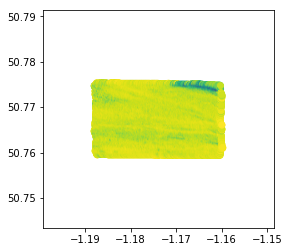

In [58]:
geosurvey.plot(column='mintomean')
plt.show()

In [59]:
#remove nan rows 
geosurveyn = geosurvey[geosurvey.Count > 0]

In [60]:
len(geosurveyn)

43525

In [ ]:
# value compared to surrounding cells?


In [87]:
#Distance from navline valiablle


navline = gpd.read_file('..//..//..//Documents//Test_sets//Testing_sample//HI1539B//linestester.shp')

In [88]:
navline.head()

,id,geometry
0,1,LINESTRING (-1.160150400732759 50.775125605315...
1,2,LINESTRING (-1.188112932871767 50.775820838531...


In [89]:
geosurvey['navlin_dis'] = geosurvey.geometry.apply(lambda g: navline.distance(g).min())


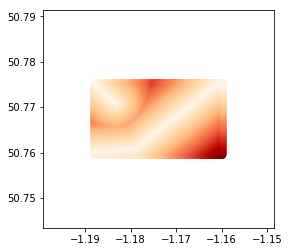

In [90]:
geosurvey.plot(column='navlin_dis',cmap='OrRd')
plt.show()

In [82]:
#Distance from anchberth variable

berth= gpd.read_file('..//..//..//Documents//Test_sets//Testing_sample//HI1539B//navfeatures_ACHBRT_Point.shp')

In [83]:
geosurvey['berth_dis'] = geosurvey.geometry.apply(lambda g: berth.distance(g).min())


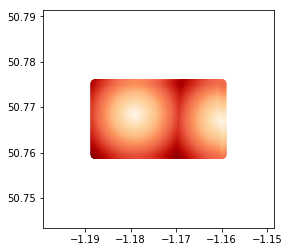

In [84]:
geosurvey.plot(column='berth_dis',cmap='OrRd')
plt.show()